In [68]:
# Import necessary libraries
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # Disable warning for chained assignments
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)

<module 'global_settings' from 'C:\\Users\\AO_HVN_ITS_LABO_DWH\\Documents\\CeDX\\2023_12\\global_settings.py'>

In [69]:
# Create an instance of the Settings class from global_settings module
setts = global_settings.Settings()

# Access configuration settings using the instance

# Root folder where the application is located
root_folder = setts.root_folder

# Input temporary folder path
input_tmp_folder = setts.input_folder

# Output folder path for temporary files
output_folder = setts.tmp1_folder

# Year limit configuration
year_limit = setts.year_limit

# Additional configuration settings (if available)
#cutoff = setts.month_last


Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


# Merge and add Field/Business field to chatbot data

In [70]:
def create_additional_data(merged_data):
    # Business and Field
    merged_data['Business'] = np.nan
    merged_data.loc[merged_data['User says'].str.contains('xe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold', na = False, case = False), 'Business Field'] = 'MC'
    merged_data.loc[merged_data['Bot answer text'].str.contains('xe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold', na = False, case = False), 'Business Field'] = 'MC'
    merged_data.loc[merged_data['User says'].str.contains('ô tô|accord|cr|br|city|civic|hr', na = False, case = False), 'Business Field'] = 'AM'
    merged_data.loc[merged_data['Bot answer text'].str.contains('ô tô|accord|cr|br|city|civic|hr', na = False, case = False), 'Business Field'] = 'AM'
    merged_data['Business'].fillna('Other', inplace = True)
    merged_data['Field'] = np.nan
    merged_data.loc[merged_data['User says'].str.contains('bảo hành|bảo dưỡng|lịch|gia hạn|ktđk|kiểm tra|định kỳ|phí|thay|dầu|hotline|tư vấn viên|sửa chữa|phụ tùng|phụ tùng|hỏng|e-voucher', na = False, case = False), 'Field'] = 'Service'
    merged_data.loc[merged_data['User says'].str.contains('thông tin|giá|chi tiết|khuyến mại|ô tô|xe máy|khuyến mãi|mua|giảmxe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold|xe máy|xe số|sh|tay côn|wave|blade|Future|Cub|Vision|Lead|SH Mode|Air|Scoopy|Vario|ADV|PCX|MSX|Winner|CBR|CXM|CB500X|CB650R|CB1000R|CBR1000RR-R|Fireblade|Africa Twin|CRF1100L Africa Twin Adventure Sports|Rebel 300|xe ga|tay ga|head|gold', na = False, case = False), 'Field'] = 'Product'
    merged_data['Field'].fillna('Other', inplace = True)
    return merged_data

In [71]:
def merge_xlsx_files(folder_path_og, out_path):
    # Specify the folders to consider for merging
    folders_to_merge = ['Bot_History_20200801_20230930_Part1', 'Bot_History_20200801_20230930_Part2', 'Bot_History_20201001_20231031_Part3']

    # Create an empty DataFrame to store the merged data
    merged_data = pd.DataFrame()

    # Iterate over the specified folders and merge the XLSX files
    for folder in folders_to_merge:
        folder_path = folder_path_og +'\\'+ folder
        print(folder_path)
        if os.path.isdir(folder_path):
            file_list = []
            for file in os.listdir(folder_path):
                if file.endswith(".xlsx"):
                    file_list.append(os.path.join(folder_path, file))

            # Merge the XLSX files within the folder
            for file_path in file_list:
                print(file_path)
                df = pd.read_excel(file_path, skiprows=6)  # Read the XLSX file into a DataFrame
                merged_data = pd.concat([merged_data, df], ignore_index=True)  # Merge the data
                #merged_data = create_additional_data(merged_data)
                #print(merged_data.head())
    # Write the merged DataFrame to a new XLSX file
    
    merged_file_path = out_path + "/merged_chatbot_data.csv"
    merged_data = create_additional_data(merged_data)
    merged_data.to_csv(merged_file_path, index=False)

    print("Merging completed. Merged data saved to:", merged_file_path)

# Example usage
folder_path = r"\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Dec_2023\4. My Honda"
out_path = input_tmp_folder
merge_xlsx_files(folder_path, out_path)

\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Dec_2023\4. My Honda\Bot_History_20200801_20230930_Part1
\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Dec_2023\4. My Honda\Bot_History_20200801_20230930_Part1\PROD-CRM History from 20200801072941 to 20200813154137.xlsx



KeyboardInterrupt



# Mapping
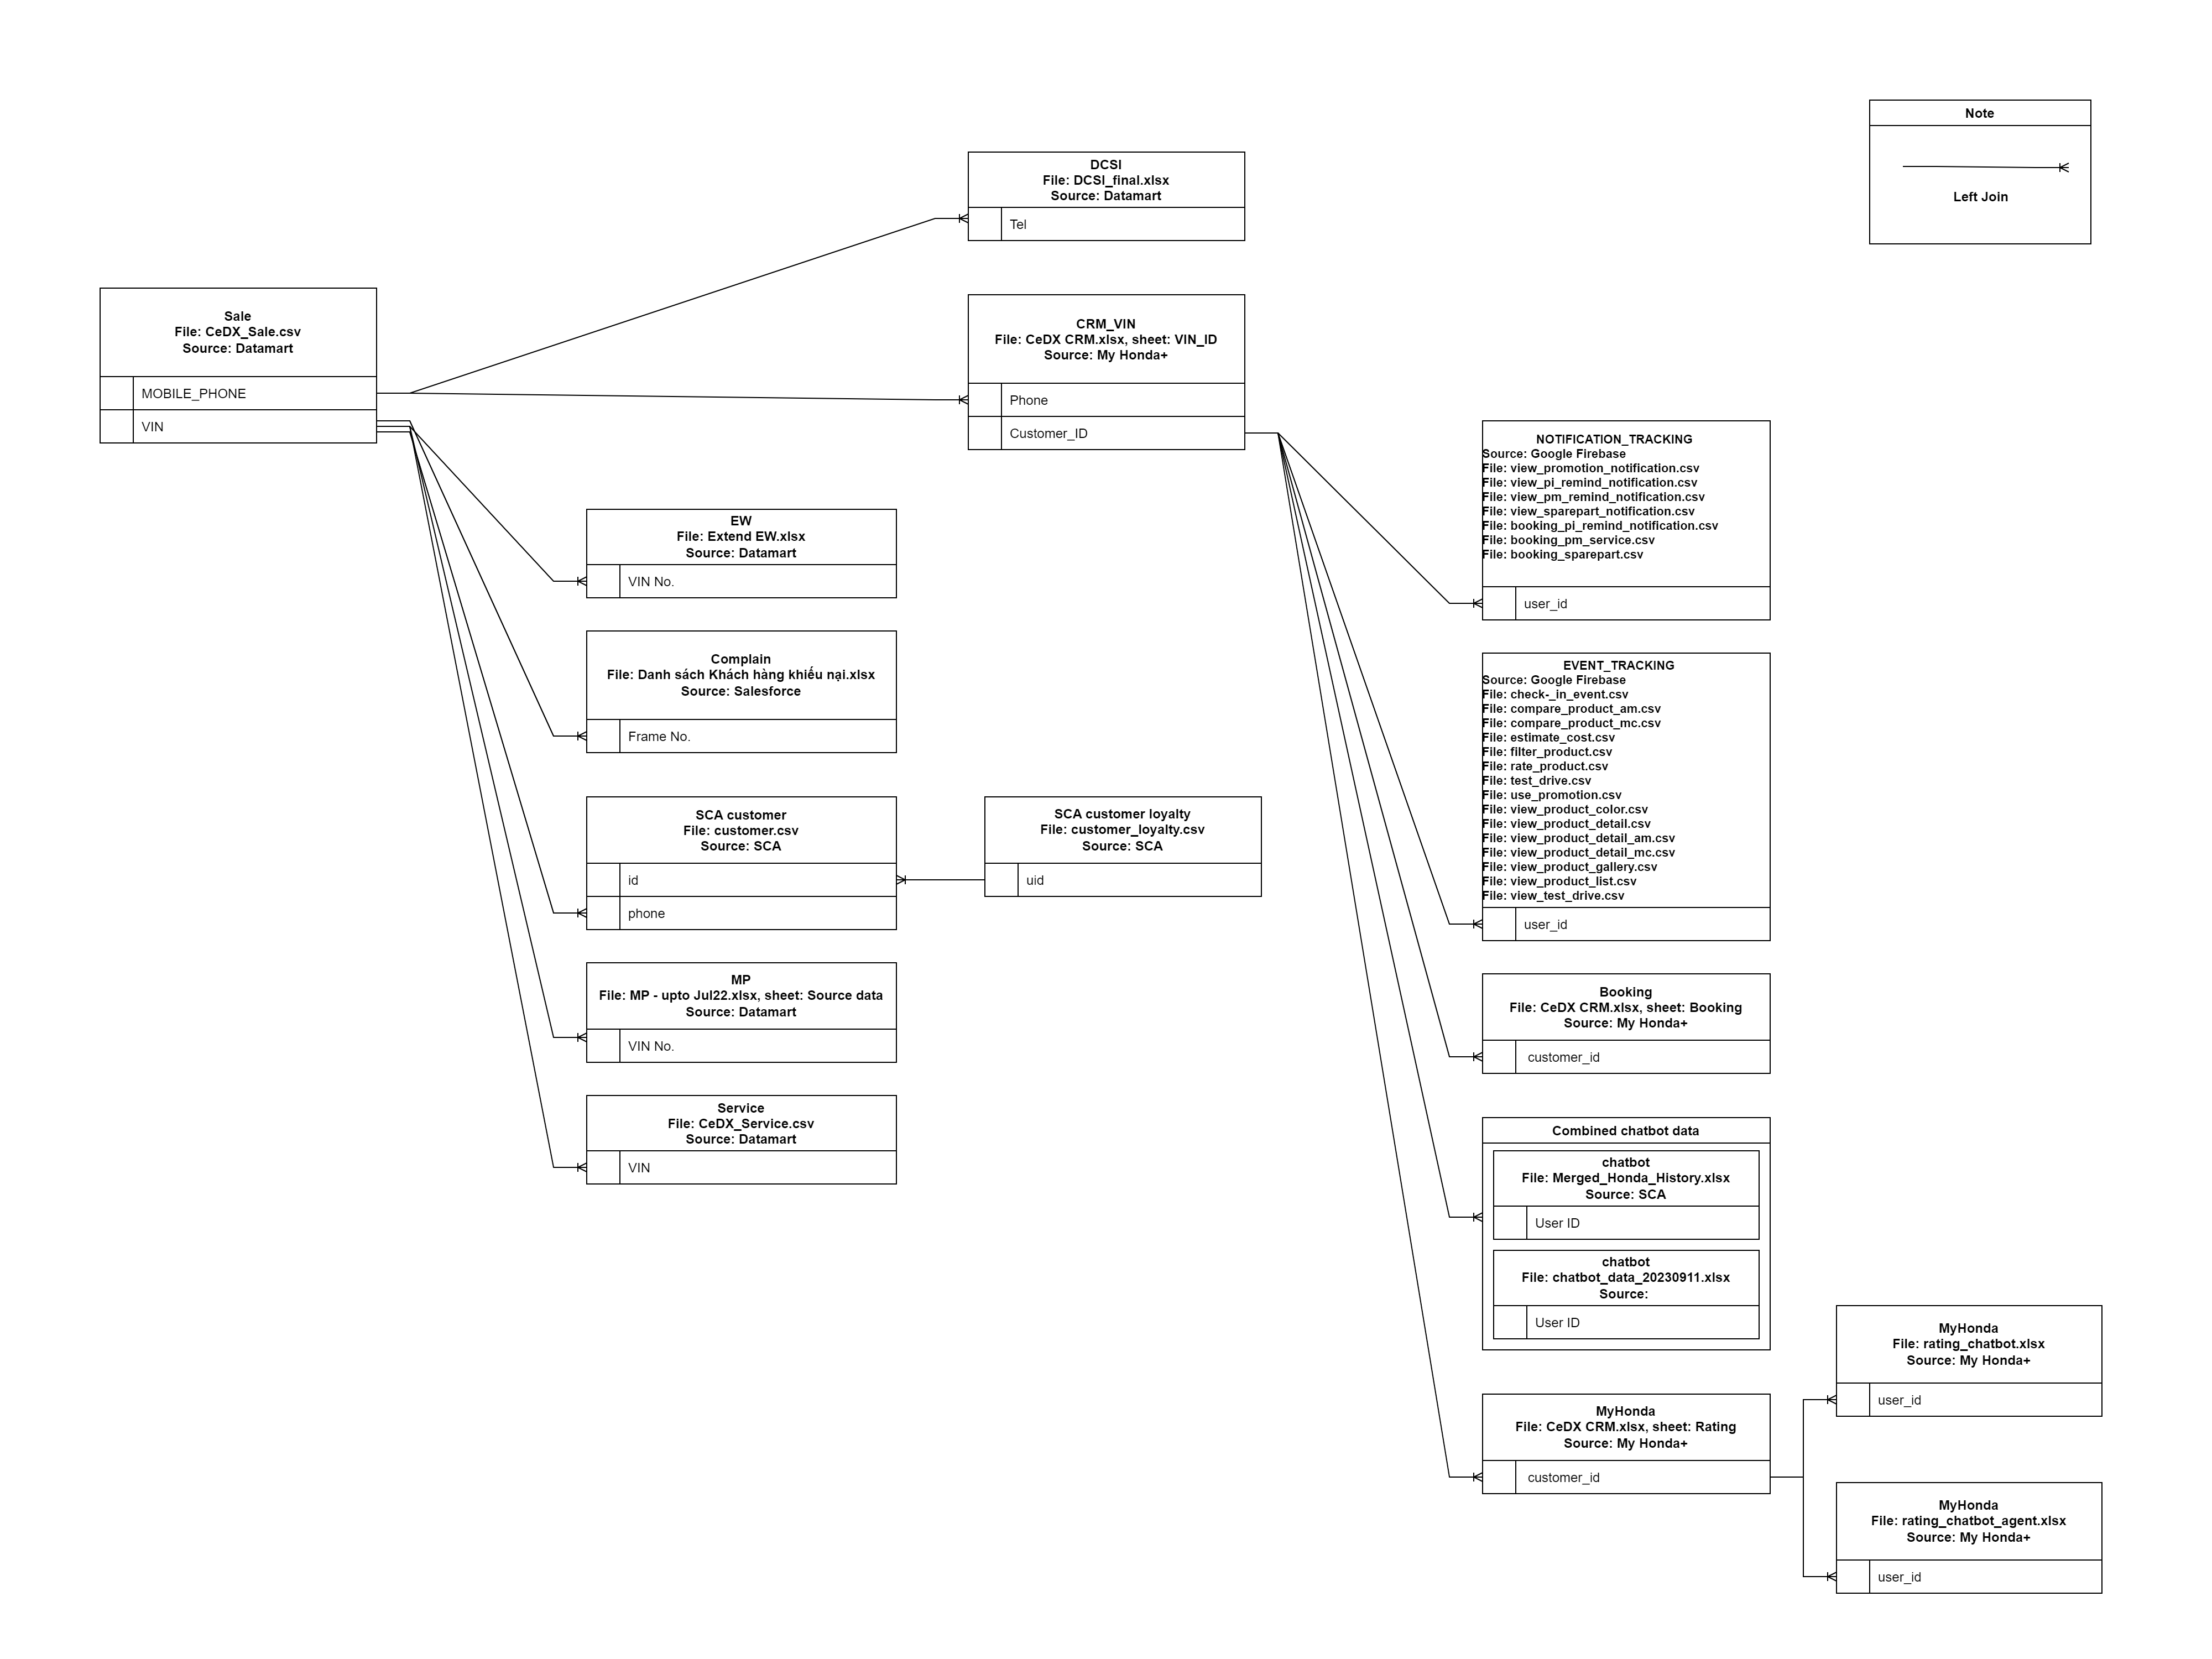

In [72]:
def remove_non_numeric_chars(input_string):
    #return ''.join(char for char in input_string if char.isdigit())
    return setts.remove_non_numeric_chars(input_string)

def modify_phone_num_column(df, col):
#     df[col] = df[col].apply(lambda x: remove_non_numeric_chars(str(x))).dropna()
#     df = df[df[col] != '']
#     df[col] = df[col].astype(np.longlong).astype(str)
#     return df
    return setts.modify_phone_num_column(df, col)

In [73]:
sale = pd.read_csv(input_tmp_folder + '/CeDX_Sale.csv')
sale = sale[sale['WARRANTY_START_DATE'] <= setts.month_last]
df_phone_vin = sale[['MOBILE_PHONE', 'VIN']]
df_phone_vin['VIN'] = df_phone_vin['VIN'].astype(str).str.upper()
df_phone_vin = modify_phone_num_column(df_phone_vin, 'MOBILE_PHONE')
print(df_phone_vin)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_9392\1093693624.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(input_tmp_folder + '/CeDX_Sale.csv')


       MOBILE_PHONE                VIN
0         917363360  RLHGM6662GY702754
1         947834439  RLHGM6667GY702801
2         936057255  RLHGM6661GY702907
3         982125263  RLHRM1830GY701472
4         937080591  RLHGM6665GY702909
...             ...                ...
222511    778072670  MRHFC1680KT030499
222512    983781814  RLHGN2667MY002021
222518    968722283  MRHRU5850JP080562
222526    917559662  RLHGM6667KY832506
222535    982125552  RLHFD1626BY100055

[218656 rows x 2 columns]


In [74]:
# ĐỔI TÊN CỘT VIN VÀ CUSTOMER_ID
# VIN CustomerID

crm_vin = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='VIN_ID')
crm_vin['VIN'] = crm_vin['VIN'].astype(str).str.upper()
crm_vin = pd.merge(crm_vin, right=df_phone_vin, how='left', on='VIN').drop(columns=['VIN']).rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
crm_phone = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Phone_ID')
crm_phone = pd.concat([crm_phone, crm_vin], ignore_index=True, axis=0).drop_duplicates(subset=['Customer_ID'],keep='last')
crm_phone = modify_phone_num_column(crm_phone, 'Phone')[['Customer_ID', 'Phone']]
crm_phone['Customer_ID'] = crm_phone['Customer_ID'].astype(str).str.replace('.0', '', regex=False)
print(crm_phone)

       Customer_ID      Phone
92258         2689  936099936
92259         2707  982999238
92260         2822  975575115
92261         2813  919171990
92262         2823  904453298
...            ...        ...
222685     9690307  937883838
222686       15818  978974015
222687     4468160  965068168
222688     4624278  903577205
222689     4525296  901418810

[115331 rows x 2 columns]


In [75]:
def get_files_in_folder(folder_path):
    file_list = []
    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        if os.path.isfile(file_path):
            file_list.append(file_name)
    return file_list


def process_file(files, df_phone_vin, output_path, left='user_id', right='Customer_ID', out_prepend='output', rename=None):
    for file in files:
        name = file.split('/')[-1].split('.')[0]
        df = pd.read_csv(file)
        df = df[df['event_date'] <= setts.month_last]
        df[left] = df[left].astype(str)
        df = pd.merge(df, right=df_phone_vin, how='left', left_on=left, right_on=right)
        df = df.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
        if rename is None:
            output = output_path + '/' + name + out_prepend + '.csv'
        else:
            try:
                output = output_path + '/' + rename[name] + out_prepend + '.csv'
            except:
                output = output_path + '/' + name + out_prepend + '.csv'
        print(output)
        df.to_csv(output, index=False)

input_filename_list = {
	"view_promotion_notification" : "event_v_promo", #  view_promotion_notification
	"view_pi_remind_notification" : "notif_vpi", # " : view_pi_remind_notification
	"view_pm_remind_notification" : "notif_vpm", # " : view_pm_remind_notification
	"view_promotion_notification" : "notif_v_pro", # " : view_promotion_notification
	"view_sparepart_notification" : "notif_v_spa", # " : view_sparepart_notification
	"booking_pi_remind_notification" : "notif_book_pi", # " : booking_pi_remind_notification
	"booking_pm_service" : "notif_book_pm", # " : booking_pm_service
	"booking_sparepart" : "notif_book_spa", # booking_sparepart
}

In [76]:
# Event_tracking
folder_path = r'\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Dec_2023\4. My Honda\event tracking'
files = get_files_in_folder(folder_path)
files_path = [folder_path + '/' + i for i in files]
process_file(files_path[:], crm_phone, output_folder, out_prepend='', rename=input_filename_list)

D:\Software\temp\CeDX\data_2023_12/data/tmp/checkin_event.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/compare_product_am.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/compare_product_mc.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/estimate_cost.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/filter_product.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/rate_product.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/test_drive.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/use_promotion.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/view_product_color.csv


C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_9392\3923363448.py:13: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


D:\Software\temp\CeDX\data_2023_12/data/tmp/view_product_detail_am.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/view_product_detail_mc.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/view_product_gallery.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/view_product_list.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/view_test_drive.csv


In [77]:
# Notification_tracking

folder_path = r'\\hvn-file01-prd\ADM IT\Project Document\2022_CeDX engagement\09.Project_Management\9. Upate Data\Dec_2023\4. My Honda\notification tracking'
files = get_files_in_folder(folder_path)
files_path = [folder_path + '/' + i for i in files]
process_file(files_path[:], crm_phone, output_folder, out_prepend='', rename=input_filename_list)

df_copy = pd.read_csv(output_folder + '/notif_v_pro.csv')
df_copy.to_csv(output_folder + '/event_v_promo.csv', index=False)
df_copy.to_csv(output_folder + '/view_promotion_notification.csv', index=False)


D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_book_pi.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_book_pm.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_book_spa.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_vpi.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_vpm.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_v_pro.csv
D:\Software\temp\CeDX\data_2023_12/data/tmp/notif_v_spa.csv


In [78]:
#EW
ew = pd.read_excel(input_tmp_folder + '/Extend EW.xlsx')
ew = ew[ew['EW BUYING'] <= setts.month_last_dt]
ew['VIN No.'] = ew['VIN No.'].astype(str).str.upper()
ew = pd.merge(ew, right=df_phone_vin, how='left', left_on= 'VIN No.',right_on='VIN').rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
ew = ew.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
ew.to_csv(output_folder + '/ew.csv', index=False)

In [79]:
# Complain
path = input_tmp_folder + '/Danh sách Khách hàng khiếu nại.xlsx'
comp = pd.read_excel(path, sheet_name='Database report')
comp['Date Receive'] = comp['Date Receive'].astype(str).apply(lambda x: datetime.strptime(x, '%m/%d/%Y, %I:%M %p'))
comp = comp[comp['Date Receive'] <= setts.month_last_dt]
comp['Frame No'] = comp['Frame No'].astype(str).str.upper()
comp = pd.merge(comp, right=df_phone_vin, how='left', left_on= 'Frame No',right_on='VIN').rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
comp = comp.dropna(subset=['Phone'])
comp = comp.rename(columns={'Phone' : 'UID', 'Date Sending' : 'Date/Time Opened', 'CR Code Full Name' : 'CR Code Full'})
comp.to_csv(output_folder + '/comp.csv', index=False)

In [80]:
#SCA
sca1 = pd.read_csv(input_tmp_folder + '/customer_loyalty.csv')
# sca1['start_date'] = sca1['start_date'].astype(str).apply(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
sca1['start_date'] = sca1['start_date'].astype(str).apply(lambda x: datetime.strptime(x, '%m/%d/%Y %H:%M'))
sca1 = sca1[sca1['start_date'] <= setts.month_last_dt]

sca2 = pd.read_csv(input_tmp_folder + '/customer.csv', encoding='utf-8', on_bad_lines='skip')
###### NO DATE COLUMN #####


sca = pd.merge(sca1, right=sca2, how='left', left_on= 'uid',right_on='id').rename(columns={'uid' : 'Customer_ID', 'phone' : 'Phone'})
# sca['Phone'] = sca['Phone'].astype(str).str.replace('[^0-9]', '')
# sca = sca[sca['Phone'] != '']
# sca['Phone'] = sca['Phone'].astype(float).astype(str)

sca = modify_phone_num_column(sca, 'Phone')

sca = pd.merge(sca, right=df_phone_vin, how='left', left_on= 'Phone',right_on='MOBILE_PHONE')

sca = sca.dropna(subset=['MOBILE_PHONE']).rename(columns={'MOBILE_PHONE' : 'UID'})
sca.to_csv(output_folder + '/sca.csv', index=False)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_9392\2565864643.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  sca2 = pd.read_csv(input_tmp_folder + '/customer.csv', encoding='utf-8', on_bad_lines='skip')


In [81]:
# Booking service
booking = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Booking')
booking.columns = [x.strip() for x in booking.columns.tolist()]
print('File read')
booking = booking[booking['booking_date'].astype(str).str.match(r'\d\d\d\d-\d{1,2}-\d{1,2}')]
booking['booking_date'] = booking['booking_date'].astype(str).apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))
booking = booking[booking['booking_date'] <= setts.month_last_dt]
booking['customer_id'] = booking['customer_id'].astype(str)
booking = pd.merge(booking, right=crm_phone, how='left', left_on= 'customer_id',right_on='Customer_ID')
booking = booking.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
booking.to_csv(output_folder + '/book.csv', index=False)

File read


In [82]:
# MyHonda

mh = pd.read_excel(input_tmp_folder + '/CeDX CRM.xlsx', sheet_name='Rating')
mh.columns = [x.replace("# ", '').strip() for x in mh.columns.tolist()]
mh['customer_id'] = mh['customer_id'].astype(str)
mh = pd.merge(mh, right=crm_phone, how='left', left_on= 'customer_id',right_on='Customer_ID')

mh = mh.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
mh['ro_order'] = mh['ro_order'].astype(str)
mh = mh.sort_values(by=['ro_order'])
mh = mh.drop_duplicates(subset=['UID'], keep='last')

mh_chatbot = pd.read_excel(input_tmp_folder + '/rating_chatbot.xlsx', header=5)
mh_chatbot = mh_chatbot.drop(['Unnamed: 0'], axis=1, errors='ignore')
print(mh_chatbot.head(5))
mh_chatbot['Sender ID'] = mh_chatbot['Sender ID'].astype(str)

mh_chatbot = pd.merge(mh_chatbot, right=crm_phone, how='left', left_on= 'Sender ID',right_on='Customer_ID')
mh_chatbot = mh_chatbot.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID', 'Rated' : 'rate_chatbot_point'})
mh_chatbot['Time'] = pd.to_datetime(mh_chatbot['Time'], format='%H:%M - %d/%m/%Y')
mh_chatbot = mh_chatbot.sort_values('Time', ascending=True)
mh_chatbot = mh_chatbot.drop_duplicates(subset=['Time'], keep='last')
mh_chatbot = mh_chatbot[['UID', 'rate_chatbot_point']]

mh_chatbot_agent = pd.read_excel(input_tmp_folder + '/rating_chatbot_agent.xlsx', header=5)
mh_chatbot_agent = mh_chatbot_agent.drop(['Unnamed: 0'], axis=1, errors='ignore')

mh_chatbot_agent['Sender ID'] = mh_chatbot_agent['Sender ID'].astype(str)

mh_chatbot_agent = pd.merge(mh_chatbot_agent, right=crm_phone, how='left', left_on= 'Sender ID',right_on='Customer_ID')
mh_chatbot_agent = mh_chatbot_agent.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID', 'Rated' : 'rate_chatbot_agent_point'})
mh_chatbot_agent['Time'] = pd.to_datetime(mh_chatbot_agent['Time'], format='%H:%M - %d/%m/%Y')
mh_chatbot_agent = mh_chatbot_agent.sort_values('Time', ascending=True)
mh_chatbot_agent = mh_chatbot_agent.drop_duplicates(subset=['Time'], keep='last')
mh_chatbot_agent = mh_chatbot_agent[['UID', 'rate_chatbot_agent_point']].fillna(0)

mh = pd.merge(mh, right=mh_chatbot, how='left', left_on= 'UID',right_on='UID')
mh = pd.merge(mh, right=mh_chatbot_agent, how='left', left_on= 'UID',right_on='UID')

# Remove redundant space from column name
mh.columns = [i.strip() for i in mh.columns.tolist()]
mh['rate_point_service'] = mh['rate_point_service'].astype(str).str.replace('NULL', '0')
mh['rate_point_mechanic'] = mh['rate_point_mechanic'].astype(str).str.replace('NULL', '0')
mh['rate_chatbot_point'] = mh['rate_chatbot_point'].fillna(0).astype(str).str.replace('NULL', '0')
mh['rate_chatbot_agent_point'] = mh['rate_chatbot_agent_point'].fillna(0).astype(str).str.replace('NULL', '0')
mh = mh.rename(columns={'rate_point_service' : 'rate_service_point', 'rate_point_mechanic' : 'rate_mechanic_point'})
mh.to_csv(output_folder + '/MH.csv', index=False)

                 Time   Channel  Sender ID      Sender Name  Rated Comment
0  23:39 - 30/11/2023  livechat    9445459  Quàng Hồng Ninh      5     NaN
1  23:30 - 30/11/2023  livechat    9381237    Lê Quang Vinh      2     NaN
2  23:20 - 30/11/2023  livechat    9050231    Đặng Thanh Sự      5     NaN
3  23:14 - 30/11/2023  livechat    7582157    Bùi Thành Đạt      5     tốt
4  23:13 - 30/11/2023  livechat    9125496              NaN      5     NaN


In [83]:
def filter_df_date(df, date_cut, col, sub='date_to_num'):
	df = df.dropna(subset=[col])
	df = df[~df[col].str.contains('[A-Za-z]')]
	df[sub] = df[col].apply(lambda x: date_to_num(x.split(' ')[0]))
	df = df[df[sub] < date_cut]
	df.drop(columns=[sub], inplace=True)
	return df

def date_to_num(date_str):
    if '-' in date_str:
        return int(date_str.replace('-', ''))
    elif '//' in date_str:
        date = date_str.split('//')
        return int(date[2] + pad0(date[0]) + pad0(date[1]))
    elif '.' in date_str:
        date = date_str.split('.')
        return int(date[2] + pad0(date[1]) + pad0(date[0]))
def pad0(data):
	data = str(data)
	if len(data) == 1:
		data = '0' + data
	return data

In [87]:
# MP

mp = pd.read_excel(input_tmp_folder + '/MP - upto Jul22.xlsx', sheet_name='Source data', skiprows=1)
vin = 'VIN No.'
mp[vin] = mp[vin].astype(str).str.upper()
cname = ["Month", "DLR", "Count", "DLR.1", vin ,"Model", "Ngay ban_tang PM package", "Ngay dang ky Warranty Date", "Km", "New Car", "Servicecar", "2Cap", "4Cap", "Khac", "Lan 1", "Lan 2", "Lan 3", "Lan 4", "Lan 5", "Lan 6", "Khac.1", "Gia ban", "Ghi chu"]
mp.columns = cname
#print(mp['Ngay ban_tang PM package'])
#mp = mp[mp['Ngay ban_tang PM package'].astype(str).str.match(r'\d{1,2}/\d{1,2}/\d\d\d\d')]
#mp['Ngay ban_tang PM package'] = mp['Ngay ban_tang PM package'].astype(str).apply(lambda x: datetime.strptime(x, '%d/%m/%Y'))
mp['Ngay ban_tang PM package'] = mp['Ngay ban_tang PM package'].astype(str)
mp = filter_df_date(mp, setts.month_last, 'Ngay ban_tang PM package')


mp = pd.merge(mp, right=df_phone_vin, how='left', left_on= vin,right_on='VIN').rename(columns={'CustomerID' : 'Customer_ID', 'MOBILE_PHONE' : 'Phone'})
mp = mp.dropna(subset=['Phone'])
mp = mp.rename(columns={'Phone' : 'UID'})
mp.to_csv(output_folder + '/mp.csv', index=False)

In [84]:
# DCSI

dcsi = pd.read_excel(input_tmp_folder + '/DCSI_final.xlsx')
dsci = dcsi.drop(['Unnamed: 0'], axis=1, errors='ignore')
dsci['Year'] = dsci['Year'].astype(str).apply(lambda x: x.replace('Mười chín', '2019')).astype(int)
dsci = dsci[dsci['Year'].astype(int) <= setts.year_limit]
phone = 'Tel'
dsci = modify_phone_num_column(dsci, phone)
fake = df_phone_vin['MOBILE_PHONE'].copy().astype(np.float64)

dcsi = pd.merge(dcsi, right=fake, how='left', left_on=phone , right_on='MOBILE_PHONE')
dcsi = dcsi.dropna(subset=['MOBILE_PHONE'])
dcsi = dcsi.rename(columns={'MOBILE_PHONE' : 'UID'})
dsci = modify_phone_num_column(dsci, phone)


columns = dcsi.columns.tolist()
dcsi.columns = [i.replace(' ', '_') for i in columns]
dcsi.to_csv(output_folder + '/DCSI.csv', index=False)

In [85]:
INPUTPATH = input_tmp_folder + "/merged_chatbot_data.csv"
chat_og = pd.read_csv(INPUTPATH)


In [86]:
# chatbot
chat=chat_og.copy()
chat = chat.dropna(subset=['Request time'])
chat['Request time'] = chat['Request time'].astype(str).apply(lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S"))
chat = chat[chat['Request time'] <= setts.month_last_dt]
fake = crm_phone.copy()
fake['Customer_ID'] = fake['Customer_ID'].astype(str).str.replace('.0', '', regex=False)
chat = chat.drop(['Business'], axis=1)

collist = ['Request time','User ID','Business Field','Field']
chat = chat[collist]
chat = chat.rename(columns={'Business Field' : 'Business'})
#chat = pd.concat([chat, chat1], ignore_index=True, axis=0)
display(chat)


chat = pd.merge(chat, right=fake, how='left', left_on= 'User ID',right_on='Customer_ID')
chat = chat.dropna(subset=['Phone']).rename(columns={'Phone' : 'UID'})
display(chat)

chat.to_csv(output_folder + '/chat.csv', index=False)

Request time             User ID Business    Field
0        2020-08-13 15:41:37             1828025       AM  Product
1        2020-08-13 15:41:31             1828025      NaN    Other
3        2020-08-13 15:41:26              762147       MC  Product
5        2020-08-13 15:41:14              762147       MC  Product
6        2020-08-13 15:41:07             1729586       MC  Product
...                      ...                 ...      ...      ...
10226576 2023-11-20 00:34:21             9516976      NaN    Other
10226578 2023-11-20 00:34:14             9293329       MC  Product
10226579 2023-11-20 00:33:47             9497545      NaN    Other
10226581 2023-11-20 00:33:46             9293329      NaN    Other
10226583 2023-11-20 00:33:41  monitoring-chatbot      NaN    Other

[5251195 rows x 4 columns]

Request time             User ID Business    Field Customer_ID  \
0       2020-08-13 15:41:37             1828025       AM  Product         NaN   
1       2020-08-13 15:41:31             1828025      NaN    Other         NaN   
2       2020-08-13 15:41:26              762147       MC  Product         NaN   
3       2020-08-13 15:41:14              762147       MC  Product         NaN   
4       2020-08-13 15:41:07             1729586       MC  Product         NaN   
...                     ...                 ...      ...      ...         ...   
5251190 2023-11-20 00:34:21             9516976      NaN    Other         NaN   
5251191 2023-11-20 00:34:14             9293329       MC  Product         NaN   
5251192 2023-11-20 00:33:47             9497545      NaN    Other         NaN   
5251193 2023-11-20 00:33:46             9293329      NaN    Other         NaN   
5251194 2023-11-20 00:33:41  monitoring-chatbot      NaN    Other         NaN   

        Phone  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  
...       ...  
5251190   NaN  
5251191   NaN  
5251192   NaN  
5251193   NaN  
5251194   NaN  

[5251195 rows x 6 columns]

Customer_ID      Phone
92258         2689  936099936
92259         2707  982999238
92260         2822  975575115
92261         2813  919171990
92262         2823  904453298
...            ...        ...
222685     9690307  937883838
222686       15818  978974015
222687     4468160  965068168
222688     4624278  903577205
222689     4525296  901418810

[115331 rows x 2 columns]

In [1]:
# Import libs
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)

<module 'global_settings' from 'C:\\Users\\AO_HVN_ITS_LABO_DWH\\Documents\\CeDX\\2023_12\\global_settings.py'>

In [2]:
# Define root and temp folder that contain all needed file from code 1

setts = global_settings.Settings()

root_folder = setts.root_folder
#input_tmp_folder = root_folder + "/data"
input_folder = setts.input_folder
#output_folder = root_folder + "/data/tmp"
output_folder = setts.tmp1_folder

Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


In [3]:
def remove_non_numeric_chars(input_string):
    #return ''.join(char for char in input_string if char.isdigit())
    return setts.remove_non_numeric_chars(input_string)

def modify_phone_num_column(df, col):
#     df[col] = df[col].apply(lambda x: remove_non_numeric_chars(str(x))).dropna()
#     df = df[df[col] != '']
#     df[col] = df[col].astype(np.longlong).astype(str)
#     return df
    return setts.modify_phone_num_column(df, col)

In [4]:
# Read sales data
sales = pd.read_csv(input_folder + "/CeDX_Sale.csv")
sales = sales[sales['WARRANTY_START_DATE'] <= setts.month_last]

# Drop the index column created from original file
sales = sales.drop('Unnamed: 0', errors='ignore', axis=1)
print(len(sales))
sales = sales[sales['WARRANTY_START_DATE'] != 0]
sales['WARRANTY_START_DATE'] = pd.to_datetime(sales['WARRANTY_START_DATE'], format='%Y%m%d')
print(len(sales))
# Calculate age based on date of birth
# If date of birth is 0 then age is nan
cal_year = 2022
sales['DATEOFBIRTH'] = sales['DATEOFBIRTH'].astype(str).str[:8]
sales['age'] = sales['DATEOFBIRTH'].astype(str).apply(lambda x: cal_year - int(x[:4]) if len(x) == 8 else np.nan)

# Convert value of DATEOFBIRTH column from yyyymmdd to yyyy-mm-dd
sales['DATEOFBIRTH'] = sales['DATEOFBIRTH'].astype(str).apply(lambda x: x[:4] + x[4:6] + x[:-2] if len(x) == 8 else np.nan)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_16724\3626041051.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sales = pd.read_csv(input_folder + "/CeDX_Sale.csv")


222346
222346


In [5]:
sales = sales.rename(columns = {'MOBILE_PHONE' : 'UID'})
sales = modify_phone_num_column(sales, 'UID')
sales = sales.dropna(subset=['UID'])

In [6]:
# PARTNER_CATEGORY == 1 is individual
sales = sales[sales['PARTNER_CATEGORY'] == 1]

# Count total puchase of each UID
sales['total_buy'] = sales.groupby('UID')['UID'].transform('count')

# Filter by WARRANTY_START_DATE==min(WARRANTY_START_DATE)
sales = sales[sales['WARRANTY_START_DATE'] == sales.groupby('UID')['WARRANTY_START_DATE'].transform('min')]
sales = sales.drop_duplicates()

# Count last buy of each UID
sales['last_buy_num'] = sales.groupby('UID')['UID'].transform('count')

# The number of time UID purchase 
sales['no'] = sales.groupby('UID').cumcount() + 1

# Year of the that purchase
sales['START_year'] = sales['WARRANTY_START_DATE'].dt.year


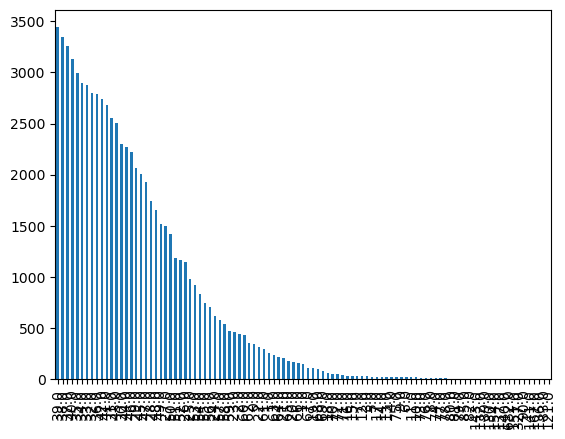

In [7]:
# Plot data by age
sales['age'].value_counts().plot(kind='bar')
sales_uni = sales[sales['no'] == 1]

# Default behaviour of R, trying to replicate it
sales['DATEOFBIRTH'] = sales['DATEOFBIRTH'].fillna("NA")
sales['SALES_PRICE'] = sales['SALES_PRICE'].fillna("NA")
sales['MARITAL_STATUS'] = sales['MARITAL_STATUS'].fillna("NA")

sales['age'] = sales['age'].fillna("NA")
sales['TITLE'] = sales['TITLE'].apply(lambda x: x.lstrip('0') if x.strip() != '' else 'NA')
sales['MARITAL_STATUS'] = sales['MARITAL_STATUS'].apply(lambda x: x.replace(' ', 'NA')).fillna("NA")

# Export data, remove .0 after all number


sales.to_csv(output_folder + '/sale_uni_min.csv', index=False)

In [21]:
# Import libs
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)

<module 'global_settings' from 'C:\\Users\\AO_HVN_ITS_LABO_DWH\\Documents\\CeDX\\2023_12\\global_settings.py'>

In [22]:
setts = global_settings.Settings()

root_folder = setts.root_folder

input_tmp_folder = setts.tmp1_folder
output_folder = setts.tmp2_folder


Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


# DCSI

In [23]:
### データの入力
INPUT_PATH_DCSI = input_tmp_folder + "/DCSI.csv"
df = pd.read_csv(INPUT_PATH_DCSI, encoding='utf-8')

### カラムの抽出
collist = [
"UID",
"Month",
"Year",
"Dealer",
"Region",
"REMINDER_",
"RECEPTION",
"CUSTOMER_LOUNGE",
"DELIVERY",
"REPAIR_QUALITY",
"FACILITY",
"Q30Y",
"OVERALL_SATISFACTION",
"Free_comment"
]

df = df[collist]

### データの出力
OUTPUT_PATH_DCSI = output_folder + "/DCSI_ver1.csv"
df.to_csv(OUTPUT_PATH_DCSI, encoding='utf-8', index=False)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_20652\3312620703.py:3: DtypeWarning: Columns (2,39,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(INPUT_PATH_DCSI, encoding='utf-8')


# DCSIに関する追加の処理

In [24]:
# データの入力
df = pd.read_csv(INPUT_PATH_DCSI, encoding='utf-8')

# カラムの抽出・データ型の変換
df_DCSI = df[['UID', 'Q35Y']].copy()
df_DCSI['follow_call'] = pd.to_numeric(df_DCSI['Q35Y'], errors='coerce')

# follow_callごとの処理
# Processing each follow call
df_DCSI.fillna({'follow_call': 0}, inplace=True)
df_DCSI_output = df_DCSI.groupby(by='UID').agg(
    follow_call=('follow_call', 'max')
).reset_index()

# ↑のセルで作成したデータの入力
# File created by cell above
df_DCSI_new_name = pd.read_csv(OUTPUT_PATH_DCSI)

# データの結合
df_DCSI_ver2 = pd.merge(df_DCSI_new_name, df_DCSI_output, on = 'UID', how = 'left')

# データの出力
df_DCSI_ver2.to_csv(output_folder + "/DCSI_output_ver2.csv", encoding='utf-8', index=False)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_20652\937043279.py:2: DtypeWarning: Columns (2,39,69,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(INPUT_PATH_DCSI, encoding='utf-8')


# My Honda

In [25]:
### データの入力
INPUT_PATH_MH = input_tmp_folder + "/MH.csv"
df = pd.read_csv(INPUT_PATH_MH, encoding='utf-8')

### カラムの抽出
usecols = [
    'rate_service_point',
    'rate_mechanic_point',
    'rate_chatbot_point',
    'rate_chatbot_agent_point',
    'UID',
]

df_MH = df[usecols]

### 最後の点数を抽出
# rate_service_point, rate_mechanic_pointについて、小数表記のため3文字分を抽出
# rate_service_point
rate_service_point_5str_1 = df_MH.loc[:, 'rate_service_point'].astype(str).str[:]
rate_service_point_5str_2 = rate_service_point_5str_1.str[:]
# rate_mechanic_point
rate_mechanic_point_5str_1 = df_MH.loc[:, 'rate_mechanic_point'].astype(str).str[:]
rate_mechanic_point_5str_2 = rate_mechanic_point_5str_1.str[:]
# rate_chatbot_point, rate_chatbot_pointについて、整数表記のため1文字分を抽出
# rate_chatbot_point
rate_chatbot_point_5str_1 = df_MH.loc[:, 'rate_chatbot_point'].astype(str).str[:]
rate_chatbot_point_5str_2 = rate_chatbot_point_5str_1.str[:]
# # rate_chatbot_agent_point
rate_chatbot_agent_point_5str_1 = df_MH.loc[:, 'rate_chatbot_agent_point'].astype(str).str[:]
rate_chatbot_agent_point_5str_2 = rate_chatbot_agent_point_5str_1.str[:]


### 文字列から数値への型変換
# rate_service_point
df_rate_service_point_num = pd.to_numeric(rate_service_point_5str_2, errors='coerce')
# rate_mechanic_point
df_rate_mechanic_point_num =  pd.to_numeric(rate_mechanic_point_5str_2, errors='coerce')
# rate_chatbot_point
df_rate_chatbot_point_num =  pd.to_numeric(rate_chatbot_point_5str_2, errors='coerce')
# rate_chatbot_agent_point
df_rate_chatbot_agent_point_num =  pd.to_numeric(rate_chatbot_agent_point_5str_2, errors='coerce')
### dataframeへの変換

df_rate_service_point_num = pd.DataFrame(df_rate_service_point_num)
df_rate_mechanic_point_num =  pd.DataFrame(df_rate_mechanic_point_num)
df_rate_chatbot_point_num =  pd.DataFrame(df_rate_chatbot_point_num)
df_rate_chatbot_agent_point_num =  pd.DataFrame(df_rate_chatbot_agent_point_num)


### - カラム名の変更とカラム抽出
# - rate_service_point
df_rate_service_point_num.rename(columns={
    'rate_service_point' : 'rate_service_point_NUM'
}, inplace=True)
# - rate_mechanic_point
df_rate_mechanic_point_num.rename(columns={
    'rate_mechanic_point' : 'rate_mechanic_point_NUM'
}, inplace=True)
# - rate_chatbot_point
df_rate_chatbot_point_num.rename(columns={
    'rate_chatbot_point' : 'rate_chatbot_point_NUM'
}, inplace=True)
# # - rate_chatbot_agent_point
df_rate_chatbot_agent_point_num.rename(columns={
    'rate_chatbot_agent_point': 'rate_chatbot_agent_point_NUM'
}, inplace=True)
### データの結合
#df_MH2 = pd.concat([df_MH, df_rate_service_point_num, df_rate_mechanic_point_num])#, df_rate_chatbot_point_num, df_rate_chatbot_agent_point_num], axis = 'columns')
# df_MH2 = pd.concat([df_MH, df_rate_service_point_num, df_rate_mechanic_point_num], ignore_index=True)#, df_rate_chatbot_point_num, df_rate_chatbot_agent_point_num], axis = 'columns')
df_MH2 = df_MH.copy()
df_MH2['rate_service_point'] = df_rate_service_point_num['rate_service_point_NUM']
df_MH2['rate_mechanic_point'] = df_rate_mechanic_point_num['rate_mechanic_point_NUM']
df_MH2['rate_chatbot_point'] = df_rate_chatbot_point_num['rate_chatbot_point_NUM']
df_MH2['rate_chatbot_agent_point'] = df_rate_chatbot_agent_point_num['rate_chatbot_agent_point_NUM']


df_MH3 = df_MH2[['UID',  'rate_service_point', 'rate_mechanic_point','rate_chatbot_point', 'rate_chatbot_agent_point']]

### uniqueなUIDごとに計算する
# uniqueなUID（昇順）の取得
df_uid = df_MH3['UID'].dropna()
uid_unique = df_uid.unique()
df_uid_unique = pd.DataFrame({'UID': uid_unique})

# UIDの出現回数をカウント
df_uid_count = df_uid.value_counts().rename_axis('UID').reset_index(name='UID_counts_MyHonda')

# uniqueなuid（昇順）に出現回数を付与
df_uid_unique_count = pd.merge(df_uid_unique, df_uid_count, on='UID', how='left')
# UIDごとに、各pointの平均をとる

grouped_service_point = df_MH2.groupby(['UID'])['rate_service_point'].mean().reset_index()
grouped_mechanic_point = df_MH2.groupby(['UID'])['rate_mechanic_point'].mean().reset_index()
grouped_chatbot_point = df_MH2.groupby(['UID'])['rate_chatbot_point'].mean().reset_index()
grouped_agent_point = df_MH2.groupby(['UID'])['rate_chatbot_agent_point'].mean().reset_index()

df_MyHonda = pd.merge(grouped_service_point, grouped_mechanic_point, on='UID', how='left')
df_MyHonda = pd.merge(df_MyHonda, grouped_chatbot_point, on='UID', how='left')
df_MyHonda = pd.merge(df_MyHonda, grouped_agent_point, on='UID', how='left')

df_MyHonda = pd.merge(df_uid_unique_count, df_MyHonda, on='UID', how='left')
df_MyHonda.drop_duplicates(subset='UID', inplace=True)

# MyhondaID有無を表すカラム：UIIDがあればMyHondaIDありとする
# Check to see if MyHondaID exist or not, if UID exist then MyHondaID exist
df_MyHonda.loc[:, ["MyHonda有無"]] = '1'

### データの出力
OUTPUT_PATH_MH = output_folder + "/MH_new_name.csv"
df_MyHonda.to_csv(OUTPUT_PATH_MH, encoding='utf-8', index=False)

# booking_service

In [26]:
# UIDから出現回数と有無を表すフラグを立てる関数
def uid_unique_count_flag(df, filename):
    # df_uid: UIDのみのタプル
    df_uid = df['UID']

    # uniqueなUIDの取得
    uid_unique = df_uid.unique()
    df_uid_unique = pd.DataFrame({'UID': uid_unique})
    
    # UIDの出現回数
    column_name = 'UID_counts_' + filename
    df_uid_count = df_uid.value_counts().rename_axis('UID').reset_index(name=column_name)
    
    # uniqueなuidと出現回数のカラムの結合
    df_uid_unique_count = pd.merge(df_uid_unique, df_uid_count, on='UID', how='left')
    
    # UID有無を表すカラム
    df_uid_unique_count.loc[:, ["UID有無"]] = '1'

    return df_uid_unique_count

In [27]:
### データの入力
# BOOK data's field has a space before most columns
INPUT_PATH_BOOK = input_tmp_folder + "/book.csv"
df = pd.read_csv(INPUT_PATH_BOOK, encoding='utf-8')
#df_book = df.iloc[:, [-1, 1, 3, 5, 13]]
df_book = df[['UID', 'dealer_code', 'job_service_type', 'emp_id', 'booking_date']]

df_book_uid = uid_unique_count_flag(df_book, 'book')

### emp_idについての処理
df_book["emp_id_num"] = pd.to_numeric(df_book['emp_id'], errors='coerce') # <==== emp_id has a space before it
df_book.loc[~df_book['emp_id_num'].isna(), ['emp_choice']] = 1
df_book.loc[df_book['emp_id_num'].isna(), ['emp_choice']] = 0
df_emp = df_book.groupby(by='UID').agg(
    emp_id_count=('emp_choice', 'sum'),
    emp_id_有無=('emp_choice', 'max'),
).reset_index()

### booking_dateについての処理
df_booking_date = df_book.groupby(by="UID").aggregate(
    booking_date_count = ('booking_date', 'nunique'), # <==== booking_date has a space before it
).reset_index()


### 結合
df_book_uid = pd.merge(df_book_uid, df_emp, on = 'UID', how='left')
df_book_uid = pd.merge(df_book_uid, df_booking_date, on = 'UID', how='left')

### データの出力
OUTPUT_PATH_book = output_folder + "/book_new_name.csv"
df_book_uid.to_csv(OUTPUT_PATH_book, encoding='utf-8', index=False)

# notificiation_tracking, event_tracking
- 処理ファイル一覧
    - event_v_promo.csv
    - notif_vpi
    - notif_vpm
    - notif_v_pro
    - notif_v_spa
    - notif_book_pi
    - notif_book_pm
    - notif_book_spa

In [28]:
# UIDから出現回数と有無を表すフラグを立てる関数
def uid_unique_count_flag(df, filename):
    # df_uid: UIDのタプル
    df_uid = df['UID']

    # uniqueなUIDの取得
    uid_unique = df_uid.unique()
    df_uid_unique = pd.DataFrame({'UID': uid_unique})

    # UIDの出現回数をカウント
    column_name = 'UID_counts'
    df_uid_count = df_uid.value_counts().rename_axis('UID').reset_index(name=column_name)
    
    # uniqueなuidと出現回数のカラムの結合
    df_uid_unique_count = pd.merge(df_uid_unique, df_uid_count, on='UID', how='left')
    

    # UID有無を表すカラム
    df_uid_unique_count[filename] = '1'

    if filename == "event_v_promo":
        # event_v_promoの場合
        #   UID有無を表すカラムのカラム名をcoupon_useに変更
        df_uid_unique_count = df_uid_unique_count.rename(columns={filename: "coupon_use"})
        #   UIDの出現回数を表すカラムのカラム名をevent_v_promoに変更
        df_uid_unique_count = df_uid_unique_count.rename(columns={"UID_counts": filename})

    elif filename == "notif_v_pro":
        # notif_v_proの場合
        #   UID有無を表すカラムを削除
        df_uid_unique_count = df_uid_unique_count.drop(columns=filename, errors='ignore')
        #   UIDの出現回数を表すカラムのカラム名をevent_v_promoに変更
        df_uid_unique_count = df_uid_unique_count.rename(columns={"UID_counts": "coupon_view"})

    else:
        # その他の場合
        #   UIDの出現回数を表すカラムを削除
        df_uid_unique_count = df_uid_unique_count.drop(columns="UID_counts")

    return df_uid_unique_count

In [29]:
### 入力パス、出力パスの指定
PATH_DIR = input_tmp_folder
OUTPUT_PATH_DIR = output_folder

input_filename_list = [
    "event_v_promo", #  view_promotion_notification
    "notif_vpi", # view_pi_remind_notification
    "notif_vpm", # view_pm_remind_notification
    "notif_v_pro", # view_promotion_notification
    "notif_v_spa", # view_sparepart_notification
    "notif_book_pi", # booking_pi_remind_notification
    "notif_book_pm", # booking_pm_service
    "notif_book_spa", # booking_sparepart
]

input_path_list = []
output_path_list = []

for name in input_filename_list:
    # input
    name_csv = name + '.csv'
    input_path = os.path.join(PATH_DIR, name_csv)
    input_path_list.append(input_path)

    # output
    output_name = name_csv.replace(".csv", "_new_name.csv")
    output_path = os.path.join(OUTPUT_PATH_DIR, output_name)
    output_path_list.append(output_path)

### 各ファイルについて処理
for input, output, filename in zip(input_path_list, output_path_list, input_filename_list):
    df_input = pd.read_csv(input, encoding="utf-8")
    df_output = uid_unique_count_flag(df_input, filename)
    df_output.to_csv(output, encoding="utf-8", index=False)


In [30]:
### notif_v_pro, event_v_promoについて、個別に対応
df_notif = "↑のセルで生成したファイルのパスを個別に指定"
df_event = "↑のセルで生成したファイルのパスを個別に指定"

# SCA

In [31]:
### データの入力
INPUT_PATH_SCA = input_tmp_folder + "/SCA.csv"
df = pd.read_csv(INPUT_PATH_SCA, encoding='utf-8')
df['start_date_df'] = pd.to_datetime(df['start_date'])

### カラムの抽出
df_sca_input = df[['UID', 'start_date_df']]

### UIDごと
df_sca = df_sca_input.groupby(by='UID').agg(
    sca_visit_num=('start_date_df', 'count'),
).reset_index()

### 出力
OUTPUT_PATH_SCA = output_folder + "/SCA_output.csv"
df_sca.to_csv(OUTPUT_PATH_SCA, encoding='utf-8', index=False)

# Comp

In [32]:
### データの入力
INPUT_PATH_COMP = input_tmp_folder + "/comp.csv"
df = pd.read_csv(INPUT_PATH_COMP, encoding='utf-8')
#df['start_date_df'] = pd.to_datetime(df['start_date'])
df['start_date_df'] = pd.to_datetime(df['Date/Time Opened'])


### カラムの抽出
df_comp_input = df.loc[:, ['UID', 'CR Code Full']]
df_comp_input['suggestion'] = 0


# CR code full（提案）に属するフラグを立てる
list_suggestion = ["CA99", " CB98", " CB99", " CC99", " CD99", " CE99", " CF99", " CZ99", " CZ80", " CZ81"]
df_comp_input.loc[df_comp_input["CR Code Full"].isin(list_suggestion), ['suggestion']] = 1 


### UIDごとの提案回数をカウント
df_comp = df_comp_input.groupby(by='UID').agg(
    CR_feedback=('suggestion', 'count'),
).reset_index()
df_comp['CR'] = '1'

### 出力
OUTPUT_PATH_COMP = output_folder + "/comp_output.csv"
df_comp.to_csv(OUTPUT_PATH_COMP, encoding='utf-8', index=False)


# ew

In [33]:
### データの入力
INPUT_PATH_EW = input_tmp_folder + "/ew.csv"
df = pd.read_csv(INPUT_PATH_EW, encoding='utf-8')
#df['start_date_df'] = pd.to_datetime(df['start_date'])
df['start_date_df'] = pd.to_datetime(df['EW START '])

### カラムの抽出・カラム名の修正
df_ew = df.copy()
# カラム名の修正
df_ew.rename(columns={
    'Lo<U+1EA1>i goi' : 'Package_Type',
    'Loại gói' : 'Package_Type',
}, inplace=True)
df_ew = df_ew[['start_date_df', 'Package_Type', 'NET', 'UID']]


### UIDごとの算出
df_ew_NewTotal = df_ew.groupby(by='UID').agg(
    ew_sales=('NET', 'sum'),
).reset_index()

### ALL_carフラグを立てて算出
df_ew['ALL_car'] = 0
df_ew.loc[df_ew["Package_Type"]=='All car', ['ALL_car']] = 1 
df_ew_Allcar = df_ew.groupby(by='UID').agg(
    ew_all_car = ('ALL_car', 'max'),
    ew_nun = ('ALL_car', 'sum')
)

### 結合
df_ew_output = pd.merge(df_ew_NewTotal, df_ew_Allcar, on='UID', how = 'outer')

### 出力
OUTPUT_PATH = output_folder + "/ew_output.csv"
df_ew_output.to_csv(OUTPUT_PATH, encoding='utf-8', index=False)

# chat

In [34]:
# データの入力
INPUT_PATH = input_tmp_folder + "/chat.csv"
#collist = [10, 5, 6]

collist = ['UID', 'Business', 'Field']
df = pd.read_csv(INPUT_PATH, usecols=collist, encoding='utf-8')

### UIDの出現回数のカウント
df_uid_count = df['UID'].value_counts().rename_axis('UID').reset_index(name='chat_num')

### Service Partについて
# Business=AMかつField=Servideのレコードにフラグ1、その他を0として→agg max
df.loc[(df['Business'] == 'AM') & (df['Field'] == 'Service'), ['Business_Field']] = 1
df.loc[~((df['Business'] == 'AM') & (df['Field'] == 'Service')), ['Business_Field']] = 0
df_service_part = df.groupby(by='UID').agg(
    service_part = ('Business_Field', 'max')
).reset_index()

### 結合
df_chat = pd.merge(df_uid_count, df_service_part, on = 'UID', how='left')

# UID有無を表す列を作成

#df_chat.loc[:, 'chat'] = 1
df_chat['chat'] = 1


# 必要カラムの抽出
df_chat_output = df_chat[['UID', 'chat','chat_num' , 'service_part']]

# データの出力
OUTPUT_PATH = output_folder + "/chat_output.csv"
df_chat.to_csv(OUTPUT_PATH, index=False, encoding=False)

# test_drive
#PATH_DIR = "C:/Users/J0135690/OneDrive - Honda/ドキュメント/プロジェクト/CeDX/データ"
#INPUT_PATH = os.path.join(PATH_DIR, "test_drive.csv")
#OUTPUT_PATH = os.path.join(PATH_DIR, "test_drive_output.csv")

# test_drive

In [35]:
### データの入力
INPUT_PATH = input_tmp_folder + "/test_drive.csv"
df = pd.read_csv(INPUT_PATH, encoding='utf-8')

# UIDごとにevent_date回数をカウント
df_test_drive = df.groupby(by='UID').agg(
    test_drive = ('event_date', 'count')
).reset_index()

### データの出力
OUTPUT_PATH = output_folder + "/test_drive_output.csv"
df_test_drive.to_csv(OUTPUT_PATH, encoding='utf-8', index=False)

# view_test_drive

In [36]:
### データの入力
INPUT_PATH = input_tmp_folder + "/view_test_drive.csv"
df = pd.read_csv(INPUT_PATH, encoding='utf-8')

# UIDごとにevent_date回数をカウント
df_view_test_drive = df.groupby(by='UID').agg(
    view_test_drive=('event_date', 'count')
).reset_index()

### データの出力
OUTPUT_PATH = output_folder + "/view_test_drive_output.csv"
df_view_test_drive.to_csv(OUTPUT_PATH, encoding='utf-8', index=False)

# view_promotion_notification

In [37]:
# データの入力
INPUT_PATH = input_tmp_folder + "/view_promotion_notification.csv"
df = pd.read_csv(INPUT_PATH, encoding='utf-8')

# UIDごとにevent_date回数をカウント
df_view_promotion_notification = df.groupby(by='UID').agg(
    view_promotion_notification=('event_date', 'count')
).reset_index()

# データの出力
OUTPUT_PATH = output_folder + "/view_promotion_notification_output.csv"
df_view_promotion_notification.to_csv(OUTPUT_PATH, encoding='utf-8', index=False)

# compare_product, estimate_cost, view_productについて

- 入力したファイル一覧
    - compare_product,
    - estimate_cost,
    - view_product_detail_am,
    - view_product_gallery,
    - view_product_list,
    - view_product_color

In [38]:
def yymmdd_count(df, s):
    df_output = df.groupby(by='UID').agg(
        s = ('event_date', 'count')
    ).reset_index()
    return df_output

In [39]:
### 入力パス、出力パスの指定
PATH_DIR = input_tmp_folder
OUTPUT_PATH_DIR = output_folder

INPUT_FILENAME_LIST = [
    'compare_product_am',
    'estimate_cost',
    'view_product_detail_am',
    'view_product_gallery',
    'view_product_list',
    'view_product_color'
]

input_path_list = []
output_path_list = []

for name in INPUT_FILENAME_LIST:
    # input
    name_csv = name + '.csv'
    input_path = os.path.join(PATH_DIR, name_csv)
    input_path_list.append(input_path)

    # output
    output_name_csv = name_csv.replace(".csv", "_output.csv")
    output_path = os.path.join(OUTPUT_PATH_DIR, output_name_csv)
    output_path_list.append(output_path)

### 各ファイルについて処理
for input, output, filename in zip(input_path_list, output_path_list, INPUT_FILENAME_LIST):
    df_input = pd.read_csv(input, encoding="utf-8")
    df_output = yymmdd_count(df_input, filename)
    df_output.to_csv(output, encoding="utf-8", index=False)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_20652\4286193358.py:30: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_input = pd.read_csv(input, encoding="utf-8")


# Change columns name of some files

In [40]:
# Change column names in file book_new_name.csv
book_new_name_cols = {'UID': 'UID',
'UID_counts_book': 'UID_counts_book',
'UID有無': 'UID有無',
'emp_id_count': 'app_mente_SA_select',
'emp_id_有無': 'SA_select',
'booking_date_count': 'app_reserve_mean'}


book_new_name_file = output_folder + "/book_new_name.csv"
pd.read_csv(book_new_name_file, encoding='utf-8').rename(columns=book_new_name_cols, errors='ignore').to_csv(book_new_name_file, index=False)
                                                                  
# Change column names in file DCSI_output_ver2.csv
DCSI_output_ver2_cols ={'UID': 'UID',
'Month': 'Month',
'Year': 'Year',
'Dealer': 'Dealer',
'Region': 'Region',
'REMINDER_': 'satisfaction_reminder',
'RECEPTION': 'satisfaction_reception',
'CUSTOMER_LOUNGE': 'satisfaction_customer_lounge',
'DELIVERY': 'satisfaction_delivery',
'REPAIR_QUALITY': 'satisfaction_repair_quality',
'FACILITY': 'satisfaction_facility',
'Q30Y': 'one_time_repair',
'OVERALL_SATISFACTION': 'total_satisfaction',
'Free_comment': 'Free_comment',
'follow_call': 'follow_call'}



DCSI_output_ver2_file = output_folder + "/DCSI_output_ver2.csv"
pd.read_csv(DCSI_output_ver2_file, encoding='utf-8').rename(columns=DCSI_output_ver2_cols, errors='ignore').to_csv(DCSI_output_ver2_file, index=False)
         
# Change column names in file ew_output.csv
ew_output_cols = {'UID': 'UID',
'ew_sales': 'ew_sales',
'ew_all_car': 'ew_all_car',
'ew_nun': 'ew_num'}

ew_output_file = output_folder + "/ew_output.csv"
pd.read_csv(ew_output_file, encoding='utf-8').rename(columns=ew_output_cols, errors='ignore').to_csv(ew_output_file, index=False)

# Change column names in file MH_new_name.csv
MH_new_name_cols ={'UID': 'UID',
'UID_counts_MyHonda': 'MH_Active',
'rate_service_point': 'satisfaction_service',
'rate_mechanic_point': 'satisfaction_mechanic',
'rate_chatbot_point': 'satisfaction_chatbot',
'rate_chatbot_agent_point': 'satisfaction_chatbot_agent',
'MyHonda有無': 'MH_ID'}
MH_new_name_file = output_folder + "/MH_new_name.csv"
pd.read_csv(MH_new_name_file, encoding='utf-8').rename(columns=MH_new_name_cols, errors='ignore').to_csv(MH_new_name_file, index=False)


# Drop redundant column in file sale_uni_min.csv
#sale_uni_min_file = root_folder + "/data/input/sale_uni_min.csv"
#pd.read_csv(sale_uni_min_file, encoding='utf-8').drop('Unnamed: 0', errors='ignore').to_csv(sale_uni_min_file, index=False)


In [35]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)
import statsmodels.api as sm
from sklearn.preprocessing import scale

In [36]:
# Define working folder

setts = global_settings.Settings()

root_folder = setts.root_folder
tmp1_folder = setts.tmp1_folder
tmp2_folder = setts.tmp2_folder
output_folder = setts.output_folder

# tmp1_folder = root_folder + "/data/tmp"
# tmp2_folder = root_folder + "/data/tmp2"
# input_folder = root_folder + "/input"
# output_folder = root_folder + "/output"

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
    
year_limit = setts.year_limit

Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


In [37]:
# Read processed service data from code 1
service = pd.read_csv(root_folder + '/data/service_data.csv')
service['DOC_DATE'] = pd.to_datetime(service['DOC_DATE'], format='%Y%m%d', errors='coerce')
service['DROP_OFF_DATE'] = pd.to_datetime(service['DROP_OFF_DATE'], format='%Y%m%d', errors='coerce')
service['PICK_UP_DATE'] = pd.to_datetime(service['PICK_UP_DATE'], format='%Y%m%d', errors='coerce')
service['DOC_year'] = service['DOC_DATE'].dt.year.fillna(0)
service['GROSS_VALUE'] = service['GROSS_VALUE'].apply(lambda x: 0 if x < 0 else float(x))
service = service[(service['DOC_year'] > 2015) & (service['DOC_year'] <= year_limit)]
#service = service.drop(['customer_index', 'Cust_group'], axis=1)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_21320\2821949603.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  service = pd.read_csv(root_folder + '/data/service_data.csv')


In [38]:
# Read processed sales data from code 2
sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')
sale['MODEL'] = sale['MODEL_TEXT_1'].str.split(' ').str[0]
sale = sale.drop('MODEL_TEXT_1', axis=1)
sale['WARRANTY_START_DATE'] = pd.to_datetime(sale['WARRANTY_START_DATE'], format='%Y-%m-%d')
sale['START_year'] = sale['WARRANTY_START_DATE'].dt.year
sale = sale[(sale['START_year'] > 2015) & (sale['START_year'] <= year_limit)]
# sale = sale.drop(['DEALER_CODE', 'customer_index', 'Cust_group'], axis=1)
sale = sale.drop(['DEALER_CODE'], axis=1)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_21320\3241315745.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')


In [39]:
# Join sale and service data based on UID, left join
#service = service.rename(columns={'VIN' : 'UID'})
cb = pd.merge(sale, right=service, how='left', left_on= 'VIN',right_on='VIN')

# Calculate number of years between DOC_DATE and WARRANTY_START_DATE
cb['keika'] = np.ceil((cb['DOC_DATE'] - cb['WARRANTY_START_DATE']).dt.days / 365)

# ?
#cb['keika'] = cb['keika'].replace([np.inf, -np.inf], np.nan)
cb['keika'] = cb['keika'].apply(lambda x: 1 if x == 0 else float(x))
# Warranty = JOB_Type 07
cb['bad_q'] = cb['JOB_TYPE'].apply(lambda x: 0 if pd.isna(x) else (1 if x == 7 or str(x) == '07' or str(x) == '7' else 0))
cb = cb[cb['keika'] > 0]

del sale, service
print(cb.head())

   CUSTOMER_CODE_x  TITLE                        CUSTOMER_NAME OCCUPATION  \
0       2000000016    1.0  ĐẶNG THỊ XUÂN HƯƠNG (SAI THÔNG TIN)        NaN   
1       2000000016    1.0  ĐẶNG THỊ XUÂN HƯƠNG (SAI THÔNG TIN)        NaN   
2       2000000019    2.0                      PHẠM MINH KHÁNH        NaN   
3       2000000019    2.0                      PHẠM MINH KHÁNH        NaN   
4       2000000019    2.0                      PHẠM MINH KHÁNH        NaN   

   DISTRICT            CUSTOMER_ADDRESS IDENTIFICATION_TYPE  \
0  Biên Hòa        7X, KP4, P Tân Phong              Z00001   
1  Biên Hòa        7X, KP4, P Tân Phong              Z00001   
2  Chợ Lách  174 Ấp Phú Tự, Xã Phú Hưng              Z00001   
3  Chợ Lách  174 Ấp Phú Tự, Xã Phú Hưng              Z00001   
4  Chợ Lách  174 Ấp Phú Tự, Xã Phú Hưng              Z00001   

  IDENTIFICATION_NUMBER  MARITAL_STATUS  PARTNER_CATEGORY  ... GROSS_VALUE  \
0            2000000016             NaN                 1  ...         0.0   
1 

In [40]:
# cb.to_csv(output_folder + '/merged_sale_service.csv')

In [41]:
# Calculate tgt v2
tgt = cb[cb['JOB_TYPE_DESCRIPTION'] == 'Periodic Maintenance']
tgt = tgt.groupby('UID').agg({'DOC_DATE': lambda x: len(x.unique()), 'keika': 'max'}).reset_index()
tgt.columns = ['UID', 'PM', 'keika_max']
tgt['freq'] = tgt['PM'] / tgt['keika_max']
tgt = tgt[tgt['freq'] < 11]
tgt['PM_num'] = np.floor(tgt['freq'])
tgt['PM2ov'] = tgt['PM_num'].apply(lambda x: 1 if x >= 2 else 0)
tgt = tgt[['UID', 'PM2ov']]
print(tgt.head())

   UID  PM2ov
0    2      0
1    4      1
2    5      1
3   12      1
4  262      1


In [42]:
# Calculate SA_cont
cb = cb[cb['DOC_year'] < year_limit]
SA_cont = cb[['UID', 'DOC_DATE', 'CUSTOMER_ADVISER']].drop_duplicates()
SA_cont['rank'] = SA_cont.groupby('UID')['DOC_DATE'].rank()
max_rank = SA_cont.groupby('UID')['rank'].transform('max')
SA_cont = SA_cont[SA_cont['rank'] > max_rank - 3]
SA_cont['n'] = SA_cont.groupby('UID')['UID'].transform('count')
SA_cont = SA_cont.groupby(['UID', 'CUSTOMER_ADVISER']).agg({'n': 'count'}).reset_index()
SA_cont.columns = ['UID', 'CUSTOMER_ADVISER', 'count']
SA_cont = SA_cont[SA_cont['count'] > 2]
SA_cont = SA_cont.drop('count', axis=1)
SA_cont['SA_cont'] = 1
print(SA_cont.head())

        UID  CUSTOMER_ADVISER  SA_cont
9        12        30305050.0        1
13      559        30605003.0        1
14      909        31005019.0        1
54    96323        20205001.0        1
100  847888        20205052.0        1


In [43]:
# Calculate JOB_m
JOB_m = cb[cb['JOB_TYPE_DESCRIPTION'].isin(['Body', 'Paint', 'General Repair', 'Periodic Maintenance'])]
JOB_m = JOB_m.groupby(['UID', 'JOB_TYPE_DESCRIPTION']).agg({'GROSS_VALUE': 'sum'}).reset_index()
JOB_m.columns = ['UID', 'JOB_TYPE_DESCRIPTION', 'Total_VALUE']
JOB_m = JOB_m.pivot(index='UID', columns='JOB_TYPE_DESCRIPTION', values='Total_VALUE').reset_index()
JOB_m = JOB_m.fillna(0)
JOB_m['BP'] = JOB_m['Paint'] + JOB_m['Body']
JOB_m = JOB_m.drop(['Paint', 'Body'], axis=1)
JOB_m = JOB_m.rename(columns={'General Repair': 'GR', 'Periodic Maintenance': 'PM'})
print(JOB_m.head())

JOB_TYPE_DESCRIPTION  UID          GR          PM          BP
0                       2  29834346.0   5577289.0   4356000.0
1                       4  18477470.0  12674917.0  28275056.0
2                       5  35266540.0  19946870.0   9235950.0
3                      12   2446000.0  19865664.0   9262440.0
4                     262   2602602.0  12701784.0   3436402.0


In [44]:
# Calculate JOB_vnum
JOB_vnum = cb[cb['JOB_TYPE_DESCRIPTION'].isin(['Body', 'Paint', 'General Repair', 'Periodic Maintenance'])]
JOB_vnum = JOB_vnum.groupby(['UID', 'JOB_TYPE_DESCRIPTION']).agg({'DOC_DATE': lambda x: len(x.unique())}).reset_index()
JOB_vnum.columns = ['UID', 'JOB_TYPE_DESCRIPTION', 'visit_num']
JOB_vnum = JOB_vnum.pivot(index='UID', columns='JOB_TYPE_DESCRIPTION', values='visit_num').reset_index()
JOB_vnum = JOB_vnum.fillna(0)
JOB_vnum['BP_vnum'] = JOB_vnum['Paint'] + JOB_vnum['Body']
JOB_vnum = JOB_vnum.drop(['Paint', 'Body'], axis=1)
JOB_vnum = JOB_vnum.rename(columns={'General Repair': 'GR_vnum', 'Periodic Maintenance': 'PM_vnum'})
print(JOB_vnum.head())

JOB_TYPE_DESCRIPTION  UID  GR_vnum  PM_vnum  BP_vnum
0                       2      4.0      5.0      3.0
1                       4      9.0      9.0      6.0
2                       5     11.0     12.0      5.0
3                      12      7.0     10.0      7.0
4                     262      4.0     10.0      4.0


In [45]:
# Calculate TB
TB = cb.copy()
TB['TIRE'] = TB['DESCRIPTION_ONE'].str.contains('TIRE').astype(int)
TB['BATTERY'] = TB['DESCRIPTION_ONE'].str.contains('BATTERY').astype(int)
TB['OIL'] = ((TB['DESCRIPTION_ONE'].str.contains('OIL')) & (TB['DESCRIPTION_ONE'].str.contains('HONDA'))).astype(int)
TB = TB.groupby('UID').agg({'TIRE': 'sum', 'BATTERY': 'sum', 'OIL': 'sum'}).reset_index()
print(TB.head())

   UID  TIRE  BATTERY  OIL
0    2     0        0    7
1    4     0        1   10
2    5     0        2   14
3   12     0        0   10
4  262     0        0   10


In [46]:
# Calculate PM
PM = cb[cb['JOB_TYPE_DESCRIPTION'] == 'Periodic Maintenance']
PM = PM.groupby('UID').agg({'DOC_year': ['max', lambda x: len(x.unique())], 'START_year': 'min'}).reset_index()
PM.columns = ['UID', 'latest_visit_year', 'visit_year', 'START_year']
PM['visit_rate'] = PM['visit_year'] / (year_limit - PM['START_year'])
PM = PM.drop('START_year', axis=1)
print(PM.head())

   UID  latest_visit_year  visit_year  visit_rate
0    2             2020.0           4    0.571429
1    4             2020.0           4    0.571429
2    5             2022.0           5    0.714286
3   12             2022.0           2    1.000000
4  262             2022.0           4    0.800000


In [47]:
# Calculate smr
smr = cb.groupby('UID').agg({'COUNTER_READING': 'max', 'GROSS_VALUE': 'sum', 'SALES_PRICE': 'sum', 'DOC_DATE': lambda x: len(x.unique()), 'keika': 'max', 'bad_q': 'max', 'START_year': 'min', 'WARRANTY_START_DATE': 'min', 'total_buy': 'max'}).reset_index()
smr.columns = ['UID', 'RUN', 'Total_VALUE', 'SALES_PRICE', 'visit_num', 'keika_max', 'bad_q', 'START_year', 'START_date', 'total_buy']
smr['Total_VALUE'] = smr['Total_VALUE'] + smr['SALES_PRICE']
smr = smr.drop('SALES_PRICE', axis=1)
smr['visit_freq_y'] = smr['visit_num'] / smr['keika_max']
smr = pd.merge(smr, JOB_m, on='UID', how='left')
smr = pd.merge(smr, JOB_vnum, on='UID', how='left')
smr['TTL'] = smr['BP'] + smr['GR'] + smr['PM']
smr['TTL_uni'] = smr['TTL'] / (smr['GR_vnum'] + smr['BP_vnum'] + smr['PM_vnum'])
smr['GR_uni'] = smr['GR'] / smr['GR_vnum']
smr['BP_uni'] = smr['BP'] / smr['BP_vnum']
smr['PM_uni'] = smr['PM'] / smr['PM_vnum']
smr['GR_freq'] = smr['GR_vnum'] / smr['keika_max']
smr['BP_freq'] = smr['BP_vnum'] / smr['keika_max']
smr['PM_freq'] = smr['PM_vnum'] / smr['keika_max']
smr = pd.merge(smr, TB, on='UID', how='left')
smr = pd.merge(smr, PM, on='UID', how='left')
smr = pd.merge(smr, SA_cont, on='UID', how='left')

# Backup smr to check (can be removed)
smr_backup = smr.copy()
print(smr.head())

del cb
del JOB_m
del JOB_vnum
del TB
del PM

   UID      RUN   Total_VALUE  visit_num  keika_max  bad_q  START_year  \
0    2  33265.0  2.472660e+10          9        4.0      0        2016   
1    4  49859.0  4.669960e+10         16        4.0      0        2016   
2    5  48447.0  6.486877e+10         16        6.0      1        2016   
3   12  48717.0  1.252358e+11         15        2.0      0        2021   
4  262  35126.0  6.404965e+10         14        5.0      0        2018   

  START_date  total_buy  visit_freq_y  ...   BP_freq  PM_freq  TIRE  BATTERY  \
0 2016-10-31          1      2.250000  ...  0.750000     1.25     0        0   
1 2016-10-31          1      4.000000  ...  1.500000     2.25     0        1   
2 2016-10-31          1      2.666667  ...  0.833333     2.00     0        2   
3 2021-09-20          2      7.500000  ...  3.500000     5.00     0        0   
4 2018-01-27          2      2.800000  ...  0.800000     2.00     0        0   

   OIL  latest_visit_year  visit_year  visit_rate  CUSTOMER_ADVISER  SA_co

In [48]:
#smr.to_csv(output_folder + '/smr.csv')

In [49]:
# Maintanance Pack
mp = pd.read_csv(tmp1_folder + '/mp.csv')
mp['UID_count'] = mp['UID'].copy()
mp = mp.groupby('UID').agg({'UID_count': 'count'}).reset_index()
mp.columns = ['UID', 'mp_num']
mp['mp'] = 1
print(mp.head())

   UID  mp_num  mp
0    0      97   1
1    2       1   1
2    4       1   1
3    5       1   1
4   98       1   1


In [50]:
# Read tmp2 files calculated from code 3
MH = pd.read_csv(tmp2_folder + '/MH_new_name.csv')

chat = pd.read_csv(tmp2_folder + '/chat_output.csv')

CR = pd.read_csv(tmp2_folder + '/comp_output.csv')

#dcsi
dcsi = pd.read_csv(tmp2_folder + '/DCSI_output_ver2.csv')
dcsi = dcsi[dcsi['Year'] == dcsi.groupby('UID')['Year'].transform('max')]
dcsi.columns = ['UID', 'Month', 'Year', 'Dealer', 'Region', 'satisfaction_reminder', 'satisfaction_reception', 'satisfaction_customer_lounge', 'satisfaction_delivery', 'satisfaction_repair_quality', 'satisfaction_facility', 'one_time_repair', 'total_satisfaction', 'Free_comment', 'follow_call']
dcsi = dcsi.groupby('UID').agg({'total_satisfaction': 'mean', 'satisfaction_reminder': 'mean', 'satisfaction_reception': 'mean', 'satisfaction_customer_lounge': 'mean', 'satisfaction_delivery': 'mean', 'satisfaction_repair_quality': 'mean', 'satisfaction_facility': 'mean', 'one_time_repair': 'mean', 'follow_call': 'mean'}).reset_index()

ew = pd.read_csv(tmp2_folder + '/ew_output.csv')
ew = ew.drop('ew_all_car', axis=1)

eve_v_pro = pd.read_csv(tmp2_folder + '/event_v_promo_new_name.csv')
#eve_v_pro = eve_v_pro.drop('event_v_promo', axis=1)

book = pd.read_csv(tmp2_folder + '/book_new_name.csv')
book = book.drop(['UID_counts_book', 'UID有無'], axis=1)

test_drive = pd.read_csv(tmp2_folder + '/test_drive_output.csv')

estimate_cost = pd.read_csv(tmp2_folder + '/estimate_cost_output.csv')
estimate_cost.columns = ['UID', 'estimate_cost']

view_product_color = pd.read_csv(tmp2_folder + '/view_product_color_output.csv')
view_product_color.columns = ['UID', 'view_product_color']

view_product_detail = pd.read_csv(tmp2_folder + '/view_product_detail_am_output.csv')
view_product_detail.columns = ['UID', 'view_product_detail']

view_product_gallery = pd.read_csv(tmp2_folder + '/view_product_gallery_output.csv')
view_product_gallery.columns = ['UID', 'view_product_gallery']

view_product_list = pd.read_csv(tmp2_folder + '/view_product_list_output.csv')
view_product_list.columns = ['UID', 'view_product_list']

view_promotion_notification = pd.read_csv(tmp2_folder + '/view_promotion_notification_output.csv')

view_test_drive = pd.read_csv(tmp2_folder + '/view_test_drive_output.csv')

sca = pd.read_csv(tmp2_folder + '/SCA_output.csv')

notif_book_pi = pd.read_csv(tmp2_folder + '/notif_book_pi_new_name.csv')

notif_book_pm = pd.read_csv(tmp2_folder + '/notif_book_pm_new_name.csv')

notif_book_spa = pd.read_csv(tmp2_folder + '/notif_book_spa_new_name.csv')

notif_v_pro = pd.read_csv(tmp2_folder + '/notif_v_pro_new_name.csv')

notif_v_spa = pd.read_csv(tmp2_folder + '/notif_v_spa_new_name.csv')

notif_vpi = pd.read_csv(tmp2_folder + '/notif_vpi_new_name.csv')

notif_vpm = pd.read_csv(tmp2_folder + '/notif_vpm_new_name.csv')

print("All files read")

All files read


In [51]:
mp['UID'] = mp['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
MH['UID'] = MH['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
chat['UID'] = chat['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
CR['UID'] = CR['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
dcsi['UID'] = dcsi['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
ew['UID'] = ew['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
eve_v_pro['UID'] = eve_v_pro['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
book['UID'] = book['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
test_drive['UID'] = test_drive['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
estimate_cost['UID'] = estimate_cost['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
view_product_color['UID'] = view_product_color['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
view_product_detail['UID'] = view_product_detail['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
view_product_gallery['UID'] = view_product_gallery['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
view_product_list['UID'] = view_product_list['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
view_promotion_notification['UID'] = view_promotion_notification['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
view_test_drive['UID'] = view_test_drive['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
sca['UID'] = sca['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_book_pi['UID'] = notif_book_pi['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_book_pm['UID'] = notif_book_pm['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_book_spa['UID'] = notif_book_spa['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_v_pro['UID'] = notif_v_pro['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_v_spa['UID'] = notif_v_spa['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_vpi['UID'] = notif_vpi['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_vpm['UID'] = notif_vpm['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
notif_vpm['UID'] = notif_vpm['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
tgt['UID'] = tgt['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
print("Cleaned UID fields for data")

Cleaned UID fields for data


In [52]:
# Load smr backup to test
smr = smr_backup.copy()
smr['UID'] = smr['UID'].astype(str).apply(lambda x: x.replace(".0", ""))
print(smr.head())

   UID      RUN   Total_VALUE  visit_num  keika_max  bad_q  START_year  \
0    2  33265.0  2.472660e+10          9        4.0      0        2016   
1    4  49859.0  4.669960e+10         16        4.0      0        2016   
2    5  48447.0  6.486877e+10         16        6.0      1        2016   
3   12  48717.0  1.252358e+11         15        2.0      0        2021   
4  262  35126.0  6.404965e+10         14        5.0      0        2018   

  START_date  total_buy  visit_freq_y  ...   BP_freq  PM_freq  TIRE  BATTERY  \
0 2016-10-31          1      2.250000  ...  0.750000     1.25     0        0   
1 2016-10-31          1      4.000000  ...  1.500000     2.25     0        1   
2 2016-10-31          1      2.666667  ...  0.833333     2.00     0        2   
3 2021-09-20          2      7.500000  ...  3.500000     5.00     0        0   
4 2018-01-27          2      2.800000  ...  0.800000     2.00     0        0   

   OIL  latest_visit_year  visit_year  visit_rate  CUSTOMER_ADVISER  SA_co

In [53]:
# Merge smr with other file
smr = pd.merge(smr, mp, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("mp", len(smr)))
smr = pd.merge(smr, MH, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("MH", len(smr)))
smr = pd.merge(smr, chat, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("chat", len(smr)))
smr = pd.merge(smr, CR, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("CR", len(smr)))
smr = pd.merge(smr, dcsi, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("dcsi", len(smr)))
smr = pd.merge(smr, ew, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("ew", len(smr)))
smr = pd.merge(smr, eve_v_pro, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("eve_v_pro", len(smr)))
smr = pd.merge(smr, book, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("book", len(smr)))
smr = pd.merge(smr, test_drive, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("test_drive", len(smr)))
smr = pd.merge(smr, estimate_cost, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("estimate_cost", len(smr)))
smr = pd.merge(smr, view_product_color, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("view_product_color", len(smr)))
smr = pd.merge(smr, view_product_detail, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("view_product_detail", len(smr)))
smr = pd.merge(smr, view_product_gallery, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("view_product_gallery", len(smr)))
smr = pd.merge(smr, view_product_list, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("view_product_list", len(smr)))
smr = pd.merge(smr, view_promotion_notification, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("view_promotion_notification", len(smr)))
smr = pd.merge(smr, view_test_drive, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("view_test_drive", len(smr)))
smr = pd.merge(smr, sca, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("sca", len(smr)))
smr = pd.merge(smr, notif_book_pi, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_book_pi", len(smr)))
smr = pd.merge(smr, notif_book_pm, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_book_pm", len(smr)))
smr = pd.merge(smr, notif_book_spa, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_book_spa", len(smr)))
smr = pd.merge(smr, notif_v_pro, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_v_pro", len(smr)))
smr = pd.merge(smr, notif_v_spa, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_v_spa", len(smr)))
smr = pd.merge(smr, notif_vpi, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_vpi", len(smr)))
smr = pd.merge(smr, notif_vpm, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("notif_vpm", len(smr)))
smr = pd.merge(smr, tgt, on="UID", how='left')
print("Merged with: %s  - column count: %s" % ("tgt", len(smr)))


print("Data merged")

Merged with: mp  - column count: 132273
Merged with: MH  - column count: 132273
Merged with: chat  - column count: 132273
Merged with: CR  - column count: 132273
Merged with: dcsi  - column count: 132273
Merged with: ew  - column count: 132273
Merged with: eve_v_pro  - column count: 132273
Merged with: book  - column count: 132273
Merged with: test_drive  - column count: 132273
Merged with: estimate_cost  - column count: 132273
Merged with: view_product_color  - column count: 132273
Merged with: view_product_detail  - column count: 132273
Merged with: view_product_gallery  - column count: 132273
Merged with: view_product_list  - column count: 132273
Merged with: view_promotion_notification  - column count: 132273
Merged with: view_test_drive  - column count: 132273
Merged with: sca  - column count: 132273
Merged with: notif_book_pi  - column count: 132273
Merged with: notif_book_pm  - column count: 132273
Merged with: notif_book_spa  - column count: 132273
Merged with: notif_v_pro  - c

In [54]:
smr = smr.assign(visit_rate=lambda x: x['visit_rate'].apply(lambda y: 100 if y > 1 else y*100))
smr = smr.assign(keika_max=lambda x: year_limit+1-x['START_year'])
smr = smr[smr['keika_max'] > 0]
#smr = smr.drop(columns=['PM_freq', 'BP_freq', 'GR_freq', 'visit_year'])
#smr.drop(columns = ['CUSTOMER_ADVISER', 'visit_num', 'visit_freq_y', 'GR_vnum', 'PM_vnum', 'BP_vnum', 'TTL_uni', 'TTL', 'GR_uni', 'BP_uni', 'PM_uni', 'RUN', 'OIL', 'Total_VALUE', 'GR', 'PM', 'BP', 'ew_sales', 'app_mente_SA_select', 'app_mente_SA_select', 'CR_feedback', 'satisfaction_mechanic', 'mp_num', 'bad_q', 'notif_book_pi', 'notif_book_pm', 'notif_book_spa', 'test_drive', 'follow_call', 'one_time_repair', 'coupon_view', 'view_product_color', 'view_product_gallery', 'chat_num', 'sca_visit_num', 'view_product_list', 'view_promotion_notification', 'MH_Active', 'latest_visit_year', 'service_part'], axis=1, inplace=True)

drop_list = [col for col in smr.columns if col.startswith('satisfaction')]
drop_list.extend(['PM_freq', 'BP_freq', 'GR_freq', 'visit_year'])
drop_list.extend(['CUSTOMER_ADVISER', 'visit_num', 'visit_freq_y', 'GR_vnum', 'PM_vnum', 'BP_vnum', 'TTL_uni', 'TTL', 'GR_uni', 'BP_uni', 'PM_uni', 'RUN', 'OIL', 'Total_VALUE', 'GR', 'PM', 'BP', 'ew_sales', 'app_mente_SA_select', 'app_mente_SA_select', 'CR_feedback', 'satisfaction_mechanic', 'mp_num', 'bad_q', 'notif_book_pi', 'notif_book_pm', 'notif_book_spa', 'test_drive', 'follow_call', 'one_time_repair', 'coupon_view', 'view_product_color', 'view_product_gallery', 'chat_num', 'sca_visit_num', 'view_product_list', 'view_promotion_notification', 'MH_Active', 'latest_visit_year', 'service_part'])
drop_list.extend([col for col in smr.columns if col.startswith('UID有無')])
cols_to_drop = set(smr.columns).intersection(drop_list)

#smr = smr.drop(columns=cols_to_drop)
del mp, MH, chat, CR, dcsi, ew, eve_v_pro, book, test_drive, estimate_cost, view_product_color, view_product_detail, view_product_gallery, view_product_list, view_promotion_notification, view_test_drive, sca, notif_book_pi, notif_book_pm, notif_book_spa, notif_v_pro, notif_v_spa, notif_vpi, notif_vpm
print(smr.head())

   UID      RUN   Total_VALUE  visit_num  keika_max  bad_q  START_year  \
0    2  33265.0  2.472660e+10          9          8      0        2016   
1    4  49859.0  4.669960e+10         16          8      0        2016   
2    5  48447.0  6.486877e+10         16          8      1        2016   
3   12  48717.0  1.252358e+11         15          3      0        2021   
4  262  35126.0  6.404965e+10         14          6      0        2018   

  START_date  total_buy  visit_freq_y  ...  view_test_drive  sca_visit_num  \
0 2016-10-31          1      2.250000  ...              NaN            NaN   
1 2016-10-31          1      4.000000  ...              NaN            NaN   
2 2016-10-31          1      2.666667  ...              NaN            NaN   
3 2021-09-20          2      7.500000  ...              NaN            NaN   
4 2018-01-27          2      2.800000  ...              NaN            NaN   

   notif_book_pi  notif_book_pm  notif_book_spa  coupon_view  notif_v_spa  \
0        

In [55]:
# Export merged data
data = smr[smr['keika_max'] > 0]
field_backup = data[['UID', 'START_date', 'START_year']]
data = data.drop(['UID', 'START_date', 'START_year'], axis=1)
data = data.apply(pd.to_numeric).fillna(0)
data = pd.concat([field_backup, data], axis=1)
data = data[data['UID'] != 0]
data = data[data['UID'] != '0']
data = data.rename(columns={'MyHondaæœ‰ç„¡' : 'MH_ID', 'MyHonda有無' : 'MH_ID'})

output_data_folder = output_folder + "/dataset_all_full_columns.csv"
data.to_csv(output_data_folder, index=False)
print("Export data to", output_data_folder)
print(data.columns)
data_backup = data.copy()

Export data to D:\Software\temp\CeDX\data_2023_12/output/dataset_all_full_columns.csv
Index(['UID', 'START_date', 'START_year', 'RUN', 'Total_VALUE', 'visit_num',
       'keika_max', 'bad_q', 'total_buy', 'visit_freq_y', 'GR', 'PM', 'BP',
       'GR_vnum', 'PM_vnum', 'BP_vnum', 'TTL', 'TTL_uni', 'GR_uni', 'BP_uni',
       'PM_uni', 'GR_freq', 'BP_freq', 'PM_freq', 'TIRE', 'BATTERY', 'OIL',
       'latest_visit_year', 'visit_year', 'visit_rate', 'CUSTOMER_ADVISER',
       'SA_cont', 'mp_num', 'mp', 'MH_Active', 'satisfaction_service',
       'satisfaction_mechanic', 'satisfaction_chatbot',
       'satisfaction_chatbot_agent', 'MH_ID', 'chat_num', 'service_part',
       'chat', 'CR_feedback', 'CR', 'total_satisfaction',
       'satisfaction_reminder', 'satisfaction_reception',
       'satisfaction_customer_lounge', 'satisfaction_delivery',
       'satisfaction_repair_quality', 'satisfaction_facility',
       'one_time_repair', 'follow_call', 'ew_sales', 'ew_num', 'event_v_promo',
       

In [56]:
# print(data_backup.tail())
# output_data_folder = output_folder + "/dataset_all_full_columns test.csv"
# data_backup['UID'].to_csv(output_data_folder, index=False)

In [57]:
def diff_month(d1, d2):
    return (d1.year - d2.year) * 12 + d1.month - d2.month

year_limit = setts.year_limit
end_date_time = setts.month_to
print('Reading service file')
service = pd.read_csv(root_folder + '/data/service_data.csv')
service['DOC_DATE'] = pd.to_datetime(service['DOC_DATE'], format='%Y%m%d', errors='coerce')
service['DROP_OFF_DATE'] = pd.to_datetime(service['DROP_OFF_DATE'], format='%Y%m%d', errors='coerce')
service['PICK_UP_DATE'] = pd.to_datetime(service['PICK_UP_DATE'], format='%Y%m%d', errors='coerce')
service['DOC_year'] = service['DOC_DATE'].dt.year.fillna(0)
service['GROSS_VALUE'] = service['GROSS_VALUE'].apply(lambda x: 0 if x < 0 else float(x))
service = service[(service['DOC_year'] > 2015) & (service['DOC_year'] <= year_limit)]
# service = service.drop(['customer_index', 'Cust_group'], axis=1)

print('Reading sale file')
sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')
sale['MODEL'] = sale['MODEL_TEXT_1'].str.split(' ').str[0]
sale = sale.drop('MODEL_TEXT_1', axis=1)
sale['WARRANTY_START_DATE'] = pd.to_datetime(sale['WARRANTY_START_DATE'], format='%Y-%m-%d')
sale['START_year'] = sale['WARRANTY_START_DATE'].dt.year
sale = sale[(sale['START_year'] > 2015) & (sale['START_year'] <= year_limit)]
sale = sale.drop(['DEALER_CODE'], axis=1)

print('Merging files')

df = pd.merge(sale, service, on='VIN', how='left')
del sale, service

df = df[df['DOC_year'] <= year_limit]
df['keika'] = np.ceil((df['DOC_DATE'] - df['WARRANTY_START_DATE']).dt.days / 365)
df['keika'] = df['keika'].apply(lambda x: 1 if x == 0 else float(x))
df = df[df['keika'] > 0]


df = df[['UID', 'DOC_DATE', 'JOB_TYPE_DESCRIPTION']]
# df = df[df['JOB_TYPE_DESCRIPTION'] == 'Periodic Maintenance']
df = df.sort_values(by=['DOC_DATE'])
df['DOC_DATE'] = df['DOC_DATE'].dt.strftime('%Y%m%d').astype(int)
df = df[df['DOC_DATE'] <= end_date_time]
df = df.drop_duplicates(subset=['UID'], keep='last')
df = df.sort_values(by=['UID'])

df['DOC_DATE'] = pd.to_datetime(df['DOC_DATE'], format='%Y%m%d')
end_date = pd.to_datetime(str(end_date_time), format='%Y%m%d')
df['month_to_' + str(end_date_time)] = (end_date.year - df['DOC_DATE'].dt.year) * 12 + (end_date.month - df['DOC_DATE'].dt.month)

df = df[df['UID'] != 0]
df = df[df['UID'] != '0']

print('Merging with dataset_all_full_columns')


output_data_folder = output_folder + "/dataset_all_full_columns.csv"
dataset_full = pd.read_csv(output_data_folder)
dataset_full = pd.merge(dataset_full, df, on='UID', how='left')

dataset_full.to_csv(output_data_folder, index=False)
print("Export data to", output_data_folder)


Reading service file


C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_21320\1082347448.py:7: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  service = pd.read_csv(root_folder + '/data/service_data.csv')


Reading sale file


C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_21320\1082347448.py:17: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')


Merging files
Merging with dataset_all_full_columns
Export data to D:\Software\temp\CeDX\data_2023_12/output/dataset_all_full_columns.csv


In [58]:
# print(dataset_full.tail())
# output_data_folder = output_folder + "/dataset_all_full_columns test2.csv"
# dataset_full.to_csv(output_data_folder, index=False)

In [59]:
# Only keep relevant columns
data_shrink = data_backup.copy()
data_shrink = data_shrink[['UID', 'keika_max', 'total_buy', 'TIRE', 'BATTERY', 'visit_rate', 'SA_cont', 'mp', 'MH_ID', 'chat', 'CR', 'total_satisfaction', 'ew_num', 'coupon_use', 'SA_select', 'app_reserve_mean', 'estimate_cost', 'view_product_detail', 'view_test_drive', 'notif_v_spa', 'notif_vpi', 'notif_vpm', 'PM2ov']]
output_data_folder = output_folder + "/dataset_all.csv"
data_shrink.to_csv(output_data_folder, index=False)
print("Export data to", output_data_folder)
print(data_shrink.columns)
data_shrink_backup = data_shrink.copy()

Export data to D:\Software\temp\CeDX\data_2023_12/output/dataset_all.csv
Index(['UID', 'keika_max', 'total_buy', 'TIRE', 'BATTERY', 'visit_rate',
       'SA_cont', 'mp', 'MH_ID', 'chat', 'CR', 'total_satisfaction', 'ew_num',
       'coupon_use', 'SA_select', 'app_reserve_mean', 'estimate_cost',
       'view_product_detail', 'view_test_drive', 'notif_v_spa', 'notif_vpi',
       'notif_vpm', 'PM2ov'],
      dtype='object')


# Apply ML to create model

In [60]:
data = data_shrink_backup.copy()
PM2ov = data['PM2ov']
data = data.drop('PM2ov', axis=1)
print(pd.Series(PM2ov).value_counts())
print(data.shape)
print(data.head())

0.0    67424
1.0    64849
Name: PM2ov, dtype: int64
(132273, 22)
   UID  keika_max  total_buy  TIRE  BATTERY  visit_rate  SA_cont   mp  MH_ID  \
0    2          8          1     0        0   57.142857      0.0  1.0    0.0   
1    4          8          1     0        1   57.142857      0.0  1.0    0.0   
2    5          8          1     0        2   71.428571      0.0  1.0    0.0   
3   12          3          2     0        0  100.000000      1.0  0.0    0.0   
4  262          6          2     0        0   80.000000      0.0  0.0    0.0   

   chat  ...  ew_num  coupon_use  SA_select  app_reserve_mean  estimate_cost  \
0   0.0  ...     0.0         0.0        0.0               0.0            0.0   
1   0.0  ...     0.0         0.0        0.0               0.0            0.0   
2   0.0  ...     0.0         0.0        1.0              10.0            0.0   
3   0.0  ...     0.0         0.0        0.0               0.0            0.0   
4   1.0  ...     1.0         0.0        0.0           

In [61]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

data = data_shrink_backup.copy()
scaler = StandardScaler()
sc = scaler.fit_transform(data)
z = pd.DataFrame(sc, index=data.index, columns=data.columns)
output_data_folder = output_folder + "/dataset_all_scaled.csv"
z.to_csv(output_data_folder, index=False)
print("Export data to", output_data_folder)


Export data to D:\Software\temp\CeDX\data_2023_12/output/dataset_all_scaled.csv


In [62]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

data = data_shrink_backup.copy()
#data = data.drop('UID', axis=1)
scaler = StandardScaler()
sc = scaler.fit_transform(data)

z = pd.DataFrame(sc, index=data.index, columns=data.columns)
z['PM2ov'] = PM2ov
X = z.drop('PM2ov', axis=1)
y = z['PM2ov']

print(z)
formula = "PM2ov~keika_max + total_buy + TIRE + BATTERY + visit_rate + mp + MH_ID + chat + CR + total_satisfaction + ew_num + coupon_use + SA_select + app_reserve_mean + estimate_cost + view_product_detail + view_test_drive + notif_v_spa + notif_vpi + notif_vpm + SA_cont + visit_rate:keika_max+SA_select:SA_cont"
#formula = "PM2ov ~ keika_max + TIRE + BATTERY + visit_rate + mp + chat + CR + ew_num + coupon_use + SA_select + app_reserve_mean + notif_vpm + SA_cont + keika_max:visit_rate"
model = sm.formula.glm(formula = formula, data = z, family = sm.families.Binomial()).fit()
best_model = model
while True:
    pvalues = best_model.pvalues.drop('Intercept')
    if pvalues.max() > 0.05:
        worst_feature = pvalues.idxmax()
        print("Removed %s" % (worst_feature))
        new_formula = formula.replace(f" + {worst_feature}", "")
        #new_formula = new_formula.replace(f" {worst_feature}:", "")
        #new_formula = new_formula.replace(f":{worst_feature} ", "")
        new_model = sm.formula.glm(formula=new_formula, data=data, family=sm.families.Binomial()).fit()
        if new_model.aic < best_model.aic:
            best_model = new_model
            formula = new_formula
        else:
            break
    else:
        break
# View the final model summary
print(model.aic)
print(formula)
print(model.summary())
data_out = data_shrink_backup.copy()
data_out['Score'] = model.fittedvalues
output_data_folder = output_folder + "/dataset_all_scored.csv"
data_out.to_csv(output_data_folder, index=False)


               UID  keika_max  total_buy      TIRE   BATTERY  visit_rate  \
0        -0.116522   1.940581  -0.107654 -0.059168 -0.102921   -0.462364   
1        -0.116522   1.940581  -0.107654 -0.059168  0.178976   -0.462364   
2        -0.116522   1.940581  -0.107654 -0.059168  0.460873   -0.014513   
3        -0.116522  -0.809205   2.342824 -0.059168 -0.102921    0.881188   
4        -0.116522   0.840667   2.342824 -0.059168 -0.102921    0.254197   
...            ...        ...        ...       ...       ...         ...   
132268  104.839148   1.940581  -0.107654 -0.059168  0.460873   -0.014513   
132269  106.153150   0.290709  -0.107654 -0.059168  0.178976    0.097450   
132270  110.427627   0.840667  -0.107654 -0.059168 -0.102921    0.254197   
132271  110.633702   1.940581  -0.107654 -0.059168  0.178976   -0.014513   
132272  110.808519   1.940581  -0.107654 -0.059168 -0.102921   -0.910214   

        SA_cont        mp     MH_ID      chat  ...  coupon_use  SA_select  \
0      -0.

## Only run code below to test HM's dataset_all

In [63]:
# Save model after creating it
model.save(output_folder + '/customer_engagement_index_model.pkl')

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


model_path = output_folder + "/customer_engagement_index_model.pkl"

# load the saved model from file
model = sm.load(model_path)
#print(model.summary())
#print(dir(model.params))
print(model.params)

Intercept              -0.090683
keika_max              -0.165326
total_buy              -0.006387
TIRE                    0.050945
BATTERY                 0.003178
visit_rate              0.912964
mp                      0.061381
MH_ID                   0.072217
chat                    0.063953
CR                     -0.052858
total_satisfaction      0.022345
ew_num                  0.042542
coupon_use              0.009232
SA_select               0.053138
app_reserve_mean        0.078821
estimate_cost           0.022894
view_product_detail     0.005223
view_test_drive        -0.001352
notif_v_spa             0.006424
notif_vpi               0.004962
notif_vpm              -0.111510
SA_cont                 0.207043
visit_rate:keika_max    0.223367
SA_select:SA_cont       0.012044
dtype: float64


In [11]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)
import statsmodels.api as sm
from sklearn.preprocessing import scale

In [12]:
# Define working folder

setts = global_settings.Settings()

root_folder = setts.root_folder
tmp1_folder = setts.tmp1_folder
tmp2_folder = setts.tmp2_folder
output_folder = setts.output_folder

# tmp1_folder = root_folder + "/data/tmp"
# tmp2_folder = root_folder + "/data/tmp2"
# input_folder = root_folder + "/input"
# output_folder = root_folder + "/output"

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
    
year_limit = setts.year_limit

Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


# Add Customer Info from sale

In [13]:
import re
import difflib
import unicodedata

def replace_tp(tp):
    tp = tp.replace('THANH HOÁ', 'THANH HÓA')
    tp = tp.replace('THÀNH PHỐTHANH HÓA', 'THANH HÓA')
    tp = tp.replace('KHÁNH HOÀ', 'KHÁNH HÒA')
    tp = tp.replace('TP.HCM', 'HỒ CHÍ MINH')
    tp = tp.replace('TPHCM', 'HỒ CHÍ MINH')
    tp = tp.replace('TP HCM', 'HỒ CHÍ MINH')
    tp = tp.replace('HCM', 'HỒ CHÍ MINH')
    tp = tp.replace('HỒ CHÍ MINH', 'HỒ CHÍ MINH')
    tp = tp.replace('DAKLAK', 'ĐẮK LẮK')
    tp = tp.replace('ÐẮK LẮK', 'ĐẮK LẮK')
    tp = tp.replace('ÐỒNG NAI', 'ĐỒNG NAI')
    tp = tp.replace('ÐỒNG NAI', 'ĐỒNG NAI')
    tp = tp.replace('ÐÀ NẴNG', 'ĐÀ NẴNG')
    tp = tp.replace('HOÀ BÌNH', 'HÒA BÌNH')
    tp = tp.replace('THỪA THIÊN HUẾ', 'THỪA THIÊN - HUẾ')
    tp = tp.replace('BÌNH ÐỊNH', 'BÌNH ĐỊNH')
    tp = tp.replace('ÐỒNG THÁP', 'ĐỒNG THÁP')
    tp = tp.replace('HN', 'HÀ NỘI')
    tp = tp.replace('HÀ NỘI', 'HÀ NỘI')
    tp = tp.replace('HUẾ', 'THỪA THIÊN - HUẾ')
    tp = tp.replace('APP', '')
    tp = tp.replace('(', '')
    tp = tp.replace(')', '')
    #tp = tp.replace('Ð', 'Đ')
    #tp = tp.replace('ÒA', 'OÀ')
    #tp = tp.replace('OÀ', 'ÒA')
    #tp = re.sub(r"[^a-zA-Z0-9]+", ' ', tp)
    return tp

def no_accent_vietnamese(s):
    s = re.sub(r'[àáạảãâầấậẩẫăằắặẳẵà]', 'a', s)
    s = re.sub(r'[ÀÁẠẢÃĂẰẮẶẲẴÂẦẤẬẨẪÀ]', 'A', s)
    s = re.sub(r'[èéẹẻẽêềếệểễ]', 'e', s)
    s = re.sub(r'[ÈÉẸẺẼÊỀẾỆỂỄ]', 'E', s)
    s = re.sub(r'[òóọỏõôồốộổỗơờớợởỡộ]', 'o', s)
    s = re.sub(r'[ÒÓỌỎÕÔỒỐỘỔỖƠỜỚỢỞỠỘ]', 'O', s)
    s = re.sub(r'[ìíịỉĩ]', 'i', s)
    s = re.sub(r'[ÌÍỊỈĨ]', 'I', s)
    s = re.sub(r'[ùúụủũưừứựửữ]', 'u', s)
    s = re.sub(r'[ƯỪỨỰỬỮÙÚỤỦŨ]', 'U', s)
    s = re.sub(r'[ỳýỵỷỹ]', 'y', s)
    s = re.sub(r'[ỲÝỴỶỸ]', 'Y', s)
    s = re.sub(r'[Đ]', 'D', s)
    s = re.sub(r'[đ]', 'd', s)
    s = re.sub(r"[^a-zA-Z0-9]+", ' ', s)
    return s

# def no_accent_vietnamese(input_string):
#     normalized_string = ''.join(
#         unicodedata.normalize('NFD', char)
#         for char in input_string
#         if unicodedata.category(char) != 'Mn'
#     )
#     return normalized_string





def replace_city(df, city_col_in, city_col_out):
    vn_city = (
    "Cà Mau",
    "Bạc Liêu",
    "Sóc Trăng",
    "Hậu Giang",
    "Cần Thơ",
    "Kiên Giang",
    "An Giang",
    "Đồng Tháp",
    "Vĩnh Long",
    "Trà Vinh",
    "Bến Tre",
    "Tiền Giang",
    "Long An",
    "Hồ Chí Minh",
    "Bà Rịa",
    "Vũng Tàu",
    "Bà Rịa - Vũng Tàu",
    "Đồng Nai",
    "Bình Dương",
    "Tây Ninh",
    "Bình Phước",
    "Lâm Đồng",
    "Đắk Nông",
    "Đắk Lắk",
    "Gia Lai",
    "Kon Tum",
    "Bình Thuận",
    "Ninh Thuận",
    "Khánh Hòa",
    "Phú Yên",
    "Bình Định",
    "Quảng Ngãi",
    "Quảng Nam",
    "Đà Nẵng",
    "Huế",
    "Quảng Trị",
    "Quảng Bình",
    "Hà Tĩnh",
    "Nghệ An",
    "Thanh Hóa",
    "Ninh Bình",
    "Nam Định",
    "Hà Nam",
    "Thái Bình",
    "Hưng Yên",
    "Hải Phòng",
    "Hải Dương",
    "Hà Nội",
    "Bắc Ninh",
    "Vĩnh Phúc",
    "Phú Thọ",
    "Bắc Giang",
    "Quảng Ninh",
    "Lạng Sơn",
    "Thái Nguyên",
    "Hòa Bình",
    "Yên Bái",
    "Sơn La",
    "Lai Châu",
    "Điện Biên",
    "Lào Cai",
    "Tuyên Quang",
    "Bắc Kạn",
    "Cao Bằng",
    "Hà Giang",
    )
    city_master_list = vn_city
    address_list = tuple(df[city_col_in])
    thanhpho_list = []
    for add in address_list:
        has_city = ''
        add = add.upper()
        add = re.sub(' +', ' ', add).strip()
        add_og = add
        for thanh_pho in city_master_list:
            add = replace_tp(add)
            if add[-len(thanh_pho):] == thanh_pho.upper():
                has_city = thanh_pho.upper()
                break

        if has_city == '':
            for thanh_pho in city_master_list:
                temp = difflib.SequenceMatcher(None, no_accent_vietnamese(add_og), no_accent_vietnamese(thanh_pho).upper())
                if temp.ratio() >= 0.9:
                    has_city = thanh_pho.upper()
                    break
                else:
                    if no_accent_vietnamese(thanh_pho).upper() in no_accent_vietnamese(add_og).upper():
                        has_city = thanh_pho.upper()
                        break

        thanhpho_list.append(has_city)
    df[city_col_out] = thanhpho_list

    df[city_col_out] = df[city_col_out].apply(lambda x: x.replace('Bà Rịa - Vũng Tàu'.upper(), 'BRVT'.upper())
                                  .replace('Bà Rịa'.upper(), 'BRVT'.upper())
                                  .replace('Vũng Tàu'.upper(), 'BRVT'.upper()))

    df[city_col_out] = df[city_col_out].apply(lambda x: x.replace( 'BRVT'.upper(), 'Bà Rịa - Vũng Tàu'.upper()))
    return df

In [14]:
def remove_non_numeric_chars(input_string):
    return ''.join(char for char in input_string if char.isdigit())

def modify_phone_num_column(df, col):
    df[col] = df[col].apply(lambda x: remove_non_numeric_chars(str(x))).dropna()
    df = df[df[col] != '']
    df[col] = df[col].astype(np.longlong).astype(str)
    return df

In [15]:
sale = pd.read_csv(root_folder + '/data/CeDX_Sale.csv')
sale['GENDER'] = sale['MALE'].astype('str').str.replace('X', 'MALE') + sale['FEMALE'].astype('str').str.replace('X', 'FEMALE')
sale['GENDER'] = sale['GENDER'].astype(str).str.strip()
sale = replace_city(sale, 'CITY', 'CITY')

print(sale['GENDER'])
print(sale['CITY'])

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_25560\1849659524.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(root_folder + '/data/CeDX_Sale.csv')


0         FEMALE
1           MALE
2         FEMALE
3           MALE
4         FEMALE
           ...  
222544      MALE
222545      MALE
222546    FEMALE
222547      MALE
222548          
Name: GENDER, Length: 222549, dtype: object
0            ĐỒNG NAI
1             BẾN TRE
2         HỒ CHÍ MINH
3             LÀO CAI
4         HỒ CHÍ MINH
             ...     
222544      NINH BÌNH
222545      NINH BÌNH
222546     BÌNH DƯƠNG
222547    HỒ CHÍ MINH
222548         HÀ NỘI
Name: CITY, Length: 222549, dtype: object


In [16]:
sale = sale[['MOBILE_PHONE', 'CUSTOMER_NAME', 'GENDER', 'CITY']]
sale = sale.drop_duplicates(subset=['MOBILE_PHONE'])
sale = modify_phone_num_column(sale, 'MOBILE_PHONE')

dataset = pd.read_csv(output_folder + '/dataset_all_scored.csv')
dataset['UID'] = dataset['UID'].astype(str)
dataset = pd.merge(dataset, right=sale, how='left', left_on= 'UID',right_on='MOBILE_PHONE').drop(columns=['MOBILE_PHONE'], axis=1)
del sale
dataset.to_excel(output_folder + '/dataset_all_scored_info.xlsx', index=False)

# Customer Segmenting

In [17]:
data_full_direct = output_folder + "/dataset_all_full_columns.csv"
data_scored_direct = output_folder + "/dataset_all_scored.csv"

df_scored = pd.read_csv(data_scored_direct)[['UID', 'Score']]
df = pd.read_csv(data_full_direct)#[['UID', setts.month_to_str, 'visit_freq_y', 'TTL']]
df = pd.merge(df, right=df_scored, how='left', on='UID')

df = df.rename(columns = { 'visit_freq_y' : 'Frequency', 'TTL' : 'Revenue'})
# df['Recency']=-df[setts.month_to_str] #last month vua tinh

# df['F']=pd.qcut(df['Frequency'], 5, labels = range(1,6), duplicates='drop').astype(int) # frequency= visit_freq_y
# df['M']=pd.qcut(df['Revenue'], 5, labels = range(1,6), duplicates='drop').astype(int)  #monetary = TTL
# df['Recency']=pd.qcut(df['Recency'], 5, labels = range(1,6), duplicates='drop').astype(int)

# df['Frequency+Monetary']=(df['F']+df['M'])/2
# df['Frequency+Monetary']=df['Frequency+Monetary'].round(0)

# df['RFM']= df['Recency'].astype(str)+ df['Frequency+Monetary'].apply(lambda x: str(x)[0])

customers = {'55' : 'Champions',
'54' : 'Champions',
'45' : 'Loyal Customers',
'44' : 'Loyal Customers',
'35' : 'Loyal Customers',
'34' : 'Loyal Customers',
'53' : 'Potential Loyalist',
'52' : 'Potential Loyalist',
'43' : 'Potential Loyalist',
'42' : 'Potential Loyalist',
'51' : 'New Customers',
'41' : 'Promising',
'31' : 'Need Attention',
'32' : 'Need Attention',
'33' : 'About to Sleep',
'25' : "Can't lose them",
'15' : "Can't lose them",
'24' : 'At Risk',
'23' : 'At Risk',
'14' : 'At Risk',
'13' : 'At Risk',
'22' : 'Hibernating',
'21' : 'Hibernating',
'12' : 'Hibernating',
'11' : 'Hibernating'}

def classify_customer(customer_number):
    if customer_number in customers:
        return customers[customer_number]
    else:
        return 'Unknown'

def seg_conditions(month_to, PM2ov, Score, total_buy):
    if month_to < 7 and PM2ov == 1 and Score < 0.6 and total_buy == 1:
        #return 'Temporary loyal customer'
        return 'C2 Significant customer'
    elif month_to < 7 and PM2ov == 1 and Score >= 0.6 and total_buy == 1:
        #return 'Potential loyal customer'
        return 'C1 Valued customer'
    elif month_to < 7 and PM2ov == 1 and Score < 0.6 and total_buy > 1:
        #return 'Passive Loyal customer'
        return 'D2 Promise customer'
    elif month_to < 7 and PM2ov == 1 and Score >= 0.6 and total_buy > 1:
        #return 'Honda Fan / Loyal customer'
        return 'D1 Honda Fan'
    elif month_to < 7 and PM2ov == 0 and Score < 0.6:
        #return 'Normal customer'
        return 'B2 Sensitive customer'
    elif month_to < 7 and PM2ov == 0 and Score >= 0.6:
        #return 'Potential customer'
        return 'B1 Potential customer'
    elif month_to >= 7 and Score < 0.6:
        #return 'Lost customer'
        return 'A2 Lost customer'
    elif month_to >= 7 and Score >= 0.6:
        return 'A1 Attention customer'
        #return 'Almost lost customer'
    else:
        return 'Unknown'
    
def segment_customer(df, cot):
    output = []
    for index in range(len(df)):
        row = df.iloc[index]
        month_to = row[cot]
        PM2ov = row['PM2ov']
        Score = row['Score']
        total_buy = row['total_buy']
        #PM_vnum = row['PM_vnum']
        output.append(seg_conditions(month_to, PM2ov, Score, total_buy))
    return output
    
df['Customer segmentation'] = segment_customer(df, setts.month_to_str)
#df['Customer segmentation'] = .apply(segment_customer(df, setts.month_to_str), axis=1)
#df['Customer type']=df['RFM'].apply(lambda x:classify_customer(x))

df.to_csv(output_folder + "/dataset_all_RFM.csv", index=False)

In [18]:
rfm_path = output_folder + "/dataset_all_RFM.csv"
info_path = output_folder + "/dataset_all_scored_info.xlsx"

#df_rfm = pd.read_csv(rfm_path)[['UID', 'Customer type','Customer segmentation']]
df_rfm = pd.read_csv(rfm_path)[['UID','Customer segmentation']]
df_info = pd.read_excel(info_path)

df_info = pd.merge(df_info, df_rfm, how='left', on='UID')
df_info.to_excel(output_folder + '/dataset_all_scored_info_RFM_result.xlsx', index=False)

# Extract customer action data

In [19]:
# df_final = df_final.drop_duplicates()
# df_final.to_csv(output_folder + "/customer_action_service_final.csv", index=False)

In [20]:
# df_final_backup = df_final.copy()

In [14]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import scale
import datetime
import importlib
import global_settings
importlib.reload(global_settings)
pd.options.mode.chained_assignment = None  # default='warn'

In [15]:
# Define working folder

setts = global_settings.Settings()

root_folder = setts.root_folder
tmp1_folder = setts.tmp1_folder
tmp2_folder = setts.tmp2_folder
output_folder = setts.output_folder

# tmp1_folder = root_folder + "/data/tmp"
# tmp2_folder = root_folder + "/data/tmp2"
# input_folder = root_folder + "/input"
# output_folder = root_folder + "/output"

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
    
year_limit = setts.year_limit

Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


In [16]:
print(setts.root_folder)
print(setts.month_to)
print(setts.month_last)

D:\Software\temp\CeDX\data_2023_12
20231201
20231130


In [17]:
import datetime
import time

df_full = pd.read_csv(output_folder + '/dataset_all_full_columns.csv')
current_date = datetime.datetime.now().date()

print(datetime.datetime.now())

#df_full['am_age'] = pd.to_datetime(df_full['START_date'], format="%m/%d/%Y").dt.date
df_full['am_age'] = pd.to_datetime(df_full['START_date'], format="%Y-%m-%d").dt.date

df_full['am_age'] = df_full['am_age'].apply(lambda x: ((current_date.year - x.year) * 12 + (current_date.month - x.month)) / 12)



2023-12-19 11:32:55.523958


In [18]:
use_cols = ['UID', 'DEALER_CODE', 'DOC_DATE', 'MODEL', 'MODEL_YEAR', 'WARRANTY_START_DATE','TTL','START_year']
#service = pd.read_csv(output_folder + '/merged_sale_service.csv', usecols = use_cols)

service = pd.read_csv(root_folder + '/data/service_data.csv')
service['DOC_DATE'] = pd.to_datetime(service['DOC_DATE'], format='%Y%m%d', errors='coerce')
service['DROP_OFF_DATE'] = pd.to_datetime(service['DROP_OFF_DATE'], format='%Y%m%d', errors='coerce')
service['PICK_UP_DATE'] = pd.to_datetime(service['PICK_UP_DATE'], format='%Y%m%d', errors='coerce')
service['DOC_year'] = service['DOC_DATE'].dt.year.fillna(0)
service['GROSS_VALUE'] = service['GROSS_VALUE'].apply(lambda x: 0 if x < 0 else float(x))
service = service[(service['DOC_year'] > 2015) & (service['DOC_year'] <= year_limit)]

sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')
sale['MODEL'] = sale['MODEL_TEXT_1'].str.split(' ').str[0]
sale = sale.drop('MODEL_TEXT_1', axis=1)
sale['WARRANTY_START_DATE'] = pd.to_datetime(sale['WARRANTY_START_DATE'], format='%Y-%m-%d')
sale['START_year'] = sale['WARRANTY_START_DATE'].dt.year
sale = sale[(sale['START_year'] > 2015) & (sale['START_year'] <= year_limit)]
# sale = sale.drop(['DEALER_CODE', 'customer_index', 'Cust_group'], axis=1)
# sale = sale.drop(['DEALER_CODE'], axis=1)

cb = pd.merge(sale, right=service, how='left', left_on= 'VIN',right_on='VIN')
service = cb

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_7892\3845599747.py:4: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  service = pd.read_csv(root_folder + '/data/service_data.csv')
C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_7892\3845599747.py:12: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')


In [19]:
service['last_service_age'] = pd.to_datetime(service['DOC_DATE'], format="%Y-%m-%d").dt.date
service['last_service_age'] = service['last_service_age'].apply(lambda x: ((current_date.year - x.year) * 12 + (current_date.month - x.month)) / 12)
service['last_service_age'] = service['last_service_age'].round(1)

In [20]:
s = service[service['last_service_age'] == service.groupby('UID')['last_service_age'].transform('min')]
s = s.sort_values(by='WARRANTY_START_DATE')
s = s.drop_duplicates(subset=['UID'], keep='first')
s['last_DEALER_CODE'] = s['DEALER_CODE_y']
s['DEALER_CODE'] = s['DEALER_CODE_x']

print(s)

          CUSTOMER_CODE_x  TITLE            CUSTOMER_NAME OCCUPATION  \
660031         2000067131    2.0           ĐẶNG HỮU THANH        NaN   
567272         2000063096    2.0            Phạm Văn Sinh        NaN   
775750         2000073677    2.0  VŨ VĂN HỢP+ VŨ VĂN HỢP+        NaN   
665494         2000067215    2.0                LÊ CAO ÚY        NaN   
409930         2000057546    2.0             PHẠM ĐỨC YÊN        NaN   
...                   ...    ...                      ...        ...   
11296629       2000304424    1.0         Vương Quang Hoan        NaN   
11296630       2000304427    2.0          Nguyễn Minh Đức        NaN   
11296631       2000304368    2.0             phạm Văn Đắc        NaN   
11296632       2000304391    2.0          Nguyễn Huy Hoài        NaN   
11296624       2000304428    1.0           Hoàng Thị Hồng        NaN   

                  DISTRICT                                   CUSTOMER_ADDRESS  \
660031           Thanh Khê      Tổ 109, P Vĩnh Trung, 

In [21]:
df=pd.read_excel(output_folder + '/dataset_all_scored_info_RFM_result.xlsx')
df = pd.merge(df, right=df_full[['UID', 'visit_num','am_age','TTL','START_year']], how='left', left_on= 'UID',right_on='UID')
df = pd.merge(df, right=s[['UID', 'DEALER_CODE', 'last_DEALER_CODE' ,'last_service_age']], how='left', left_on= 'UID',right_on='UID')

df = df.drop_duplicates(subset='UID', keep='last')

In [22]:
print(df.columns)

Index(['UID', 'keika_max', 'total_buy', 'TIRE', 'BATTERY', 'visit_rate',
       'SA_cont', 'mp', 'MH_ID', 'chat', 'CR', 'total_satisfaction', 'ew_num',
       'coupon_use', 'SA_select', 'app_reserve_mean', 'estimate_cost',
       'view_product_detail', 'view_test_drive', 'notif_v_spa', 'notif_vpi',
       'notif_vpm', 'PM2ov', 'Score', 'CUSTOMER_NAME', 'GENDER', 'CITY',
       'Customer segmentation', 'visit_num', 'am_age', 'TTL', 'START_year',
       'DEALER_CODE', 'last_DEALER_CODE', 'last_service_age'],
      dtype='object')


In [23]:
df.drop(columns=['Customer type','PM2ov','CR','view_test_drive'],inplace=True, errors='ignore')
df.to_excel(output_folder + '/dataset_all_scored_info_RFM_result_aged.xlsx', index=False)
del service

In [24]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

norm_col = ['keika_max', 'TIRE', 'BATTERY', 'visit_rate',
       'SA_cont', 'mp', 'MH_ID', 'chat', 'total_satisfaction', 'ew_num',
       'coupon_use', 'SA_select', 'app_reserve_mean', 'view_product_detail',
       'notif_v_spa', 'notif_vpi', 'notif_vpm', 'estimate_cost']
df_norm = df[norm_col]

scaler = StandardScaler()
sc = scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(sc, index=df_norm.index, columns=df_norm.columns)

df_norm=(df_norm-df_norm.min())/(df_norm.max()-df_norm.min())


In [25]:
df_c = df.copy()
df_c[norm_col] = df_norm[norm_col]
df_c['visit_rate_by_year']=df_c['visit_num']/df_c['am_age']
#pd.to_datetime(df_full['START_date'], format="%m/%d/%Y").dt.date.apply(lambda x: ((current_date.year - x.year) * 12 + (current_date.month - x.month)) / 12)

df_c['am_age'] = np.floor(df_c['am_age'])
df_c['am_age'] = df_c['am_age'].replace(0, 'Under 1 year')


df_c['Region'] = df_c['DEALER_CODE'].astype(str).apply(lambda x: 'North' if x[0] == '1' else 'Central' if x[0] == '2' else 'South')
df_c.insert(0, "Date", datetime.datetime.strptime(str(setts.month_last), "%Y%m%d"))
df_c = df_c.rename(columns={'DEALER_CODE' : 'Dealer', 'TTL': 'Revenue', 'START_year' : 'From','Customer segmentation' : 'HM Segment'})
df_c.columns
df_c.to_excel(output_folder + '/dataset_all_scored_info_RFM_result_aged_normalized.xlsx', index=False)
df_c


Date           UID  keika_max  total_buy  TIRE   BATTERY  \
0      2023-11-30             2   1.000000          1   0.0  0.000000   
1      2023-11-30             4   1.000000          1   0.0  0.001437   
2      2023-11-30             5   1.000000          1   0.0  0.002874   
4      2023-11-30            12   0.285714          2   0.0  0.000000   
5      2023-11-30           262   0.714286          2   0.0  0.000000   
...           ...           ...        ...        ...   ...       ...   
132664 2023-11-30  935907235098   1.000000          1   0.0  0.002874   
132665 2023-11-30  947624415097   0.571429          1   0.0  0.001437   
132666 2023-11-30  985740638038   0.714286          1   0.0  0.000000   
132667 2023-11-30  987578246098   1.000000          1   0.0  0.001437   
132668 2023-11-30  989137115091   1.000000          1   0.0  0.000000   

        visit_rate  SA_cont   mp  MH_ID  ...               HM Segment  \
0         0.571429      0.0  1.0    0.0  ...         A2 Lost customer   
1         0.571429      0.0  1.0    0.0  ...         A2 Lost customer   
2         0.714286      0.0  1.0    0.0  ...  C2 Significant customer   
4         1.000000      1.0  0.0    0.0  ...    A1 Attention customer   
5         0.800000      0.0  0.0    0.0  ...         A2 Lost customer   
...            ...      ...  ...    ...  ...                      ...   
132664    0.714286      0.0  0.0    0.0  ...         A2 Lost customer   
132665    0.750000      0.0  0.0    0.0  ...    B2 Sensitive customer   
132666    0.800000      1.0  0.0    0.0  ...       C1 Valued customer   
132667    0.714286      1.0  0.0    0.0  ...    B2 Sensitive customer   
132668    0.428571      0.0  0.0    0.0  ...         A2 Lost customer   

        visit_num  am_age     Revenue  From  Dealer  last_DEALER_CODE  \
0               9     7.0  39767635.0  2016    1040            1040.0   
1              16     7.0  59427443.0  2016    1040            1040.0   
2              16     7.0  64449360.0  2016    1040            1040.0   
4              15     2.0  31574104.0  2021    3030            3030.0   
5              14     5.0  18740788.0  2018    1090            1090.0   
...           ...     ...         ...   ...     ...               ...   
132664         12     7.0  27105038.0  2016    2010            2080.0   
132665          7     4.0   9139151.0  2019    2070            2070.0   
132666         14     5.0  22824176.0  2018    1140            1140.0   
132667         20     7.0  37199200.0  2016    1060            1110.0   
132668         11     7.0   8305939.0  2016    2020            2020.0   

        last_service_age  visit_rate_by_year   Region  
0                    3.5            1.255814    North  
1                    3.2            2.232558    North  
2                    0.2            2.232558    North  
4                    1.0            6.666667    South  
5                    0.7            2.366197    North  
...                  ...                 ...      ...  
132664               1.9            1.655172  Central  
132665               0.5            1.473684  Central  
132666               0.2            2.545455    North  
132667               0.4            2.696629    North  
132668               5.2            1.466667  Central  

[132273 rows x 35 columns]

In [28]:
df_c_rearrange = df_c.copy()
df_out_rearrange = pd.DataFrame()

output_cols = ['Date', 'UID', 'keika_max', 'total_buy', 'TIRE', 'BATTERY', 'visit_rate', 'SA_cont', 'mp', 'MH_ID', 'chat', 'NULL0', 'total_satisfaction', 'ew_num', 'coupon_use', 'SA_select', 'app_reserve_mean', 'estimate_cost', 'view_product_detail', 'NULL1', 'notif_v_spa', 'notif_vpi', 'notif_vpm', 'NULL2', 'Score', 'CUSTOMER_NAME', 'GENDER', 'CITY', 'NULL3', 'NULL4', 'NULL5', 'NULL6', 'NULL7', 'Revenue', 'HM Segment', 'Dealer', 'Region', 'From', 'visit_num', 'am_age', 'visit_rate_by_year', 'last_DEALER_CODE', 'last_service_age']

for col in output_cols:
    if col.startswith("NULL"):
        df_out_rearrange[col] = ''
    else:
        df_out_rearrange[col] = df_c_rearrange[col]

df_out_rearrange.to_excel(output_folder + '/dataset_all_scored_info_RFM_result_aged_normalized_rearranged.xlsx', index=False)


In [3]:
import os
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime
import importlib
import global_settings
importlib.reload(global_settings)
import statsmodels.api as sm
from sklearn.preprocessing import scale

In [4]:
# Define working folder

setts = global_settings.Settings()

root_folder = setts.root_folder
tmp1_folder = setts.tmp1_folder
tmp2_folder = setts.tmp2_folder
output_folder = setts.output_folder

# tmp1_folder = root_folder + "/data/tmp"
# tmp2_folder = root_folder + "/data/tmp2"
# input_folder = root_folder + "/input"
# output_folder = root_folder + "/output"

# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)
    
year_limit = setts.year_limit

Directory found: D:\Software\temp\CeDX\data_2023_12/data
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp
Directory found: D:\Software\temp\CeDX\data_2023_12/data/tmp2
Directory found: D:\Software\temp\CeDX\data_2023_12/output


In [10]:
# MERGE SERVICE + SALE

def find_id_service(id, df_file, df_final):
    df_id = df_file[df_file['UID'] == id]
    non_df_id = df_file[df_file['UID'] != id]
    
    if len(df_id) > 0:
        #df_id = df_id[['UID','DOC_DATE','JOB_TYPE_DESCRIPTION', 'DEALER_CODE']]
        df_id = df_id.dropna(subset=['Event_date'])
        df_id['Event_date'] = df_id['Event_date'].astype(str).apply(lambda x: x[4:6]+'/'+x[6:8]+'/'+x[0:4])
        df_id['Event_date'] = df_id['Event_date'].astype(str).apply(
            lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%m/%d/%Y'))
        df_id = df_id.dropna(subset=['Action'])
        df_id = df_id.drop_duplicates()
    df_final = pd.concat([df_final, df_id], ignore_index=True)
    return df_final, non_df_id

service = pd.read_csv(root_folder + '/data/service_data.csv')[['VIN','DOC_DATE','JOB_TYPE_DESCRIPTION', 'DEALER_CODE']]
sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')[['VIN', 'UID']]

cb = pd.merge(sale, right=service, how='left', left_on= 'VIN',right_on='VIN')
cb = cb[['UID','DOC_DATE','JOB_TYPE_DESCRIPTION', 'DEALER_CODE']]
del sale, service
#find_id_service(num, id, self.service, df_final)

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_26368\3366762269.py:18: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  service = pd.read_csv(root_folder + '/data/service_data.csv')[['VIN','DOC_DATE','JOB_TYPE_DESCRIPTION', 'DEALER_CODE']]
C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_26368\3366762269.py:19: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  sale = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')[['VIN', 'UID']]


In [6]:
# SERVICE

df_final = pd.DataFrame({'UID': [], 'Event_date': [], 'Action': [], 'DLR': []})
id_list = cb['UID'].drop_duplicates().tolist()

cb = cb.rename(columns={'DOC_DATE':'Event_date','JOB_TYPE_DESCRIPTION':'Action', 'DEALER_CODE':'DLR'})
print(cb.columns)

backup_break = 10000
i = 0
backup_count = 1
for id in id_list:
    if i == backup_break:
        df_final.to_csv(output_folder + "/customer_action_service_backup_%s.csv" % (str(backup_count)), index=False)
        df_final = pd.DataFrame({'UID': [], 'Event_date': [], 'Action': [], 'DLR': []})
        i = 0
        backup_count += 1
    else:
        #print(id, len(df_final), len(cb))
        df_final, cb = find_id_service(id, cb, df_final)
        i += 1
        
        
print(df_final.head())
df_final.to_csv(output_folder + "/customer_action_service_final.csv", index=False)
#del cb

Index(['UID', 'Event_date', 'Action', 'DLR'], dtype='object')
           UID  Event_date                Action     DLR
0  366660917.0  06/29/2023                   PDI  3160.0
1  905667702.0  07/22/2023            1K Service  2010.0
2  905667702.0  07/22/2023             Promotion  2010.0
3  905667702.0  07/27/2023     Accessory Fitment  2100.0
4  905667702.0  11/03/2023  Periodic Maintenance  2010.0


In [11]:
cb = cb.rename(columns={'DOC_DATE':'Event_date','JOB_TYPE_DESCRIPTION':'Action', 'DEALER_CODE':'DLR'})

In [12]:
def find_id_sale(id, df_file, df_final):
    df_id = df_file[df_file['UID'] == id]
    df_id_rev = df_file[df_file['UID'] != id]
    if len(df_id) > 0:
        df_id = df_id.rename(columns={'WARRANTY_START_DATE':'Event_date','MODEL_TEXT_1':'Action', 'DEALER_CODE':'DLR'})
        df_id['Event_date'] = df_id['Event_date'].astype(str).str.replace('-', '').apply(lambda x: x[4:6]+'/'+x[6:8]+'/'+x[0:4])
        df_id['Event_date'] = df_id['Event_date'].astype(str).apply(
            lambda x: datetime.strptime(x, '%m/%d/%Y').strftime('%m/%d/%Y'))
        df_id['Action'] = df_id['Action'].apply(lambda x: 'Buy '+x)
    df_final = pd.concat([df_final, df_id], ignore_index=True)
    return df_final, df_id_rev

df_final = pd.DataFrame({'UID': [], 'Event_date': [], 'Action': [], 'DLR': []})
id_list = cb['UID'].drop_duplicates().tolist()

cb = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')
cb = cb[['UID','WARRANTY_START_DATE','MODEL_TEXT_1', 'DEALER_CODE']]
cb = cb.sort_values(by=['UID'])
backup_break = 10000
backup_count = 1
i = 0

print(len(id_list))

for id in sorted(id_list):
    if i == backup_break:
        df_final.to_csv(output_folder + "/customer_action_sale_backup_%s.csv" % (str(backup_count)), index=False)
        df_final = pd.DataFrame({'UID': [], 'Event_date': [], 'Action': [], 'DLR': []})
        i = 0
        backup_count += 1
    else:
        print(id, len(df_final), len(cb))
        df_final, cb = find_id_sale(id, cb, df_final)
        i += 1
        

df_final = df_final.drop_duplicates()
df_final.to_csv(output_folder + "/customer_action_sale_final.csv", index=False)
print(df_final.head())
del cb

C:\Users\AO_HVN_ITS_LABO_DWH\AppData\Local\Temp\ipykernel_26368\2414198266.py:16: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  cb = pd.read_csv(tmp1_folder + '/sale_uni_min.csv')


179785
0 0 180000
1 1 179999
2 2 179998
4 3 179997
5 4 179996
9 5 179995
12 6 179994
90 7 179993
98 8 179992
123 9 179991
262 10 179990
450 11 179989
559 12 179988
909 13 179987
916 14 179986
963 15 179985
2012 16 179984
8490 17 179983
9122 18 179982
9146 19 179981
9154 20 179980
9734 21 179979
11111 22 179978
12345 23 179977
36297 24 179976
86813 25 179975
91139 26 179974
91341 27 179973
91523 28 179972
91669 29 179971
91724 30 179970
91806 31 179969
91872 32 179968
93731 33 179967
94206 34 179966
94774 35 179965
94989 36 179964
96323 37 179963
96415 38 179962
97467 39 179961
97868 40 179960
97888 41 179959
98246 42 179958
98287 43 179957
98354 44 179956
98588 45 179955
98680 46 179954
98871 47 179953
123576 48 179952
127617 49 179951
187008 50 179950
339756 51 179949
346567 52 179948
353994 53 179947
355224 54 179946
385017 55 179945
387810 56 179944
399530 57 179943
657857 58 179942
666282 59 179941
666667 60 179940
700504 61 179939
779555 62 179938
839856 63 179937
847888 64 179936

9121234 464 179536
9121273 465 179535
9121284 466 179534
9121304 467 179533
9121314 468 179532
9121567 469 179531
9121697 470 179530
9121746 471 179529
9121821 472 179528
9121864 473 179527
9121886 474 179526
9121911 475 179525
9121931 476 179524
9122037 477 179523
9122112 478 179522
9122208 479 179521
9122209 480 179520
9122226 481 179519
9122278 482 179518
9122281 483 179517
9122289 484 179516
9122294 485 179515
9122383 486 179514
9122510 487 179513
9122794 488 179512
9122926 489 179511
9122959 490 179510
9123127 491 179509
9123224 492 179508
9123234 493 179507
9123264 494 179506
9123331 495 179505
9123412 496 179504
9123418 497 179503
9123421 498 179502
9123424 499 179501
9123457 500 179500
9123554 501 179499
9123858 502 179498
9124111 503 179497
9124140 504 179496
9124154 505 179495
9124252 506 179494
9124350 507 179493
9124391 508 179492
9124396 509 179491
9124459 510 179490
9124481 511 179489
9124482 512 179488
9124486 513 179487
9124487 514 179486
9124489 515 179485
9124646 516 

9440368 913 179087
9440404 914 179086
9440448 915 179085
9440939 916 179084
9441241 917 179083
9441655 918 179082
9442985 919 179081
9442986 920 179080
9443566 921 179079
9444080 922 179078
9444147 923 179077
9444288 924 179076
9444289 925 179075
9445631 926 179074
9445678 927 179073
9445777 928 179072
9445833 929 179071
9445838 930 179070
9446179 931 179069
9446999 932 179068
9448946 933 179067
9450037 934 179066
9450633 935 179065
9451829 936 179064
9452218 937 179063
9453255 938 179062
9454478 939 179061
9454886 940 179060
9455597 941 179059
9455728 942 179058
9457766 943 179057
9459305 944 179056
9459619 945 179055
9460304 946 179054
9460677 947 179053
9460788 948 179052
9461806 949 179051
9461910 950 179050
9462023 951 179049
9462097 952 179048
9462408 953 179047
9462595 954 179046
9463401 955 179045
9463556 956 179044
9463578 957 179043
9464512 958 179042
9464866 959 179041
9466317 960 179040
9466666 961 179039
9466742 962 179038
9466835 963 179037
9466886 964 179036
9467526 965 

9826500 1334 178666
9826777 1335 178665
9826868 1336 178664
9827178 1337 178663
9827192 1338 178662
9827262 1339 178661
9827271 1340 178660
9827276 1341 178659
9827288 1342 178658
9827329 1343 178657
9827531 1344 178656
9827577 1345 178655
9827768 1346 178654
9827817 1347 178653
9828106 1348 178652
9828207 1349 178651
9828483 1350 178650
9828842 1351 178649
9828892 1352 178648
9829215 1353 178647
9829374 1354 178646
9829524 1355 178645
9829945 1356 178644
9829997 1357 178643
9830191 1358 178642
9830545 1359 178641
9830547 1360 178640
9832027 1361 178639
9832232 1362 178638
9832410 1363 178637
9832582 1364 178636
9832624 1365 178635
9832924 1366 178634
9832928 1367 178633
9834008 1368 178632
9834456 1369 178631
9834545 1370 178630
9834567 1371 178629
9834588 1372 178628
9834617 1373 178627
9834625 1374 178626
9834919 1375 178625
9835023 1376 178624
9835228 1377 178623
9835272 1378 178622
9835555 1379 178621
9835564 1380 178620
9835578 1381 178619
9835680 1382 178618
9835753 1383 178617


37751640 1754 178246
37760112 1755 178245
37780292 1756 178244
37784262 1757 178243
37788999 1758 178242
37829188 1759 178241
37830940 1760 178240
38254229 1761 178239
38274622 1762 178238
38279000 1763 178237
38296666 1764 178236
38312138 1765 178235
38338899 1766 178234
38445041 1767 178233
38473258 1768 178232
38503307 1769 178231
38513178 1770 178230
38577751 1771 178229
38622082 1772 178228
38728938 1773 178227
38827022 1774 178226
38833457 1775 178225
38874608 1776 178224
38943333 1777 178223
38965389 1778 178222
38991424 1779 178221
38999647 1780 178220
39246137 1781 178219
39256229 1782 178218
39322861 1783 178217
39369198 1784 178216
39382427 1785 178215
39456867 1786 178214
39503622 1787 178213
39612768 1788 178212
39624372 1789 178211
39661992 1790 178210
39681468 1791 178209
39687777 1792 178208
39693212 1793 178207
39714635 1794 178206
39743083 1795 178205
39798777 1796 178204
39807435 1797 178203
39856776 1798 178202
39862073 1799 178201
39881361 1800 178200
39896556 1801

91230199 2153 177847
91231612 2154 177846
91231822 2155 177845
91232535 2156 177844
91232927 2157 177843
91233052 2158 177842
91233115 2159 177841
91233471 2160 177840
91233476 2161 177839
91233978 2162 177838
91234134 2163 177837
91234145 2164 177836
91234178 2165 177835
91234199 2166 177834
91234277 2167 177833
91234335 2168 177832
91234546 2169 177831
91234666 2170 177830
91234713 2171 177829
91234779 2172 177828
91235369 2173 177827
91235466 2174 177826
91236074 2175 177825
91236150 2176 177824
91236363 2177 177823
91236367 2178 177822
91236845 2179 177821
91236972 2180 177820
91237257 2181 177819
91237958 2182 177818
91238409 2183 177817
91238520 2184 177816
91238522 2185 177815
91238713 2186 177814
91238733 2187 177813
91238884 2188 177812
91239777 2189 177811
91241115 2190 177810
91241124 2191 177809
91241402 2192 177808
91241428 2193 177807
91241499 2194 177806
91243088 2195 177805
91243318 2196 177804
91244487 2197 177803
91244595 2198 177802
91244816 2199 177801
91244866 2200

91505030 2560 177440
91505079 2561 177439
91505083 2562 177438
91505098 2563 177437
91507366 2564 177436
91508539 2565 177435
91509237 2566 177434
91509925 2567 177433
91510580 2568 177432
91510629 2569 177431
91510820 2570 177430
91511688 2571 177429
91512333 2572 177428
91512474 2573 177427
91512611 2574 177426
91512643 2575 177425
91512702 2576 177424
91512754 2577 177423
91512763 2578 177422
91512789 2579 177421
91512888 2580 177420
91512890 2581 177419
91512935 2582 177418
91512969 2583 177417
91513026 2584 177416
91513740 2585 177415
91515378 2586 177414
91516636 2587 177413
91516677 2588 177412
91518323 2589 177411
91521210 2591 177409
91522699 2592 177408
91522722 2593 177407
91523068 2594 177406
91523122 2595 177405
91523232 2596 177404
91523239 2597 177403
91523252 2598 177402
91523317 2599 177401
91523323 2600 177400
91523539 2601 177399
91523571 2602 177398
91523580 2603 177397
91523737 2604 177396
91525376 2605 177395
91525553 2606 177394
91525566 2607 177393
91526216 2608

94253577 2961 177039
94253799 2962 177038
94258827 2963 177037
94259743 2964 177036
94259809 2965 177035
94262855 2966 177034
94263188 2967 177033
94268667 2968 177032
94272688 2969 177031
94272999 2970 177030
94278703 2971 177029
94282977 2972 177028
94286666 2973 177027
94291898 2974 177026
94298998 2975 177025
94299219 2976 177024
94302362 2977 177023
94303812 2978 177022
94305256 2979 177021
94308687 2980 177020
94309456 2981 177019
94313760 2982 177018
94315756 2983 177017
94317525 2984 177016
94317704 2985 177015
94319272 2986 177014
94319667 2987 177013
94322197 2988 177012
94324196 2989 177011
94327643 2990 177010
94331722 2991 177009
94331767 2992 177008
94332735 2993 177007
94333666 2994 177006
94333999 2995 177005
94336466 2996 177004
94336699 2997 177003
94336778 2998 177002
94337103 2999 177001
94339260 3000 177000
94342179 3001 176999
94343151 3002 176998
94343876 3003 176997
94345119 3004 176996
94345679 3005 176995
94346246 3006 176994
94347007 3007 176993
94349666 3008

96688100 3362 176638
96688477 3363 176637
96694749 3364 176636
96695545 3365 176635
96696618 3366 176634
96707777 3367 176633
96708767 3368 176632
96711002 3369 176631
96711177 3370 176630
96711406 3371 176629
96716088 3372 176628
96725163 3373 176627
96744690 3374 176626
96753145 3375 176625
96754356 3376 176624
96765371 3377 176623
96773028 3378 176622
96779466 3379 176621
96780233 3380 176620
96781470 3381 176619
96787377 3382 176618
96789123 3383 176617
96789228 3384 176616
96789367 3385 176615
96796566 3386 176614
96799533 3387 176613
96800656 3388 176612
96808999 3389 176611
96811497 3390 176610
96811777 3391 176609
96813082 3392 176608
96813447 3393 176607
96827043 3394 176606
96833393 3395 176605
96845357 3396 176604
96856300 3397 176603
96857568 3398 176602
96858596 3399 176601
96861496 3400 176600
96865686 3401 176599
96866678 3402 176598
96866754 3403 176597
96867893 3404 176596
96867977 3405 176595
96867999 3406 176594
96868609 3407 176593
96871111 3408 176592
96872468 3409

97966851 3756 176244
97974575 3757 176243
97975545 3758 176242
97975777 3759 176241
97976178 3760 176240
97977006 3761 176239
97979225 3762 176238
97979551 3763 176237
97980835 3764 176236
97984461 3765 176235
97985889 3766 176234
97987658 3767 176233
97988193 3768 176232
97988734 3769 176231
97989089 3770 176230
97992013 3772 176228
97993266 3773 176227
97995987 3774 176226
97995997 3775 176225
97997067 3776 176224
97997537 3777 176223
97997777 3778 176222
98043032 3779 176221
98110558 3780 176220
98111775 3781 176219
98117666 3782 176218
98120738 3783 176217
98125555 3784 176216
98125678 3785 176215
98131665 3786 176214
98145487 3787 176213
98145678 3788 176212
98155636 3789 176211
98155822 3790 176210
98159517 3791 176209
98177109 3792 176208
98200588 3793 176207
98203863 3794 176206
98205324 3795 176205
98208888 3796 176204
98210834 3797 176203
98210900 3798 176202
98211879 3799 176201
98212037 3800 176200
98212785 3801 176199
98213369 3802 176198
98213640 3803 176197
98213745 3804

98630999 4153 175847
98631451 4154 175846
98632109 4155 175845
98632918 4156 175844
98633845 4157 175843
98635456 4158 175842
98636378 4159 175841
98642613 4160 175840
98643689 4161 175839
98644547 4162 175838
98645678 4163 175837
98647953 4164 175836
98650779 4165 175835
98652245 4166 175834
98655243 4167 175833
98659413 4168 175832
98660863 4169 175831
98662234 4170 175830
98662447 4171 175829
98663866 4172 175828
98663974 4173 175827
98663976 4174 175826
98665651 4175 175825
98666156 4176 175824
98666284 4177 175823
98666983 4178 175822
98667011 4179 175821
98667012 4180 175820
98667860 4181 175819
98668612 4182 175818
98672026 4183 175817
98674490 4184 175816
98675009 4185 175815
98682888 4186 175814
98686545 4187 175813
98689467 4188 175812
98694854 4189 175811
98696329 4190 175810
98699088 4191 175809
98701133 4192 175808
98702381 4193 175807
98707056 4194 175806
98708181 4195 175805
98711117 4196 175804
98711411 4197 175803
98712023 4198 175802
98712586 4199 175801
98713228 4200

326018669 4555 175445
326025086 4556 175444
326027480 4557 175443
326028028 4558 175442
326028724 4559 175441
326035161 4560 175440
326036366 4561 175439
326036807 4562 175438
326045267 4563 175437
326049664 4564 175436
326058813 4565 175435
326060316 4566 175434
326071636 4567 175433
326082468 4568 175432
326089355 4569 175431
326090624 4570 175430
326092226 4571 175429
326093939 4572 175428
326102666 4573 175427
326104849 4574 175426
326137721 4575 175425
326141266 4576 175424
326156628 4577 175423
326159559 4578 175422
326181234 4579 175421
326186868 4580 175420
326187549 4581 175419
326196197 4582 175418
326200060 4583 175417
326219999 4584 175416
326220505 4585 175415
326226739 4586 175414
326227999 4587 175413
326232542 4588 175412
326235050 4589 175411
326258599 4590 175410
326260521 4591 175409
326269999 4592 175408
326275908 4593 175407
326278188 4594 175406
326285101 4595 175405
326285935 4596 175404
326286666 4597 175403
326292989 4598 175402
326303289 4599 175401
326311285 

328837868 4938 175062
328838284 4939 175061
328852333 4940 175060
328856666 4941 175059
328861513 4942 175058
328861515 4943 175057
328862569 4944 175056
328867446 4945 175055
328880407 4946 175054
328883636 4947 175053
328884444 4948 175052
328890038 4949 175051
328896699 4950 175050
328898665 4951 175049
328904839 4952 175048
328921994 4953 175047
328923096 4954 175046
328932945 4955 175045
328935111 4956 175044
328936975 4957 175043
328949966 4958 175042
328956584 4959 175041
328966944 4960 175040
328985778 4961 175039
328988568 4962 175038
328995788 4963 175037
329003578 4964 175036
329009800 4965 175035
329012064 4966 175034
329042624 4967 175033
329047738 4968 175032
329057410 4969 175031
329071733 4970 175030
329074992 4971 175029
329078175 4972 175028
329090225 4973 175027
329092579 4974 175026
329098738 4975 175025
329100100 4976 175024
329119253 4977 175023
329122198 4978 175022
329122936 4979 175021
329128374 4980 175020
329136716 4981 175019
329155188 4982 175018
329157678 

333392545 5320 174680
333394999 5321 174679
333402939 5322 174678
333403888 5323 174677
333415820 5324 174676
333416660 5325 174675
333443447 5326 174674
333444565 5327 174673
333444789 5328 174672
333444944 5329 174671
333446317 5330 174670
333448686 5331 174669
333449452 5332 174668
333449999 5333 174667
333463666 5334 174666
333475011 5335 174665
333477345 5336 174664
333477999 5337 174663
333488718 5338 174662
333489798 5339 174661
333495750 5340 174660
333500336 5341 174659
333500796 5342 174658
333507426 5343 174657
333508088 5344 174656
333511131 5345 174655
333511179 5346 174654
333512562 5347 174653
333517779 5348 174652
333522846 5349 174651
333525555 5350 174650
333537169 5351 174649
333548022 5352 174648
333550598 5353 174647
333557933 5354 174646
333558867 5355 174645
333562050 5356 174644
333569234 5357 174643
333573446 5358 174642
333573796 5359 174641
333583059 5360 174640
333595655 5361 174639
333595685 5362 174638
333599222 5363 174637
333608962 5364 174636
333611558 

335735828 5702 174298
335739555 5703 174297
335747264 5704 174296
335749308 5705 174295
335764562 5706 174294
335778609 5707 174293
335778886 5708 174292
335780009 5709 174291
335788218 5710 174290
335791686 5711 174289
335794777 5712 174288
335798747 5713 174287
335800055 5714 174286
335800850 5715 174285
335814125 5716 174284
335836167 5717 174283
335836660 5718 174282
335837918 5719 174281
335845555 5720 174280
335847259 5721 174279
335857475 5722 174278
335867964 5723 174277
335870970 5724 174276
335885256 5725 174275
335889100 5726 174274
335889988 5727 174273
335896789 5728 174272
335897968 5729 174271
335900667 5730 174270
335911985 5731 174269
335912358 5732 174268
335937394 5733 174267
335937518 5734 174266
335939229 5735 174265
335947006 5736 174264
335952001 5737 174263
335953733 5738 174262
335959868 5739 174261
335962178 5740 174260
335983381 5741 174259
335988108 5742 174258
335988948 5743 174257
335989268 5744 174256
335990338 5745 174255
335991325 5746 174254
335992226 

338222287 6081 173919
338234681 6082 173918
338236888 6083 173917
338237763 6084 173916
338242167 6085 173915
338246075 6086 173914
338246666 6087 173913
338250772 6088 173912
338251081 6089 173911
338252123 6090 173910
338255358 6091 173909
338258912 6092 173908
338262938 6093 173907
338266377 6094 173906
338280487 6095 173905
338281585 6096 173904
338285757 6097 173903
338290613 6098 173902
338292110 6099 173901
338294984 6100 173900
338298888 6101 173899
338327923 6102 173898
338330002 6103 173897
338331998 6104 173896
338340102 6105 173895
338350738 6106 173894
338350757 6107 173893
338357777 6108 173892
338366834 6109 173891
338367217 6110 173890
338391977 6111 173889
338397530 6112 173888
338404301 6113 173887
338409779 6114 173886
338414928 6115 173885
338431165 6116 173884
338435811 6117 173883
338447012 6118 173882
338447840 6119 173881
338448893 6120 173880
338449923 6121 173879
338451864 6122 173878
338455568 6123 173877
338455892 6124 173876
338461776 6125 173875
338463356 

342347388 6455 173545
342353535 6456 173544
342365158 6457 173543
342370867 6458 173542
342372856 6459 173541
342377661 6460 173540
342380311 6461 173539
342386666 6462 173538
342400555 6463 173537
342408672 6464 173536
342409787 6465 173535
342440666 6466 173534
342455273 6467 173533
342483037 6468 173532
342485075 6469 173531
342486555 6470 173530
342498741 6471 173529
342505555 6472 173528
342508139 6473 173527
342556775 6474 173526
342558395 6475 173525
342579116 6476 173524
342579539 6477 173523
342590731 6478 173522
342610275 6479 173521
342627678 6480 173520
342632886 6481 173519
342642937 6482 173518
342684578 6483 173517
342687138 6484 173516
342698888 6485 173515
342708358 6486 173514
342711573 6487 173513
342722398 6488 173512
342737537 6489 173511
342753039 6490 173510
342753918 6491 173509
342758162 6492 173508
342771772 6493 173507
342816224 6494 173506
342826666 6495 173505
342852324 6496 173504
342869979 6497 173503
342870976 6498 173502
342884617 6499 173501
342896881 

345242999 6846 173154
345267845 6847 173153
345277954 6848 173152
345279999 6849 173151
345280464 6850 173150
345281528 6851 173149
345281988 6852 173148
345282279 6853 173147
345284868 6854 173146
345286286 6855 173145
345290245 6856 173144
345295195 6857 173143
345296537 6858 173142
345310103 6859 173141
345317178 6860 173140
345322191 6861 173139
345322666 6862 173138
345329999 6863 173137
345330918 6864 173136
345333345 6865 173135
345339472 6866 173134
345339779 6867 173133
345348799 6868 173132
345354971 6869 173131
345358888 6870 173130
345360750 6871 173129
345368059 6872 173128
345375161 6873 173127
345380368 6874 173126
345389888 6875 173125
345394959 6876 173124
345400080 6877 173123
345409579 6878 173122
345413661 6879 173121
345415251 6880 173120
345419482 6881 173119
345438897 6882 173118
345442757 6883 173117
345454334 6884 173116
345461844 6885 173115
345484737 6886 173114
345499993 6887 173113
345502333 6888 173112
345504234 6889 173111
345510540 6890 173110
345511111 

347688699 7237 172763
347697956 7238 172762
347700718 7239 172761
347708888 7240 172760
347719414 7241 172759
347722587 7242 172758
347762599 7243 172757
347763709 7244 172756
347769996 7245 172755
347774406 7246 172754
347777554 7247 172753
347779859 7248 172752
347783997 7249 172751
347787391 7250 172750
347806269 7251 172749
347807955 7252 172748
347808183 7253 172747
347817516 7254 172746
347818988 7255 172745
347825999 7256 172744
347826668 7257 172743
347835883 7258 172742
347843979 7259 172741
347867594 7260 172740
347875066 7261 172739
347883686 7262 172738
347889890 7263 172737
347898097 7264 172736
347904803 7265 172735
347908802 7266 172734
347914646 7267 172733
347928218 7268 172732
347930210 7269 172731
347932902 7270 172730
347937268 7271 172729
347942399 7272 172728
347945623 7273 172727
347956666 7274 172726
347957478 7275 172725
347964379 7276 172724
347976979 7277 172723
347977479 7278 172722
347981182 7279 172721
347988234 7280 172720
347993836 7281 172719
347998668 

352048191 7620 172380
352050462 7621 172379
352052688 7622 172378
352052962 7623 172377
352058205 7624 172376
352067792 7625 172375
352069145 7626 172374
352074456 7627 172373
352080886 7628 172372
352084455 7629 172371
352090813 7630 172370
352100123 7631 172369
352113866 7632 172368
352118067 7633 172367
352118517 7634 172366
352128383 7635 172365
352139739 7636 172364
352145813 7637 172363
352147904 7638 172362
352152789 7639 172361
352155544 7640 172360
352156666 7641 172359
352158307 7642 172358
352167187 7643 172357
352168399 7644 172356
352171795 7645 172355
352173504 7646 172354
352186186 7647 172353
352191101 7648 172352
352196886 7649 172351
352199103 7650 172350
352203383 7651 172349
352210250 7652 172348
352214947 7653 172347
352219395 7654 172346
352219752 7655 172345
352222779 7656 172344
352226868 7657 172343
352234335 7658 172342
352238278 7659 172341
352241099 7660 172340
352246422 7661 172339
352251903 7662 172338
352252187 7663 172337
352252692 7664 172336
352254519 

354288268 8003 171997
354297792 8004 171996
354299564 8005 171995
354299594 8006 171994
354302353 8007 171993
354302523 8008 171992
354307777 8009 171991
354311465 8010 171990
354313636 8011 171989
354344913 8012 171988
354354333 8013 171987
354355963 8014 171986
354358148 8015 171985
354360286 8016 171984
354361631 8017 171983
354363662 8018 171982
354373350 8019 171981
354379679 8020 171980
354383151 8021 171979
354388868 8022 171978
354402142 8023 171977
354403703 8024 171976
354413225 8025 171975
354417893 8026 171974
354419537 8027 171973
354433444 8028 171972
354438033 8029 171971
354439459 8030 171970
354453445 8031 171969
354458998 8032 171968
354465911 8033 171967
354479213 8034 171966
354480521 8035 171965
354491779 8036 171964
354492324 8037 171963
354506736 8038 171962
354511698 8039 171961
354522849 8040 171960
354523457 8041 171959
354525380 8042 171958
354526700 8043 171957
354531764 8044 171956
354539957 8045 171955
354539958 8046 171954
354543745 8047 171953
354544771 

356399009 8394 171606
356399623 8395 171605
356408422 8396 171604
356419491 8397 171603
356428832 8398 171602
356439359 8399 171601
356439777 8400 171600
356440856 8401 171599
356451666 8402 171598
356452340 8403 171597
356454753 8404 171596
356465385 8405 171595
356466067 8406 171594
356466539 8407 171593
356469771 8408 171592
356496383 8409 171591
356498859 8410 171590
356511988 8411 171589
356515111 8412 171588
356516286 8413 171587
356521303 8414 171586
356522679 8415 171585
356524215 8416 171584
356526416 8417 171583
356531820 8418 171582
356535682 8419 171581
356552167 8420 171580
356553664 8421 171579
356553885 8422 171578
356555299 8423 171577
356556479 8424 171576
356556885 8425 171575
356562522 8426 171574
356562969 8427 171573
356563188 8428 171572
356565972 8429 171571
356576536 8430 171570
356577572 8431 171569
356586389 8432 171568
356586868 8433 171567
356589450 8434 171566
356595322 8435 171565
356599799 8436 171564
356600765 8437 171563
356609739 8438 171562
356613820 

358636668 8779 171221
358647570 8780 171220
358653504 8781 171219
358656815 8782 171218
358657452 8783 171217
358660499 8784 171216
358663445 8785 171215
358666988 8786 171214
358668189 8787 171213
358668881 8788 171212
358669288 8789 171211
358672996 8790 171210
358674465 8791 171209
358681720 8792 171208
358686123 8793 171207
358690559 8794 171206
358693103 8795 171205
358695658 8796 171204
358699111 8797 171203
358705110 8798 171202
358713138 8799 171201
358714487 8800 171200
358723448 8801 171199
358726899 8802 171198
358729609 8803 171197
358733259 8804 171196
358734105 8805 171195
358738560 8806 171194
358762765 8807 171193
358767676 8808 171192
358777795 8809 171191
358789055 8810 171190
358790667 8811 171189
358809004 8812 171188
358810122 8813 171187
358811737 8814 171186
358825656 8815 171185
358839718 8816 171184
358845485 8817 171183
358855885 8818 171182
358858542 8819 171181
358866606 8820 171180
358869685 8821 171179
358875898 8822 171178
358876113 8823 171177
358878563 

362673108 9162 170838
362674868 9163 170837
362681866 9164 170836
362691666 9165 170835
362696365 9166 170834
362701061 9167 170833
362705467 9168 170832
362706001 9169 170831
362721763 9170 170830
362722668 9171 170829
362736783 9172 170828
362766134 9173 170827
362771479 9174 170826
362771929 9175 170825
362776346 9176 170824
362776892 9177 170823
362777222 9178 170822
362777555 9179 170821
362783246 9180 170820
362788636 9181 170819
362791160 9182 170818
362803343 9183 170817
362809566 9184 170816
362809659 9185 170815
362811977 9186 170814
362814384 9187 170813
362816319 9188 170812
362818919 9190 170810
362827777 9191 170809
362842881 9192 170808
362853939 9193 170807
362854898 9194 170806
362859752 9195 170805
362872471 9196 170804
362873494 9197 170803
362877868 9198 170802
362881550 9199 170801
362882794 9200 170800
362887727 9201 170799
362902913 9202 170798
362908126 9203 170797
362910167 9204 170796
362926666 9205 170795
362941644 9206 170794
362945860 9207 170793
362948888 

364570422 9550 170450
364571928 9551 170449
364572338 9552 170448
364577099 9553 170447
364585176 9554 170446
364594165 9555 170445
364599325 9556 170444
364616406 9557 170443
364618601 9558 170442
364621980 9559 170441
364626844 9560 170440
364632668 9561 170439
364640752 9562 170438
364652345 9563 170437
364656450 9564 170436
364660676 9565 170435
364661685 9566 170434
364663789 9567 170433
364664797 9568 170432
364666888 9569 170431
364668866 9570 170430
364678383 9571 170429
364684426 9572 170428
364701331 9573 170427
364702762 9574 170426
364718000 9575 170425
364723272 9576 170424
364726988 9577 170423
364728888 9578 170422
364733122 9579 170421
364749779 9580 170420
364761575 9581 170419
364776345 9582 170418
364779888 9583 170417
364784555 9584 170416
364785080 9585 170415
364786350 9586 170414
364790141 9587 170413
364790696 9588 170412
364797866 9589 170411
364797869 9590 170410
364806407 9591 170409
364809334 9592 170408
364809556 9593 170407
364812799 9594 170406
364821903 

366399997 9931 170069
366404018 9932 170068
366416227 9933 170067
366420520 9934 170066
366435144 9935 170065
366436983 9936 170064
366437957 9937 170063
366441339 9938 170062
366447786 9939 170061
366451282 9940 170060
366453811 9941 170059
366454619 9942 170058
366456757 9943 170057
366461600 9944 170056
366463312 9945 170055
366464003 9946 170054
366466042 9947 170053
366468026 9948 170052
366468278 9949 170051
366468999 9950 170050
366478748 9951 170049
366489292 9952 170048
366489445 9953 170047
366497981 9954 170046
366499429 9955 170045
366499566 9956 170044
366500383 9957 170043
366501010 9958 170042
366502134 9959 170041
366505678 9960 170040
366506789 9961 170039
366518219 9962 170038
366519111 9963 170037
366526731 9964 170036
366530795 9965 170035
366532786 9966 170034
366542479 9967 170033
366544748 9968 170032
366551934 9969 170031
366554069 9970 170030
366554476 9971 170029
366555311 9972 170028
366555399 9973 170027
366555517 9974 170026
366556667 9975 170025
366558286 

367977889 299 169676
367978116 300 169675
367978400 301 169674
367979899 302 169673
367993445 303 169672
367999863 304 169671
367999994 305 169670
368000966 306 169669
368003331 307 169668
368004969 308 169667
368006789 309 169666
368007277 310 169665
368007278 311 169664
368008215 312 169663
368009555 313 169662
368012123 314 169661
368013897 315 169660
368022268 316 169659
368022272 317 169658
368026017 318 169657
368035555 319 169656
368050522 320 169655
368055246 321 169654
368060456 322 169653
368061735 323 169652
368061929 324 169651
368063536 325 169650
368064159 326 169649
368067077 327 169648
368083071 328 169647
368104880 329 169646
368112091 330 169645
368116891 331 169644
368119156 332 169643
368119862 333 169642
368119897 334 169641
368121279 335 169640
368123222 336 169639
368123945 337 169638
368128215 338 169637
368131688 339 169636
368132333 340 169635
368150157 341 169634
368153487 342 169633
368155995 343 169632
368160297 344 169631
368166189 345 169630
368169921 346

369522620 701 169274
369528520 702 169273
369530990 703 169272
369536886 704 169271
369545809 705 169270
369545845 706 169269
369546758 707 169268
369555555 708 169267
369557306 709 169266
369584218 710 169265
369585098 711 169264
369597543 712 169263
369618999 713 169262
369622122 714 169261
369625820 715 169260
369635361 716 169259
369636968 717 169258
369641371 718 169257
369646836 719 169256
369648875 720 169255
369649996 721 169254
369652333 722 169253
369653095 723 169252
369656452 724 169251
369659654 725 169250
369662467 726 169249
369663206 727 169248
369663485 728 169247
369666909 729 169246
369668207 730 169245
369668458 731 169244
369671877 732 169243
369674531 733 169242
369674867 734 169241
369679654 735 169240
369683457 736 169239
369693211 737 169238
369693969 738 169237
369694203 739 169236
369699685 740 169235
369700705 741 169234
369710602 742 169233
369717515 743 169232
369720810 744 169231
369727272 745 169230
369730933 746 169229
369733223 747 169228
369745858 748

373520525 1091 168884
373531103 1092 168883
373533379 1093 168882
373540082 1094 168881
373540928 1095 168880
373546027 1096 168879
373548384 1097 168878
373549390 1098 168877
373550700 1099 168876
373550705 1100 168875
373555393 1101 168874
373555537 1102 168873
373555673 1103 168872
373555868 1104 168871
373562090 1105 168870
373567789 1106 168869
373570637 1107 168868
373585911 1108 168867
373586399 1109 168866
373586668 1110 168865
373587541 1111 168864
373597199 1112 168863
373602380 1113 168862
373603534 1114 168861
373625954 1115 168860
373626891 1116 168859
373630589 1117 168858
373638639 1118 168857
373654552 1119 168856
373661400 1120 168855
373664588 1121 168854
373668295 1122 168853
373673423 1123 168852
373676099 1124 168851
373679382 1125 168850
373691738 1126 168849
373706687 1127 168848
373707313 1128 168847
373709234 1129 168846
373713458 1130 168845
373716302 1131 168844
373721170 1132 168843
373737587 1133 168842
373737889 1134 168841
373738398 1135 168840
373741965 

375447958 1466 168509
375449839 1467 168508
375450075 1468 168507
375456706 1469 168506
375458003 1470 168505
375461063 1471 168504
375468685 1472 168503
375483548 1473 168502
375505459 1474 168501
375510414 1475 168500
375527713 1476 168499
375528361 1477 168498
375529567 1478 168497
375529899 1479 168496
375533100 1480 168495
375533535 1481 168494
375536605 1482 168493
375536835 1483 168492
375540979 1484 168491
375541384 1485 168490
375543654 1486 168489
375546193 1487 168488
375551229 1488 168487
375553553 1489 168486
375575019 1490 168485
375576118 1491 168484
375577169 1492 168483
375587185 1493 168482
375591997 1494 168481
375594187 1495 168480
375601715 1496 168479
375603888 1497 168478
375606398 1498 168477
375606871 1499 168476
375606872 1500 168475
375628555 1501 168474
375629785 1502 168473
375636779 1503 168472
375641248 1504 168471
375648635 1505 168470
375650656 1506 168469
375655265 1507 168468
375662517 1508 168467
375662697 1509 168466
375662889 1510 168465
375671415 

377379867 1843 168132
377387070 1844 168131
377393679 1845 168130
377396887 1846 168129
377397099 1847 168128
377408731 1848 168127
377409999 1849 168126
377412968 1850 168125
377418505 1851 168124
377421972 1852 168123
377422093 1853 168122
377432904 1854 168121
377447949 1855 168120
377449958 1856 168119
377455036 1857 168118
377463839 1858 168117
377464651 1859 168116
377466516 1860 168115
377466779 1861 168114
377468476 1862 168113
377476998 1863 168112
377480756 1864 168111
377488355 1865 168110
377501302 1866 168109
377511079 1867 168108
377520357 1868 168107
377520797 1869 168106
377526666 1870 168105
377527373 1871 168104
377533337 1872 168103
377554967 1873 168102
377556631 1874 168101
377556662 1875 168100
377558592 1876 168099
377567676 1877 168098
377568007 1878 168097
377568827 1879 168096
377570219 1880 168095
377573774 1881 168094
377574828 1882 168093
377581982 1883 168092
377594949 1884 168091
377599694 1885 168090
377608278 1886 168089
377612237 1887 168088
377613673 

379101078 2228 167747
379111222 2229 167746
379113290 2230 167745
379115308 2231 167744
379120122 2232 167743
379122399 2233 167742
379133169 2234 167741
379134567 2235 167740
379148401 2236 167739
379150733 2237 167738
379155116 2238 167737
379157161 2239 167736
379176437 2240 167735
379192232 2241 167734
379194055 2242 167733
379200279 2243 167732
379200499 2244 167731
379201427 2245 167730
379201758 2246 167729
379205413 2247 167728
379206818 2248 167727
379213190 2249 167726
379219784 2250 167725
379220489 2251 167724
379224819 2252 167723
379225505 2253 167722
379236236 2254 167721
379238172 2255 167720
379251793 2256 167719
379254066 2257 167718
379254420 2258 167717
379258308 2259 167716
379266330 2260 167715
379267979 2261 167714
379280053 2262 167713
379281092 2263 167712
379287995 2264 167711
379289266 2265 167710
379295137 2266 167709
379296382 2267 167708
379304596 2268 167707
379317593 2269 167706
379330904 2270 167705
379333555 2271 167704
379334350 2272 167703
379339879 

382682053 2603 167372
382682054 2604 167371
382683399 2605 167370
382688117 2606 167369
382690688 2607 167368
382691191 2608 167367
382691960 2609 167366
382694971 2610 167365
382699063 2611 167364
382700078 2612 167363
382700999 2613 167362
382712271 2614 167361
382714413 2615 167360
382717935 2616 167359
382719433 2617 167358
382729218 2618 167357
382734459 2619 167356
382747162 2620 167355
382747470 2621 167354
382754596 2622 167353
382760969 2623 167352
382767693 2624 167351
382768661 2625 167350
382768882 2626 167349
382770076 2627 167348
382771534 2628 167347
382773655 2629 167346
382775777 2630 167345
382777858 2631 167344
382778929 2632 167343
382785971 2633 167342
382790777 2634 167341
382790879 2635 167340
382790888 2636 167339
382791579 2637 167338
382791744 2638 167337
382797022 2639 167336
382800009 2640 167335
382800617 2641 167334
382801098 2642 167333
382803511 2643 167332
382804633 2644 167331
382805388 2645 167330
382808224 2646 167329
382809849 2647 167328
382811968 

383969569 2980 166995
383971666 2981 166994
383971777 2982 166993
383972197 2983 166992
383977956 2984 166991
383979039 2985 166990
383979065 2986 166989
383983908 2987 166988
383984233 2988 166987
383986873 2989 166986
383988207 2990 166985
383988388 2991 166984
383989999 2992 166983
383991890 2993 166982
383991999 2994 166981
383995715 2995 166980
384004246 2996 166979
384008845 2997 166978
384009097 2998 166977
384012089 2999 166976
384017850 3000 166975
384035923 3001 166974
384041899 3002 166973
384044159 3003 166972
384052701 3004 166971
384053936 3005 166970
384060786 3006 166969
384062397 3007 166968
384073633 3008 166967
384074902 3009 166966
384077448 3010 166965
384079899 3011 166964
384084906 3012 166963
384086750 3013 166962
384091172 3014 166961
384093727 3015 166960
384098515 3016 166959
384102452 3017 166958
384104785 3018 166957
384105294 3019 166956
384114997 3020 166955
384118193 3021 166954
384131751 3022 166953
384135004 3023 166952
384158535 3024 166951
384160094 

385472860 3375 166600
385481615 3376 166599
385481841 3377 166598
385482359 3378 166597
385488910 3379 166596
385490818 3380 166595
385491848 3381 166594
385492097 3382 166593
385494511 3383 166592
385496875 3384 166591
385498734 3385 166590
385507777 3386 166589
385522568 3387 166588
385525889 3388 166587
385526445 3389 166586
385527503 3390 166585
385528496 3391 166584
385529877 3392 166583
385535600 3393 166582
385535650 3394 166581
385536161 3395 166580
385537779 3396 166579
385541819 3397 166578
385544779 3398 166577
385548888 3399 166576
385548980 3400 166575
385555525 3401 166574
385557886 3402 166573
385558719 3403 166572
385558840 3404 166571
385558890 3405 166570
385559939 3406 166569
385561199 3407 166568
385564558 3408 166567
385566692 3409 166566
385567166 3410 166565
385567864 3411 166564
385572965 3412 166563
385578377 3413 166562
385583190 3414 166561
385583384 3415 166560
385585666 3416 166559
385589380 3417 166558
385589455 3418 166557
385596866 3419 166556
385596996 

386736808 3751 166224
386750398 3752 166223
386757753 3753 166222
386760660 3754 166221
386761105 3755 166220
386761739 3756 166219
386766888 3757 166218
386767222 3758 166217
386769405 3759 166216
386769677 3760 166215
386785185 3761 166214
386788785 3762 166213
386789222 3763 166212
386789580 3764 166211
386797999 3765 166210
386801973 3766 166209
386802999 3767 166208
386807437 3768 166207
386809883 3769 166206
386809887 3770 166205
386809889 3771 166204
386810103 3772 166203
386811471 3773 166202
386812674 3774 166201
386812883 3775 166200
386816669 3776 166199
386817718 3777 166198
386819288 3778 166197
386820860 3779 166196
386821400 3780 166195
386822239 3781 166194
386828087 3782 166193
386828121 3783 166192
386828991 3784 166191
386830621 3785 166190
386832832 3786 166189
386833337 3787 166188
386835543 3788 166187
386842161 3789 166186
386846371 3790 166185
386852051 3791 166184
386859292 3792 166183
386860111 3793 166182
386860178 3794 166181
386861919 3795 166180
386865518 

388038868 4135 165840
388041113 4136 165839
388047926 4137 165838
388049657 4138 165837
388053920 4139 165836
388059343 4140 165835
388060888 4141 165834
388066379 4142 165833
388075922 4143 165832
388077669 4144 165831
388078183 4145 165830
388080026 4146 165829
388082862 4147 165828
388083333 4148 165827
388086678 4149 165826
388087494 4150 165825
388092838 4151 165824
388094004 4152 165823
388096896 4153 165822
388099222 4154 165821
388100135 4155 165820
388103618 4156 165819
388109388 4157 165818
388109950 4158 165817
388111845 4159 165816
388114396 4160 165815
388114866 4161 165814
388115936 4162 165813
388119888 4163 165812
388125398 4164 165811
388125977 4165 165810
388126678 4166 165809
388128773 4167 165808
388128778 4168 165807
388137210 4169 165806
388139188 4170 165805
388140997 4171 165804
388142750 4172 165803
388154632 4173 165802
388155156 4174 165801
388156441 4176 165799
388162142 4177 165798
388166097 4178 165797
388168321 4179 165796
388169266 4180 165795
388175802 

389201191 4510 165465
389202488 4511 165464
389206660 4512 165463
389210516 4513 165462
389210820 4514 165461
389218822 4515 165460
389221693 4516 165459
389221750 4517 165458
389222211 4518 165457
389224426 4519 165456
389227227 4520 165455
389228096 4521 165454
389229399 4522 165453
389231342 4523 165452
389231987 4524 165451
389244533 4525 165450
389249095 4526 165449
389249105 4527 165448
389249204 4528 165447
389257339 4529 165446
389271652 4530 165445
389276161 4531 165444
389282769 4532 165443
389288288 4533 165442
389292478 4534 165441
389292996 4535 165440
389295257 4536 165439
389300700 4537 165438
389302588 4538 165437
389303525 4539 165436
389308135 4540 165435
389313739 4541 165434
389316224 4542 165433
389316337 4543 165432
389324378 4544 165431
389329928 4545 165430
389339013 4546 165429
389339222 4547 165428
389339996 4548 165427
389348269 4549 165426
389348370 4550 165425
389348382 4551 165424
389352410 4552 165423
389358246 4553 165422
389363992 4554 165421
389364879 

392416675 4894 165081
392417779 4895 165080
392421346 4896 165079
392434666 4897 165078
392438348 4898 165077
392440370 4899 165076
392451273 4900 165075
392458081 4901 165074
392458888 4902 165073
392461137 4903 165072
392464647 4904 165071
392476668 4905 165070
392476714 4906 165069
392478899 4907 165068
392492579 4908 165067
392506110 4909 165066
392524888 4910 165065
392525277 4911 165064
392528125 4912 165063
392532292 4913 165062
392534593 4914 165061
392535184 4915 165060
392540598 4916 165059
392547775 4917 165058
392549864 4918 165057
392555666 4919 165056
392556468 4920 165055
392562899 4921 165054
392567352 4922 165053
392568750 4923 165052
392573234 4924 165051
392574746 4925 165050
392576847 4926 165049
392585789 4927 165048
392601114 4928 165047
392601899 4929 165046
392608741 4930 165045
392611989 4931 165044
392612722 4932 165043
392613191 4933 165042
392621436 4934 165041
392623161 4935 165040
392639358 4936 165039
392661341 4937 165038
392662347 4938 165037
392666363 

394171930 5284 164691
394174444 5285 164690
394179666 5286 164689
394179775 5287 164688
394181585 5288 164687
394187185 5289 164686
394191545 5290 164685
394194886 5291 164684
394212142 5292 164683
394215474 5293 164682
394229438 5294 164681
394236189 5295 164680
394240276 5296 164679
394243333 5297 164678
394249680 5298 164677
394261019 5299 164676
394284888 5300 164675
394287530 5301 164674
394300905 5302 164673
394308802 5303 164672
394314102 5304 164671
394316787 5305 164670
394320746 5306 164669
394330208 5307 164668
394341258 5308 164667
394347350 5309 164666
394348552 5310 164665
394351334 5311 164664
394351363 5312 164663
394355876 5313 164662
394360735 5314 164661
394362739 5315 164660
394367904 5316 164659
394368456 5317 164658
394369369 5318 164657
394374206 5319 164656
394379710 5320 164655
394382383 5321 164654
394390418 5322 164653
394391631 5323 164652
394396342 5324 164651
394396761 5325 164650
394397390 5326 164649
394402653 5327 164648
394405418 5328 164647
394413681 

395888555 5671 164304
395889233 5672 164303
395895758 5673 164302
395908487 5674 164301
395917296 5675 164300
395930466 5676 164299
395932013 5677 164298
395932222 5678 164297
395933539 5679 164296
395946049 5680 164295
395950848 5681 164294
395955991 5682 164293
395957433 5683 164292
395958282 5684 164291
395963119 5685 164290
395980562 5686 164289
395981998 5687 164288
395987885 5688 164287
395995995 5689 164286
395995999 5690 164285
395996386 5691 164284
395997077 5692 164283
395997388 5693 164282
396001666 5694 164281
396005158 5695 164280
396006699 5696 164279
396009744 5697 164278
396009968 5698 164277
396010937 5699 164276
396014461 5700 164275
396027161 5701 164274
396029495 5702 164273
396030546 5703 164272
396030636 5704 164271
396039062 5705 164270
396039431 5706 164269
396042398 5707 164268
396053388 5708 164267
396054154 5709 164266
396057503 5710 164265
396066241 5711 164264
396066295 5712 164263
396077817 5713 164262
396078479 5714 164261
396078542 5715 164260
396085797 

397348695 6062 163913
397350039 6063 163912
397360099 6064 163911
397361668 6065 163910
397369307 6066 163909
397374777 6067 163908
397378663 6068 163907
397384118 6069 163906
397389359 6070 163905
397396089 6071 163904
397396579 6072 163903
397405359 6073 163902
397410595 6074 163901
397411669 6075 163900
397418421 6076 163899
397420574 6077 163898
397421808 6078 163897
397425437 6079 163896
397427174 6080 163895
397432116 6081 163894
397440073 6082 163893
397440205 6083 163892
397443473 6084 163891
397448496 6085 163890
397465802 6086 163889
397474984 6087 163888
397478278 6088 163887
397483287 6089 163886
397489998 6090 163885
397495181 6091 163884
397509092 6092 163883
397509144 6093 163882
397512766 6094 163881
397514578 6095 163880
397519130 6096 163879
397519687 6097 163878
397524701 6098 163877
397525698 6099 163876
397528709 6100 163875
397535686 6101 163874
397537231 6102 163873
397537587 6103 163872
397537709 6104 163871
397541425 6105 163870
397555545 6106 163869
397556771 

398987456 6449 163526
398993998 6450 163525
399002044 6451 163524
399003428 6452 163523
399008886 6453 163522
399009147 6454 163521
399011269 6455 163520
399011612 6456 163519
399020839 6457 163518
399021349 6458 163517
399022619 6459 163516
399026727 6460 163515
399036399 6461 163514
399036992 6462 163513
399044994 6463 163512
399046350 6464 163511
399048139 6465 163510
399058888 6466 163509
399059198 6467 163508
399060837 6468 163507
399064444 6469 163506
399067378 6470 163505
399069999 6471 163504
399072379 6472 163503
399073700 6473 163502
399077788 6474 163501
399080222 6475 163500
399083002 6476 163499
399086654 6477 163498
399089797 6478 163497
399091862 6479 163496
399092216 6480 163495
399094779 6481 163494
399095295 6482 163493
399100169 6483 163492
399110240 6484 163491
399111839 6485 163490
399114822 6486 163489
399114976 6487 163488
399116375 6488 163487
399116699 6489 163486
399118482 6490 163485
399119473 6491 163484
399120280 6492 163483
399123499 6493 163482
399144260 

564175466 6831 163144
564339999 6832 163143
564388888 6833 163142
564504170 6834 163141
564659998 6835 163140
564659999 6836 163139
564684306 6837 163138
565128973 6838 163137
565208999 6839 163136
565675555 6840 163135
565676789 6841 163134
566318612 6842 163133
566360000 6843 163132
566393333 6844 163131
566548888 6845 163130
566603456 6846 163129
566603838 6847 163128
566615888 6848 163127
566663555 6849 163126
566771018 6850 163125
566779977 6851 163124
566845678 6852 163123
566997436 6853 163122
567123789 6854 163121
567201526 6855 163120
567369888 6857 163118
567428888 6858 163117
567443668 6859 163116
567467587 6860 163115
567649999 6861 163114
567721111 6862 163113
567727006 6863 163112
567895678 6864 163111
567899998 6865 163110
567999965 6866 163109
568188888 6867 163108
568380462 6868 163107
568482222 6869 163106
568599996 6870 163105
568663366 6871 163104
568685555 6872 163103
568703333 6873 163102
569098867 6874 163101
569101344 6875 163100
569895485 6876 163099
569900406 

705097777 7220 162755
705102894 7221 162754
705129077 7222 162753
705166347 7223 162752
705194567 7224 162751
705210000 7225 162750
705227777 7226 162749
705232999 7227 162748
705259834 7228 162747
705312111 7229 162746
705346888 7230 162745
705353940 7231 162744
705355568 7232 162743
705360476 7233 162742
705400927 7234 162741
705409289 7235 162740
705413739 7236 162739
705435091 7237 162738
705455777 7238 162737
705456744 7239 162736
705458348 7240 162735
705461870 7241 162734
705474999 7242 162733
705504923 7243 162732
705509999 7244 162731
705511699 7245 162730
705512620 7246 162729
705518886 7247 162728
705544118 7248 162727
705551882 7249 162726
705552811 7250 162725
705566566 7251 162724
705577081 7252 162723
705577772 7253 162722
705595948 7254 162721
705601387 7255 162720
705616787 7256 162719
705622148 7257 162718
705650847 7258 162717
705652163 7259 162716
705653850 7260 162715
705656333 7261 162714
705659650 7262 162713
705666672 7263 162712
705666812 7264 162711
705670567 

762924689 7610 162365
762938156 7611 162364
763002077 7612 162363
763008363 7613 162362
763074996 7614 162361
763079988 7615 162360
763091173 7616 162359
763094522 7617 162358
763111198 7618 162357
763111482 7619 162356
763114770 7620 162355
763115777 7621 162354
763138333 7622 162353
763152268 7623 162352
763163333 7624 162351
763168663 7625 162350
763173714 7626 162349
763179489 7627 162348
763188382 7628 162347
763188881 7629 162346
763233077 7630 162345
763254245 7631 162344
763255552 7632 162343
763267606 7633 162342
763286789 7634 162341
763288816 7635 162340
763290339 7636 162339
763292959 7637 162338
763310693 7638 162337
763318604 7639 162336
763321229 7640 162335
763330369 7641 162334
763333353 7642 162333
763336366 7643 162332
763348666 7644 162331
763366333 7645 162330
763368222 7646 162329
763373345 7647 162328
763375557 7648 162327
763383399 7649 162326
763385869 7650 162325
763397566 7651 162324
763421133 7652 162323
763475678 7653 162322
763500068 7654 162321
763502465 

767634754 7992 161983
767664085 7993 161982
767664789 7994 161981
767666307 7995 161980
767666578 7996 161979
767674747 7997 161978
767686873 7998 161977
767691875 7999 161976
767723399 8000 161975
767727246 8001 161974
767729589 8002 161973
767767074 8003 161972
767770234 8004 161971
767777739 8005 161970
767785228 8006 161969
767797966 8007 161968
767807178 8008 161967
767822207 8009 161966
767828659 8010 161965
767848554 8011 161964
767873388 8012 161963
767878822 8013 161962
767881688 8014 161961
767890003 8015 161960
767912679 8016 161959
767918673 8017 161958
767926230 8018 161957
767954678 8019 161956
767963693 8020 161955
767969808 8021 161954
767978333 8022 161953
767989164 8023 161952
767992886 8024 161951
768001177 8025 161950
768009199 8026 161949
768012222 8027 161948
768035898 8028 161947
768045777 8029 161946
768071777 8030 161945
768077838 8031 161944
768091188 8032 161943
768107777 8033 161942
768111910 8034 161941
768119931 8035 161940
768122786 8036 161939
768148099 

773500771 8380 161595
773515337 8381 161594
773515558 8382 161593
773517555 8383 161592
773522456 8384 161591
773525787 8385 161590
773544009 8386 161589
773549795 8387 161588
773550006 8388 161587
773557580 8389 161586
773574976 8390 161585
773583207 8391 161584
773588222 8392 161583
773589777 8393 161582
773600069 8394 161581
773609269 8395 161580
773616113 8396 161579
773624074 8397 161578
773645965 8398 161577
773646160 8399 161576
773655413 8400 161575
773666037 8401 161574
773668606 8402 161573
773687381 8403 161572
773688159 8404 161571
773702157 8405 161570
773727998 8406 161569
773728626 8407 161568
773733114 8408 161567
773734321 8409 161566
773744777 8410 161565
773750850 8411 161564
773766533 8412 161563
773766552 8413 161562
773767977 8414 161561
773771588 8415 161560
773776480 8416 161559
773776854 8417 161558
773777678 8418 161557
773777767 8419 161556
773785888 8420 161555
773787777 8421 161554
773788999 8422 161553
773790211 8423 161552
773792179 8424 161551
773801663 

777268688 8771 161204
777277786 8772 161203
777293293 8773 161202
777299009 8774 161201
777321707 8775 161200
777323379 8776 161199
777323980 8777 161198
777325960 8778 161197
777327127 8779 161196
777333555 8780 161195
777333656 8781 161194
777333979 8782 161193
777339880 8783 161192
777344081 8784 161191
777345779 8785 161190
777347373 8786 161189
777366061 8787 161188
777372551 8788 161187
777377780 8789 161186
777390999 8790 161185
777403044 8791 161184
777412213 8792 161183
777414222 8793 161182
777434191 8794 161181
777434699 8795 161180
777444034 8796 161179
777444669 8797 161178
777444678 8798 161177
777445363 8799 161176
777452701 8800 161175
777452828 8801 161174
777454168 8802 161173
777455069 8803 161172
777467777 8804 161171
777468125 8805 161170
777475194 8806 161169
777475423 8807 161168
777485245 8808 161167
777497999 8809 161166
777498732 8810 161165
777511234 8811 161164
777511511 8812 161163
777513514 8813 161162
777525652 8814 161161
777526662 8815 161160
777547707 

782686666 9158 160817
782728482 9159 160816
782748303 9160 160815
782760868 9161 160814
782762937 9162 160813
782771771 9163 160812
782772709 9164 160811
782778679 9165 160810
782789955 9166 160809
782826969 9167 160808
782882636 9168 160807
782887129 9169 160806
782924153 9170 160805
782927966 9171 160804
782958692 9172 160803
782966447 9173 160802
782982222 9174 160801
783101468 9175 160800
783131783 9176 160799
783145252 9177 160798
783159999 9178 160797
783183830 9179 160796
783217999 9180 160795
783225579 9181 160794
783245678 9182 160793
783247180 9183 160792
783278584 9184 160791
783290179 9185 160790
783296969 9186 160789
783334491 9187 160788
783343114 9188 160787
783344822 9189 160786
783377697 9190 160785
783501088 9191 160784
783516090 9192 160783
783524640 9193 160782
783532368 9194 160781
783534749 9195 160780
783537042 9196 160779
783538328 9197 160778
783538734 9198 160777
783567787 9199 160776
783575475 9200 160775
783577779 9201 160774
783616363 9202 160773
783629317 

788346179 9548 160427
788347939 9549 160426
788363646 9550 160425
788372088 9551 160424
788373969 9552 160423
788378379 9553 160422
788379378 9554 160421
788381990 9555 160420
788392042 9556 160419
788433545 9557 160418
788460666 9558 160417
788504331 9559 160416
788508558 9560 160415
788512991 9561 160414
788555593 9562 160413
788563659 9563 160412
788568569 9564 160411
788576777 9565 160410
788597068 9566 160409
788602666 9567 160408
788609681 9568 160407
788663459 9569 160406
788668888 9570 160405
788688887 9571 160404
788691351 9572 160403
788722599 9573 160402
788767678 9574 160401
788770719 9575 160400
788778899 9576 160399
788779439 9577 160398
788807888 9578 160397
788825359 9579 160396
788828099 9580 160395
788830408 9581 160394
788833568 9582 160393
788841441 9583 160392
788854683 9584 160391
788856848 9585 160390
788864179 9586 160389
788866979 9587 160388
788875799 9588 160387
788880439 9589 160386
788883868 9590 160385
788884828 9591 160384
788888485 9592 160383
788888878 

793975579 9935 160040
793991838 9936 160039
793995555 9937 160038
793999299 9938 160037
794007999 9939 160036
794033740 9940 160035
794041998 9941 160034
794050050 9942 160033
794077272 9943 160032
794095457 9944 160031
794099998 9945 160030
794101332 9946 160029
794101333 9947 160028
794123505 9948 160027
794123678 9949 160026
794147777 9950 160025
794161825 9951 160024
794183216 9952 160023
794191863 9953 160022
794195186 9954 160021
794214115 9955 160020
794229729 9956 160019
794252452 9957 160018
794283456 9958 160017
794286531 9959 160016
794300000 9960 160015
794343880 9961 160014
794399881 9962 160013
794408408 9963 160012
794411938 9964 160011
794421234 9965 160010
794444899 9966 160009
794455278 9967 160008
794456132 9968 160007
794456751 9969 160006
794462449 9970 160005
794494455 9971 160004
794510379 9972 160003
794512717 9973 160002
794516518 9974 160001
794517617 9975 160000
794536402 9976 159999
794551345 9977 159998
794556788 9978 159997
794559909 9979 159996
794567002 

799006818 336 159631
799012999 337 159630
799014482 338 159629
799015589 339 159628
799043388 340 159627
799076323 341 159626
799079926 342 159625
799081410 343 159624
799111555 344 159623
799113359 345 159622
799123273 346 159621
799126858 347 159620
799146500 348 159619
799179999 349 159618
799184382 350 159617
799196555 351 159616
799198888 352 159615
799222262 353 159614
799232333 354 159613
799233339 355 159612
799245555 356 159611
799266288 357 159610
799289888 358 159609
799290029 359 159608
799290390 360 159607
799292121 361 159606
799296582 362 159605
799300918 363 159604
799305179 364 159603
799308425 365 159602
799313575 366 159601
799317261 367 159600
799323118 368 159599
799329737 369 159598
799333638 370 159597
799337878 371 159596
799338555 372 159595
799345648 373 159594
799368339 374 159593
799377387 375 159592
799390079 376 159591
799390575 377 159590
799396559 378 159589
799397777 379 159588
799399091 380 159587
799399699 381 159586
799401279 382 159585
799406266 383

815551978 740 159227
815553868 741 159226
815555228 742 159225
815556262 743 159224
815583338 744 159223
815588554 745 159222
815599799 746 159221
815613623 747 159220
815657968 748 159219
815666388 749 159218
815668555 750 159217
815714567 751 159216
815758758 752 159215
815765057 753 159214
815793378 754 159213
815793999 755 159212
815799836 756 159211
815814606 757 159210
815832777 758 159209
815834795 759 159208
815838898 760 159207
815860226 761 159206
815863873 762 159205
815869999 763 159204
815874339 764 159203
815884250 765 159202
815884921 766 159201
815894778 767 159200
815982592 768 159199
815982848 769 159198
815988899 770 159197
815991982 771 159196
815993123 772 159195
815999099 773 159194
816015555 774 159193
816032358 775 159192
816076904 776 159191
816080666 777 159190
816090588 778 159189
816096666 779 159188
816096996 780 159187
816108748 781 159186
816131666 782 159185
816146808 783 159184
816152888 784 159183
816158999 785 159182
816233836 786 159181
816256636 787

822211111 1136 158831
822222113 1137 158830
822236578 1138 158829
822239314 1139 158828
822244039 1140 158827
822264111 1141 158826
822266704 1142 158825
822270957 1143 158824
822294387 1144 158823
822345567 1145 158822
822358888 1146 158821
822381999 1147 158820
822397577 1148 158819
822404222 1149 158818
822417188 1150 158817
822423606 1151 158816
822441972 1152 158815
822456116 1153 158814
822470044 1154 158813
822478288 1155 158812
822485643 1156 158811
822510510 1157 158810
822510775 1158 158809
822543949 1159 158808
822565253 1160 158807
822616666 1161 158806
822665522 1162 158805
822667007 1163 158804
822678989 1164 158803
822690069 1165 158802
822693222 1166 158801
822693705 1167 158800
822709709 1168 158799
822733338 1169 158798
822733999 1170 158797
822764919 1171 158796
822768299 1172 158795
822776929 1173 158794
822795555 1174 158793
822798488 1175 158792
822808908 1176 158791
822812468 1177 158790
822825835 1178 158789
822826186 1179 158788
822830789 1180 158787
822836969 

828001281 1517 158450
828021357 1518 158449
828028999 1519 158448
828044155 1520 158447
828044726 1521 158446
828052855 1522 158445
828060398 1523 158444
828061083 1524 158443
828092087 1525 158442
828098909 1526 158441
828100039 1527 158440
828111556 1528 158439
828126278 1529 158438
828135986 1530 158437
828138999 1531 158436
828141291 1532 158435
828184444 1533 158434
828189568 1534 158433
828209106 1535 158432
828214999 1536 158431
828224488 1537 158430
828231799 1538 158429
828233804 1539 158428
828234848 1540 158427
828236193 1541 158426
828268441 1542 158425
828272722 1543 158424
828278989 1544 158423
828282828 1545 158422
828288696 1546 158421
828289696 1547 158420
828305917 1548 158419
828331111 1549 158418
828334953 1550 158417
828363682 1551 158416
828363838 1552 158415
828363839 1553 158414
828376688 1554 158413
828386268 1555 158412
828386686 1556 158411
828415666 1557 158410
828427471 1558 158409
828447161 1559 158408
828456988 1560 158407
828458619 1561 158406
828485666 

833858666 1898 158069
833865986 1899 158068
833868455 1900 158067
833880055 1901 158066
833888081 1902 158065
833893868 1903 158064
833896997 1904 158063
833902333 1905 158062
833903391 1906 158061
833908523 1907 158060
833913666 1908 158059
833923579 1909 158058
833930028 1910 158057
833932069 1911 158056
833933232 1912 158055
833935757 1913 158054
833936194 1914 158053
833940094 1915 158052
833946939 1916 158051
833970970 1917 158050
833973333 1918 158049
833982412 1919 158048
833985560 1920 158047
833993111 1921 158046
833993699 1922 158045
833996515 1923 158044
834002468 1924 158043
834003468 1925 158042
834004123 1926 158041
834014402 1927 158040
834022468 1928 158039
834022525 1929 158038
834027369 1930 158037
834027838 1931 158036
834027991 1932 158035
834050707 1933 158034
834052389 1934 158033
834055588 1935 158032
834062650 1936 158031
834063078 1937 158030
834064222 1938 158029
834072468 1939 158028
834088788 1940 158027
834091295 1941 158026
834096886 1942 158025
834098777 

835599678 2276 157691
835618688 2277 157690
835644754 2278 157689
835656644 2279 157688
835663333 2280 157687
835666618 2281 157686
835666689 2282 157685
835668168 2283 157684
835671761 2284 157683
835675672 2285 157682
835677255 2286 157681
835678920 2287 157680
835683886 2288 157679
835692954 2289 157678
835696301 2290 157677
835696729 2291 157676
835700160 2292 157675
835701702 2293 157674
835709885 2294 157673
835715068 2295 157672
835739595 2296 157671
835761303 2297 157670
835767157 2298 157669
835769379 2299 157668
835771997 2300 157667
835772325 2301 157666
835772326 2302 157665
835774747 2303 157664
835778969 2304 157663
835789269 2305 157662
835793888 2306 157661
835796808 2307 157660
835815669 2308 157659
835817979 2309 157658
835833598 2310 157657
835835101 2311 157656
835849293 2312 157655
835854668 2313 157654
835855266 2314 157653
835856496 2315 157652
835857840 2316 157651
835865165 2317 157650
835868666 2318 157649
835885424 2319 157648
835886777 2320 157647
835888678 

838466816 2663 157304
838474768 2664 157303
838475236 2665 157302
838481666 2666 157301
838487468 2667 157300
838489999 2668 157299
838497979 2669 157298
838500395 2670 157297
838507777 2671 157296
838512526 2672 157295
838532879 2673 157294
838535028 2674 157293
838538886 2675 157292
838544777 2676 157291
838545464 2677 157290
838547285 2678 157289
838547799 2679 157288
838551188 2680 157287
838552553 2681 157286
838556110 2682 157285
838560785 2683 157284
838567997 2684 157283
838587292 2685 157282
838607777 2686 157281
838611188 2687 157280
838618278 2688 157279
838631301 2689 157278
838649779 2690 157277
838651222 2691 157276
838656345 2692 157275
838657069 2693 157274
838657909 2694 157273
838658259 2695 157272
838660032 2696 157271
838666643 2697 157270
838668669 2698 157269
838682727 2699 157268
838689133 2700 157267
838696886 2701 157266
838705479 2702 157265
838707979 2703 157264
838714147 2704 157263
838717579 2705 157262
838721970 2706 157261
838722768 2707 157260
838736034 

843935555 3047 156920
843937199 3048 156919
843938398 3049 156918
843939239 3050 156917
843963636 3051 156916
843977999 3052 156915
843988998 3053 156914
843999113 3054 156913
843999777 3055 156912
844001981 3056 156911
844006611 3057 156910
844008222 3058 156909
844038888 3059 156908
844045555 3060 156907
844061717 3061 156906
844071771 3062 156905
844089333 3063 156904
844099609 3064 156903
844103333 3065 156902
844167779 3066 156901
844172222 3067 156900
844176868 3068 156899
844188444 3069 156898
844222255 3070 156897
844225566 3071 156896
844283777 3072 156895
844434446 3073 156894
844436979 3074 156893
844441111 3075 156892
844444433 3076 156891
844444579 3077 156890
844444852 3078 156889
844444998 3079 156888
844445544 3080 156887
844447890 3081 156886
844449578 3082 156885
844473456 3083 156884
844494000 3084 156883
844499799 3085 156882
844500292 3086 156881
844566566 3087 156880
844567838 3088 156879
844616161 3089 156878
844624462 3090 156877
844656259 3091 156876
844656666 

848849988 3429 156538
848865555 3430 156537
848866879 3431 156536
848881131 3432 156535
848886333 3433 156534
848916555 3434 156533
848966069 3435 156532
848984298 3436 156531
848986579 3437 156530
848991234 3438 156529
848996327 3439 156528
848999777 3440 156527
848999922 3441 156526
848999955 3442 156525
849017828 3443 156524
849055223 3444 156523
849057773 3445 156522
849066689 3446 156521
849070855 3447 156520
849076769 3448 156519
849104566 3449 156518
849128333 3450 156517
849139199 3451 156516
849163839 3452 156515
849196666 3453 156514
849224455 3454 156513
849225225 3455 156512
849269189 3456 156511
849297502 3457 156510
849323504 3458 156509
849323999 3459 156508
849352544 3460 156507
849359838 3461 156506
849398168 3462 156505
849399830 3463 156504
849400064 3464 156503
849404757 3465 156502
849496262 3466 156501
849500740 3467 156500
849567678 3468 156499
849575379 3469 156498
849595959 3470 156497
849601358 3471 156496
849669333 3472 156495
849669772 3473 156494
849676388 

855565748 3808 156159
855568667 3809 156158
855569436 3810 156157
855577755 3811 156156
855599779 3812 156155
855599918 3813 156154
855611243 3814 156153
855614748 3815 156152
855619619 3816 156151
855628266 3817 156150
855645556 3818 156149
855647788 3819 156148
855661272 3820 156147
855672777 3821 156146
855676165 3822 156145
855685678 3823 156144
855688122 3824 156143
855688333 3825 156142
855688535 3826 156141
855688886 3827 156140
855699777 3828 156139
855714497 3829 156138
855718665 3830 156137
855734499 3831 156136
855744000 3832 156135
855775955 3833 156134
855776600 3834 156133
855798883 3835 156132
855804930 3836 156131
855809466 3837 156130
855818333 3838 156129
855850316 3839 156128
855850707 3840 156127
855858558 3841 156126
855861983 3842 156125
855864555 3843 156124
855885599 3844 156123
855892500 3845 156122
855911111 3846 156121
855933933 3847 156120
855944595 3848 156119
855951928 3849 156118
855954444 3850 156117
855959509 3851 156116
855968234 3852 156115
855968979 

859590707 4189 155778
859594539 4190 155777
859609809 4191 155776
859611685 4192 155775
859623839 4193 155774
859627627 4194 155773
859639565 4195 155772
859646767 4196 155771
859656828 4197 155770
859662999 4198 155769
859668866 4199 155768
859687178 4200 155767
859691113 4201 155766
859694309 4202 155765
859696414 4203 155764
859698289 4204 155763
859699669 4205 155762
859707879 4206 155761
859722333 4207 155760
859741516 4208 155759
859757528 4209 155758
859810555 4210 155757
859834258 4211 155756
859850186 4212 155755
859863878 4213 155754
859872999 4214 155753
859875877 4215 155752
859879797 4216 155751
859891828 4217 155750
859895689 4218 155749
859909509 4219 155748
859917415 4220 155747
859927333 4221 155746
859928996 4222 155745
859931111 4223 155744
859933068 4224 155743
859949919 4225 155742
859988222 4226 155741
859997995 4227 155740
859999088 4228 155739
859999903 4229 155738
859999925 4230 155737
862001779 4231 155736
862003097 4232 155735
862004250 4233 155734
862008528 

866079665 4575 155392
866081858 4576 155391
866081884 4577 155390
866085696 4578 155389
866092889 4579 155388
866103886 4580 155387
866110963 4581 155386
866116106 4582 155385
866121714 4583 155384
866123792 4584 155383
866124561 4585 155382
866135895 4586 155381
866141175 4587 155380
866141223 4588 155379
866145268 4589 155378
866151115 4590 155377
866155166 4591 155376
866155617 4592 155375
866159209 4593 155374
866159266 4594 155373
866166818 4595 155372
866167324 4596 155371
866168188 4597 155370
866173468 4598 155369
866176799 4599 155368
866176888 4600 155367
866180485 4601 155366
866183569 4602 155365
866185818 4603 155364
866190782 4604 155363
866192564 4605 155362
866199923 4606 155361
866202221 4607 155360
866203489 4608 155359
866220555 4609 155358
866221222 4610 155357
866222323 4611 155356
866225289 4612 155355
866225551 4613 155354
866229819 4614 155353
866261999 4615 155352
866303456 4616 155351
866303633 4617 155350
866330817 4618 155349
866349666 4619 155348
866350666 

868146277 4956 155011
868147518 4957 155010
868147686 4958 155009
868149559 4959 155008
868151169 4960 155007
868156477 4961 155006
868157666 4962 155005
868158569 4963 155004
868158868 4964 155003
868158999 4965 155002
868159699 4966 155001
868160234 4967 155000
868160286 4968 154999
868161511 4969 154998
868163333 4970 154997
868166566 4971 154996
868166978 4972 154995
868169479 4973 154994
868179668 4974 154993
868180689 4975 154992
868183527 4976 154991
868188555 4977 154990
868191050 4978 154989
868191313 4979 154988
868191919 4980 154987
868191989 4981 154986
868194750 4982 154985
868197579 4983 154984
868201920 4984 154983
868205866 4985 154982
868207965 4986 154981
868208558 4987 154980
868210550 4988 154979
868211858 4989 154978
868212639 4990 154977
868212928 4991 154976
868215235 4992 154975
868215252 4993 154974
868215358 4994 154973
868219156 4995 154972
868222525 4996 154971
868222862 4997 154970
868223899 4998 154969
868225116 4999 154968
868226699 5000 154967
868226803 

868884819 5336 154631
868884894 5337 154630
868885199 5338 154629
868886364 5339 154628
868887288 5340 154627
868888861 5341 154626
868890047 5342 154625
868890333 5343 154624
868891962 5344 154623
868895895 5345 154622
868897781 5346 154621
868898988 5347 154620
868899086 5348 154619
868899489 5349 154618
868900180 5350 154617
868905888 5351 154616
868906377 5352 154615
868909079 5353 154614
868909093 5354 154613
868911966 5355 154612
868916355 5356 154611
868917071 5357 154610
868917600 5358 154609
868918151 5359 154608
868919272 5360 154607
868919586 5361 154606
868920999 5362 154605
868921688 5363 154604
868922266 5364 154603
868922966 5365 154602
868924146 5366 154601
868924736 5367 154600
868925166 5368 154599
868925203 5369 154598
868927375 5370 154597
868928666 5371 154596
868929007 5372 154595
868929192 5373 154594
868929472 5374 154593
868929479 5375 154592
868930879 5376 154591
868931347 5377 154590
868932632 5378 154589
868934838 5379 154588
868935566 5380 154587
868936234 

869986666 5722 154245
869988138 5723 154244
869989455 5724 154243
869992233 5725 154242
869993899 5726 154241
869995569 5727 154240
869996788 5728 154239
869997775 5729 154238
869998398 5730 154237
869999909 5731 154236
871235454 5732 154235
872400408 5733 154234
873687287 5734 154233
873864455 5735 154232
875742244 5736 154231
875743535 5737 154230
875777952 5738 154229
876003399 5739 154228
876005555 5740 154227
876166699 5741 154226
876435062 5742 154225
876575666 5743 154224
876599799 5744 154223
876789878 5745 154222
876854356 5746 154221
877003979 5747 154220
877025123 5748 154219
877213061 5749 154218
877245555 5750 154217
877247280 5751 154216
877255111 5752 154215
877273679 5753 154214
877332268 5754 154213
877379378 5755 154212
877468999 5756 154211
877478777 5757 154210
877498826 5758 154209
877530929 5759 154208
877599888 5760 154207
877615678 5761 154206
877654888 5762 154205
877658222 5763 154204
877662562 5764 154203
877663333 5765 154202
877667591 5766 154201
877676767 

888000229 6107 153860
888000236 6108 153859
888000289 6109 153858
888000389 6110 153857
888000844 6111 153856
888000983 6112 153855
888002111 6113 153854
888003336 6114 153853
888003788 6115 153852
888006444 6116 153851
888007456 6117 153850
888012279 6118 153849
888013333 6119 153848
888016262 6120 153847
888019589 6121 153846
888022637 6122 153845
888025832 6123 153844
888026176 6124 153843
888031789 6125 153842
888035386 6126 153841
888037227 6127 153840
888038038 6128 153839
888038338 6129 153838
888038955 6130 153837
888040484 6131 153836
888044303 6132 153835
888044432 6133 153834
888052223 6134 153833
888055508 6135 153832
888056899 6136 153831
888058678 6137 153830
888059059 6138 153829
888059393 6139 153828
888060009 6140 153827
888061099 6141 153826
888062568 6142 153825
888066988 6143 153824
888067367 6144 153823
888068603 6145 153822
888069258 6146 153821
888069269 6147 153820
888069369 6148 153819
888073738 6149 153818
888076779 6150 153817
888078912 6151 153816
888080123 

888631929 6493 153474
888633633 6494 153473
888636113 6495 153472
888636123 6496 153471
888636555 6497 153470
888636896 6498 153469
888640030 6499 153468
888640223 6500 153467
888644154 6501 153466
888644567 6502 153465
888646265 6503 153464
888646737 6504 153463
888646996 6505 153462
888652999 6506 153461
888653335 6507 153460
888653653 6508 153459
888656886 6509 153458
888656999 6510 153457
888658960 6511 153456
888660009 6512 153455
888661216 6513 153454
888662399 6514 153453
888663737 6515 153452
888663858 6516 153451
888663986 6517 153450
888665551 6518 153449
888665552 6519 153448
888665559 6520 153447
888665599 6521 153446
888666171 6522 153445
888666295 6523 153444
888666648 6524 153443
888666665 6525 153442
888666899 6526 153441
888666983 6527 153440
888667757 6528 153439
888668668 6529 153438
888668899 6530 153437
888669388 6531 153436
888669616 6532 153435
888672000 6533 153434
888672682 6534 153433
888674001 6535 153432
888677168 6536 153431
888679777 6537 153430
888680393 

889583599 6869 153098
889591307 6870 153097
889595234 6871 153096
889603679 6872 153095
889609123 6873 153094
889644668 6874 153093
889656566 6875 153092
889662348 6876 153091
889666999 6877 153090
889681854 6878 153089
889682234 6879 153088
889695780 6880 153087
889696899 6881 153086
889699237 6882 153085
889702020 6883 153084
889726047 6884 153083
889735688 6885 153082
889747868 6886 153081
889750759 6887 153080
889765557 6888 153079
889769999 6889 153078
889770066 6890 153077
889772969 6891 153076
889776899 6892 153075
889778481 6893 153074
889778777 6894 153073
889787772 6895 153072
889789540 6896 153071
889790568 6897 153070
889790679 6898 153069
889791994 6899 153068
889798282 6900 153067
889799090 6901 153066
889809966 6902 153065
889811118 6903 153064
889816098 6904 153063
889818288 6905 153062
889829229 6906 153061
889852777 6907 153060
889859966 6908 153059
889866333 6909 153058
889875959 6910 153057
889888136 6911 153056
889888306 6912 153055
889888655 6913 153054
889889755 

898980663 7247 152720
898980855 7248 152719
898980999 7249 152718
898981559 7250 152717
898983499 7251 152716
898985455 7252 152715
898985629 7253 152714
898992133 7254 152713
898993335 7255 152712
898994089 7256 152711
899000749 7257 152710
899009919 7258 152709
899015129 7259 152708
899016777 7260 152707
899017287 7261 152706
899020029 7262 152705
899035789 7263 152704
899047048 7264 152703
899055554 7265 152702
899057766 7266 152701
899060696 7267 152700
899070820 7268 152699
899078501 7269 152698
899079315 7270 152697
899082333 7271 152696
899086626 7272 152695
899089942 7273 152694
899095668 7274 152693
899122266 7275 152692
899137555 7276 152691
899150575 7277 152690
899150987 7278 152689
899153654 7279 152688
899154555 7280 152687
899155587 7281 152686
899155666 7282 152685
899156998 7283 152684
899163938 7284 152683
899168008 7285 152682
899169078 7286 152681
899188285 7287 152680
899201252 7288 152679
899202168 7289 152678
899207888 7290 152677
899209366 7291 152676
899227133 

901159786 7629 152338
901160779 7630 152337
901162684 7631 152336
901163576 7632 152335
901163636 7633 152334
901164641 7634 152333
901164715 7635 152332
901166668 7636 152331
901167899 7637 152330
901168395 7638 152329
901170597 7639 152328
901170725 7640 152327
901172573 7641 152326
901173074 7642 152325
901174122 7643 152324
901176154 7644 152323
901177768 7645 152322
901179068 7646 152321
901180833 7647 152320
901181061 7648 152319
901181238 7649 152318
901184230 7650 152317
901185887 7651 152316
901186767 7652 152315
901186788 7653 152314
901187078 7654 152313
901187389 7655 152312
901192015 7656 152311
901192888 7657 152310
901193456 7658 152309
901199886 7659 152308
901201199 7660 152307
901202092 7661 152306
901202479 7662 152305
901208802 7663 152304
901210123 7664 152303
901211211 7665 152302
901211221 7666 152301
901212247 7667 152300
901212904 7668 152299
901213373 7669 152298
901214455 7670 152297
901214949 7671 152296
901215989 7672 152295
901216612 7673 152294
901217191 

901496969 8013 151954
901497551 8014 151953
901499965 8015 151952
901500222 8016 151951
901502105 8017 151950
901503966 8018 151949
901505969 8019 151948
901506289 8020 151947
901506479 8021 151946
901506579 8022 151945
901507272 8023 151944
901507368 8024 151943
901509509 8025 151942
901509822 8026 151941
901511588 8027 151940
901512351 8028 151939
901512588 8029 151938
901513456 8030 151937
901513993 8031 151936
901514286 8032 151935
901514546 8033 151934
901515158 8034 151933
901515186 8035 151932
901516668 8036 151931
901517256 8037 151930
901518298 8038 151929
901520537 8039 151928
901521052 8040 151927
901521402 8041 151926
901522669 8042 151925
901522902 8043 151924
901525282 8044 151923
901527888 8045 151922
901527898 8046 151921
901529826 8047 151920
901532796 8048 151919
901533566 8049 151918
901533647 8050 151917
901534353 8051 151916
901535299 8052 151915
901536642 8053 151914
901537286 8054 151913
901539401 8055 151912
901540090 8056 151911
901542444 8057 151910
901544587 

901870018 8396 151571
901873338 8397 151570
901878279 8398 151569
901878773 8399 151568
901879978 8400 151567
901880410 8401 151566
901880824 8402 151565
901881080 8403 151564
901881609 8404 151563
901882082 8405 151562
901883111 8406 151561
901885889 8407 151560
901885979 8408 151559
901887134 8409 151558
901887135 8410 151557
901888639 8411 151556
901888839 8412 151555
901889886 8413 151554
901890659 8414 151553
901892892 8415 151552
901894998 8416 151551
901897373 8417 151550
901899222 8418 151549
901899403 8419 151548
901900668 8420 151547
901900719 8421 151546
901901525 8422 151545
901902268 8423 151544
901902889 8424 151543
901903616 8425 151542
901907756 8426 151541
901907764 8427 151540
901909727 8428 151539
901912379 8429 151538
901914397 8430 151537
901916189 8431 151536
901916308 8432 151535
901917009 8433 151534
901917404 8434 151533
901918878 8435 151532
901919171 8436 151531
901919766 8437 151530
901919859 8438 151529
901919919 8439 151528
901920777 8440 151527
901921111 

902080782 8771 151196
902080890 8772 151195
902080976 8773 151194
902081919 8774 151193
902082255 8775 151192
902082468 8776 151191
902082986 8777 151190
902083233 8778 151189
902083456 8779 151188
902084178 8780 151187
902084666 8781 151186
902084869 8782 151185
902085679 8783 151184
902085996 8784 151183
902086888 8785 151182
902086936 8786 151181
902087572 8787 151180
902087717 8788 151179
902087788 8789 151178
902088299 8790 151177
902089479 8791 151176
902089588 8792 151175
902089768 8793 151174
902090272 8794 151173
902090275 8795 151172
902090389 8796 151171
902090492 8797 151170
902090804 8798 151169
902090877 8799 151168
902090912 8800 151167
902090935 8801 151166
902091082 8802 151165
902091177 8803 151164
902091768 8804 151163
902091917 8805 151162
902092339 8806 151161
902092598 8807 151160
902093390 8808 151159
902093893 8809 151158
902094010 8810 151157
902094179 8811 151156
902095273 8812 151155
902095662 8813 151154
902095897 8814 151153
902096656 8815 151152
902096688 

902213387 9153 150814
902213898 9154 150813
902214000 9155 150812
902214321 9156 150811
902215536 9157 150810
902215558 9158 150809
902215657 9159 150808
902215886 9160 150807
902216389 9161 150806
902216567 9162 150805
902217044 9163 150804
902217213 9164 150803
902218621 9165 150802
902219789 9166 150801
902220084 9167 150800
902220178 9168 150799
902220852 9169 150798
902221222 9170 150797
902221587 9171 150796
902221678 9172 150795
902222006 9173 150794
902222127 9174 150793
902222280 9175 150792
902222291 9176 150791
902222313 9177 150790
902222337 9178 150789
902222343 9179 150788
902222353 9180 150787
902222396 9181 150786
902222575 9182 150785
902224426 9183 150784
902224517 9184 150783
902224711 9185 150782
902224999 9186 150781
902225226 9187 150780
902225330 9188 150779
902225783 9189 150778
902225866 9190 150777
902225995 9191 150776
902226161 9192 150775
902226268 9193 150774
902226667 9194 150773
902226697 9195 150772
902227562 9196 150771
902227564 9197 150770
902227736 

902343468 9536 150431
902343759 9537 150430
902343963 9538 150429
902344140 9539 150428
902344178 9540 150427
902344445 9541 150426
902344549 9542 150425
902344558 9543 150424
902344577 9544 150423
902345451 9545 150422
902345559 9546 150421
902345596 9547 150420
902345668 9548 150419
902345715 9549 150418
902345717 9550 150417
902346144 9551 150416
902346270 9552 150415
902346357 9553 150414
902346378 9554 150413
902346493 9555 150412
902347139 9556 150411
902347188 9557 150410
902347277 9558 150409
902347952 9559 150408
902347979 9560 150407
902348189 9561 150406
902348976 9562 150405
902349000 9563 150404
902349495 9564 150403
902349806 9565 150402
902349929 9566 150401
902350458 9567 150400
902351186 9568 150399
902351357 9569 150398
902351358 9570 150397
902351927 9571 150396
902351987 9572 150395
902352140 9573 150394
902353007 9574 150393
902353298 9575 150392
902353614 9576 150391
902354895 9577 150390
902355686 9578 150389
902355688 9579 150388
902355899 9580 150387
902356714 

902494191 9920 150047
902494349 9921 150046
902494399 9922 150045
902494489 9923 150044
902494779 9924 150043
902495051 9925 150042
902495727 9926 150041
902495936 9927 150040
902496164 9928 150039
902496799 9929 150038
902497096 9930 150037
902497188 9931 150036
902497553 9932 150035
902498000 9933 150034
902498194 9934 150033
902499249 9935 150032
902499493 9936 150031
902499881 9937 150030
902500032 9938 150029
902500040 9939 150028
902500337 9940 150027
902500363 9941 150026
902500459 9942 150025
902501000 9943 150024
902501795 9944 150023
902501936 9945 150022
902502561 9946 150021
902502566 9947 150020
902502646 9948 150019
902503889 9949 150018
902504002 9950 150017
902504440 9951 150016
902504639 9952 150015
902504959 9953 150014
902505090 9954 150013
902505338 9955 150012
902505505 9956 150011
902505654 9957 150010
902506606 9958 150009
902506966 9959 150008
902507728 9960 150007
902507777 9961 150006
902508598 9962 150005
902509050 9963 150004
902509399 9964 150003
902510112 

902654909 309 149646
902655096 310 149645
902655558 311 149644
902655590 312 149643
902655670 313 149642
902656949 314 149641
902657299 315 149640
902657697 316 149639
902658418 317 149638
902658738 318 149637
902659038 319 149636
902660552 320 149635
902660881 321 149634
902661155 322 149633
902661474 323 149632
902661985 324 149631
902662118 325 149630
902662433 326 149629
902662546 327 149628
902664309 328 149627
902664830 329 149626
902665258 330 149625
902665883 331 149624
902666168 332 149623
902666209 333 149622
902666526 334 149621
902666665 335 149620
902666671 336 149619
902666710 337 149618
902666916 338 149617
902667037 339 149616
902667142 340 149615
902667719 341 149614
902667723 342 149613
902668197 343 149612
902668205 344 149611
902668786 345 149610
902668817 346 149609
902668999 347 149608
902669109 348 149607
902669414 349 149606
902669458 350 149605
902669633 351 149604
902669797 352 149603
902669976 353 149602
902670096 354 149601
902671757 355 149600
902672414 356

902821111 718 149237
902821265 719 149236
902821359 720 149235
902821971 721 149234
902822025 722 149233
902822199 723 149232
902822250 724 149231
902822458 725 149230
902823030 726 149229
902823053 727 149228
902823338 728 149227
902823424 729 149226
902823843 730 149225
902824040 731 149224
902825173 732 149223
902826555 733 149222
902826607 734 149221
902826828 735 149220
902826924 736 149219
902827368 737 149218
902827586 738 149217
902827774 739 149216
902827970 740 149215
902828465 741 149214
902828489 742 149213
902828707 743 149212
902828739 744 149211
902828971 745 149210
902829009 746 149209
902829166 747 149208
902829639 748 149207
902829829 749 149206
902829872 750 149205
902831070 751 149204
902831303 752 149203
902831838 753 149202
902832445 754 149201
902833066 755 149200
902833089 756 149199
902833399 757 149198
902833999 758 149197
902834310 759 149196
902834789 760 149195
902835256 761 149194
902835388 762 149193
902835866 763 149192
902836399 764 149191
902836617 765

902985838 1115 148840
902986061 1116 148839
902986113 1117 148838
902986229 1118 148837
902987201 1119 148836
902987888 1120 148835
902988464 1121 148834
902988558 1122 148833
902988656 1123 148832
902988815 1124 148831
902988887 1125 148830
902988889 1126 148829
902991761 1127 148828
902991822 1128 148827
902992004 1129 148826
902992009 1130 148825
902992133 1131 148824
902992225 1132 148823
902992245 1133 148822
902992343 1134 148821
902992379 1135 148820
902992774 1136 148819
902993423 1137 148818
902993999 1138 148817
902994005 1139 148816
902994338 1140 148815
902994869 1141 148814
902994951 1142 148813
902995321 1143 148812
902995575 1144 148811
902996364 1145 148810
902996622 1146 148809
902996666 1147 148808
902997379 1148 148807
902998171 1149 148806
902998466 1150 148805
902998622 1151 148804
902998838 1152 148803
902999438 1153 148802
902999498 1154 148801
902999604 1155 148800
902999727 1156 148799
903000114 1157 148798
903000182 1158 148797
903000376 1159 148796
903000597 

903081616 1501 148454
903081655 1502 148453
903081718 1503 148452
903082107 1504 148451
903082278 1505 148450
903082789 1506 148449
903083166 1507 148448
903083367 1508 148447
903083427 1509 148446
903083539 1510 148445
903083557 1511 148444
903084048 1512 148443
903084145 1513 148442
903084408 1514 148441
903084569 1515 148440
903086368 1516 148439
903086369 1517 148438
903086465 1518 148437
903086688 1519 148436
903086798 1520 148435
903086809 1521 148434
903086868 1522 148433
903087687 1523 148432
903087823 1524 148431
903088201 1525 148430
903088519 1526 148429
903088579 1527 148428
903088665 1528 148427
903088728 1529 148426
903088803 1530 148425
903088955 1531 148424
903088966 1532 148423
903089019 1533 148422
903089118 1534 148421
903089393 1535 148420
903089832 1536 148419
903090111 1537 148418
903090169 1538 148417
903090191 1539 148416
903090207 1540 148415
903090361 1541 148414
903090372 1542 148413
903090683 1543 148412
903090738 1544 148411
903090886 1545 148410
903091112 

903176968 1888 148067
903177382 1889 148066
903177657 1890 148065
903177662 1891 148064
903177686 1892 148063
903178366 1893 148062
903178386 1894 148061
903178435 1895 148060
903179180 1896 148059
903179933 1897 148058
903180169 1898 148057
903180184 1899 148056
903180357 1900 148055
903180759 1901 148054
903181011 1902 148053
903181268 1903 148052
903181343 1904 148051
903181414 1905 148050
903181441 1906 148049
903181477 1907 148048
903181646 1908 148047
903181846 1909 148046
903181876 1910 148045
903182063 1911 148044
903182079 1912 148043
903182792 1913 148042
903182828 1914 148041
903182925 1915 148040
903183203 1916 148039
903183925 1917 148038
903184840 1918 148037
903185381 1919 148036
903185789 1920 148035
903186125 1921 148034
903186191 1922 148033
903186314 1923 148032
903186386 1924 148031
903186536 1925 148030
903187000 1926 148029
903187173 1927 148028
903187607 1928 148027
903188089 1929 148026
903188208 1930 148025
903188945 1931 148024
903189318 1932 148023
903189345 

903232785 2281 147674
903232823 2282 147673
903232836 2283 147672
903232979 2284 147671
903232993 2285 147670
903233141 2286 147669
903233176 2287 147668
903233222 2288 147667
903233232 2289 147666
903233300 2290 147665
903233392 2291 147664
903233433 2292 147663
903233457 2293 147662
903233727 2294 147661
903233774 2295 147660
903234132 2296 147659
903234432 2297 147658
903234518 2298 147657
903234588 2299 147656
903234638 2300 147655
903234681 2301 147654
903234845 2302 147653
903234880 2303 147652
903234905 2304 147651
903234916 2305 147650
903235090 2306 147649
903235433 2307 147648
903235771 2308 147647
903235843 2309 147646
903235944 2310 147645
903236080 2311 147644
903236162 2312 147643
903236209 2313 147642
903236576 2314 147641
903236636 2315 147640
903236866 2316 147639
903237127 2317 147638
903237222 2318 147637
903237232 2319 147636
903237255 2320 147635
903237527 2321 147634
903237555 2322 147633
903237605 2323 147632
903237937 2324 147631
903237986 2325 147630
903237988 

903298903 2669 147286
903299505 2670 147285
903299636 2671 147284
903299725 2672 147283
903299920 2673 147282
903299997 2674 147281
903300053 2675 147280
903300095 2676 147279
903300105 2677 147278
903300113 2678 147277
903300217 2679 147276
903300727 2680 147275
903300777 2681 147274
903300800 2682 147273
903300909 2683 147272
903300938 2684 147271
903301388 2685 147270
903301411 2686 147269
903301468 2687 147268
903301823 2688 147267
903302086 2689 147266
903302323 2690 147265
903302666 2691 147264
903303066 2692 147263
903303117 2693 147262
903303203 2694 147261
903303609 2695 147260
903303863 2696 147259
903303953 2697 147258
903304160 2698 147257
903304676 2699 147256
903305402 2700 147255
903305404 2701 147254
903306169 2702 147253
903306423 2703 147252
903306663 2704 147251
903306686 2705 147250
903306854 2706 147249
903307172 2707 147248
903307667 2708 147247
903307753 2709 147246
903307833 2710 147245
903307922 2711 147244
903308066 2712 147243
903308161 2713 147242
903308457 

903365688 3051 146904
903365799 3052 146903
903366441 3053 146902
903366499 3054 146901
903366566 3055 146900
903366595 3056 146899
903366649 3057 146898
903366702 3058 146897
903366997 3059 146896
903367095 3060 146895
903367210 3061 146894
903367334 3062 146893
903367377 3063 146892
903367656 3064 146891
903367674 3065 146890
903367750 3066 146889
903367773 3067 146888
903367998 3068 146887
903368087 3069 146886
903368179 3070 146885
903368626 3071 146884
903368733 3072 146883
903369198 3073 146882
903369293 3074 146881
903369310 3075 146880
903369400 3076 146879
903369523 3077 146878
903369525 3078 146877
903369761 3079 146876
903369894 3080 146875
903369970 3081 146874
903370441 3082 146873
903370502 3083 146872
903370637 3084 146871
903370649 3085 146870
903370666 3086 146869
903370994 3087 146868
903372247 3088 146867
903372678 3089 146866
903372688 3090 146865
903372721 3091 146864
903372875 3092 146863
903373023 3093 146862
903373038 3094 146861
903373125 3095 146860
903373303 

903421908 3437 146518
903421981 3438 146517
903422148 3439 146516
903422276 3440 146515
903422333 3441 146514
903422381 3442 146513
903422535 3443 146512
903422725 3444 146511
903422727 3445 146510
903422777 3446 146509
903422857 3447 146508
903422972 3448 146507
903423267 3449 146506
903423468 3450 146505
903423475 3451 146504
903423610 3452 146503
903423783 3453 146502
903424264 3454 146501
903424282 3455 146500
903424292 3456 146499
903424311 3457 146498
903424558 3458 146497
903424577 3459 146496
903425157 3460 146495
903425330 3461 146494
903425433 3462 146493
903425496 3463 146492
903425532 3464 146491
903425686 3465 146490
903425858 3466 146489
903425987 3467 146488
903426080 3468 146487
903426260 3469 146486
903426626 3470 146485
903426787 3471 146484
903427074 3472 146483
903427297 3473 146482
903427298 3474 146481
903427379 3475 146480
903427717 3476 146479
903427787 3477 146478
903428042 3478 146477
903428118 3479 146476
903428159 3480 146475
903428238 3481 146474
903428260 

903472247 3817 146138
903472423 3818 146137
903472492 3819 146136
903472777 3820 146135
903472779 3821 146134
903472868 3822 146133
903473111 3823 146132
903473123 3824 146131
903473467 3825 146130
903473633 3826 146129
903473938 3827 146128
903474707 3828 146127
903474852 3829 146126
903475206 3830 146125
903475335 3831 146124
903475710 3832 146123
903476576 3833 146122
903476642 3834 146121
903476758 3835 146120
903476787 3836 146119
903477429 3837 146118
903477656 3838 146117
903477745 3839 146116
903478135 3840 146115
903478444 3841 146114
903478486 3842 146113
903478855 3843 146112
903478874 3844 146111
903478996 3845 146110
903479113 3846 146109
903479138 3847 146108
903479188 3848 146107
903479558 3849 146106
903479730 3850 146105
903479747 3851 146104
903479968 3852 146103
903480079 3853 146102
903480257 3854 146101
903480456 3855 146100
903480655 3856 146099
903480774 3857 146098
903482255 3858 146097
903482278 3859 146096
903482286 3860 146095
903482535 3861 146094
903482772 

903533996 4191 145764
903534159 4192 145763
903534312 4193 145762
903534368 4194 145761
903534404 4195 145760
903534536 4196 145759
903534757 4197 145758
903534797 4198 145757
903534979 4199 145756
903535108 4200 145755
903535295 4201 145754
903535357 4202 145753
903535400 4203 145752
903535600 4204 145751
903535722 4205 145750
903535789 4206 145749
903535945 4207 145748
903535980 4208 145747
903536006 4209 145746
903536036 4210 145745
903536678 4211 145744
903536999 4212 145743
903537899 4213 145742
903537953 4214 145741
903538393 4215 145740
903538858 4216 145739
903538866 4217 145738
903538889 4218 145737
903539439 4219 145736
903539556 4220 145735
903539788 4221 145734
903539939 4222 145733
903540440 4223 145732
903541048 4224 145731
903541089 4225 145730
903541145 4226 145729
903542086 4227 145728
903542238 4228 145727
903542548 4229 145726
903542705 4230 145725
903542812 4231 145724
903543058 4232 145723
903543542 4233 145722
903544005 4234 145721
903544346 4235 145720
903544889 

903595141 4583 145372
903595481 4584 145371
903595535 4585 145370
903595751 4586 145369
903595755 4587 145368
903595811 4588 145367
903595898 4589 145366
903595927 4590 145365
903595984 4591 145364
903596226 4592 145363
903596227 4593 145362
903596231 4594 145361
903596276 4595 145360
903596375 4596 145359
903596399 4597 145358
903596484 4598 145357
903596511 4599 145356
903596699 4600 145355
903596926 4601 145354
903596929 4602 145353
903597138 4603 145352
903597297 4604 145351
903597415 4605 145350
903597491 4606 145349
903597597 4607 145348
903597677 4608 145347
903597681 4609 145346
903597838 4610 145345
903598750 4611 145344
903599013 4612 145343
903599059 4613 145342
903599161 4614 145341
903599162 4615 145340
903599275 4616 145339
903599403 4617 145338
903599455 4618 145337
903599457 4619 145336
903599576 4620 145335
903599589 4621 145334
903599608 4622 145333
903599627 4623 145332
903599710 4624 145331
903599981 4625 145330
903600058 4626 145329
903600175 4627 145328
903600197 

903651415 4973 144982
903651531 4974 144981
903651679 4975 144980
903652240 4976 144979
903652300 4977 144978
903652698 4978 144977
903652914 4979 144976
903653215 4980 144975
903653316 4981 144974
903653633 4982 144973
903653779 4983 144972
903653855 4984 144971
903654166 4985 144970
903654568 4986 144969
903654637 4987 144968
903654848 4988 144967
903655119 4989 144966
903655174 4990 144965
903655226 4991 144964
903655633 4992 144963
903655686 4993 144962
903655840 4994 144961
903655940 4995 144960
903655962 4996 144959
903655995 4997 144958
903656185 4998 144957
903656262 4999 144956
903656348 5000 144955
903656414 5001 144954
903656503 5002 144953
903656509 5003 144952
903656510 5004 144951
903656889 5005 144950
903657229 5006 144949
903657397 5007 144948
903657474 5008 144947
903657658 5009 144946
903657689 5010 144945
903657717 5011 144944
903657776 5012 144943
903657929 5013 144942
903657952 5014 144941
903657991 5015 144940
903658179 5016 144939
903658417 5017 144938
903658464 

903709480 5365 144590
903709625 5366 144589
903709649 5367 144588
903709800 5368 144587
903709881 5369 144586
903710009 5370 144585
903710014 5371 144584
903710077 5372 144583
903710168 5373 144582
903710970 5374 144581
903711011 5375 144580
903711192 5376 144579
903711223 5377 144578
903711232 5378 144577
903711521 5379 144576
903711535 5380 144575
903711544 5381 144574
903711588 5382 144573
903711593 5383 144572
903711738 5384 144571
903711867 5385 144570
903711959 5386 144569
903712222 5387 144568
903712336 5388 144567
903712815 5389 144566
903712839 5390 144565
903712934 5391 144564
903713116 5392 144563
903713171 5393 144562
903713211 5394 144561
903713760 5395 144560
903713866 5396 144559
903714206 5397 144558
903714408 5398 144557
903714575 5399 144556
903714748 5400 144555
903714791 5401 144554
903714794 5402 144553
903714876 5403 144552
903715317 5404 144551
903715320 5405 144550
903715327 5406 144549
903715371 5407 144548
903715433 5408 144547
903715575 5409 144546
903715602 

903766945 5752 144203
903767002 5753 144202
903767116 5754 144201
903767209 5755 144200
903767417 5756 144199
903767422 5757 144198
903767487 5758 144197
903768133 5759 144196
903768349 5760 144195
903768610 5761 144194
903768717 5762 144193
903768942 5763 144192
903769084 5764 144191
903769343 5765 144190
903769718 5766 144189
903770023 5767 144188
903770069 5768 144187
903770136 5769 144186
903770355 5770 144185
903770428 5771 144184
903770477 5772 144183
903770548 5773 144182
903771155 5774 144181
903771169 5775 144180
903771203 5776 144179
903771554 5777 144178
903771595 5778 144177
903771625 5779 144176
903771629 5780 144175
903771887 5781 144174
903772028 5782 144173
903772065 5783 144172
903772068 5784 144171
903772138 5785 144170
903772198 5786 144169
903772214 5787 144168
903772307 5788 144167
903772345 5789 144166
903772354 5790 144165
903772424 5791 144164
903772454 5792 144163
903772688 5793 144162
903772752 5794 144161
903773137 5795 144160
903773310 5796 144159
903773333 

903826855 6143 143812
903826999 6144 143811
903827343 6145 143810
903827349 6146 143809
903827384 6147 143808
903827474 6148 143807
903827605 6149 143806
903827633 6150 143805
903827687 6151 143804
903827766 6152 143803
903828124 6153 143802
903828226 6154 143801
903828335 6155 143800
903828341 6156 143799
903828435 6157 143798
903828484 6158 143797
903828594 6159 143796
903828780 6160 143795
903828808 6161 143794
903828864 6162 143793
903828955 6163 143792
903829278 6164 143791
903829283 6165 143790
903829307 6166 143789
903829501 6167 143788
903829625 6168 143787
903829721 6169 143786
903829797 6170 143785
903829921 6171 143784
903830236 6172 143783
903830563 6173 143782
903830843 6174 143781
903831130 6175 143780
903831363 6176 143779
903831462 6177 143778
903831858 6178 143777
903831860 6179 143776
903832269 6180 143775
903832360 6181 143774
903832468 6182 143773
903832498 6183 143772
903832721 6184 143771
903832728 6185 143770
903832883 6186 143769
903832885 6187 143768
903833042 

903888622 6535 143420
903888678 6536 143419
903888757 6537 143418
903888790 6538 143417
903888888 6539 143416
903889157 6540 143415
903889229 6541 143414
903889408 6542 143413
903889559 6543 143412
903889633 6544 143411
903889885 6545 143410
903890688 6546 143409
903891064 6547 143408
903892888 6548 143407
903892999 6549 143406
903893839 6550 143405
903894778 6551 143404
903895289 6552 143403
903895535 6553 143402
903895623 6554 143401
903898979 6555 143400
903899179 6556 143399
903899898 6557 143398
903900187 6558 143397
903900335 6559 143396
903900493 6560 143395
903900570 6561 143394
903900684 6562 143393
903900855 6563 143392
903900912 6564 143391
903901001 6565 143390
903901222 6566 143389
903901300 6567 143388
903901361 6568 143387
903901396 6569 143386
903901450 6570 143385
903901501 6571 143384
903901513 6572 143383
903901676 6573 143382
903901862 6574 143381
903902085 6575 143380
903902277 6576 143379
903902379 6577 143378
903902629 6578 143377
903902649 6579 143376
903902651 

903948832 6922 143033
903949085 6923 143032
903949120 6924 143031
903949155 6925 143030
903949202 6926 143029
903949346 6927 143028
903949624 6928 143027
903949678 6929 143026
903949818 6930 143025
903949882 6931 143024
903949929 6932 143023
903950043 6933 143022
903950176 6934 143021
903950413 6935 143020
903950974 6936 143019
903951027 6937 143018
903951102 6938 143017
903951178 6939 143016
903951331 6940 143015
903951339 6941 143014
903951402 6942 143013
903951427 6943 143012
903951435 6944 143011
903951482 6945 143010
903951580 6946 143009
903951737 6947 143008
903951739 6948 143007
903951861 6949 143006
903951907 6950 143005
903951915 6951 143004
903951986 6952 143003
903952038 6953 143002
903952587 6954 143001
903952600 6955 143000
903952616 6956 142999
903952777 6957 142998
903952869 6958 142997
903952882 6959 142996
903952894 6960 142995
903952990 6961 142994
903953001 6962 142993
903953005 6963 142992
903953015 6964 142991
903953221 6965 142990
903953236 6966 142989
903953269 

904011387 7310 142645
904011466 7311 142644
904011498 7312 142643
904011964 7313 142642
904012168 7314 142641
904012216 7315 142640
904012645 7316 142639
904012729 7317 142638
904013179 7318 142637
904013578 7319 142636
904014162 7320 142635
904014523 7321 142634
904014575 7322 142633
904014579 7323 142632
904014676 7324 142631
904014688 7325 142630
904014888 7326 142629
904015016 7327 142628
904015585 7328 142627
904015658 7329 142626
904015996 7330 142625
904016152 7331 142624
904016159 7332 142623
904016379 7333 142622
904016849 7334 142621
904016877 7335 142620
904017018 7336 142619
904017184 7337 142618
904017555 7338 142617
904017588 7339 142616
904017856 7340 142615
904018185 7341 142614
904018365 7342 142613
904018383 7343 142612
904018895 7344 142611
904019222 7345 142610
904019482 7346 142609
904019601 7347 142608
904019674 7348 142607
904020233 7349 142606
904020254 7350 142605
904020269 7351 142604
904020379 7352 142603
904020785 7353 142602
904020835 7354 142601
904020945 

904101679 7686 142269
904101967 7687 142268
904101980 7688 142267
904102121 7689 142266
904102561 7690 142265
904102585 7691 142264
904102612 7692 142263
904102986 7693 142262
904103001 7694 142261
904103127 7695 142260
904103679 7696 142259
904103878 7697 142258
904103888 7698 142257
904104499 7699 142256
904104824 7700 142255
904105010 7701 142254
904105075 7702 142253
904105093 7703 142252
904105444 7704 142251
904105822 7705 142250
904106190 7706 142249
904106202 7707 142248
904106279 7708 142247
904106373 7709 142246
904106446 7710 142245
904106868 7711 142244
904107108 7712 142243
904107279 7713 142242
904107308 7714 142241
904107733 7715 142240
904107899 7716 142239
904108023 7717 142238
904108130 7718 142237
904108486 7719 142236
904108706 7720 142235
904109059 7721 142234
904109443 7722 142233
904109741 7723 142232
904109756 7724 142231
904110294 7725 142230
904110338 7726 142229
904110389 7727 142228
904110490 7728 142227
904110708 7729 142226
904110981 7730 142225
904111055 

904173994 8079 141876
904174085 8080 141875
904174154 8081 141874
904175060 8082 141873
904175136 8083 141872
904175276 8084 141871
904175859 8085 141870
904176345 8086 141869
904176435 8087 141868
904176464 8088 141867
904176520 8089 141866
904176550 8090 141865
904176760 8091 141864
904177146 8092 141863
904177354 8093 141862
904177739 8094 141861
904178009 8095 141860
904178245 8096 141859
904178379 8097 141858
904178468 8098 141857
904178556 8099 141856
904178563 8100 141855
904178704 8101 141854
904178999 8102 141853
904179255 8103 141852
904180900 8104 141851
904181019 8105 141850
904181373 8106 141849
904181477 8107 141848
904181574 8108 141847
904181726 8109 141846
904181759 8110 141845
904181771 8111 141844
904181980 8112 141843
904182139 8113 141842
904182168 8114 141841
904182433 8115 141840
904182482 8116 141839
904182486 8117 141838
904182550 8118 141837
904182700 8119 141836
904183088 8120 141835
904183136 8121 141834
904183260 8122 141833
904183490 8123 141832
904183636 

904255405 8473 141482
904255425 8474 141481
904255453 8475 141480
904255456 8476 141479
904255502 8477 141478
904255654 8478 141477
904255931 8479 141476
904256009 8480 141475
904256065 8481 141474
904256100 8482 141473
904256109 8483 141472
904256465 8484 141471
904257078 8485 141470
904258080 8486 141469
904258081 8487 141468
904258146 8488 141467
904258175 8489 141466
904258278 8490 141465
904258282 8491 141464
904258637 8492 141463
904258660 8493 141462
904258755 8494 141461
904258758 8495 141460
904258818 8496 141459
904259260 8497 141458
904259457 8498 141457
904259919 8499 141456
904260005 8500 141455
904260088 8501 141454
904260214 8502 141453
904260392 8503 141452
904260760 8504 141451
904261102 8505 141450
904261371 8506 141449
904261399 8507 141448
904261788 8508 141447
904261844 8509 141446
904262362 8510 141445
904262664 8511 141444
904262734 8512 141443
904263140 8513 141442
904263313 8514 141441
904263718 8515 141440
904264091 8516 141439
904264189 8517 141438
904264298 

904350034 8867 141088
904350138 8868 141087
904351379 8869 141086
904351457 8870 141085
904352859 8871 141084
904353421 8872 141083
904353596 8873 141082
904353616 8874 141081
904353625 8875 141080
904354169 8876 141079
904354246 8877 141078
904354759 8878 141077
904355003 8879 141076
904355995 8880 141075
904356288 8881 141074
904356763 8882 141073
904356793 8883 141072
904356868 8884 141071
904356969 8885 141070
904356994 8886 141069
904357051 8887 141068
904357135 8888 141067
904357251 8889 141066
904357295 8890 141065
904357494 8891 141064
904357555 8892 141063
904358783 8893 141062
904359027 8894 141061
904359229 8895 141060
904359267 8896 141059
904359304 8897 141058
904359368 8898 141057
904359696 8899 141056
904360510 8900 141055
904360818 8901 141054
904360883 8902 141053
904361188 8903 141052
904361828 8904 141051
904361964 8905 141050
904361968 8906 141049
904362299 8907 141048
904362333 8908 141047
904362446 8909 141046
904362828 8910 141045
904363117 8911 141044
904363166 

904462581 9251 140704
904462784 9252 140703
904462828 9253 140702
904463466 9254 140701
904464369 9255 140700
904464747 9256 140699
904464968 9257 140698
904465856 9258 140697
904466138 9259 140696
904466206 9260 140695
904466256 9261 140694
904466313 9262 140693
904466606 9263 140692
904466680 9264 140691
904466789 9265 140690
904466946 9266 140689
904467199 9267 140688
904467366 9268 140687
904467489 9269 140686
904467577 9270 140685
904467667 9271 140684
904467778 9272 140683
904468106 9273 140682
904468118 9274 140681
904468406 9275 140680
904468429 9276 140679
904468619 9277 140678
904468771 9278 140677
904468900 9279 140676
904468923 9280 140675
904469569 9281 140674
904469947 9282 140673
904471126 9283 140672
904471491 9284 140671
904472556 9285 140670
904472679 9286 140669
904474032 9287 140668
904474188 9288 140667
904474579 9289 140666
904474789 9290 140665
904475455 9291 140664
904475501 9292 140663
904475665 9293 140662
904475773 9294 140661
904475989 9295 140660
904476159 

904585634 9624 140331
904585638 9625 140330
904585917 9626 140329
904586323 9627 140328
904586466 9628 140327
904587287 9629 140326
904587402 9630 140325
904587566 9631 140324
904587985 9632 140323
904589137 9633 140322
904589517 9634 140321
904589616 9635 140320
904589858 9636 140319
904590759 9637 140318
904590909 9638 140317
904590999 9639 140316
904591687 9640 140315
904591888 9641 140314
904592340 9642 140313
904593103 9643 140312
904593566 9644 140311
904593599 9645 140310
904593939 9646 140309
904594697 9647 140308
904595096 9648 140307
904595330 9649 140306
904595378 9650 140305
904595387 9651 140304
904596739 9652 140303
904597018 9653 140302
904597759 9654 140301
904597976 9655 140300
904598788 9656 140299
904599005 9657 140298
904599484 9658 140297
904599625 9659 140296
904599639 9660 140295
904600068 9661 140294
904600188 9662 140293
904600219 9663 140292
904600384 9664 140291
904600479 9665 140290
904600483 9666 140289
904601073 9667 140288
904601504 9668 140287
904601848 

904713425 0 139945
904713777 1 139944
904713973 2 139943
904714222 3 139942
904714379 4 139941
904715260 5 139940
904715314 6 139939
904715691 7 139938
904716442 8 139937
904716999 9 139936
904717161 10 139935
904717333 11 139934
904717535 12 139933
904717650 13 139932
904717768 14 139931
904717787 15 139930
904717940 16 139929
904718287 17 139928
904718808 18 139927
904719198 19 139926
904719283 20 139925
904719629 21 139924
904719685 22 139923
904720239 23 139922
904720686 24 139921
904720788 25 139920
904720968 26 139919
904722368 27 139918
904722669 28 139917
904723686 29 139916
904723835 30 139915
904725333 31 139914
904725969 32 139913
904726269 33 139912
904726565 34 139911
904726905 35 139910
904727271 36 139909
904727296 37 139908
904727346 38 139907
904727972 39 139906
904728199 40 139905
904728470 41 139904
904728669 42 139903
904728779 43 139902
904728858 44 139901
904729559 45 139900
904729898 46 139899
904730830 47 139898
904730984 48 139897
904732388 49 139896
904732696 

904858400 404 139541
904858468 405 139540
904858539 406 139539
904858899 407 139538
904859362 408 139537
904859958 409 139536
904860358 410 139535
904860543 411 139534
904860586 412 139533
904860869 413 139532
904860989 414 139531
904861388 415 139530
904861411 416 139529
904861869 417 139528
904862169 418 139527
904862188 419 139526
904863286 420 139525
904863308 421 139524
904863638 422 139523
904863779 423 139522
904863925 424 139521
904864160 425 139520
904864263 426 139519
904864939 427 139518
904865571 428 139517
904865659 429 139516
904866201 430 139515
904866622 431 139514
904866623 432 139513
904866666 433 139512
904866706 434 139511
904867880 435 139510
904867958 436 139509
904868048 437 139508
904868118 438 139507
904868137 439 139506
904868258 440 139505
904868519 441 139504
904868615 442 139503
904870799 443 139502
904871655 444 139501
904872096 445 139500
904872399 446 139499
904873669 447 139498
904874499 448 139497
904874599 449 139496
904875011 450 139495
904876081 451

904996747 814 139131
904996748 815 139130
904997224 816 139129
904997328 817 139128
904997713 818 139127
904997719 819 139126
904997788 820 139125
904998119 821 139124
904998268 822 139123
904998757 823 139122
904998839 824 139121
904998996 825 139120
904999199 826 139119
904999328 827 139118
904999330 828 139117
904999366 829 139116
904999456 830 139115
904999465 831 139114
904999577 832 139113
904999600 833 139112
905000535 834 139111
905000565 835 139110
905000686 836 139109
905001014 837 139108
905001077 838 139107
905001190 839 139106
905001272 840 139105
905001285 841 139104
905001343 842 139103
905001409 843 139102
905001455 844 139101
905001696 845 139100
905001915 846 139099
905002002 847 139098
905002123 848 139097
905002570 849 139096
905002673 850 139095
905003034 851 139094
905003123 852 139093
905003196 853 139092
905003300 854 139091
905003383 855 139090
905003388 856 139089
905003549 857 139088
905003677 858 139087
905003681 859 139086
905004000 860 139085
905004008 861

905071116 1207 138738
905071866 1208 138737
905071914 1209 138736
905072076 1210 138735
905072112 1211 138734
905072141 1212 138733
905072158 1213 138732
905072565 1214 138731
905072666 1215 138730
905072723 1216 138729
905072790 1217 138728
905072992 1218 138727
905073434 1219 138726
905073787 1220 138725
905073883 1221 138724
905074407 1222 138723
905074549 1223 138722
905074700 1224 138721
905075775 1225 138720
905075885 1226 138719
905075975 1227 138718
905076120 1228 138717
905076219 1229 138716
905076633 1230 138715
905076879 1231 138714
905077236 1232 138713
905077330 1233 138712
905077339 1234 138711
905077375 1235 138710
905077379 1236 138709
905077774 1237 138708
905077959 1238 138707
905078485 1239 138706
905078552 1240 138705
905079079 1241 138704
905079234 1242 138703
905079828 1243 138702
905079888 1244 138701
905079967 1245 138700
905080115 1246 138699
905080120 1247 138698
905080190 1248 138697
905080593 1249 138696
905080708 1250 138695
905080887 1251 138694
905080907 

905139149 1590 138355
905139170 1591 138354
905139272 1592 138353
905139367 1593 138352
905139398 1594 138351
905139550 1595 138350
905139626 1596 138349
905139715 1597 138348
905139999 1598 138347
905140045 1599 138346
905140120 1600 138345
905140270 1601 138344
905140370 1602 138343
905140639 1603 138342
905140739 1604 138341
905140944 1605 138340
905141210 1606 138339
905141252 1607 138338
905141266 1608 138337
905141277 1609 138336
905141282 1610 138335
905141346 1611 138334
905141365 1612 138333
905141400 1613 138332
905141441 1614 138331
905141520 1615 138330
905141600 1616 138329
905141752 1617 138328
905142144 1618 138327
905142242 1619 138326
905142360 1620 138325
905142387 1621 138324
905143244 1622 138323
905143283 1623 138322
905143424 1624 138321
905143642 1625 138320
905144030 1626 138319
905144133 1627 138318
905144344 1628 138317
905144533 1629 138316
905144579 1630 138315
905144798 1631 138314
905145343 1632 138313
905145515 1633 138312
905145945 1634 138311
905146111 

905195956 1974 137971
905195990 1975 137970
905196076 1976 137969
905196304 1977 137968
905196316 1978 137967
905196661 1979 137966
905196936 1980 137965
905197035 1981 137964
905197096 1982 137963
905197115 1983 137962
905197187 1984 137961
905197221 1985 137960
905197648 1986 137959
905198315 1987 137958
905198382 1988 137957
905198421 1989 137956
905198938 1990 137955
905199103 1991 137954
905199145 1992 137953
905199222 1993 137952
905199293 1994 137951
905199341 1995 137950
905199353 1996 137949
905199375 1997 137948
905199399 1998 137947
905199545 1999 137946
905199878 2000 137945
905199989 2001 137944
905199995 2002 137943
905200060 2003 137942
905200199 2004 137941
905200252 2005 137940
905200260 2006 137939
905200270 2007 137938
905200512 2008 137937
905200574 2009 137936
905200588 2010 137935
905200599 2011 137934
905200691 2012 137933
905201166 2013 137932
905201179 2014 137931
905201196 2015 137930
905201202 2016 137929
905201247 2017 137928
905201251 2018 137927
905201515 

905269118 2360 137585
905269495 2361 137584
905269555 2362 137583
905269589 2363 137582
905269596 2364 137581
905269688 2365 137580
905269693 2366 137579
905271111 2367 137578
905271133 2368 137577
905271627 2369 137576
905271668 2370 137575
905271765 2371 137574
905272227 2372 137573
905272747 2373 137572
905272929 2374 137571
905273679 2375 137570
905273939 2376 137569
905273979 2377 137568
905274469 2378 137567
905274878 2379 137566
905275788 2380 137565
905276445 2381 137564
905276555 2382 137563
905276827 2383 137562
905277017 2384 137561
905277447 2385 137560
905277472 2386 137559
905277519 2387 137558
905277623 2388 137557
905277666 2389 137556
905277789 2390 137555
905277889 2391 137554
905278015 2392 137553
905278070 2393 137552
905278089 2394 137551
905278238 2395 137550
905278293 2396 137549
905278727 2397 137548
905279209 2398 137547
905279236 2399 137546
905279979 2400 137545
905280172 2401 137544
905280231 2402 137543
905280284 2403 137542
905280388 2404 137541
905280572 

905360975 2737 137208
905361216 2738 137207
905361279 2739 137206
905361427 2740 137205
905361450 2741 137204
905361606 2742 137203
905362627 2743 137202
905362891 2744 137201
905363081 2745 137200
905363238 2746 137199
905363344 2747 137198
905364869 2748 137197
905365027 2749 137196
905365381 2750 137195
905365412 2751 137194
905365765 2752 137193
905366096 2753 137192
905366306 2754 137191
905366337 2755 137190
905366386 2756 137189
905366391 2757 137188
905366556 2758 137187
905366674 2759 137186
905366856 2760 137185
905367095 2761 137184
905367637 2762 137183
905367672 2763 137182
905368584 2764 137181
905369124 2765 137180
905369346 2766 137179
905369585 2767 137178
905369858 2768 137177
905370088 2769 137176
905370669 2770 137175
905370818 2771 137174
905371571 2772 137173
905372162 2773 137172
905372345 2774 137171
905372552 2775 137170
905373242 2776 137169
905373377 2777 137168
905373378 2778 137167
905373383 2779 137166
905373414 2780 137165
905374087 2781 137164
905374373 

905472126 3121 136824
905472672 3122 136823
905473348 3123 136822
905473568 3124 136821
905474154 3125 136820
905474247 3126 136819
905474296 3127 136818
905474313 3128 136817
905474777 3129 136816
905474904 3130 136815
905475111 3131 136814
905475113 3132 136813
905475251 3133 136812
905475479 3134 136811
905475793 3135 136810
905476162 3136 136809
905476486 3137 136808
905476610 3138 136807
905476787 3139 136806
905476800 3140 136805
905477137 3141 136804
905477244 3142 136803
905477509 3143 136802
905477738 3144 136801
905478034 3145 136800
905478339 3146 136799
905478748 3147 136798
905479086 3148 136797
905479520 3149 136796
905480480 3150 136795
905481607 3151 136794
905481756 3152 136793
905482580 3153 136792
905482735 3154 136791
905482898 3155 136790
905483084 3156 136789
905483424 3157 136788
905483636 3158 136787
905483658 3159 136786
905484246 3160 136785
905484656 3161 136784
905484821 3162 136783
905485229 3163 136782
905486090 3164 136781
905486515 3165 136780
905486679 

905576360 3505 136440
905576656 3506 136439
905576720 3507 136438
905576757 3508 136437
905576896 3509 136436
905576899 3510 136435
905576969 3511 136434
905577666 3512 136433
905577833 3513 136432
905577855 3514 136431
905577949 3515 136430
905577989 3516 136429
905578218 3517 136428
905578272 3518 136427
905579052 3519 136426
905579081 3520 136425
905579788 3521 136424
905580590 3522 136423
905581117 3523 136422
905581505 3524 136421
905581999 3525 136420
905582838 3526 136419
905582924 3527 136418
905583117 3528 136417
905583318 3529 136416
905583410 3530 136415
905583811 3531 136414
905584820 3532 136413
905584881 3533 136412
905585006 3534 136411
905585027 3535 136410
905585393 3536 136409
905585585 3537 136408
905585818 3538 136407
905585836 3539 136406
905585856 3540 136405
905585863 3541 136404
905586070 3542 136403
905586635 3543 136402
905586660 3544 136401
905586968 3545 136400
905587198 3546 136399
905587455 3547 136398
905587678 3548 136397
905587779 3549 136396
905587989 

905697905 3887 136058
905698009 3888 136057
905698587 3889 136056
905698618 3890 136055
905698779 3891 136054
905698888 3892 136053
905699266 3893 136052
905699336 3894 136051
905699958 3895 136050
905699959 3896 136049
905700144 3897 136048
905700159 3898 136047
905700168 3899 136046
905700725 3900 136045
905700752 3901 136044
905700791 3902 136043
905700829 3903 136042
905700939 3904 136041
905701272 3905 136040
905701422 3906 136039
905702458 3907 136038
905702559 3908 136037
905702616 3909 136036
905702828 3910 136035
905703459 3911 136034
905703492 3912 136033
905703939 3913 136032
905704030 3914 136031
905704047 3915 136030
905704113 3916 136029
905704359 3917 136028
905704870 3918 136027
905704977 3919 136026
905705123 3920 136025
905705207 3921 136024
905705956 3922 136023
905706044 3923 136022
905706306 3924 136021
905706899 3925 136020
905706986 3926 136019
905707009 3928 136017
905707075 3929 136016
905707420 3930 136015
905707476 3931 136014
905707639 3932 136013
905707731 

905820827 4276 135669
905821015 4277 135668
905821129 4278 135667
905821166 4279 135666
905821263 4280 135665
905821719 4281 135664
905821911 4282 135663
905821987 4283 135662
905822086 4284 135661
905822123 4285 135660
905822461 4286 135659
905822463 4287 135658
905822499 4288 135657
905822828 4289 135656
905822877 4290 135655
905822886 4291 135654
905823242 4292 135653
905823299 4293 135652
905823457 4294 135651
905824427 4295 135650
905824598 4296 135649
905825268 4297 135648
905825333 4298 135647
905825445 4299 135646
905825670 4300 135645
905825677 4301 135644
905825939 4302 135643
905826184 4303 135642
905826467 4304 135641
905826789 4305 135640
905826887 4306 135639
905827027 4307 135638
905827195 4308 135637
905827251 4309 135636
905827277 4310 135635
905827939 4311 135634
905828089 4312 135633
905828365 4313 135632
905828628 4314 135631
905828667 4315 135630
905829123 4316 135629
905829344 4317 135628
905829966 4318 135627
905830008 4319 135626
905830659 4320 135625
905830666 

905931699 4663 135282
905933446 4664 135281
905933777 4665 135280
905933799 4666 135279
905935666 4667 135278
905935888 4668 135277
905936233 4669 135276
905936867 4670 135275
905937666 4671 135274
905938023 4672 135273
905938969 4673 135272
905939301 4674 135271
905939357 4675 135270
905939400 4676 135269
905939449 4677 135268
905939669 4678 135267
905940036 4679 135266
905940794 4680 135265
905941539 4681 135264
905941686 4682 135263
905942167 4683 135262
905942255 4684 135261
905942419 4685 135260
905942606 4686 135259
905942656 4687 135258
905943599 4688 135257
905943778 4689 135256
905944023 4690 135255
905944112 4691 135254
905944467 4692 135253
905944525 4693 135252
905944767 4694 135251
905945418 4695 135250
905945522 4696 135249
905945888 4697 135248
905946046 4698 135247
905948175 4699 135246
905949125 4700 135245
905949183 4701 135244
905949333 4702 135243
905949880 4703 135242
905949898 4704 135241
905949902 4705 135240
905950321 4706 135239
905950379 4707 135238
905950570 

906069536 5045 134900
906069979 5046 134899
906070291 5047 134898
906070770 5048 134897
906070792 5049 134896
906071386 5050 134895
906071882 5051 134894
906073345 5052 134893
906075170 5053 134892
906075307 5054 134891
906075438 5055 134890
906076116 5056 134889
906076626 5057 134888
906076820 5058 134887
906077338 5059 134886
906077625 5060 134885
906077695 5061 134884
906077799 5062 134883
906077878 5063 134882
906078602 5064 134881
906078665 5065 134880
906078838 5066 134879
906079420 5067 134878
906079536 5068 134877
906079898 5069 134876
906080063 5070 134875
906080066 5071 134874
906080555 5072 134873
906080989 5073 134872
906081230 5074 134871
906081388 5075 134870
906081750 5076 134869
906082105 5077 134868
906082286 5078 134867
906082328 5079 134866
906082346 5080 134865
906083111 5081 134864
906083664 5082 134863
906084074 5083 134862
906084088 5084 134861
906084357 5085 134860
906084576 5086 134859
906084999 5087 134858
906085166 5088 134857
906087099 5089 134856
906087978 

906213098 5421 134524
906214984 5422 134523
906215215 5423 134522
906216162 5424 134521
906216366 5425 134520
906216489 5426 134519
906216600 5427 134518
906216644 5428 134517
906217348 5429 134516
906217423 5430 134515
906218484 5431 134514
906219191 5432 134513
906219406 5433 134512
906219906 5434 134511
906220220 5435 134510
906220883 5436 134509
906220896 5437 134508
906221493 5438 134507
906221664 5439 134506
906222108 5440 134505
906222269 5441 134504
906222301 5442 134503
906222666 5443 134502
906223868 5444 134501
906224424 5445 134500
906225515 5446 134499
906225542 5447 134498
906226723 5448 134497
906226995 5449 134496
906227237 5450 134495
906227277 5451 134494
906227292 5452 134493
906227389 5453 134492
906227799 5454 134491
906227919 5455 134490
906227944 5456 134489
906227997 5457 134488
906228589 5458 134487
906228988 5459 134486
906229279 5460 134485
906229526 5461 134484
906229933 5462 134483
906229989 5463 134482
906230322 5464 134481
906230583 5465 134480
906230589 

906370499 5818 134127
906371373 5819 134126
906371748 5820 134125
906373054 5821 134124
906373183 5822 134123
906374468 5823 134122
906374989 5824 134121
906376101 5825 134120
906376457 5826 134119
906376973 5827 134118
906377006 5828 134117
906377272 5829 134116
906377772 5830 134115
906378299 5831 134114
906378546 5832 134113
906379607 5833 134112
906380219 5834 134111
906382777 5835 134110
906383579 5836 134109
906383656 5837 134108
906383838 5838 134107
906383933 5839 134106
906384200 5840 134105
906384241 5841 134104
906384858 5842 134103
906385355 5843 134102
906385989 5844 134101
906386839 5845 134100
906387039 5846 134099
906387298 5847 134098
906387475 5848 134097
906388285 5849 134096
906390109 5850 134095
906390859 5851 134094
906391232 5852 134093
906391992 5853 134092
906392255 5854 134091
906392639 5855 134090
906393337 5856 134089
906393434 5857 134088
906393637 5858 134087
906393686 5859 134086
906393777 5860 134085
906394070 5861 134084
906394559 5862 134083
906394618 

906559339 6204 133741
906559447 6205 133740
906560268 6206 133739
906560280 6207 133738
906560299 6208 133737
906560376 6209 133736
906561099 6210 133735
906562207 6211 133734
906562244 6212 133733
906562277 6213 133732
906562386 6214 133731
906562591 6215 133730
906563080 6216 133729
906563467 6217 133728
906563839 6218 133727
906563968 6219 133726
906565288 6220 133725
906565318 6221 133724
906565565 6222 133723
906566071 6223 133722
906566533 6224 133721
906566566 6225 133720
906566864 6226 133719
906567389 6227 133718
906568520 6228 133717
906569086 6229 133716
906569222 6230 133715
906569953 6231 133714
906571532 6232 133713
906571555 6233 133712
906571767 6234 133711
906572272 6235 133710
906572295 6236 133709
906572572 6237 133708
906572977 6238 133707
906573456 6239 133706
906573532 6240 133705
906575045 6241 133704
906575156 6242 133703
906575347 6243 133702
906575451 6244 133701
906575515 6245 133700
906575778 6246 133699
906575988 6247 133698
906576529 6248 133697
906576777 

906705518 6589 133356
906705678 6590 133355
906705765 6591 133354
906706199 6592 133353
906706442 6593 133352
906706512 6594 133351
906707499 6595 133350
906707978 6596 133349
906708779 6597 133348
906709193 6598 133347
906709601 6599 133346
906709609 6600 133345
906709688 6601 133344
906709777 6602 133343
906710376 6603 133342
906711468 6604 133341
906711999 6605 133340
906712251 6606 133339
906712568 6607 133338
906713585 6608 133337
906713791 6609 133336
906713817 6610 133335
906713874 6611 133334
906714159 6612 133333
906714736 6613 133332
906716789 6614 133331
906716888 6615 133330
906717676 6616 133329
906717877 6617 133328
906718199 6618 133327
906718384 6619 133326
906718567 6620 133325
906718750 6621 133324
906719136 6622 133323
906719772 6623 133322
906719789 6624 133321
906719968 6625 133320
906720297 6626 133319
906720573 6627 133318
906720747 6628 133317
906721080 6629 133316
906721768 6630 133315
906722260 6631 133314
906724327 6632 133313
906724974 6633 133312
906726027 

906858893 6971 132974
906859090 6972 132973
906859091 6973 132972
906860004 6974 132971
906861091 6975 132970
906861199 6976 132969
906861707 6977 132968
906862188 6978 132967
906862779 6979 132966
906862962 6980 132965
906863666 6981 132964
906863832 6982 132963
906863836 6983 132962
906863862 6984 132961
906864007 6985 132960
906864614 6986 132959
906864848 6987 132958
906865555 6988 132957
906865599 6989 132956
906865863 6990 132955
906866128 6991 132954
906866262 6992 132953
906866266 6993 132952
906866667 6994 132951
906866900 6995 132950
906867068 6996 132949
906867479 6997 132948
906867777 6998 132947
906868198 6999 132946
906868554 7000 132945
906868579 7001 132944
906868675 7002 132943
906868886 7003 132942
906869155 7004 132941
906869443 7005 132940
906869488 7006 132939
906869648 7007 132938
906869688 7008 132937
906869826 7009 132936
906869868 7010 132935
906870320 7011 132934
906870456 7012 132933
906870872 7013 132932
906872636 7014 132931
906872759 7015 132930
906872787 

907000255 7354 132591
907000447 7355 132590
907000456 7356 132589
907000605 7357 132588
907001000 7358 132587
907001242 7359 132586
907001777 7360 132585
907002789 7361 132584
907002999 7362 132583
907003984 7363 132582
907004579 7364 132581
907004800 7365 132580
907004888 7366 132579
907005115 7367 132578
907005448 7368 132577
907005950 7369 132576
907005957 7370 132575
907006005 7371 132574
907006007 7372 132573
907007022 7373 132572
907007262 7374 132571
907007354 7375 132570
907007460 7376 132569
907007757 7377 132568
907007977 7378 132567
907008687 7379 132566
907008805 7380 132565
907009030 7381 132564
907009179 7382 132563
907009379 7383 132562
907009694 7384 132561
907009929 7385 132560
907010161 7386 132559
907010345 7387 132558
907010490 7388 132557
907010573 7389 132556
907010678 7390 132555
907010778 7391 132554
907010829 7392 132553
907010880 7393 132552
907011066 7394 132551
907011158 7395 132550
907011680 7396 132549
907011868 7397 132548
907011888 7398 132547
907012111 

907157822 7742 132203
907158893 7743 132202
907159379 7744 132201
907159590 7745 132200
907159591 7746 132199
907159761 7747 132198
907160192 7748 132197
907160952 7749 132196
907161483 7750 132195
907161706 7751 132194
907161896 7752 132193
907161927 7753 132192
907163200 7754 132191
907163819 7755 132190
907164253 7756 132189
907165957 7757 132188
907166142 7758 132187
907166502 7759 132186
907167060 7760 132185
907167539 7761 132184
907167866 7762 132183
907169569 7763 132182
907170071 7764 132181
907170112 7765 132180
907170205 7766 132179
907171057 7767 132178
907171760 7768 132177
907172060 7769 132176
907172949 7770 132175
907173000 7771 132174
907173131 7772 132173
907173526 7773 132172
907174174 7774 132171
907175645 7775 132170
907177070 7776 132169
907177559 7777 132168
907177588 7778 132167
907178777 7779 132166
907178998 7780 132165
907179179 7781 132164
907179859 7782 132163
907180000 7783 132162
907180008 7784 132161
907180209 7785 132160
907180583 7786 132159
907181252 

907340738 8127 131818
907341434 8128 131817
907341688 8129 131816
907343080 8130 131815
907343244 8131 131814
907343462 8132 131813
907343785 8133 131812
907344180 8134 131811
907344408 8135 131810
907344498 8136 131809
907344707 8137 131808
907344868 8138 131807
907345057 8139 131806
907345567 8140 131805
907345734 8141 131804
907345833 8142 131803
907345836 8143 131802
907347279 8144 131801
907347555 8145 131800
907347559 8146 131799
907347657 8147 131798
907347838 8148 131797
907348350 8149 131796
907348649 8150 131795
907348678 8151 131794
907349340 8152 131793
907349507 8153 131792
907350179 8154 131791
907350250 8155 131790
907350650 8156 131789
907350779 8157 131788
907350993 8158 131787
907351531 8159 131786
907352229 8160 131785
907353356 8161 131784
907353699 8162 131783
907354355 8163 131782
907354475 8164 131781
907355348 8165 131780
907355474 8166 131779
907355519 8167 131778
907355557 8168 131777
907355927 8169 131776
907356366 8170 131775
907356688 8171 131774
907357252 

907522686 8510 131435
907523355 8511 131434
907523515 8512 131433
907523922 8513 131432
907525152 8514 131431
907525652 8515 131430
907525863 8516 131429
907526479 8517 131428
907526666 8518 131427
907526888 8519 131426
907527555 8520 131425
907528533 8521 131424
907528538 8522 131423
907528851 8523 131422
907529529 8524 131421
907529757 8525 131420
907530430 8526 131419
907532478 8527 131418
907532535 8528 131417
907532589 8529 131416
907532623 8530 131415
907532757 8531 131414
907533275 8532 131413
907537738 8533 131412
907537773 8534 131411
907538458 8535 131410
907538789 8536 131409
907539052 8537 131408
907539853 8538 131407
907540908 8539 131406
907540920 8540 131405
907541477 8541 131404
907543307 8542 131403
907543570 8543 131402
907543890 8544 131401
907543901 8545 131400
907544744 8546 131399
907544999 8547 131398
907545013 8548 131397
907545344 8549 131396
907545638 8550 131395
907545777 8551 131394
907545841 8552 131393
907546354 8553 131392
907546454 8554 131391
907547136 

907710059 8896 131049
907710100 8897 131048
907710689 8898 131047
907711202 8899 131046
907711211 8900 131045
907711283 8901 131044
907714077 8902 131043
907714568 8903 131042
907714891 8904 131041
907715131 8905 131040
907715167 8906 131039
907715254 8907 131038
907715388 8908 131037
907715799 8909 131036
907716082 8910 131035
907716404 8911 131034
907716792 8912 131033
907717212 8913 131032
907717645 8914 131031
907717699 8915 131030
907718178 8916 131029
907719335 8917 131028
907719659 8918 131027
907719795 8919 131026
907720020 8920 131025
907720208 8921 131024
907720271 8922 131023
907720368 8923 131022
907722020 8924 131021
907722479 8925 131020
907722589 8926 131019
907722683 8927 131018
907722686 8928 131017
907722944 8929 131016
907722970 8930 131015
907723390 8931 131014
907723879 8932 131013
907724747 8933 131012
907725140 8934 131011
907725243 8935 131010
907725299 8936 131009
907725552 8937 131008
907726557 8938 131007
907726588 8939 131006
907726788 8940 131005
907727207 

907888811 9281 130664
907888918 9282 130663
907888955 9283 130662
907889677 9284 130661
907889911 9285 130660
907890573 9286 130659
907890616 9287 130658
907891632 9288 130657
907892333 9289 130656
907892691 9290 130655
907893036 9291 130654
907893268 9292 130653
907893536 9293 130652
907895108 9294 130651
907895923 9295 130650
907898229 9296 130649
907898333 9297 130648
907898688 9298 130647
907898766 9299 130646
907898986 9300 130645
907899689 9301 130644
907899808 9302 130643
907900407 9303 130642
907900989 9304 130641
907902727 9305 130640
907903551 9306 130639
907903969 9307 130638
907905080 9308 130637
907905434 9309 130636
907905514 9310 130635
907906490 9311 130634
907906979 9312 130633
907906999 9313 130632
907907225 9314 130631
907907667 9315 130630
907908286 9316 130629
907909011 9317 130628
907909369 9318 130627
907909468 9319 130626
907910049 9320 130625
907910731 9321 130624
907910777 9322 130623
907911039 9323 130622
907911982 9324 130621
907912368 9325 130620
907912776 

908037577 9665 130280
908037640 9666 130279
908037703 9667 130278
908037973 9668 130277
908038445 9669 130276
908038929 9670 130275
908039069 9671 130274
908039121 9672 130273
908039222 9673 130272
908039418 9674 130271
908040006 9675 130270
908040008 9676 130269
908040102 9677 130268
908040319 9678 130267
908040450 9679 130266
908041232 9680 130265
908041303 9681 130264
908041739 9682 130263
908042256 9683 130262
908042818 9684 130261
908042871 9685 130260
908043323 9686 130259
908044143 9687 130258
908044806 9688 130257
908044959 9689 130256
908045076 9690 130255
908045199 9691 130254
908045544 9692 130253
908045568 9693 130252
908045579 9694 130251
908045999 9695 130250
908046099 9696 130249
908046999 9697 130248
908047050 9698 130247
908047077 9699 130246
908047954 9700 130245
908047978 9701 130244
908048579 9702 130243
908048589 9703 130242
908048646 9704 130241
908049535 9705 130240
908049870 9706 130239
908049990 9707 130238
908050040 9708 130237
908050108 9709 130236
908050207 

908129529 40 129900
908129545 41 129899
908129780 42 129898
908130212 43 129897
908130586 44 129896
908130635 45 129895
908130677 47 129893
908131131 48 129892
908131138 49 129891
908131149 50 129890
908131186 51 129889
908131407 52 129888
908131738 53 129887
908131844 54 129886
908131879 55 129885
908132082 56 129884
908133100 57 129883
908133108 58 129882
908133123 59 129881
908133474 60 129880
908133999 61 129879
908134282 62 129878
908134484 63 129877
908134488 64 129876
908134635 65 129875
908134698 66 129874
908136116 67 129873
908136170 68 129872
908136236 69 129871
908136400 70 129870
908136500 71 129869
908136959 72 129868
908137139 73 129867
908137482 74 129866
908137570 75 129865
908137804 76 129864
908138071 77 129863
908138515 78 129862
908138710 79 129861
908138779 80 129860
908138781 81 129859
908138838 82 129858
908139117 83 129857
908139309 84 129856
908139413 85 129855
908139779 86 129854
908139833 87 129853
908139860 88 129852
908139903 89 129851
908140005 90 129850


908212315 439 129501
908212727 440 129500
908212773 441 129499
908212804 442 129498
908212866 443 129497
908212909 444 129496
908212921 445 129495
908213030 446 129494
908213134 447 129493
908213143 448 129492
908213213 449 129491
908213438 450 129490
908213477 451 129489
908213507 452 129488
908213727 453 129487
908214013 454 129486
908214122 455 129485
908214499 456 129484
908214738 457 129483
908215316 458 129482
908215650 459 129481
908215953 460 129480
908216129 461 129479
908216266 462 129478
908216345 463 129477
908216394 464 129476
908216678 465 129475
908216959 466 129474
908217127 467 129473
908217349 468 129472
908217463 469 129471
908218178 470 129470
908218200 471 129469
908218412 472 129468
908218498 473 129467
908218626 474 129466
908219156 475 129465
908219203 476 129464
908219214 477 129463
908219379 478 129462
908219891 479 129461
908220477 480 129460
908220846 481 129459
908220950 482 129458
908221229 483 129457
908221343 484 129456
908221452 485 129455
908221515 486

908297780 841 129099
908298385 842 129098
908298459 843 129097
908299193 844 129096
908299337 845 129095
908299494 846 129094
908299772 847 129093
908299777 848 129092
908299939 849 129091
908300024 850 129090
908300259 851 129089
908300357 852 129088
908300365 853 129087
908300403 854 129086
908300411 855 129085
908300667 856 129084
908300879 857 129083
908301012 858 129082
908301254 859 129081
908301355 860 129080
908301810 861 129079
908301824 862 129078
908301900 863 129077
908302716 864 129076
908302786 865 129075
908303134 866 129074
908303575 867 129073
908303639 868 129072
908303734 869 129071
908303925 870 129070
908304307 871 129069
908305408 872 129068
908306688 873 129067
908307088 874 129066
908308838 875 129065
908310555 876 129064
908310748 877 129063
908311056 878 129062
908311537 879 129061
908311554 880 129060
908311644 881 129059
908311777 882 129058
908311949 883 129057
908312301 884 129056
908312331 885 129055
908312906 886 129054
908312979 887 129053
908313479 888

908392585 1242 128698
908392702 1243 128697
908392988 1244 128696
908393046 1245 128695
908393456 1246 128694
908393609 1247 128693
908393879 1248 128692
908393923 1249 128691
908394062 1250 128690
908394633 1251 128689
908395375 1252 128688
908395639 1253 128687
908395690 1254 128686
908395969 1255 128685
908396366 1256 128684
908396598 1257 128683
908396707 1258 128682
908396788 1259 128681
908396874 1260 128680
908397015 1261 128679
908397718 1262 128678
908398510 1263 128677
908398702 1264 128676
908399039 1265 128675
908399133 1266 128674
908400163 1267 128673
908400609 1268 128672
908401001 1269 128671
908401245 1270 128670
908401609 1271 128669
908401713 1272 128668
908402262 1273 128667
908402404 1274 128666
908402686 1275 128665
908403137 1276 128664
908404226 1277 128663
908404412 1278 128662
908404639 1279 128661
908405657 1280 128660
908406357 1281 128659
908406458 1282 128658
908406514 1283 128657
908406625 1284 128656
908407408 1285 128655
908407844 1286 128654
908408098 

908500673 1620 128320
908500871 1621 128319
908501875 1622 128318
908502328 1623 128317
908502410 1624 128316
908502436 1625 128315
908502484 1626 128314
908503005 1627 128313
908503350 1628 128312
908505083 1629 128311
908505219 1630 128310
908505558 1631 128309
908505898 1632 128308
908506018 1633 128307
908506097 1634 128306
908506146 1635 128305
908506384 1636 128304
908506510 1637 128303
908506575 1638 128302
908507057 1639 128301
908507089 1640 128300
908507963 1641 128299
908508023 1642 128298
908508405 1643 128297
908508668 1644 128296
908509080 1645 128295
908509317 1646 128294
908510368 1647 128293
908510489 1648 128292
908511588 1649 128291
908511841 1650 128290
908512216 1651 128289
908512255 1652 128288
908512511 1653 128287
908512666 1654 128286
908512903 1655 128285
908513636 1656 128284
908513808 1657 128283
908514038 1658 128282
908514339 1659 128281
908514609 1660 128280
908514727 1661 128279
908515040 1662 128278
908515222 1663 128277
908515397 1664 128276
908515456 

908611649 2001 127939
908611869 2002 127938
908612034 2003 127937
908612151 2004 127936
908613136 2005 127935
908613678 2006 127934
908614245 2007 127933
908614301 2008 127932
908614345 2009 127931
908614788 2010 127930
908615433 2011 127929
908615447 2012 127928
908616062 2013 127927
908616105 2014 127926
908616171 2015 127925
908616722 2016 127924
908616858 2017 127923
908616898 2018 127922
908617939 2019 127921
908618004 2020 127920
908618155 2021 127919
908618348 2022 127918
908618618 2023 127917
908618622 2024 127916
908618999 2025 127915
908619999 2026 127914
908620027 2027 127913
908620271 2028 127912
908620348 2029 127911
908621125 2030 127910
908621625 2031 127909
908621754 2032 127908
908621822 2033 127907
908621835 2034 127906
908621888 2035 127905
908621921 2036 127904
908622811 2037 127903
908622997 2038 127902
908623062 2039 127901
908623263 2040 127900
908623445 2041 127899
908624436 2042 127898
908624670 2043 127897
908625055 2044 127896
908625110 2045 127895
908625522 

908731109 2397 127543
908731320 2398 127542
908731968 2399 127541
908732527 2400 127540
908732551 2401 127539
908732866 2402 127538
908733229 2403 127537
908734077 2404 127536
908734734 2405 127535
908735842 2406 127534
908736123 2407 127533
908736309 2408 127532
908736588 2409 127531
908736760 2410 127530
908736849 2411 127529
908737239 2412 127528
908737304 2413 127527
908737386 2414 127526
908737425 2415 127525
908737889 2416 127524
908738637 2417 127523
908738830 2418 127522
908739307 2419 127521
908740428 2420 127520
908741470 2421 127519
908743741 2422 127518
908744196 2423 127517
908744268 2424 127516
908744486 2425 127515
908745576 2426 127514
908745672 2427 127513
908746749 2428 127512
908746776 2429 127511
908747157 2430 127510
908747180 2431 127509
908747482 2432 127508
908747666 2433 127507
908747775 2434 127506
908748794 2435 127505
908748866 2436 127504
908748886 2437 127503
908749443 2438 127502
908750005 2439 127501
908750067 2440 127500
908750088 2441 127499
908750456 

908834266 2773 127167
908835090 2774 127166
908835227 2775 127165
908835477 2776 127164
908835839 2777 127163
908835898 2778 127162
908836000 2779 127161
908836086 2780 127160
908836238 2781 127159
908836260 2782 127158
908836433 2783 127157
908836678 2784 127156
908836878 2785 127155
908837171 2786 127154
908837268 2787 127153
908837730 2788 127152
908837799 2789 127151
908837824 2790 127150
908837836 2791 127149
908837998 2792 127148
908838083 2793 127147
908838663 2794 127146
908838954 2795 127145
908838985 2796 127144
908839654 2797 127143
908842006 2798 127142
908842269 2799 127141
908842982 2800 127140
908843355 2801 127139
908843599 2802 127138
908843809 2803 127137
908843928 2804 127136
908844277 2805 127135
908844611 2806 127134
908845517 2807 127133
908845539 2808 127132
908845558 2809 127131
908845733 2810 127130
908846129 2811 127129
908846209 2812 127128
908846324 2813 127127
908846538 2814 127126
908846546 2815 127125
908847607 2816 127124
908847661 2817 127123
908847968 

908942538 3155 126785
908942569 3156 126784
908943979 3157 126783
908943982 3158 126782
908944676 3159 126781
908944964 3160 126780
908945068 3161 126779
908945187 3162 126778
908945883 3163 126777
908945982 3164 126776
908946387 3165 126775
908946656 3166 126774
908946886 3167 126773
908946887 3168 126772
908946965 3169 126771
908946982 3170 126770
908947545 3171 126769
908948020 3172 126768
908948686 3173 126767
908948924 3174 126766
908948982 3175 126765
908948998 3176 126764
908948999 3177 126763
908949114 3178 126762
908949122 3179 126761
908949800 3180 126760
908950127 3181 126759
908950408 3182 126758
908950986 3183 126757
908951007 3184 126756
908951192 3185 126755
908951977 3186 126754
908952277 3187 126753
908952996 3188 126752
908952997 3189 126751
908953639 3190 126750
908955150 3191 126749
908955188 3192 126748
908955441 3193 126747
908956440 3194 126746
908956556 3195 126745
908957059 3196 126744
908957099 3197 126743
908957231 3198 126742
908957267 3199 126741
908957495 

909042480 3535 126405
909042483 3536 126404
909042579 3537 126403
909042911 3538 126402
909043689 3539 126401
909043758 3540 126400
909043904 3541 126399
909044239 3542 126398
909044409 3543 126397
909044421 3544 126396
909044424 3545 126395
909044473 3546 126394
909044844 3547 126393
909044848 3548 126392
909045248 3549 126391
909045490 3550 126390
909045678 3551 126389
909045800 3552 126388
909046399 3553 126387
909046706 3554 126386
909047271 3555 126385
909047747 3556 126384
909047984 3557 126383
909048045 3558 126382
909049106 3559 126381
909049222 3560 126380
909049282 3561 126379
909049405 3562 126378
909049697 3563 126377
909050429 3564 126376
909050508 3565 126375
909050607 3566 126374
909050608 3567 126373
909050639 3568 126372
909050646 3569 126371
909050805 3570 126370
909050903 3571 126369
909050925 3572 126368
909051067 3573 126367
909051668 3574 126366
909051875 3575 126365
909052080 3576 126364
909052607 3577 126363
909052833 3578 126362
909052999 3579 126361
909053047 

909128017 3911 126029
909128818 3912 126028
909129189 3913 126027
909129212 3914 126026
909129292 3915 126025
909129345 3916 126024
909129358 3917 126023
909129837 3918 126022
909130096 3919 126021
909130797 3920 126020
909130911 3921 126019
909131040 3922 126018
909131187 3923 126017
909131390 3924 126016
909131826 3925 126015
909133547 3926 126014
909134341 3927 126013
909134534 3928 126012
909134681 3929 126011
909134911 3930 126010
909134968 3931 126009
909135135 3932 126008
909135363 3933 126007
909135677 3934 126006
909136095 3935 126005
909136146 3936 126004
909136282 3937 126003
909137420 3938 126002
909137598 3939 126001
909137673 3940 126000
909137967 3941 125999
909138204 3942 125998
909138638 3943 125997
909138654 3944 125996
909138713 3945 125995
909139357 3946 125994
909140405 3947 125993
909141868 3948 125992
909142731 3949 125991
909143064 3950 125990
909143656 3951 125989
909144379 3952 125988
909144502 3953 125987
909144568 3954 125986
909144869 3955 125985
909144966 

909234459 4307 125633
909234563 4308 125632
909234566 4309 125631
909234678 4310 125630
909234883 4311 125629
909234932 4312 125628
909235004 4313 125627
909235168 4314 125626
909235239 4315 125625
909235408 4316 125624
909235740 4317 125623
909235918 4318 125622
909235927 4319 125621
909236677 4320 125620
909236768 4321 125619
909237045 4322 125618
909237069 4323 125617
909237219 4324 125616
909237251 4325 125615
909237333 4326 125614
909238043 4327 125613
909238772 4328 125612
909240077 4329 125611
909240263 4330 125610
909240402 4331 125609
909240644 4332 125608
909240680 4333 125607
909240979 4334 125606
909241118 4335 125605
909241136 4336 125604
909241175 4337 125603
909241594 4338 125602
909241971 4339 125601
909242011 4340 125600
909242073 4341 125599
909242401 4342 125598
909242406 4343 125597
909242444 4344 125596
909242555 4345 125595
909242624 4346 125594
909243493 4347 125593
909243501 4348 125592
909243564 4349 125591
909243674 4350 125590
909243765 4351 125589
909243926 

909329776 4681 125259
909329929 4682 125258
909330006 4683 125257
909330044 4684 125256
909330055 4685 125255
909330126 4686 125254
909330204 4687 125253
909330369 4688 125252
909330776 4689 125251
909330879 4690 125250
909330909 4691 125249
909330917 4692 125248
909331212 4693 125247
909331332 4694 125246
909331544 4695 125245
909331626 4696 125244
909331839 4697 125243
909331866 4698 125242
909332134 4699 125241
909332207 4700 125240
909332281 4701 125239
909333377 4702 125238
909333412 4703 125237
909333435 4704 125236
909333588 4705 125235
909333679 4706 125234
909333803 4707 125233
909334149 4708 125232
909334433 4709 125231
909334453 4710 125230
909334633 4711 125229
909334984 4712 125228
909335165 4713 125227
909335690 4714 125226
909335890 4715 125225
909336127 4716 125224
909336695 4717 125223
909336787 4718 125222
909336836 4719 125221
909336886 4720 125220
909337237 4721 125219
909337305 4722 125218
909337376 4723 125217
909337477 4724 125216
909337500 4725 125215
909337782 

909422381 5055 124885
909423101 5056 124884
909424469 5057 124883
909424493 5058 124882
909424977 5059 124881
909427176 5060 124880
909427271 5061 124879
909427289 5062 124878
909427515 5063 124877
909427563 5064 124876
909430113 5065 124875
909430419 5066 124874
909430536 5067 124873
909430791 5068 124872
909431133 5069 124871
909431137 5070 124870
909431743 5071 124869
909432149 5072 124868
909432222 5073 124867
909432727 5074 124866
909433049 5075 124865
909433434 5076 124864
909434151 5077 124863
909434437 5078 124862
909436106 5079 124861
909436115 5080 124860
909436257 5081 124859
909436319 5082 124858
909436366 5083 124857
909436538 5084 124856
909436603 5085 124855
909436789 5086 124854
909437209 5087 124853
909437522 5088 124852
909437539 5089 124851
909437585 5090 124850
909437666 5091 124849
909437711 5092 124848
909437909 5093 124847
909437958 5094 124846
909438038 5095 124845
909438383 5096 124844
909438688 5097 124843
909439186 5098 124842
909439316 5099 124841
909439353 

909536638 5430 124510
909536806 5431 124509
909537186 5432 124508
909537960 5433 124507
909537980 5434 124506
909538467 5435 124505
909538598 5436 124504
909538737 5437 124503
909538743 5438 124502
909539288 5439 124501
909539393 5440 124500
909539501 5441 124499
909539977 5442 124498
909539990 5443 124497
909540777 5444 124496
909540805 5445 124495
909541116 5446 124494
909541122 5447 124493
909541329 5448 124492
909541525 5449 124491
909541836 5450 124490
909541883 5451 124489
909543475 5452 124488
909543612 5453 124487
909543808 5454 124486
909543838 5455 124485
909543902 5456 124484
909544228 5457 124483
909544446 5458 124482
909544497 5459 124481
909544503 5460 124480
909544619 5461 124479
909545183 5462 124478
909545185 5463 124477
909545233 5464 124476
909545439 5465 124475
909546822 5466 124474
909547696 5467 124473
909547779 5468 124472
909548215 5469 124471
909548769 5470 124470
909549238 5471 124469
909550030 5472 124468
909550077 5473 124467
909550122 5474 124466
909550394 

909647499 5827 124113
909647687 5828 124112
909647711 5829 124111
909648456 5830 124110
909648589 5831 124109
909649941 5832 124108
909649942 5833 124107
909650092 5834 124106
909650669 5835 124105
909650999 5836 124104
909652636 5837 124103
909652983 5838 124102
909653738 5839 124101
909653949 5840 124100
909654018 5841 124099
909654461 5842 124098
909654640 5843 124097
909654734 5844 124096
909654752 5845 124095
909654868 5846 124094
909655452 5847 124093
909655676 5848 124092
909655879 5849 124091
909656067 5850 124090
909656165 5851 124089
909656171 5852 124088
909656386 5853 124087
909656478 5854 124086
909656482 5855 124085
909656558 5856 124084
909656601 5857 124083
909656688 5858 124082
909656969 5859 124081
909656992 5860 124080
909657826 5861 124079
909657842 5862 124078
909658304 5863 124077
909659490 5864 124076
909659788 5865 124075
909659859 5866 124074
909660018 5867 124073
909661338 5868 124072
909661526 5869 124071
909661819 5870 124070
909661866 5871 124069
909661977 

909747079 6206 123734
909747149 6207 123733
909747416 6208 123732
909747547 6209 123731
909749020 6210 123730
909749337 6211 123729
909749548 6212 123728
909750026 6213 123727
909750050 6214 123726
909750767 6215 123725
909751079 6216 123724
909751465 6217 123723
909751561 6218 123722
909751981 6219 123721
909752497 6220 123720
909752719 6221 123719
909752886 6222 123718
909753379 6223 123717
909753430 6224 123716
909753623 6225 123715
909753657 6226 123714
909754169 6227 123713
909754247 6228 123712
909754457 6229 123711
909754675 6230 123710
909754788 6231 123709
909754880 6232 123708
909754950 6233 123707
909755522 6234 123706
909755573 6235 123705
909756192 6236 123704
909757040 6237 123703
909757075 6238 123702
909757339 6239 123701
909757379 6240 123700
909757417 6241 123699
909757533 6242 123698
909757567 6243 123697
909757581 6244 123696
909757988 6245 123695
909758285 6246 123694
909758378 6247 123693
909758556 6248 123692
909758694 6249 123691
909759212 6250 123690
909759291 

909844026 6579 123361
909844768 6580 123360
909844872 6581 123359
909844954 6582 123358
909845235 6583 123357
909845678 6584 123356
909845750 6585 123355
909846415 6586 123354
909846699 6587 123353
909847087 6588 123352
909847416 6589 123351
909847429 6590 123350
909847465 6591 123349
909847733 6592 123348
909847760 6593 123347
909847794 6594 123346
909848089 6595 123345
909848303 6596 123344
909848339 6597 123343
909848801 6598 123342
909850020 6599 123341
909850089 6600 123340
909851151 6601 123339
909851168 6602 123338
909851202 6603 123337
909851588 6604 123336
909851816 6605 123335
909851889 6606 123334
909851899 6607 123333
909852258 6608 123332
909852611 6609 123331
909852668 6610 123330
909853090 6611 123329
909853146 6612 123328
909853158 6613 123327
909853581 6614 123326
909853872 6615 123325
909854859 6616 123324
909855688 6617 123323
909856016 6618 123322
909856300 6619 123321
909856511 6620 123320
909856857 6621 123319
909857278 6622 123318
909857785 6623 123317
909857859 

909939138 6960 122980
909939205 6961 122979
909939396 6962 122978
909939438 6963 122977
909939509 6964 122976
909939662 6965 122975
909939789 6966 122974
909940177 6967 122973
909940367 6968 122972
909940796 6969 122971
909941039 6970 122970
909941371 6971 122969
909941388 6972 122968
909942930 6973 122967
909943004 6974 122966
909944078 6975 122965
909944999 6976 122964
909945199 6977 122963
909945699 6978 122962
909946363 6979 122961
909946379 6980 122960
909946464 6981 122959
909946839 6982 122958
909947047 6983 122957
909947168 6984 122956
909947457 6985 122955
909947861 6986 122954
909947962 6987 122953
909948344 6988 122952
909948707 6989 122951
909948920 6990 122950
909948995 6991 122949
909949005 6992 122948
909949338 6993 122947
909949469 6994 122946
909949910 6995 122945
909949990 6996 122944
909950195 6997 122943
909950969 6998 122942
909950981 6999 122941
909951155 7000 122940
909951753 7001 122939
909951984 7002 122938
909952997 7003 122937
909953443 7004 122936
909953559 

911111650 7341 122599
911111656 7342 122598
911111815 7343 122597
911112352 7344 122596
911112777 7345 122595
911113579 7346 122594
911113653 7347 122593
911113889 7348 122592
911113999 7349 122591
911114497 7350 122590
911115156 7351 122589
911115818 7352 122588
911115824 7353 122587
911115942 7354 122586
911116000 7355 122585
911116080 7356 122584
911116663 7357 122583
911116917 7358 122582
911117760 7359 122581
911117911 7360 122580
911118138 7361 122579
911118275 7362 122578
911118485 7363 122577
911118630 7364 122576
911119010 7365 122575
911119038 7366 122574
911120447 7367 122573
911121688 7368 122572
911123406 7369 122571
911123493 7370 122570
911123638 7371 122569
911123886 7372 122568
911123999 7373 122567
911125858 7374 122566
911126162 7375 122565
911128338 7376 122564
911128822 7377 122563
911128875 7378 122562
911128989 7379 122561
911131888 7380 122560
911132528 7381 122559
911132808 7382 122558
911132932 7383 122557
911133335 7384 122556
911134568 7385 122555
911134989 

911404391 7721 122219
911404399 7722 122218
911404466 7723 122217
911405105 7724 122216
911406986 7725 122215
911408525 7726 122214
911408590 7727 122213
911408908 7728 122212
911409909 7729 122211
911411012 7730 122210
911411177 7731 122209
911411369 7732 122208
911411411 7733 122207
911411479 7734 122206
911412092 7735 122205
911412557 7736 122204
911413979 7737 122203
911414555 7738 122202
911415429 7739 122201
911415739 7740 122200
911417419 7741 122199
911417475 7742 122198
911417899 7743 122197
911419234 7744 122196
911419259 7745 122195
911420046 7746 122194
911420999 7747 122193
911422010 7748 122192
911422833 7749 122191
911423489 7750 122190
911424005 7751 122189
911424247 7752 122188
911425229 7753 122187
911425472 7754 122186
911426123 7755 122185
911426878 7756 122184
911430468 7757 122183
911430546 7758 122182
911431088 7759 122181
911431139 7760 122180
911436221 7761 122179
911436444 7762 122178
911438988 7763 122177
911439493 7764 122176
911440189 7765 122175
911441003 

911775454 8097 121843
911776699 8098 121842
911777688 8099 121841
911777793 8100 121840
911777883 8101 121839
911778866 8102 121838
911780489 8103 121837
911780808 8104 121836
911784998 8105 121835
911786939 8106 121834
911787666 8107 121833
911787789 8108 121832
911788268 8109 121831
911788556 8110 121830
911788579 8111 121829
911788911 8112 121828
911790039 8113 121827
911790777 8114 121826
911793347 8115 121825
911793366 8116 121824
911795959 8117 121823
911796669 8118 121822
911796782 8119 121821
911797079 8120 121820
911797478 8121 121819
911799215 8122 121818
911799888 8123 121817
911801161 8124 121816
911804188 8125 121815
911805136 8126 121814
911806332 8127 121813
911806666 8128 121812
911808877 8129 121811
911810000 8130 121810
911810888 8131 121809
911811236 8132 121808
911811778 8133 121807
911811812 8134 121806
911811969 8135 121805
911818275 8136 121804
911818545 8137 121803
911822885 8138 121802
911823399 8139 121801
911825682 8140 121800
911828777 8141 121799
911828894 

912020539 8476 121464
912020593 8477 121463
912020612 8478 121462
912020675 8479 121461
912020685 8480 121460
912020705 8481 121459
912020790 8482 121458
912020802 8483 121457
912020808 8484 121456
912020816 8485 121455
912020968 8486 121454
912021179 8487 121453
912021299 8488 121452
912021326 8489 121451
912021354 8490 121450
912021377 8491 121449
912021787 8492 121448
912022028 8493 121447
912022062 8494 121446
912022090 8495 121445
912022197 8496 121444
912022618 8497 121443
912022658 8498 121442
912022858 8499 121441
912023056 8500 121440
912023079 8501 121439
912023136 8502 121438
912023383 8503 121437
912023389 8504 121436
912023537 8505 121435
912023590 8506 121434
912023648 8507 121433
912023785 8508 121432
912023838 8509 121431
912023945 8510 121430
912024199 8511 121429
912024252 8512 121428
912024257 8513 121427
912024417 8514 121426
912024588 8515 121425
912024743 8516 121424
912025071 8517 121423
912025073 8518 121422
912025094 8519 121421
912025186 8520 121420
912025243 

912064673 8858 121082
912064911 8859 121081
912064961 8860 121080
912064991 8861 121079
912065023 8862 121078
912065051 8863 121077
912065118 8864 121076
912065139 8865 121075
912065217 8866 121074
912065293 8867 121073
912065389 8868 121072
912065454 8869 121071
912065506 8870 121070
912065555 8871 121069
912066099 8872 121068
912066107 8873 121067
912066183 8874 121066
912066280 8875 121065
912066358 8876 121064
912066421 8877 121063
912066605 8878 121062
912066616 8879 121061
912066652 8880 121060
912066684 8881 121059
912066894 8882 121058
912067039 8883 121057
912067082 8884 121056
912067204 8885 121055
912067529 8886 121054
912067710 8887 121053
912067718 8888 121052
912067806 8889 121051
912067966 8890 121050
912067979 8891 121049
912068018 8892 121048
912068136 8893 121047
912068140 8894 121046
912068188 8895 121045
912068266 8896 121044
912068367 8897 121043
912068458 8898 121042
912068597 8899 121041
912068608 8900 121040
912068757 8901 121039
912068767 8902 121038
912068867 

912106111 9237 120703
912106159 9238 120702
912106314 9239 120701
912106318 9240 120700
912106433 9241 120699
912106548 9242 120698
912106587 9243 120697
912106675 9244 120696
912106819 9245 120695
912107108 9246 120694
912107262 9247 120693
912107327 9248 120692
912107532 9249 120691
912107548 9250 120690
912107786 9251 120689
912107789 9252 120688
912107830 9253 120687
912107831 9254 120686
912108029 9255 120685
912108293 9256 120684
912108331 9257 120683
912108413 9258 120682
912108564 9259 120681
912108600 9260 120680
912108639 9261 120679
912108686 9262 120678
912108751 9263 120677
912108799 9264 120676
912108830 9265 120675
912108882 9266 120674
912108947 9267 120673
912109144 9268 120672
912109192 9269 120671
912109203 9270 120670
912109204 9271 120669
912109365 9272 120668
912109429 9273 120667
912109437 9274 120666
912109525 9275 120665
912109628 9276 120664
912109676 9277 120663
912109749 9278 120662
912109787 9279 120661
912109808 9280 120660
912109839 9281 120659
912110039 

912147482 9617 120323
912147656 9618 120322
912147761 9619 120321
912148186 9620 120320
912148214 9621 120319
912148289 9622 120318
912148437 9623 120317
912148481 9624 120316
912148507 9625 120315
912148773 9626 120314
912148950 9627 120313
912149118 9628 120312
912149145 9629 120311
912149661 9630 120310
912149727 9631 120309
912149779 9632 120308
912150024 9633 120307
912150186 9634 120306
912150188 9635 120305
912150189 9636 120304
912150222 9637 120303
912150424 9638 120302
912150571 9639 120301
912150592 9640 120300
912150609 9641 120299
912150770 9642 120298
912150799 9643 120297
912150958 9644 120296
912150961 9645 120295
912151016 9646 120294
912151052 9647 120293
912151136 9648 120292
912151283 9649 120291
912151395 9650 120290
912151548 9651 120289
912151550 9652 120288
912151725 9653 120287
912151790 9654 120286
912151807 9655 120285
912151821 9656 120284
912151892 9657 120283
912151977 9658 120282
912152048 9659 120281
912152059 9660 120280
912152098 9661 120279
912152116 

912190532 9992 119948
912190586 9993 119947
912190613 9994 119946
912190674 9995 119945
912190717 9996 119944
912190728 9997 119943
912190743 9998 119942
912190817 9999 119941
912190883 10000 119940
912190959 10001 119939
912191033 10002 119938
912191188 10003 119937
912191191 10004 119936
912191204 10005 119935
912191205 10006 119934
912191210 10007 119933
912191311 10008 119932
912191362 10009 119931
912191486 0 119930
912191585 1 119929
912191638 2 119928
912191850 3 119927
912191871 4 119926
912191924 5 119925
912192368 6 119924
912192467 7 119923
912192617 8 119922
912192648 9 119921
912192908 10 119920
912193554 11 119919
912193572 12 119918
912193577 13 119917
912193663 14 119916
912193968 15 119915
912194010 16 119914
912195015 17 119913
912195186 18 119912
912195832 19 119911
912196108 20 119910
912196396 21 119909
912196898 22 119908
912198582 23 119907
912198666 24 119906
912199250 25 119905
912199296 26 119904
912199779 27 119903
912199840 28 119902
912200010 29 119901
9122

912241885 396 119534
912241909 397 119533
912242083 398 119532
912242139 399 119531
912242235 400 119530
912242415 401 119529
912242682 402 119528
912242717 403 119527
912242734 404 119526
912242968 405 119525
912243088 406 119524
912243178 407 119523
912243222 408 119522
912243234 409 119521
912243278 410 119520
912243283 411 119519
912243343 412 119518
912243398 413 119517
912243413 414 119516
912243487 415 119515
912243833 416 119514
912243899 417 119513
912244032 418 119512
912244183 419 119511
912244288 420 119510
912244335 421 119509
912244520 422 119508
912244546 423 119507
912244858 424 119506
912245059 425 119505
912245066 426 119504
912245226 427 119503
912245254 428 119502
912245675 429 119501
912246025 430 119500
912246093 431 119499
912246108 432 119498
912246172 433 119497
912246186 434 119496
912246429 435 119495
912246468 436 119494
912246615 437 119493
912246683 438 119492
912246882 439 119491
912247271 440 119490
912247424 441 119489
912247469 442 119488
912247576 443

912291701 805 119125
912291899 806 119124
912291927 807 119123
912291967 808 119122
912292235 809 119121
912292238 810 119120
912292348 811 119119
912292379 812 119118
912292469 813 119117
912292697 814 119116
912292743 815 119115
912292917 816 119114
912292971 817 119113
912293148 818 119112
912293228 819 119111
912293258 820 119110
912293456 821 119109
912293946 822 119108
912294066 823 119107
912294214 824 119106
912294231 825 119105
912294377 826 119104
912294399 827 119103
912294441 828 119102
912294443 829 119101
912294502 830 119100
912294516 831 119099
912294556 832 119098
912294614 833 119097
912294679 834 119096
912295244 835 119095
912295406 836 119094
912295482 837 119093
912295497 838 119092
912295676 839 119091
912295849 840 119090
912295878 841 119089
912295897 842 119088
912296014 843 119087
912296132 844 119086
912296366 845 119085
912296589 846 119084
912296636 847 119083
912296663 848 119082
912296698 849 119081
912296804 850 119080
912296912 851 119079
912296995 852

912334642 1192 118738
912334711 1193 118737
912334771 1194 118736
912334845 1195 118735
912335140 1196 118734
912335433 1197 118733
912335540 1198 118732
912335571 1199 118731
912335678 1200 118730
912335729 1201 118729
912335746 1202 118728
912335787 1203 118727
912335844 1204 118726
912336158 1205 118725
912336480 1206 118724
912336492 1207 118723
912336539 1208 118722
912336587 1209 118721
912336777 1210 118720
912336969 1211 118719
912337311 1212 118718
912337486 1213 118717
912337576 1214 118716
912337685 1215 118715
912337789 1216 118714
912337951 1217 118713
912338054 1218 118712
912338082 1219 118711
912338113 1220 118710
912338357 1221 118709
912338386 1222 118708
912338493 1223 118707
912338596 1224 118706
912338839 1225 118705
912338925 1226 118704
912339099 1227 118703
912339235 1228 118702
912339363 1229 118701
912339597 1230 118700
912339827 1231 118699
912340013 1232 118698
912340259 1233 118697
912340619 1234 118696
912340976 1235 118695
912340990 1236 118694
912340996 

912378224 1588 118342
912378433 1589 118341
912378526 1590 118340
912378569 1591 118339
912378882 1592 118338
912378933 1593 118337
912379257 1594 118336
912379671 1595 118335
912379753 1596 118334
912379937 1597 118333
912380022 1598 118332
912380048 1599 118331
912380125 1600 118330
912380193 1601 118329
912380275 1602 118328
912380622 1603 118327
912380777 1604 118326
912380790 1605 118325
912380855 1606 118324
912380883 1607 118323
912380956 1608 118322
912381033 1609 118321
912381098 1610 118320
912381438 1611 118319
912381475 1612 118318
912381557 1613 118317
912381819 1614 118316
912381919 1615 118315
912382195 1616 118314
912382460 1617 118313
912382826 1618 118312
912382883 1619 118311
912383122 1620 118310
912383258 1621 118309
912383266 1622 118308
912383466 1623 118307
912383696 1624 118306
912383839 1625 118305
912384045 1626 118304
912384113 1627 118303
912384239 1628 118302
912384394 1629 118301
912384417 1630 118300
912384463 1631 118299
912384517 1632 118298
912384627 

912435540 1978 117952
912435577 1979 117951
912436039 1980 117950
912436052 1981 117949
912436347 1982 117948
912436654 1983 117947
912436881 1984 117946
912436998 1985 117945
912437110 1986 117944
912437967 1987 117943
912438211 1988 117942
912438351 1989 117941
912438654 1990 117940
912438686 1991 117939
912438934 1992 117938
912438977 1993 117937
912439199 1994 117936
912439203 1995 117935
912439387 1996 117934
912439642 1997 117933
912439668 1998 117932
912439686 1999 117931
912439985 2000 117930
912440111 2001 117929
912440898 2002 117928
912441132 2003 117927
912441435 2004 117926
912441620 2005 117925
912441877 2006 117924
912441881 2007 117923
912441968 2008 117922
912442060 2009 117921
912442922 2010 117920
912443128 2011 117919
912443365 2012 117918
912443439 2013 117917
912443619 2014 117916
912443985 2015 117915
912444387 2016 117914
912444505 2017 117913
912444717 2018 117912
912444746 2019 117911
912444807 2020 117910
912444869 2021 117909
912444872 2022 117908
912444899 

912490611 2353 117577
912490883 2354 117576
912491081 2355 117575
912491260 2356 117574
912491262 2357 117573
912491603 2358 117572
912492537 2359 117571
912492797 2360 117570
912492828 2361 117569
912492886 2362 117568
912493048 2363 117567
912493376 2364 117566
912493389 2365 117565
912493693 2366 117564
912493767 2367 117563
912493777 2368 117562
912493968 2369 117561
912494209 2370 117560
912494291 2371 117559
912494377 2372 117558
912494493 2373 117557
912494890 2374 117556
912494917 2375 117555
912495425 2376 117554
912495549 2377 117553
912496000 2378 117552
912496229 2379 117551
912496268 2380 117550
912496576 2381 117549
912496601 2382 117548
912496636 2383 117547
912496988 2384 117546
912497818 2385 117545
912497904 2386 117544
912497939 2387 117543
912498099 2388 117542
912498113 2389 117541
912498363 2390 117540
912498372 2391 117539
912498558 2392 117538
912498583 2393 117537
912498645 2394 117536
912498969 2395 117535
912499246 2396 117534
912499439 2397 117533
912499626 

912553458 2750 117180
912553473 2751 117179
912553559 2752 117178
912553679 2753 117177
912553789 2754 117176
912554131 2755 117175
912554545 2756 117174
912554591 2757 117173
912554768 2758 117172
912554826 2759 117171
912555113 2760 117170
912555202 2761 117169
912555281 2762 117168
912555497 2763 117167
912555509 2764 117166
912555597 2765 117165
912555615 2766 117164
912555678 2767 117163
912555790 2768 117162
912555811 2769 117161
912555898 2770 117160
912555943 2771 117159
912555999 2772 117158
912556073 2773 117157
912556091 2774 117156
912556321 2775 117155
912556326 2776 117154
912556347 2777 117153
912556417 2778 117152
912556478 2779 117151
912556879 2780 117150
912557105 2781 117149
912557118 2782 117148
912557168 2783 117147
912557529 2784 117146
912557647 2785 117145
912557679 2786 117144
912557757 2787 117143
912558006 2788 117142
912558269 2789 117141
912558362 2790 117140
912558433 2791 117139
912558811 2792 117138
912559226 2793 117137
912559292 2794 117136
912559392 

912610013 3145 116785
912610038 3146 116784
912610129 3147 116783
912610227 3148 116782
912610253 3149 116781
912610472 3150 116780
912610669 3151 116779
912610710 3152 116778
912610739 3153 116777
912611116 3154 116776
912611169 3155 116775
912611188 3156 116774
912611357 3157 116773
912611807 3158 116772
912612010 3159 116771
912612152 3160 116770
912612693 3161 116769
912612737 3162 116768
912612798 3163 116767
912612961 3164 116766
912613055 3165 116765
912613115 3166 116764
912613345 3167 116763
912613349 3168 116762
912614822 3169 116761
912614862 3170 116760
912614979 3171 116759
912615267 3172 116758
912615311 3173 116757
912615330 3174 116756
912615592 3175 116755
912615665 3176 116754
912615905 3177 116753
912615970 3178 116752
912616039 3179 116751
912616084 3180 116750
912616250 3181 116749
912616551 3182 116748
912616626 3183 116747
912616646 3184 116746
912616682 3185 116745
912616815 3186 116744
912616977 3187 116743
912617255 3188 116742
912617274 3189 116741
912617357 

912674946 3542 116388
912675008 3543 116387
912675129 3544 116386
912675300 3545 116385
912675359 3546 116384
912675364 3547 116383
912675668 3548 116382
912675913 3549 116381
912675999 3550 116380
912676147 3551 116379
912676257 3552 116378
912676286 3553 116377
912676517 3554 116376
912676616 3555 116375
912676768 3556 116374
912676833 3557 116373
912677072 3558 116372
912677198 3559 116371
912677222 3560 116370
912677384 3561 116369
912677404 3562 116368
912677609 3563 116367
912677666 3564 116366
912678044 3565 116365
912678225 3566 116364
912678502 3567 116363
912678564 3568 116362
912678642 3569 116361
912678688 3570 116360
912678799 3571 116359
912678900 3572 116358
912678908 3573 116357
912678955 3574 116356
912679562 3575 116355
912679678 3576 116354
912679796 3577 116353
912679839 3578 116352
912679856 3579 116351
912679938 3580 116350
912680165 3581 116349
912680187 3582 116348
912680202 3583 116347
912680680 3584 116346
912680946 3585 116345
912681125 3586 116344
912681727 

912752226 3938 115992
912752373 3939 115991
912752777 3940 115990
912752798 3941 115989
912752886 3942 115988
912753207 3943 115987
912753912 3944 115986
912753947 3945 115985
912755055 3946 115984
912755567 3947 115983
912755578 3948 115982
912755725 3949 115981
912755766 3950 115980
912756303 3951 115979
912756704 3952 115978
912757036 3953 115977
912757174 3954 115976
912757247 3955 115975
912757506 3956 115974
912757510 3957 115973
912757991 3958 115972
912757999 3959 115971
912758048 3960 115970
912758161 3961 115969
912758379 3962 115968
912758779 3963 115967
912759059 3964 115966
912759129 3965 115965
912759389 3966 115964
912759401 3967 115963
912759656 3968 115962
912759790 3969 115961
912759932 3970 115960
912760279 3971 115959
912761088 3972 115958
912761508 3973 115957
912761555 3974 115956
912761566 3975 115955
912761760 3976 115954
912761786 3977 115953
912762053 3978 115952
912762278 3979 115951
912762523 3980 115950
912762756 3981 115949
912762878 3982 115948
912762939 

912828393 4315 115615
912828600 4316 115614
912828685 4317 115613
912828898 4318 115612
912829000 4319 115611
912829268 4320 115610
912829296 4321 115609
912829370 4322 115608
912829445 4323 115607
912829609 4324 115606
912829636 4325 115605
912829701 4326 115604
912829779 4327 115603
912829974 4328 115602
912830171 4329 115601
912830626 4330 115600
912830956 4331 115599
912831298 4332 115598
912831662 4333 115597
912831666 4334 115596
912831687 4335 115595
912831817 4336 115594
912831960 4337 115593
912832071 4338 115592
912832102 4339 115591
912832636 4340 115590
912832754 4341 115589
912832929 4342 115588
912833016 4343 115587
912833135 4344 115586
912833290 4345 115585
912833332 4346 115584
912833571 4347 115583
912833646 4348 115582
912833676 4349 115581
912833747 4350 115580
912834358 4351 115579
912834581 4352 115578
912834642 4353 115577
912834689 4354 115576
912834992 4355 115575
912835007 4356 115574
912835037 4357 115573
912835912 4358 115572
912836224 4359 115571
912836258 

912904275 4689 115241
912904334 4690 115240
912905058 4691 115239
912905266 4692 115238
912905388 4693 115237
912905462 4694 115236
912905678 4695 115235
912905919 4696 115234
912906145 4697 115233
912906288 4698 115232
912906895 4699 115231
912906994 4700 115230
912907216 4701 115229
912907234 4702 115228
912907744 4703 115227
912907854 4704 115226
912907881 4705 115225
912908093 4706 115224
912908270 4707 115223
912908363 4708 115222
912908484 4709 115221
912908706 4710 115220
912908718 4711 115219
912908809 4712 115218
912909288 4713 115217
912909332 4714 115216
912909676 4715 115215
912910131 4716 115214
912910335 4717 115213
912910858 4718 115212
912911004 4719 115211
912911145 4720 115210
912911171 4721 115209
912911468 4722 115208
912911683 4723 115207
912912262 4724 115206
912912300 4725 115205
912912332 4726 115204
912912363 4727 115203
912912494 4728 115202
912912636 4729 115201
912912687 4730 115200
912912770 4731 115199
912912781 4732 115198
912913157 4733 115197
912913766 

912981287 5065 114865
912981503 5066 114864
912981993 5067 114863
912982123 5068 114862
912982509 5069 114861
912982599 5070 114860
912983022 5071 114859
912983163 5072 114858
912983241 5073 114857
912983282 5074 114856
912983465 5075 114855
912983836 5076 114854
912983877 5077 114853
912984019 5078 114852
912984098 5079 114851
912984405 5080 114850
912984468 5081 114849
912984622 5082 114848
912985120 5083 114847
912985290 5084 114846
912985399 5085 114845
912985648 5086 114844
912985747 5087 114843
912985754 5088 114842
912986658 5089 114841
912986780 5090 114840
912986786 5091 114839
912987092 5092 114838
912987686 5093 114837
912987878 5094 114836
912987988 5095 114835
912988218 5096 114834
912988500 5097 114833
912988608 5098 114832
912988715 5099 114831
912989165 5100 114830
912989269 5101 114829
912989392 5102 114828
912989838 5103 114827
912990016 5104 114826
912990030 5105 114825
912990231 5106 114824
912990368 5107 114823
912990405 5108 114822
912990628 5109 114821
912991043 

913028666 5463 114467
913028680 5464 114466
913028777 5465 114465
913028836 5466 114464
913028915 5467 114463
913028974 5468 114462
913029063 5469 114461
913029071 5470 114460
913029361 5471 114459
913029376 5472 114458
913029445 5473 114457
913029485 5474 114456
913029585 5475 114455
913029594 5476 114454
913029828 5477 114453
913030015 5478 114452
913030055 5479 114451
913030066 5480 114450
913030229 5482 114448
913030272 5483 114447
913030399 5484 114446
913030429 5485 114445
913030440 5486 114444
913030455 5487 114443
913030583 5488 114442
913030606 5489 114441
913030629 5490 114440
913031037 5491 114439
913031103 5492 114438
913031139 5493 114437
913031297 5494 114436
913031374 5495 114435
913031378 5496 114434
913031446 5497 114433
913031447 5498 114432
913031487 5499 114431
913031550 5500 114430
913031559 5501 114429
913031652 5502 114428
913031682 5503 114427
913031799 5504 114426
913031959 5505 114425
913032079 5506 114424
913032352 5507 114423
913032416 5508 114422
913032492 

913070223 5838 114092
913070264 5839 114091
913070310 5840 114090
913070349 5841 114089
913070426 5842 114088
913070559 5843 114087
913070568 5844 114086
913070579 5845 114085
913070595 5846 114084
913070674 5847 114083
913070795 5848 114082
913070823 5849 114081
913070834 5850 114080
913070871 5851 114079
913071007 5852 114078
913071067 5853 114077
913071122 5854 114076
913071223 5855 114075
913071388 5856 114074
913071595 5857 114073
913071639 5858 114072
913071737 5859 114071
913072072 5860 114070
913072126 5861 114069
913072215 5862 114068
913072217 5863 114067
913072242 5864 114066
913072257 5865 114065
913072262 5866 114064
913072324 5867 114063
913072469 5868 114062
913072575 5869 114061
913072627 5870 114060
913072645 5871 114059
913072709 5872 114058
913072710 5873 114057
913072830 5874 114056
913072884 5875 114055
913072952 5876 114054
913073033 5877 114053
913073202 5878 114052
913073419 5879 114051
913073440 5880 114050
913073477 5881 114049
913073512 5882 114048
913073557 

913115486 6234 113696
913115500 6235 113695
913115725 6236 113694
913115761 6237 113693
913115868 6238 113692
913115888 6239 113691
913116051 6240 113690
913116081 6241 113689
913116143 6242 113688
913116167 6243 113687
913116338 6244 113686
913116456 6245 113685
913116480 6246 113684
913116879 6247 113683
913117001 6248 113682
913117160 6249 113681
913117242 6250 113680
913117498 6251 113679
913117828 6252 113678
913118754 6253 113677
913118796 6254 113676
913119118 6255 113675
913119186 6256 113674
913119211 6257 113673
913119224 6258 113672
913119404 6259 113671
913119805 6260 113670
913119897 6261 113669
913119927 6262 113668
913119966 6263 113667
913120008 6264 113666
913120009 6265 113665
913120035 6266 113664
913120187 6267 113663
913120672 6268 113662
913120909 6269 113661
913121029 6270 113660
913121059 6271 113659
913121238 6272 113658
913121421 6273 113657
913121446 6274 113656
913121523 6275 113655
913121684 6276 113654
913121879 6277 113653
913122219 6278 113652
913122251 

913177612 6631 113299
913177632 6632 113298
913177703 6633 113297
913177867 6634 113296
913177881 6635 113295
913177916 6636 113294
913177939 6637 113293
913177955 6638 113292
913178189 6639 113291
913178210 6640 113290
913178268 6641 113289
913178777 6642 113288
913178926 6643 113287
913179007 6644 113286
913179027 6645 113285
913179069 6646 113284
913179081 6647 113283
913179199 6648 113282
913179228 6649 113281
913179618 6650 113280
913179945 6651 113279
913179979 6652 113278
913180009 6653 113277
913180077 6654 113276
913180085 6655 113275
913180168 6656 113274
913180479 6657 113273
913180626 6658 113272
913181205 6659 113271
913181386 6660 113270
913181515 6661 113269
913181573 6662 113268
913181630 6663 113267
913181836 6664 113266
913181844 6665 113265
913181969 6666 113264
913181988 6667 113263
913182033 6668 113262
913182141 6669 113261
913182252 6670 113260
913182570 6671 113259
913182938 6672 113258
913183283 6673 113257
913183348 6674 113256
913184015 6675 113255
913184026 

913219608 7006 112924
913219618 7007 112923
913219669 7008 112922
913219706 7009 112921
913219984 7010 112920
913220381 7011 112919
913220382 7012 112918
913220614 7013 112917
913220629 7014 112916
913220632 7015 112915
913220866 7016 112914
913220867 7017 112913
913220878 7018 112912
913220926 7019 112911
913220954 7020 112910
913221135 7021 112909
913221216 7022 112908
913221314 7023 112907
913221319 7024 112906
913221335 7025 112905
913221353 7026 112904
913221414 7027 112903
913221435 7028 112902
913221594 7029 112901
913221650 7030 112900
913221656 7031 112899
913221754 7032 112898
913221773 7033 112897
913221868 7034 112896
913221908 7035 112895
913221930 7036 112894
913221948 7037 112893
913221973 7038 112892
913221993 7039 112891
913222202 7040 112890
913222205 7041 112889
913222232 7042 112888
913222291 7043 112887
913222293 7044 112886
913222325 7045 112885
913222386 7046 112884
913222460 7047 112883
913222667 7048 112882
913222688 7049 112881
913222817 7050 112880
913222891 

913247614 7403 112527
913247782 7404 112526
913247824 7405 112525
913247933 7406 112524
913248048 7407 112523
913248133 7408 112522
913248267 7409 112521
913248278 7410 112520
913248371 7411 112519
913248407 7412 112518
913248525 7413 112517
913248689 7414 112516
913248801 7415 112515
913248805 7416 112514
913248868 7417 112513
913248971 7418 112512
913249372 7419 112511
913249494 7420 112510
913249551 7421 112509
913249819 7422 112508
913249919 7423 112507
913249967 7424 112506
913250042 7425 112505
913250165 7426 112504
913250279 7427 112503
913250316 7428 112502
913250455 7429 112501
913250613 7430 112500
913250639 7431 112499
913250667 7432 112498
913250681 7433 112497
913250736 7434 112496
913250783 7435 112495
913250843 7436 112494
913250889 7437 112493
913250999 7438 112492
913251029 7439 112491
913251041 7440 112490
913251062 7441 112489
913251156 7442 112488
913251216 7443 112487
913251224 7444 112486
913251237 7445 112485
913251248 7446 112484
913251318 7447 112483
913251327 

913275348 7799 112131
913275389 7800 112130
913275475 7801 112129
913275574 7802 112128
913275655 7803 112127
913275819 7804 112126
913275992 7805 112125
913276016 7806 112124
913276279 7807 112123
913276286 7808 112122
913276296 7809 112121
913276347 7810 112120
913276465 7811 112119
913276522 7812 112118
913276567 7813 112117
913276689 7814 112116
913276755 7815 112115
913276936 7816 112114
913277060 7817 112113
913277098 7818 112112
913277268 7819 112111
913277440 7820 112110
913277605 7821 112109
913277699 7822 112108
913277787 7823 112107
913277871 7824 112106
913277883 7825 112105
913277918 7826 112104
913278017 7827 112103
913278263 7828 112102
913278304 7829 112101
913278336 7830 112100
913278414 7831 112099
913278486 7832 112098
913278559 7833 112097
913278585 7834 112096
913278586 7835 112095
913278661 7836 112094
913278897 7837 112093
913278919 7838 112092
913278988 7839 112091
913279016 7840 112090
913279407 7841 112089
913279425 7842 112088
913279431 7843 112087
913279439 

913298363 8183 111747
913298499 8184 111746
913298508 8185 111745
913298638 8186 111744
913299108 8187 111743
913299193 8188 111742
913299197 8189 111741
913299239 8190 111740
913299265 8191 111739
913299357 8192 111738
913299395 8193 111737
913299397 8194 111736
913299412 8195 111735
913299795 8196 111734
913299898 8197 111733
913299934 8198 111732
913299960 8199 111731
913300200 8200 111730
913300378 8201 111729
913300798 8202 111728
913300806 8203 111727
913300826 8204 111726
913300891 8205 111725
913300966 8206 111724
913301019 8207 111723
913301161 8208 111722
913301362 8209 111721
913301366 8210 111720
913301464 8211 111719
913301523 8212 111718
913301568 8213 111717
913301590 8214 111716
913301593 8215 111715
913301717 8216 111714
913301781 8217 111713
913301830 8218 111712
913301837 8219 111711
913301900 8220 111710
913301978 8221 111709
913302261 8222 111708
913302272 8223 111707
913302287 8224 111706
913302403 8225 111705
913302524 8226 111704
913302603 8227 111703
913302698 

913339882 8582 111348
913339909 8583 111347
913339931 8584 111346
913340071 8585 111345
913340072 8586 111344
913340236 8587 111343
913340262 8588 111342
913340648 8589 111341
913341177 8590 111340
913341469 8591 111339
913341528 8592 111338
913341626 8593 111337
913341870 8594 111336
913342017 8595 111335
913342112 8596 111334
913342148 8597 111333
913342225 8598 111332
913342332 8599 111331
913342475 8600 111330
913342483 8601 111329
913342628 8602 111328
913342696 8603 111327
913342741 8604 111326
913342802 8605 111325
913342869 8606 111324
913342974 8607 111323
913343000 8608 111322
913343026 8610 111320
913343043 8611 111319
913343169 8612 111318
913343195 8613 111317
913343234 8614 111316
913343265 8615 111315
913343303 8616 111314
913343383 8617 111313
913343434 8618 111312
913343684 8619 111311
913343807 8620 111310
913343816 8621 111309
913343963 8622 111308
913343966 8623 111307
913343985 8624 111306
913344099 8625 111305
913344199 8626 111304
913344237 8627 111303
913344328 

913381856 8979 110951
913381892 8980 110950
913381965 8981 110949
913382145 8982 110948
913382189 8983 110947
913382377 8984 110946
913382567 8985 110945
913382586 8986 110944
913382689 8987 110943
913382899 8988 110942
913382944 8989 110941
913383079 8990 110940
913383111 8991 110939
913383369 8992 110938
913383470 8993 110937
913383594 8994 110936
913383596 8995 110935
913383636 8996 110934
913383759 8997 110933
913383802 8998 110932
913383822 8999 110931
913384251 9000 110930
913384269 9001 110929
913384364 9002 110928
913384580 9003 110927
913384717 9004 110926
913384724 9005 110925
913384858 9006 110924
913384877 9007 110923
913385062 9008 110922
913385063 9009 110921
913385088 9010 110920
913385118 9011 110919
913385125 9012 110918
913385201 9013 110917
913385258 9014 110916
913385284 9015 110915
913385456 9016 110914
913385463 9017 110913
913385525 9018 110912
913385533 9019 110911
913385787 9020 110910
913385790 9021 110909
913386018 9022 110908
913386071 9023 110907
913386159 

913421460 9373 110557
913421642 9374 110556
913421858 9375 110555
913421881 9376 110554
913421950 9377 110553
913421988 9378 110552
913422194 9379 110551
913422423 9380 110550
913422801 9381 110549
913422851 9382 110548
913422871 9383 110547
913423105 9384 110546
913423252 9385 110545
913423345 9386 110544
913423350 9387 110543
913423367 9388 110542
913423400 9389 110541
913423704 9390 110540
913423730 9391 110539
913423845 9392 110538
913424024 9393 110537
913424080 9394 110536
913424172 9395 110535
913424186 9396 110534
913424245 9397 110533
913424255 9398 110532
913424297 9399 110531
913424354 9400 110530
913424455 9401 110529
913424527 9402 110528
913424799 9403 110527
913424808 9404 110526
913425018 9405 110525
913425117 9406 110524
913425148 9407 110523
913425199 9408 110522
913425205 9409 110521
913425234 9410 110520
913425246 9411 110519
913425272 9412 110518
913425323 9413 110517
913425388 9414 110516
913425395 9415 110515
913425476 9416 110514
913425506 9417 110513
913425509 

913459204 9766 110164
913459212 9767 110163
913459393 9768 110162
913459440 9769 110161
913459698 9770 110160
913459769 9771 110159
913459789 9772 110158
913459904 9773 110157
913460018 9774 110156
913460071 9775 110155
913460075 9776 110154
913460470 9777 110153
913460495 9778 110152
913460497 9779 110151
913460537 9780 110150
913460657 9781 110149
913460708 9782 110148
913460748 9783 110147
913460779 9784 110146
913460959 9785 110145
913461070 9786 110144
913461097 9787 110143
913461217 9788 110142
913461481 9789 110141
913461688 9790 110140
913461761 9791 110139
913461839 9792 110138
913461866 9793 110137
913461929 9794 110136
913461959 9795 110135
913461961 9796 110134
913461975 9797 110133
913461979 9798 110132
913462137 9799 110131
913462256 9800 110130
913462374 9801 110129
913462472 9802 110128
913462555 9803 110127
913462567 9804 110126
913462855 9805 110125
913462872 9806 110124
913462957 9807 110123
913463216 9808 110122
913463246 9809 110121
913463450 9810 110120
913463550 

913504718 157 109766
913504818 158 109765
913505066 159 109764
913505151 160 109763
913505188 161 109762
913505215 162 109761
913505225 163 109760
913505333 164 109759
913505374 165 109758
913505522 166 109757
913505587 167 109756
913505613 168 109755
913505734 169 109754
913506036 170 109753
913506222 171 109752
913506262 172 109751
913506328 173 109750
913506356 174 109749
913506425 175 109748
913506557 176 109747
913506588 177 109746
913506817 178 109745
913506869 179 109744
913507166 180 109743
913507216 181 109742
913507409 182 109741
913507508 183 109740
913507586 184 109739
913507910 185 109738
913507922 186 109737
913507971 187 109736
913507981 188 109735
913507987 189 109734
913508197 190 109733
913508235 191 109732
913508358 192 109731
913508571 193 109730
913508572 194 109729
913508616 195 109728
913508854 196 109727
913508968 197 109726
913509111 198 109725
913509162 199 109724
913509398 200 109723
913509417 201 109722
913509441 202 109721
913509916 203 109720
913510061 204

913541657 549 109374
913541888 550 109373
913542098 551 109372
913542325 552 109371
913542373 553 109370
913542453 554 109369
913542462 555 109368
913542678 556 109367
913542701 557 109366
913542727 558 109365
913542783 559 109364
913542911 560 109363
913543059 561 109362
913543102 562 109361
913543105 563 109360
913543158 564 109359
913543166 565 109358
913543188 566 109357
913543329 567 109356
913543417 568 109355
913543433 569 109354
913543443 570 109353
913543536 571 109352
913543541 572 109351
913543557 573 109350
913543588 574 109349
913543589 575 109348
913543650 576 109347
913543677 577 109346
913543705 578 109345
913543811 579 109344
913543866 580 109343
913543933 581 109342
913544020 582 109341
913544119 583 109340
913544177 584 109339
913544263 585 109338
913544438 586 109337
913544466 587 109336
913544474 588 109335
913544533 589 109334
913544639 590 109333
913544662 591 109332
913544697 592 109331
913544872 593 109330
913545000 594 109329
913545017 595 109328
913545046 596

913587714 966 108957
913587888 967 108956
913587897 968 108955
913588049 969 108954
913588053 970 108953
913588115 971 108952
913588121 972 108951
913588171 973 108950
913588225 974 108949
913588268 975 108948
913588271 976 108947
913588329 977 108946
913588358 978 108945
913588609 979 108944
913588644 980 108943
913588683 981 108942
913588687 982 108941
913588787 983 108940
913588839 984 108939
913589060 985 108938
913589117 986 108937
913589174 987 108936
913589199 988 108935
913589405 989 108934
913589499 990 108933
913589678 991 108932
913589757 992 108931
913589854 993 108930
913589965 994 108929
913590086 995 108928
913590139 996 108927
913590224 997 108926
913590286 998 108925
913590470 999 108924
913590488 1000 108923
913590529 1001 108922
913590638 1002 108921
913590654 1003 108920
913590737 1005 108918
913590926 1006 108917
913590946 1007 108916
913590994 1008 108915
913591080 1009 108914
913591093 1010 108913
913591197 1011 108912
913591234 1012 108911
913591312 1013 108910


913637379 1354 108569
913637421 1355 108568
913637468 1356 108567
913637799 1357 108566
913638079 1358 108565
913638284 1359 108564
913638458 1360 108563
913638497 1361 108562
913638608 1362 108561
913638777 1363 108560
913638785 1364 108559
913638816 1365 108558
913639023 1366 108557
913639096 1367 108556
913639132 1368 108555
913639367 1369 108554
913639848 1370 108553
913639874 1371 108552
913639919 1372 108551
913640048 1373 108550
913640238 1374 108549
913640249 1375 108548
913640337 1376 108547
913640529 1377 108546
913640543 1378 108545
913640574 1379 108544
913640854 1380 108543
913640931 1381 108542
913641135 1382 108541
913641162 1383 108540
913641269 1384 108539
913641344 1385 108538
913641789 1386 108537
913641823 1387 108536
913641972 1388 108535
913642033 1389 108534
913642235 1390 108533
913642241 1391 108532
913642343 1392 108531
913643032 1393 108530
913643444 1394 108529
913643545 1395 108528
913643552 1396 108527
913643929 1397 108526
913644067 1398 108525
913644416 

913695168 1747 108176
913695254 1748 108175
913695559 1749 108174
913695569 1750 108173
913695579 1751 108172
913695888 1752 108171
913696133 1753 108170
913696205 1754 108169
913696227 1755 108168
913696232 1756 108167
913696336 1757 108166
913696343 1758 108165
913696364 1759 108164
913696413 1760 108163
913696492 1761 108162
913696990 1762 108161
913697176 1763 108160
913697333 1764 108159
913697515 1765 108158
913697569 1766 108157
913697737 1767 108156
913697744 1768 108155
913697985 1769 108154
913698050 1770 108153
913698114 1771 108152
913698308 1772 108151
913698313 1773 108150
913698440 1774 108149
913698678 1775 108148
913698691 1776 108147
913698886 1777 108146
913698976 1778 108145
913699219 1779 108144
913699321 1780 108143
913699898 1781 108142
913699914 1782 108141
913699967 1783 108140
913700108 1784 108139
913700397 1785 108138
913700406 1786 108137
913700444 1787 108136
913700500 1788 108135
913700674 1789 108134
913700780 1790 108133
913701038 1791 108132
913701164 

913751826 2141 107782
913752019 2142 107781
913752450 2143 107780
913752499 2144 107779
913752532 2145 107778
913752616 2146 107777
913752666 2147 107776
913752929 2148 107775
913753136 2149 107774
913753234 2150 107773
913753339 2151 107772
913753579 2152 107771
913753594 2153 107770
913753655 2154 107769
913753686 2155 107768
913754035 2156 107767
913754450 2157 107766
913754757 2158 107765
913755008 2159 107764
913755036 2160 107763
913755171 2161 107762
913755302 2162 107761
913755494 2163 107760
913755651 2164 107759
913755724 2165 107758
913755760 2166 107757
913755781 2167 107756
913756023 2168 107755
913756057 2169 107754
913756169 2170 107753
913756259 2171 107752
913756287 2172 107751
913756327 2173 107750
913756486 2174 107749
913756508 2175 107748
913756602 2176 107747
913756800 2177 107746
913756973 2178 107745
913757196 2179 107744
913757212 2180 107743
913757232 2181 107742
913757311 2182 107741
913757369 2183 107740
913757374 2184 107739
913757484 2185 107738
913757517 

913807745 2537 107386
913807829 2538 107385
913807853 2539 107384
913808127 2540 107383
913808569 2541 107382
913808720 2542 107381
913808778 2543 107380
913808801 2544 107379
913808900 2545 107378
913808904 2546 107377
913809177 2547 107376
913809671 2548 107375
913809812 2549 107374
913809877 2550 107373
913809966 2551 107372
913810283 2552 107371
913810425 2553 107370
913810455 2554 107369
913810568 2555 107368
913810586 2556 107367
913810816 2557 107366
913811267 2558 107365
913811401 2559 107364
913811480 2560 107363
913811768 2561 107362
913811823 2562 107361
913812098 2563 107360
913812179 2564 107359
913812278 2565 107358
913812333 2566 107357
913812558 2567 107356
913812714 2568 107355
913812826 2569 107354
913813051 2570 107353
913813096 2571 107352
913813328 2572 107351
913813535 2573 107350
913813769 2574 107349
913813795 2575 107348
913813826 2576 107347
913813831 2577 107346
913813842 2578 107345
913813935 2579 107344
913814331 2580 107343
913814593 2581 107342
913814706 

913865499 2930 106993
913865543 2931 106992
913865575 2932 106991
913865580 2933 106990
913865777 2934 106989
913866008 2935 106988
913866448 2936 106987
913866586 2937 106986
913866661 2938 106985
913866689 2939 106984
913866696 2940 106983
913866726 2941 106982
913866771 2942 106981
913866800 2943 106980
913866867 2944 106979
913866869 2945 106978
913866891 2946 106977
913867305 2947 106976
913867578 2948 106975
913867613 2949 106974
913867627 2950 106973
913868005 2951 106972
913868157 2952 106971
913868585 2953 106970
913868639 2954 106969
913868807 2955 106968
913869256 2956 106967
913869393 2957 106966
913869530 2958 106965
913869660 2959 106964
913869768 2960 106963
913869838 2961 106962
913869979 2962 106961
913870222 2963 106960
913870255 2964 106959
913870685 2965 106958
913870880 2966 106957
913870882 2967 106956
913870910 2968 106955
913870928 2969 106954
913870929 2970 106953
913870945 2971 106952
913871069 2972 106951
913871115 2973 106950
913871139 2974 106949
913871345 

913931528 3323 106600
913931831 3324 106599
913932064 3325 106598
913932179 3326 106597
913932183 3327 106596
913932340 3328 106595
913932388 3329 106594
913932602 3330 106593
913932667 3331 106592
913932949 3332 106591
913933079 3333 106590
913933132 3334 106589
913933138 3335 106588
913933143 3336 106587
913933305 3337 106586
913933339 3338 106585
913933397 3339 106584
913933430 3340 106583
913933438 3341 106582
913933443 3342 106581
913933481 3343 106580
913933796 3344 106579
913933897 3345 106578
913934235 3346 106577
913934335 3347 106576
913934426 3348 106575
913934444 3349 106574
913934454 3350 106573
913934619 3351 106572
913934638 3352 106571
913934708 3353 106570
913934728 3354 106569
913934767 3355 106568
913934808 3356 106567
913934829 3357 106566
913934882 3358 106565
913935701 3359 106564
913935745 3360 106563
913935953 3361 106562
913935992 3362 106561
913936183 3363 106560
913936916 3364 106559
913936942 3365 106558
913937084 3366 106557
913937137 3367 106556
913937373 

913990106 3716 106207
913990137 3717 106206
913990150 3718 106205
913990205 3719 106204
913990465 3720 106203
913990560 3721 106202
913990844 3722 106201
913990950 3723 106200
913990954 3724 106199
913991156 3725 106198
913991179 3726 106197
913991184 3727 106196
913991254 3728 106195
913991863 3729 106194
913992003 3730 106193
913992034 3731 106192
913992088 3732 106191
913992118 3733 106190
913992264 3734 106189
913992699 3735 106188
913992702 3736 106187
913992768 3737 106186
913992892 3738 106185
913993092 3739 106184
913993356 3740 106183
913993440 3741 106182
913993478 3742 106181
913993494 3743 106180
913993666 3744 106179
913993800 3745 106178
913994519 3746 106177
913994748 3747 106176
913994869 3748 106175
913995009 3749 106174
913995406 3750 106173
913995668 3751 106172
913995699 3752 106171
913995964 3753 106170
913995997 3754 106169
913996338 3755 106168
913996568 3756 106167
913996600 3757 106166
913997722 3758 106165
913998115 3759 106164
913998246 3760 106163
913998374 

914040066 4098 105825
914040163 4099 105824
914040185 4100 105823
914040222 4101 105822
914040371 4102 105821
914040461 4103 105820
914040602 4104 105819
914040672 4105 105818
914040809 4106 105817
914040829 4107 105816
914040927 4108 105815
914040947 4109 105814
914041039 4110 105813
914041099 4111 105812
914041282 4112 105811
914041292 4113 105810
914041676 4114 105809
914042192 4115 105808
914042225 4116 105807
914042619 4117 105806
914042749 4118 105805
914042773 4119 105804
914042789 4120 105803
914042898 4121 105802
914043055 4122 105801
914043058 4123 105800
914043255 4124 105799
914043388 4125 105798
914043443 4126 105797
914043539 4127 105796
914043905 4128 105795
914043912 4129 105794
914044450 4130 105793
914044506 4131 105792
914044719 4132 105791
914044768 4133 105790
914044861 4134 105789
914044984 4135 105788
914045008 4136 105787
914045099 4137 105786
914045400 4138 105785
914045456 4139 105784
914046076 4140 105783
914046099 4141 105782
914046315 4142 105781
914046364 

914112030 4490 105433
914112045 4491 105432
914112119 4492 105431
914112126 4493 105430
914112227 4494 105429
914112245 4495 105428
914112297 4496 105427
914112317 4497 105426
914112933 4498 105425
914113327 4499 105424
914113898 4500 105423
914113986 4501 105422
914114284 4502 105421
914114433 4503 105420
914114455 4504 105419
914114472 4505 105418
914114507 4506 105417
914114525 4507 105416
914115683 4508 105415
914116072 4509 105414
914116335 4510 105413
914116869 4511 105412
914117799 4512 105411
914117833 4513 105410
914118191 4514 105409
914118197 4515 105408
914118333 4516 105407
914118639 4517 105406
914118827 4518 105405
914119068 4519 105404
914119238 4520 105403
914119245 4521 105402
914119262 4522 105401
914119299 4523 105400
914119350 4524 105399
914119517 4525 105398
914119799 4526 105397
914119823 4527 105396
914120240 4528 105395
914120270 4529 105394
914120355 4530 105393
914120376 4531 105392
914120499 4532 105391
914120777 4533 105390
914121125 4534 105389
914121198 

914185269 4883 105040
914186070 4884 105039
914186422 4885 105038
914186488 4886 105037
914186568 4887 105036
914186586 4888 105035
914186618 4889 105034
914186931 4890 105033
914186935 4891 105032
914186945 4892 105031
914186986 4893 105030
914187026 4894 105029
914187167 4895 105028
914187269 4896 105027
914187579 4897 105026
914188628 4898 105025
914188855 4899 105024
914188972 4900 105023
914189000 4901 105022
914189143 4902 105021
914189327 4903 105020
914189599 4904 105019
914189637 4905 105018
914189689 4906 105017
914189836 4907 105016
914190531 4908 105015
914190966 4909 105014
914191083 4910 105013
914191253 4911 105012
914191415 4912 105011
914191805 4913 105010
914191980 4914 105009
914192304 4915 105008
914193151 4916 105007
914193172 4917 105006
914193654 4918 105005
914194196 4919 105004
914194346 4920 105003
914194486 4921 105002
914194488 4922 105001
914194727 4923 105000
914195313 4924 104999
914195440 4925 104998
914195599 4926 104997
914195766 4927 104996
914195999 

914292296 5273 104650
914292494 5274 104649
914292729 5275 104648
914292923 5276 104647
914293034 5277 104646
914294958 5278 104645
914295266 5279 104644
914295536 5280 104643
914295639 5281 104642
914295768 5282 104641
914295795 5283 104640
914296850 5284 104639
914296969 5285 104638
914297660 5286 104637
914298880 5287 104636
914299970 5288 104635
914300012 5289 104634
914300293 5290 104633
914300617 5291 104632
914300700 5292 104631
914301234 5293 104630
914301757 5294 104629
914301952 5295 104628
914302642 5296 104627
914303309 5297 104626
914303327 5298 104625
914303339 5299 104624
914303421 5300 104623
914303448 5301 104622
914303484 5302 104621
914303666 5303 104620
914303678 5304 104619
914303995 5305 104618
914304040 5306 104617
914305009 5307 104616
914305096 5308 104615
914305121 5309 104614
914305237 5310 104613
914305317 5311 104612
914305329 5312 104611
914305349 5313 104610
914305429 5314 104609
914306559 5315 104608
914306699 5316 104607
914306822 5317 104606
914306848 

914398268 5662 104261
914398296 5663 104260
914398363 5664 104259
914398518 5665 104258
914398587 5666 104257
914399512 5667 104256
914400018 5668 104255
914400113 5669 104254
914400146 5670 104253
914400268 5671 104252
914400474 5672 104251
914400899 5673 104250
914401676 5674 104249
914401699 5675 104248
914401725 5676 104247
914402148 5677 104246
914402244 5678 104245
914402246 5679 104244
914403228 5680 104243
914403558 5681 104242
914403580 5682 104241
914403627 5683 104240
914403686 5684 104239
914403721 5685 104238
914404030 5686 104237
914404420 5687 104236
914404485 5688 104235
914404489 5689 104234
914405467 5690 104233
914405559 5691 104232
914405800 5692 104231
914405828 5693 104230
914405829 5694 104229
914405885 5695 104228
914406666 5696 104227
914407123 5697 104226
914407179 5698 104225
914407619 5699 104224
914407855 5700 104223
914408397 5701 104222
914408687 5702 104221
914408882 5703 104220
914409055 5704 104219
914409140 5705 104218
914409609 5706 104217
914409689 

914527317 6059 103864
914527567 6060 103863
914527698 6061 103862
914527750 6062 103861
914528388 6063 103860
914528457 6064 103859
914528485 6065 103858
914528528 6066 103857
914529580 6067 103856
914530040 6068 103855
914530088 6069 103854
914530172 6070 103853
914530538 6071 103852
914530567 6072 103851
914531060 6073 103850
914531166 6074 103849
914531252 6075 103848
914531993 6076 103847
914532529 6077 103846
914533319 6078 103845
914533333 6079 103844
914533379 6080 103843
914533459 6081 103842
914534799 6082 103841
914535221 6083 103840
914535360 6084 103839
914535493 6085 103838
914535566 6086 103837
914535707 6087 103836
914535829 6088 103835
914535992 6089 103834
914535995 6090 103833
914536069 6091 103832
914536124 6092 103831
914536261 6093 103830
914536338 6094 103829
914536666 6095 103828
914536804 6096 103827
914536839 6097 103826
914537134 6098 103825
914537222 6099 103824
914537568 6100 103823
914537789 6101 103822
914538070 6102 103821
914538109 6103 103820
914538182 

914656527 6455 103468
914656901 6456 103467
914656939 6457 103466
914656995 6458 103465
914657235 6459 103464
914657356 6460 103463
914657388 6461 103462
914657389 6462 103461
914657555 6463 103460
914658223 6464 103459
914658379 6465 103458
914658409 6466 103457
914658686 6467 103456
914658788 6468 103455
914658889 6469 103454
914659595 6470 103453
914659996 6471 103452
914660123 6472 103451
914661109 6473 103450
914661456 6474 103449
914661811 6475 103448
914662034 6476 103447
914662121 6477 103446
914662566 6478 103445
914663366 6479 103444
914663367 6480 103443
914663711 6481 103442
914664189 6482 103441
914666626 6483 103440
914666767 6484 103439
914666770 6485 103438
914666791 6486 103437
914666899 6487 103436
914667099 6488 103435
914667288 6489 103434
914667369 6490 103433
914667755 6491 103432
914667777 6492 103431
914667856 6493 103430
914667889 6494 103429
914668468 6495 103428
914668683 6496 103427
914669096 6497 103426
914669293 6498 103425
914669555 6499 103424
914669669 

914814848 6849 103074
914815068 6850 103073
914815168 6851 103072
914816009 6852 103071
914816096 6853 103070
914816533 6854 103069
914816556 6855 103068
914816868 6856 103067
914816882 6857 103066
914816950 6858 103065
914817028 6859 103064
914817468 6860 103063
914817778 6861 103062
914817789 6862 103061
914817986 6863 103060
914818289 6864 103059
914818666 6865 103058
914818828 6866 103057
914819046 6867 103056
914819119 6868 103055
914819856 6869 103054
914820202 6870 103053
914821009 6871 103052
914821372 6872 103051
914821722 6873 103050
914821823 6874 103049
914821876 6875 103048
914822203 6876 103047
914823066 6877 103046
914823974 6878 103045
914824329 6879 103044
914824773 6880 103043
914825024 6881 103042
914825456 6882 103041
914825519 6883 103040
914826351 6884 103039
914826553 6885 103038
914826703 6886 103037
914826986 6887 103036
914826999 6888 103035
914827188 6889 103034
914827578 6890 103033
914828111 6891 103032
914828122 6892 103031
914828144 6893 103030
914828478 

914969027 7244 102679
914969033 7245 102678
914970006 7246 102677
914970578 7247 102676
914970937 7248 102675
914970966 7249 102674
914971388 7250 102673
914971887 7251 102672
914974574 7252 102671
914974677 7253 102670
914975151 7254 102669
914976545 7255 102668
914976942 7256 102667
914977587 7257 102666
914978098 7258 102665
914978179 7259 102664
914979083 7260 102663
914979234 7261 102662
914979520 7262 102661
914979679 7263 102660
914979727 7264 102659
914979990 7265 102658
914980216 7266 102657
914983996 7267 102656
914985351 7268 102655
914989168 7269 102654
914989576 7270 102653
914989933 7271 102652
914990074 7272 102651
914991285 7273 102650
914991416 7274 102649
914991898 7275 102648
914992166 7276 102647
914992357 7277 102646
914992638 7278 102645
914993238 7279 102644
914993528 7280 102643
914993770 7281 102642
914993976 7282 102641
914994001 7283 102640
914994003 7284 102639
914994009 7285 102638
914994012 7286 102637
914994029 7287 102636
914994051 7288 102635
914994488 

915077411 7629 102294
915077474 7630 102293
915077801 7631 102292
915077968 7632 102291
915077993 7633 102290
915078203 7634 102289
915078238 7635 102288
915078406 7636 102287
915078527 7637 102286
915079648 7638 102285
915080099 7639 102284
915080408 7640 102283
915080565 7641 102282
915080575 7642 102281
915080700 7643 102280
915080759 7644 102279
915080994 7645 102278
915081312 7646 102277
915081710 7647 102276
915081823 7648 102275
915082012 7649 102274
915082134 7650 102273
915082590 7651 102272
915082787 7652 102271
915082885 7653 102270
915082888 7654 102269
915083444 7655 102268
915083557 7656 102267
915084186 7657 102266
915084456 7658 102265
915084723 7659 102264
915084883 7660 102263
915084915 7661 102262
915085133 7662 102261
915085185 7663 102260
915085442 7664 102259
915085629 7665 102258
915085735 7666 102257
915085935 7667 102256
915086298 7668 102255
915086373 7669 102254
915086634 7670 102253
915086668 7671 102252
915086669 7672 102251
915086993 7673 102250
915087387 

915170456 8026 101897
915170767 8027 101896
915171511 8028 101895
915171555 8029 101894
915171646 8030 101893
915171769 8031 101892
915171789 8032 101891
915171878 8033 101890
915171879 8034 101889
915172052 8035 101888
915172133 8036 101887
915172575 8037 101886
915172799 8038 101885
915172877 8039 101884
915173056 8040 101883
915173112 8041 101882
915173239 8042 101881
915174259 8043 101880
915175051 8044 101879
915175089 8045 101878
915175123 8046 101877
915175175 8047 101876
915175799 8048 101875
915175859 8049 101874
915176019 8050 101873
915176034 8051 101872
915176500 8052 101871
915177253 8053 101870
915177470 8054 101869
915177533 8055 101868
915177567 8056 101867
915178461 8057 101866
915178579 8058 101865
915178939 8059 101864
915178989 8060 101863
915179179 8061 101862
915179444 8062 101861
915179595 8063 101860
915179777 8064 101859
915180104 8065 101858
915180279 8066 101857
915180327 8067 101856
915182004 8068 101855
915182839 8069 101854
915182896 8070 101853
915183234 

915279755 8421 101502
915280666 8422 101501
915280669 8423 101500
915281555 8424 101499
915281858 8425 101498
915282005 8426 101497
915282041 8427 101496
915285286 8428 101495
915285656 8429 101494
915286212 8430 101493
915286234 8431 101492
915286238 8432 101491
915286259 8433 101490
915286383 8434 101489
915286618 8435 101488
915286868 8436 101487
915286886 8437 101486
915286986 8438 101485
915288128 8439 101484
915288258 8440 101483
915288788 8441 101482
915288852 8442 101481
915289389 8443 101480
915289558 8444 101479
915289789 8445 101478
915289825 8446 101477
915290893 8447 101476
915296789 8448 101475
915296890 8449 101474
915296988 8450 101473
915297339 8451 101472
915298000 8452 101471
915298023 8453 101470
915298040 8454 101469
915298061 8455 101468
915298065 8456 101467
915298107 8457 101466
915298109 8458 101465
915298120 8459 101464
915298125 8460 101463
915298152 8461 101462
915298166 8462 101461
915298263 8463 101460
915298284 8464 101459
915298285 8465 101458
915298983 

915404748 8814 101109
915405085 8815 101108
915406406 8816 101107
915406838 8817 101106
915406908 8818 101105
915407477 8819 101104
915407593 8820 101103
915407677 8821 101102
915408408 8822 101101
915408457 8823 101100
915408690 8824 101099
915408778 8825 101098
915408990 8826 101097
915409045 8827 101096
915409756 8828 101095
915410191 8829 101094
915410579 8830 101093
915410787 8831 101092
915411291 8832 101091
915411445 8833 101090
915411768 8834 101089
915411798 8835 101088
915412047 8836 101087
915412739 8837 101086
915412780 8838 101085
915412915 8839 101084
915413316 8840 101083
915413828 8841 101082
915414428 8842 101081
915414558 8843 101080
915414569 8844 101079
915415092 8845 101078
915415257 8846 101077
915415307 8847 101076
915415482 8848 101075
915415606 8849 101074
915415678 8850 101073
915416143 8851 101072
915416368 8852 101071
915417786 8853 101070
915417996 8854 101069
915418558 8855 101068
915418859 8856 101067
915419420 8857 101066
915419428 8858 101065
915419511 

915533801 9209 100714
915534383 9210 100713
915534483 9211 100712
915534535 9212 100711
915534898 9213 100710
915535121 9214 100709
915535210 9215 100708
915535612 9216 100707
915535655 9217 100706
915536838 9218 100705
915536979 9219 100704
915537999 9220 100703
915538333 9221 100702
915538358 9222 100701
915538998 9223 100700
915539401 9224 100699
915540398 9225 100698
915540661 9226 100697
915540982 9227 100696
915541107 9228 100695
915541289 9229 100694
915541329 9230 100693
915542277 9231 100692
915543269 9232 100691
915543334 9233 100690
915543636 9234 100689
915543688 9235 100688
915543892 9236 100687
915544359 9237 100686
915544789 9238 100685
915544797 9239 100684
915544880 9240 100683
915544998 9241 100682
915545132 9242 100681
915545188 9243 100680
915545521 9244 100679
915546759 9245 100678
915546817 9246 100677
915547345 9247 100676
915547686 9248 100675
915547899 9249 100674
915547919 9250 100673
915548046 9251 100672
915548688 9252 100671
915548767 9253 100670
915550101 

915662296 9603 100320
915662336 9604 100319
915663737 9605 100318
915664481 9606 100317
915664569 9607 100316
915665234 9608 100315
915665360 9609 100314
915665678 9610 100313
915666166 9611 100312
915666280 9612 100311
915666682 9613 100310
915666776 9614 100309
915666828 9615 100308
915666952 9616 100307
915667388 9617 100306
915667432 9618 100305
915667626 9619 100304
915667712 9620 100303
915668328 9621 100302
915668745 9622 100301
915668776 9623 100300
915668783 9624 100299
915668909 9625 100298
915669969 9626 100297
915670004 9627 100296
915670123 9628 100295
915670229 9629 100294
915670478 9630 100293
915670798 9631 100292
915671057 9632 100291
915671278 9633 100290
915671423 9634 100289
915671888 9635 100288
915672478 9636 100287
915672570 9637 100286
915673368 9638 100285
915673567 9639 100284
915673739 9640 100283
915674367 9641 100282
915674563 9642 100281
915675353 9643 100280
915675555 9644 100279
915676116 9645 100278
915676359 9646 100277
915676868 9647 100276
915677638 

915816989 9995 99928
915818099 9996 99927
915818595 9997 99926
915818666 9998 99925
915818685 9999 99924
915819030 10000 99923
915819099 10001 99922
915819452 10002 99921
915819959 10003 99920
915819969 10004 99919
915820533 10005 99918
915820607 10006 99917
915821388 10007 99916
915821589 10008 99915
915822311 0 99914
915822864 1 99913
915824316 2 99912
915824343 3 99911
915824968 4 99910
915826268 5 99909
915827368 6 99908
915827690 7 99907
915827726 8 99906
915827797 9 99905
915828289 10 99904
915828992 11 99903
915830246 12 99902
915830501 13 99901
915830757 14 99900
915830930 15 99899
915830990 16 99898
915830999 17 99897
915831079 18 99896
915831445 19 99895
915831515 20 99894
915832336 21 99893
915832656 22 99892
915833017 23 99891
915833188 24 99890
915833736 25 99889
915833976 26 99888
915834298 27 99887
915834399 28 99886
915834442 29 99885
915834499 30 99884
915834557 31 99883
915834643 32 99882
915834678 33 99881
915834729 34 99880
915834780 35 99879
915834887 36 99878
9158

915989873 428 99486
915989914 429 99485
915990089 430 99484
915990098 431 99483
915990179 432 99482
915990192 433 99481
915990533 434 99480
915990989 435 99479
915991313 436 99478
915991317 437 99477
915991405 438 99476
915992299 439 99475
915992909 440 99474
915993281 441 99473
915993456 442 99472
915993566 443 99471
915993788 444 99470
915993790 445 99469
915993911 446 99468
915994035 447 99467
915994786 448 99466
915996338 449 99465
915996366 450 99464
915996368 451 99463
915996417 452 99462
915996467 453 99461
915996798 454 99460
915998350 455 99459
915998568 456 99458
915999115 457 99457
915999239 458 99456
915999268 459 99455
916000055 460 99454
916000057 461 99453
916000280 462 99452
916000323 463 99451
916000637 464 99450
916000652 465 99449
916000775 466 99448
916001129 467 99447
916001495 468 99446
916001669 469 99445
916001867 470 99444
916001990 471 99443
916002206 472 99442
916002289 473 99441
916002830 474 99440
916003028 475 99439
916003041 476 99438
916003132 477 99437


916142353 843 99071
916143477 844 99070
916143881 845 99069
916144448 846 99068
916145568 847 99067
916145665 848 99066
916146596 849 99065
916146868 850 99064
916147778 851 99063
916147854 852 99062
916147882 853 99061
916147948 854 99060
916148345 855 99059
916149995 856 99058
916150106 857 99057
916151177 858 99056
916152595 859 99055
916153972 860 99054
916154843 861 99053
916155155 862 99052
916155858 863 99051
916156588 864 99050
916156979 865 99049
916157264 866 99048
916158229 867 99047
916158558 868 99046
916158581 869 99045
916160019 870 99044
916160025 871 99043
916160333 872 99042
916160368 873 99041
916160412 874 99040
916160555 875 99039
916160768 876 99038
916161039 877 99037
916161530 878 99036
916161567 879 99035
916162558 880 99034
916162999 881 99033
916163616 882 99032
916163712 883 99031
916164016 884 99030
916164549 885 99029
916164557 886 99028
916164662 887 99027
916164665 888 99026
916164675 889 99025
916166399 890 99024
916166766 891 99023
916167677 892 99022


916352859 1259 98655
916353228 1260 98654
916353252 1261 98653
916353563 1262 98652
916353727 1263 98651
916353999 1264 98650
916354108 1265 98649
916354456 1266 98648
916355123 1267 98647
916355348 1268 98646
916355599 1269 98645
916356338 1270 98644
916356468 1271 98643
916357589 1272 98642
916357775 1273 98641
916357981 1274 98640
916358559 1275 98639
916358566 1276 98638
916359159 1277 98637
916360011 1278 98636
916360012 1279 98635
916360300 1280 98634
916361611 1281 98633
916362559 1282 98632
916362947 1283 98631
916362986 1284 98630
916363223 1285 98629
916363333 1286 98628
916363433 1287 98627
916363585 1288 98626
916363621 1289 98625
916363626 1290 98624
916363929 1291 98623
916365656 1292 98622
916365682 1293 98621
916366386 1294 98620
916366914 1295 98619
916367232 1296 98618
916367476 1297 98617
916367686 1298 98616
916367747 1299 98615
916367877 1300 98614
916368935 1301 98613
916369146 1302 98612
916369535 1303 98611
916369616 1304 98610
916369888 1305 98609
916369963 130

916547158 1675 98239
916547555 1676 98238
916547681 1677 98237
916548005 1678 98236
916548589 1679 98235
916548677 1680 98234
916548977 1681 98233
916551331 1682 98232
916551710 1683 98231
916551990 1684 98230
916551999 1685 98229
916552466 1686 98228
916552469 1687 98227
916552555 1688 98226
916553395 1689 98225
916553598 1690 98224
916553766 1691 98223
916553940 1692 98222
916554666 1693 98221
916555000 1694 98220
916555066 1695 98219
916555285 1696 98218
916555541 1697 98217
916555897 1698 98216
916555975 1699 98215
916556024 1700 98214
916556345 1701 98213
916556493 1702 98212
916557777 1703 98211
916557886 1704 98210
916557927 1705 98209
916558865 1706 98208
916559292 1707 98207
916559549 1708 98206
916559866 1709 98205
916559885 1710 98204
916560888 1711 98203
916561212 1712 98202
916562140 1713 98201
916562225 1714 98200
916563856 1715 98199
916563884 1716 98198
916564664 1717 98197
916564789 1718 98196
916565033 1719 98195
916565186 1720 98194
916565356 1721 98193
916565755 172

916708510 2096 97818
916710116 2097 97817
916711086 2098 97816
916711611 2099 97815
916711652 2100 97814
916711889 2101 97813
916713313 2102 97812
916713805 2103 97811
916714786 2104 97810
916714836 2105 97809
916715161 2106 97808
916715375 2107 97807
916715787 2108 97806
916716175 2109 97805
916717899 2110 97804
916717999 2111 97803
916718072 2112 97802
916718878 2113 97801
916722260 2114 97800
916722262 2115 97799
916722896 2116 97798
916724119 2117 97797
916724526 2118 97796
916726061 2119 97795
916726799 2120 97794
916726989 2121 97793
916727676 2122 97792
916727723 2123 97791
916727975 2124 97790
916728007 2125 97789
916728686 2126 97788
916728775 2127 97787
916728979 2128 97786
916729768 2129 97785
916729813 2130 97784
916730663 2131 97783
916730930 2132 97782
916731008 2133 97781
916732322 2134 97780
916733468 2135 97779
916733598 2136 97778
916733639 2137 97777
916733937 2138 97776
916736111 2139 97775
916737098 2140 97774
916737144 2141 97773
916737403 2142 97772
916737506 214

916880112 2515 97399
916880130 2516 97398
916880299 2517 97397
916880408 2518 97396
916880855 2519 97395
916881019 2520 97394
916881090 2521 97393
916881189 2522 97392
916881248 2523 97391
916881626 2524 97390
916881632 2525 97389
916881668 2526 97388
916881955 2527 97387
916881985 2528 97386
916882046 2529 97385
916882657 2530 97384
916882675 2531 97383
916882717 2532 97382
916882772 2533 97381
916882868 2534 97380
916882881 2535 97379
916883798 2536 97378
916884466 2537 97377
916884597 2538 97376
916885323 2539 97375
916885849 2540 97374
916886218 2541 97373
916886321 2542 97372
916886367 2543 97371
916886528 2544 97370
916886614 2545 97369
916886777 2546 97368
916887585 2547 97367
916887609 2548 97366
916887836 2549 97365
916888021 2550 97364
916888150 2551 97363
916888259 2552 97362
916888313 2553 97361
916888398 2554 97360
916888600 2555 97359
916888658 2556 97358
916888880 2557 97357
916889272 2558 97356
916889388 2559 97355
916889905 2560 97354
916891054 2561 97353
916891868 256

917100290 2907 97007
917100456 2908 97006
917101085 2909 97005
917101450 2910 97004
917101519 2911 97003
917102244 2912 97002
917102708 2913 97001
917103040 2914 97000
917103104 2915 96999
917103564 2916 96998
917103787 2917 96997
917104779 2918 96996
917105139 2919 96995
917105196 2920 96994
917105787 2921 96993
917106365 2922 96992
917107663 2923 96991
917107950 2924 96990
917108039 2925 96989
917108836 2926 96988
917108980 2927 96987
917109059 2928 96986
917109190 2929 96985
917109522 2930 96984
917110038 2931 96983
917110301 2932 96982
917110774 2933 96981
917110818 2934 96980
917110988 2935 96979
917111524 2936 96978
917111545 2937 96977
917111796 2938 96976
917111887 2939 96975
917111956 2940 96974
917112057 2941 96973
917112058 2942 96972
917112195 2943 96971
917112772 2944 96970
917113288 2945 96969
917113292 2946 96968
917113616 2947 96967
917113622 2948 96966
917113638 2949 96965
917114324 2950 96964
917114333 2951 96963
917114384 2952 96962
917114989 2953 96961
917115098 295

917278921 3323 96591
917279489 3324 96590
917279517 3325 96589
917280850 3326 96588
917281190 3327 96587
917281369 3328 96586
917282075 3329 96585
917282627 3330 96584
917284789 3331 96583
917284866 3332 96582
917285874 3333 96581
917285988 3334 96580
917286007 3335 96579
917286252 3336 96578
917288547 3337 96577
917288883 3338 96576
917288953 3339 96575
917288977 3340 96574
917289102 3341 96573
917289982 3342 96572
917290000 3343 96571
917290195 3344 96570
917290290 3345 96569
917290484 3346 96568
917290591 3347 96567
917291073 3348 96566
917291089 3349 96565
917291175 3350 96564
917291289 3351 96563
917291878 3352 96562
917292005 3353 96561
917292115 3354 96560
917292208 3355 96559
917292226 3356 96558
917292348 3357 96557
917292422 3358 96556
917292692 3359 96555
917292795 3360 96554
917292999 3361 96553
917294794 3362 96552
917294817 3363 96551
917295156 3364 96550
917295252 3365 96549
917295657 3366 96548
917297071 3367 96547
917297072 3368 96546
917297076 3369 96545
917298298 337

917441985 3730 96184
917442333 3731 96183
917444234 3732 96182
917444347 3733 96181
917444445 3734 96180
917444484 3735 96179
917445295 3736 96178
917445298 3737 96177
917445556 3738 96176
917445696 3739 96175
917446143 3740 96174
917446256 3741 96173
917447017 3742 96172
917448137 3743 96171
917448423 3744 96170
917448636 3745 96169
917450000 3746 96168
917450468 3747 96167
917453388 3748 96166
917453999 3749 96165
917454555 3750 96164
917454707 3751 96163
917455082 3752 96162
917456270 3753 96161
917456323 3754 96160
917456778 3755 96159
917456890 3756 96158
917457457 3757 96157
917457868 3758 96156
917458999 3759 96155
917459120 3760 96154
917459166 3761 96153
917459999 3762 96152
917461666 3763 96151
917461868 3764 96150
917462567 3765 96149
917462577 3766 96148
917463261 3767 96147
917463979 3768 96146
917464079 3769 96145
917465054 3770 96144
917465369 3771 96143
917465885 3772 96142
917466426 3773 96141
917466658 3774 96140
917466746 3775 96139
917467057 3776 96138
917467222 377

917671974 4123 95791
917672598 4124 95790
917672639 4125 95789
917672999 4126 95788
917674674 4127 95787
917675097 4128 95786
917675162 4129 95785
917675909 4130 95784
917676091 4131 95783
917676246 4132 95782
917676267 4133 95781
917676676 4134 95780
917676806 4135 95779
917676837 4136 95778
917676877 4137 95777
917677301 4138 95776
917677788 4139 95775
917678090 4140 95774
917678353 4141 95773
917678368 4142 95772
917678443 4143 95771
917678456 4144 95770
917678554 4145 95769
917678776 4146 95768
917678949 4147 95767
917679888 4148 95766
917680068 4149 95765
917680079 4150 95764
917680379 4151 95763
917680917 4152 95762
917680986 4153 95761
917681152 4154 95760
917681508 4155 95759
917681548 4156 95758
917681663 4157 95757
917682689 4158 95756
917682998 4159 95755
917683687 4160 95754
917683848 4161 95753
917683855 4162 95752
917685508 4163 95751
917685698 4164 95750
917685867 4165 95749
917685868 4166 95748
917686365 4167 95747
917686377 4168 95746
917686779 4169 95745
917686888 417

917878178 4541 95373
917878278 4542 95372
917878279 4543 95371
917878478 4544 95370
917878675 4545 95369
917878787 4546 95368
917879447 4547 95367
917879458 4548 95366
917879668 4549 95365
917879875 4550 95364
917879962 4551 95363
917879999 4552 95362
917880238 4553 95361
917880826 4554 95360
917880827 4555 95359
917883071 4556 95358
917883588 4557 95357
917883883 4558 95356
917884088 4559 95355
917884389 4560 95354
917884456 4561 95353
917884999 4562 95352
917885152 4563 95351
917885336 4564 95350
917885500 4565 95349
917885505 4566 95348
917885797 4567 95347
917886357 4568 95346
917886611 4569 95345
917886755 4570 95344
917886898 4571 95343
917886988 4572 95342
917887171 4573 95341
917887356 4574 95340
917887397 4575 95339
917888284 4576 95338
917888307 4577 95337
917888369 4578 95336
917888515 4579 95335
917889757 4580 95334
917890809 4581 95333
917891177 4582 95332
917891271 4583 95331
917891731 4584 95330
917891994 4585 95329
917892087 4586 95328
917892336 4587 95327
917892379 458

918019780 4932 94982
918019900 4933 94981
918019910 4934 94980
918020011 4935 94979
918020055 4936 94978
918020089 4937 94977
918020100 4938 94976
918020205 4939 94975
918020207 4940 94974
918020210 4941 94973
918020302 4942 94972
918020341 4943 94971
918020586 4944 94970
918020623 4945 94969
918021155 4946 94968
918021304 4947 94967
918021424 4948 94966
918021699 4949 94965
918021819 4950 94964
918022020 4951 94963
918022125 4952 94962
918022202 4953 94961
918022229 4954 94960
918022448 4955 94959
918023002 4956 94958
918023222 4957 94957
918023403 4958 94956
918023468 4959 94955
918023648 4960 94954
918023701 4961 94953
918024060 4962 94952
918024346 4963 94951
918024468 4964 94950
918024525 4965 94949
918024686 4966 94948
918024966 4967 94947
918025007 4968 94946
918025686 4969 94945
918025757 4970 94944
918025783 4971 94943
918025849 4972 94942
918025949 4973 94941
918026116 4974 94940
918026168 4975 94939
918026244 4976 94938
918026275 4977 94937
918026720 4978 94936
918027008 497

918099550 5348 94566
918099997 5349 94565
918099998 5350 94564
918100031 5351 94563
918100192 5352 94562
918100284 5353 94561
918100337 5354 94560
918100380 5355 94559
918100458 5356 94558
918100880 5357 94557
918101031 5358 94556
918101325 5359 94555
918101472 5360 94554
918101953 5361 94553
918102052 5362 94552
918102059 5363 94551
918102827 5364 94550
918102912 5365 94549
918103003 5366 94548
918103038 5367 94547
918103073 5368 94546
918103131 5369 94545
918103299 5370 94544
918103819 5371 94543
918103838 5372 94542
918104106 5373 94541
918104123 5374 94540
918104681 5375 94539
918104701 5376 94538
918104804 5377 94537
918105372 5378 94536
918105788 5379 94535
918105830 5380 94534
918105909 5381 94533
918106197 5382 94532
918106507 5383 94531
918106560 5384 94530
918106968 5385 94529
918107028 5386 94528
918107070 5387 94527
918107258 5388 94526
918107336 5389 94525
918107507 5390 94524
918107524 5391 94523
918107554 5392 94522
918108075 5393 94521
918108109 5394 94520
918108190 539

918172490 5768 94146
918172615 5769 94145
918172621 5770 94144
918172792 5771 94143
918173657 5772 94142
918173719 5773 94141
918174076 5774 94140
918174207 5775 94139
918174683 5776 94138
918175377 5777 94137
918175599 5778 94136
918175696 5779 94135
918175742 5780 94134
918175811 5781 94133
918176619 5782 94132
918176715 5783 94131
918176886 5784 94130
918177062 5785 94129
918178383 5786 94128
918178679 5787 94127
918178983 5788 94126
918179063 5789 94125
918179598 5790 94124
918179755 5791 94123
918180006 5792 94122
918180009 5793 94121
918180274 5794 94120
918180467 5795 94119
918180919 5796 94118
918181213 5797 94117
918181391 5798 94116
918181655 5799 94115
918182003 5800 94114
918182021 5801 94113
918182136 5802 94112
918182159 5803 94111
918182379 5804 94110
918182437 5805 94109
918182493 5806 94108
918182662 5807 94107
918182983 5808 94106
918183182 5809 94105
918183331 5810 94104
918183848 5811 94103
918184207 5812 94102
918184522 5813 94101
918184747 5814 94100
918185201 581

918251555 6161 93753
918251756 6162 93752
918252455 6163 93751
918252816 6164 93750
918252838 6165 93749
918252974 6166 93748
918253168 6167 93747
918253328 6168 93746
918253497 6169 93745
918253595 6170 93744
918253737 6171 93743
918253785 6172 93742
918253834 6173 93741
918254096 6174 93740
918254751 6175 93739
918254848 6176 93738
918254881 6177 93737
918254889 6178 93736
918254909 6179 93735
918255055 6180 93734
918255567 6181 93733
918255666 6182 93732
918255959 6183 93731
918256183 6184 93730
918256188 6185 93729
918256215 6186 93728
918256362 6187 93727
918256858 6188 93726
918258256 6189 93725
918258339 6190 93724
918258673 6191 93723
918258756 6192 93722
918259319 6193 93721
918259395 6194 93720
918259898 6195 93719
918259965 6196 93718
918260166 6197 93717
918260361 6198 93716
918260786 6199 93715
918260863 6200 93714
918261834 6201 93713
918261993 6202 93712
918262000 6203 93711
918262339 6204 93710
918262473 6205 93709
918262726 6206 93708
918262731 6207 93707
918262816 620

918339797 6581 93333
918339856 6582 93332
918339935 6583 93331
918339981 6584 93330
918339989 6585 93329
918340106 6586 93328
918340270 6587 93327
918340653 6588 93326
918340884 6589 93325
918340939 6590 93324
918341224 6591 93323
918341789 6592 93322
918342017 6593 93321
918342216 6594 93320
918342306 6595 93319
918342357 6596 93318
918342812 6597 93317
918343809 6598 93316
918343910 6599 93315
918343968 6600 93314
918344123 6601 93313
918344202 6602 93312
918344208 6603 93311
918344969 6604 93310
918345360 6605 93309
918345414 6606 93308
918345426 6607 93307
918345453 6608 93306
918345533 6609 93305
918345745 6610 93304
918345952 6611 93303
918346068 6612 93302
918346079 6613 93301
918346111 6614 93300
918346269 6615 93299
918346449 6616 93298
918346608 6617 93297
918346701 6618 93296
918346913 6619 93295
918347246 6620 93294
918347255 6621 93293
918347519 6622 93292
918347740 6623 93291
918347934 6624 93290
918348012 6625 93289
918348368 6626 93288
918348481 6627 93287
918348799 662

918429357 7001 92913
918429736 7002 92912
918430450 7003 92911
918430906 7004 92910
918431345 7005 92909
918431440 7006 92908
918431955 7007 92907
918432577 7008 92906
918432643 7009 92905
918432970 7010 92904
918433488 7011 92903
918433494 7012 92902
918433747 7013 92901
918434138 7014 92900
918434453 7015 92899
918434524 7016 92898
918434748 7017 92897
918435775 7018 92896
918435912 7019 92895
918436064 7020 92894
918436257 7021 92893
918436386 7022 92892
918436433 7023 92891
918436469 7024 92890
918436672 7025 92889
918437058 7026 92888
918437771 7027 92887
918437981 7028 92886
918438034 7029 92885
918438104 7030 92884
918438301 7031 92883
918438393 7032 92882
918438439 7033 92881
918438486 7034 92880
918438768 7035 92879
918438808 7036 92878
918438811 7037 92877
918439231 7038 92876
918440275 7039 92875
918441599 7040 92874
918442464 7041 92873
918442556 7042 92872
918442683 7043 92871
918442711 7044 92870
918442888 7045 92869
918442933 7046 92868
918443112 7047 92867
918443138 704

918527000 7419 92495
918527104 7420 92494
918527155 7421 92493
918527781 7422 92492
918527788 7423 92491
918528348 7424 92490
918528636 7425 92489
918528811 7426 92488
918528817 7427 92487
918528863 7428 92486
918528866 7429 92485
918529079 7430 92484
918529108 7431 92483
918529266 7432 92482
918529434 7433 92481
918530555 7434 92480
918530811 7435 92479
918531666 7436 92478
918531727 7437 92477
918531782 7438 92476
918531998 7439 92475
918532710 7440 92474
918532838 7441 92473
918532928 7442 92472
918533043 7443 92471
918533097 7444 92470
918533368 7445 92469
918533496 7446 92468
918533953 7447 92467
918534271 7448 92466
918534532 7449 92465
918534579 7450 92464
918535031 7451 92463
918535223 7452 92462
918535268 7453 92461
918535368 7454 92460
918535659 7455 92459
918535757 7456 92458
918535786 7457 92457
918535789 7458 92456
918535866 7459 92455
918535950 7460 92454
918535983 7461 92453
918535999 7462 92452
918536090 7463 92451
918536279 7464 92450
918536292 7465 92449
918536491 746

918609496 7811 92103
918609513 7812 92102
918610030 7813 92101
918610490 7814 92100
918610609 7815 92099
918610684 7816 92098
918610694 7817 92097
918610993 7818 92096
918611011 7819 92095
918611028 7820 92094
918611064 7821 92093
918611225 7822 92092
918611227 7823 92091
918611508 7824 92090
918611511 7825 92089
918611642 7826 92088
918611656 7827 92087
918612014 7828 92086
918612168 7829 92085
918612278 7830 92084
918613329 7831 92083
918613488 7832 92082
918613613 7833 92081
918613624 7834 92080
918613693 7835 92079
918614162 7836 92078
918614240 7837 92077
918614529 7838 92076
918614615 7839 92075
918614929 7840 92074
918615259 7841 92073
918615748 7842 92072
918615798 7843 92071
918616065 7844 92070
918616225 7845 92069
918616237 7846 92068
918616450 7847 92067
918616606 7848 92066
918616615 7849 92065
918617022 7850 92064
918617555 7851 92063
918617637 7852 92062
918617657 7853 92061
918618017 7854 92060
918618187 7855 92059
918618204 7856 92058
918618278 7857 92057
918618416 785

918708053 8229 91685
918708156 8230 91684
918708539 8231 91683
918708755 8232 91682
918709009 8233 91681
918709494 8234 91680
918709577 8235 91679
918709808 8236 91678
918709999 8237 91677
918710438 8238 91676
918710737 8239 91675
918710972 8240 91674
918711030 8241 91673
918711233 8242 91672
918711351 8243 91671
918711369 8244 91670
918711518 8245 91669
918711741 8246 91668
918711756 8247 91667
918711818 8248 91666
918711839 8249 91665
918711898 8250 91664
918712071 8251 91663
918712999 8252 91662
918713185 8253 91661
918713434 8254 91660
918713676 8255 91659
918714283 8256 91658
918714984 8257 91657
918715313 8258 91656
918715666 8259 91655
918716161 8260 91654
918716212 8261 91653
918717101 8262 91652
918717103 8263 91651
918717111 8264 91650
918717182 8265 91649
918717388 8266 91648
918717754 8267 91647
918717976 8268 91646
918718080 8269 91645
918718535 8270 91644
918718715 8271 91643
918718786 8272 91642
918719197 8273 91641
918719444 8274 91640
918719679 8275 91639
918719710 827

918806287 8645 91269
918806473 8646 91268
918806930 8647 91267
918806973 8648 91266
918807195 8649 91265
918807555 8650 91264
918808081 8651 91263
918808313 8652 91262
918808326 8653 91261
918808500 8654 91260
918808680 8655 91259
918808835 8656 91258
918808881 8657 91257
918809285 8658 91256
918809666 8659 91255
918809683 8660 91254
918809791 8661 91253
918810029 8662 91252
918810118 8663 91251
918810252 8664 91250
918810547 8665 91249
918810998 8666 91248
918811207 8667 91247
918811213 8668 91246
918811899 8669 91245
918812150 8670 91244
918812529 8671 91243
918812540 8672 91242
918812562 8673 91241
918812581 8674 91240
918812709 8675 91239
918812823 8676 91238
918813479 8677 91237
918813880 8678 91236
918814039 8679 91235
918814314 8680 91234
918814501 8681 91233
918815848 8682 91232
918816618 8683 91231
918816686 8684 91230
918817048 8685 91229
918817686 8686 91228
918818548 8687 91227
918818828 8688 91226
918818859 8689 91225
918818867 8690 91224
918818918 8691 91223
918819133 869

918901518 9037 90877
918901555 9038 90876
918902160 9039 90875
918902399 9040 90874
918902715 9041 90873
918902787 9042 90872
918902800 9043 90871
918902886 9044 90870
918904399 9045 90869
918904603 9046 90868
918904697 9047 90867
918905483 9048 90866
918906655 9049 90865
918906886 9050 90864
918906945 9051 90863
918907778 9052 90862
918907927 9053 90861
918908115 9054 90860
918908179 9055 90859
918908640 9056 90858
918908858 9057 90857
918909000 9058 90856
918909075 9059 90855
918909999 9060 90854
918910222 9061 90853
918911102 9062 90852
918911334 9063 90851
918911488 9064 90850
918911901 9065 90849
918912045 9066 90848
918912629 9067 90847
918913368 9068 90846
918914057 9069 90845
918914128 9070 90844
918914567 9071 90843
918914787 9072 90842
918915439 9073 90841
918915533 9074 90840
918915638 9075 90839
918916440 9076 90838
918916479 9077 90837
918916691 9078 90836
918917454 9079 90835
918917585 9080 90834
918917839 9081 90833
918918138 9082 90832
918918212 9083 90831
918918286 908

919032128 9445 90469
919032165 9446 90468
919033177 9447 90467
919033456 9448 90466
919033773 9449 90465
919034755 9450 90464
919035102 9451 90463
919035268 9452 90462
919035300 9453 90461
919036077 9454 90460
919036166 9455 90459
919036333 9456 90458
919036379 9457 90457
919036564 9458 90456
919037599 9459 90455
919037705 9460 90454
919037825 9461 90453
919038027 9462 90452
919038696 9463 90451
919038875 9464 90450
919039345 9465 90449
919039738 9466 90448
919039739 9467 90447
919039788 9468 90446
919039965 9469 90445
919040098 9470 90444
919040257 9471 90443
919040302 9472 90442
919040337 9473 90441
919040345 9474 90440
919040486 9475 90439
919040666 9476 90438
919040684 9477 90437
919041147 9478 90436
919041411 9479 90435
919041919 9480 90434
919041929 9481 90433
919041991 9482 90432
919042009 9483 90431
919042053 9484 90430
919042327 9485 90429
919042359 9486 90428
919042369 9487 90427
919042454 9488 90426
919043507 9489 90425
919044343 9490 90424
919044406 9491 90423
919045188 949

919149750 9856 90058
919150023 9857 90057
919150051 9858 90056
919150115 9859 90055
919150456 9860 90054
919150679 9861 90053
919151168 9862 90052
919151204 9863 90051
919151279 9864 90050
919151302 9865 90049
919151363 9866 90048
919151369 9867 90047
919151411 9868 90046
919151464 9869 90045
919151987 9870 90044
919152113 9871 90043
919152274 9872 90042
919152286 9873 90041
919152323 9874 90040
919152425 9875 90039
919152610 9876 90038
919154499 9877 90037
919154718 9878 90036
919154771 9879 90035
919154877 9880 90034
919155233 9881 90033
919155646 9882 90032
919155990 9883 90031
919156285 9884 90030
919157191 9885 90029
919157408 9886 90028
919157586 9887 90027
919158199 9888 90026
919158720 9889 90025
919158778 9890 90024
919158839 9891 90023
919158877 9892 90022
919159599 9893 90021
919160162 9894 90020
919160407 9895 90019
919160524 9896 90018
919160539 9897 90017
919161080 9898 90016
919161151 9899 90015
919161220 9900 90014
919161368 9901 90013
919161461 9902 90012
919162993 990

919299769 285 89627
919299789 286 89626
919299949 287 89625
919299966 288 89624
919300252 289 89623
919300404 290 89622
919300475 291 89621
919300798 292 89620
919301026 293 89619
919301207 294 89618
919301313 295 89617
919301602 296 89616
919301656 297 89615
919301969 298 89614
919302010 299 89613
919302171 300 89612
919302488 301 89611
919303033 302 89610
919303112 303 89609
919303150 304 89608
919303279 305 89607
919304363 306 89606
919304927 307 89605
919305338 308 89604
919306161 309 89603
919306246 310 89602
919306999 311 89601
919307607 312 89600
919307830 313 89599
919307911 314 89598
919308141 315 89597
919309163 316 89596
919309672 317 89595
919309786 318 89594
919309894 319 89593
919310386 320 89592
919310779 321 89591
919312153 322 89590
919312431 323 89589
919312668 324 89588
919312872 325 89587
919313424 326 89586
919313494 327 89585
919313916 328 89584
919314474 329 89583
919314561 330 89582
919314959 331 89581
919315161 332 89580
919315318 333 89579
919315343 334 89578


919449164 712 89200
919449319 713 89199
919449559 714 89198
919449562 715 89197
919449808 716 89196
919449904 717 89195
919449955 718 89194
919449986 719 89193
919450224 720 89192
919450307 721 89191
919450337 722 89190
919450475 723 89189
919450949 724 89188
919451139 725 89187
919452455 726 89186
919452795 727 89185
919452967 728 89184
919453323 729 89183
919453558 730 89182
919453952 731 89181
919454089 732 89180
919454129 733 89179
919454558 734 89178
919454757 735 89177
919455368 736 89176
919456006 737 89175
919456626 738 89174
919456666 739 89173
919457044 740 89172
919457172 741 89171
919458886 742 89170
919459119 743 89169
919459854 744 89168
919459923 745 89167
919459986 746 89166
919460077 747 89165
919461590 748 89164
919461989 749 89163
919462366 750 89162
919462798 751 89161
919462799 752 89160
919462999 753 89159
919463774 754 89158
919464227 755 89157
919464358 756 89156
919464545 757 89155
919464688 758 89154
919465199 759 89153
919465999 760 89152
919466769 761 89151


919605000 1146 88766
919605255 1147 88765
919605257 1148 88764
919605263 1149 88763
919605555 1150 88762
919606333 1151 88761
919606592 1152 88760
919607808 1153 88759
919608067 1154 88758
919608299 1155 88757
919608807 1156 88756
919608838 1157 88755
919608903 1158 88754
919609176 1159 88753
919609779 1160 88752
919610859 1161 88751
919611785 1162 88750
919612065 1163 88749
919612089 1164 88748
919612117 1165 88747
919612147 1166 88746
919612223 1167 88745
919613506 1168 88744
919613791 1169 88743
919614689 1170 88742
919615161 1171 88741
919615282 1172 88740
919615586 1173 88739
919615678 1174 88738
919616099 1175 88737
919617286 1176 88736
919617816 1177 88735
919618002 1178 88734
919618195 1179 88733
919618281 1180 88732
919618337 1181 88731
919618386 1182 88730
919618567 1183 88729
919619629 1184 88728
919619944 1185 88727
919620038 1186 88726
919620999 1187 88725
919621110 1188 88724
919621269 1189 88723
919621470 1190 88722
919622246 1191 88721
919622433 1192 88720
919622558 119

919750125 1559 88353
919750955 1560 88352
919750959 1561 88351
919751283 1562 88350
919751378 1563 88349
919752398 1564 88348
919752833 1565 88347
919753040 1566 88346
919753118 1567 88345
919753532 1568 88344
919753567 1569 88343
919754440 1570 88342
919754533 1571 88341
919755783 1572 88340
919756968 1573 88339
919757336 1574 88338
919757833 1575 88337
919757875 1576 88336
919758333 1577 88335
919758365 1578 88334
919758388 1579 88333
919759238 1580 88332
919760000 1581 88331
919760480 1582 88330
919763068 1583 88329
919763232 1584 88328
919763449 1585 88327
919763733 1586 88326
919764935 1587 88325
919765161 1588 88324
919765850 1589 88323
919765877 1590 88322
919766016 1591 88321
919766052 1592 88320
919766225 1593 88319
919766832 1594 88318
919766859 1595 88317
919767555 1596 88316
919767574 1597 88315
919767787 1598 88314
919768159 1599 88313
919768793 1600 88312
919769288 1601 88311
919769680 1602 88310
919769899 1603 88309
919769997 1604 88308
919770299 1605 88307
919771087 160

919910008 1966 87946
919910555 1967 87945
919910624 1968 87944
919911139 1969 87943
919911311 1970 87942
919911363 1971 87941
919911566 1972 87940
919911863 1973 87939
919912789 1974 87938
919912918 1975 87937
919912919 1976 87936
919913347 1977 87935
919914786 1978 87934
919915339 1979 87933
919915936 1980 87932
919916078 1981 87931
919916313 1982 87930
919916507 1983 87929
919917376 1984 87928
919917688 1985 87927
919917888 1986 87926
919918767 1987 87925
919918818 1988 87924
919919080 1989 87923
919919170 1990 87922
919919191 1991 87921
919919202 1992 87920
919919456 1993 87919
919919639 1994 87918
919919729 1995 87917
919920564 1996 87916
919920808 1997 87915
919920926 1998 87914
919921150 1999 87913
919922186 2000 87912
919922299 2001 87911
919922616 2002 87910
919922773 2003 87909
919922871 2004 87908
919923306 2005 87907
919923863 2006 87906
919923969 2007 87905
919924323 2008 87904
919924494 2009 87903
919924888 2010 87902
919924998 2011 87901
919925696 2012 87900
919926168 201

922888823 2369 87543
922920026 2370 87542
922921922 2371 87541
922932222 2372 87540
922959868 2373 87539
922959946 2374 87538
922966666 2375 87537
922975579 2376 87536
922988999 2377 87535
923006228 2378 87534
923009876 2379 87533
923025140 2380 87532
923033386 2381 87531
923050607 2382 87530
923053936 2383 87529
923060361 2384 87528
923068899 2385 87527
923092323 2386 87526
923101020 2387 87525
923111111 2388 87524
923121852 2389 87523
923121994 2390 87522
923133411 2391 87521
923145286 2392 87520
923156412 2393 87519
923156789 2394 87518
923188189 2395 87517
923196666 2396 87516
923199950 2397 87515
923216612 2398 87514
923236339 2399 87513
923243739 2400 87512
923244688 2401 87511
923251934 2402 87510
923260606 2403 87509
923275555 2404 87508
923280215 2405 87507
923305050 2406 87506
923314644 2407 87505
923323456 2408 87504
923326688 2409 87503
923326789 2410 87502
923339997 2411 87501
923362014 2412 87500
923362788 2413 87499
923363738 2414 87498
923369345 2415 87497
923398525 241

928305422 2778 87134
928309283 2779 87133
928326039 2780 87132
928365999 2781 87131
928368156 2782 87130
928373556 2783 87129
928391829 2784 87128
928445555 2785 87127
928464168 2786 87126
928468386 2787 87125
928503503 2788 87124
928511115 2789 87123
928511999 2790 87122
928519519 2791 87121
928519789 2792 87120
928537999 2793 87119
928625037 2794 87118
928643686 2795 87117
928656688 2796 87116
928669099 2797 87115
928686865 2798 87114
928738373 2799 87113
928761761 2800 87112
928762798 2801 87111
928792222 2802 87110
928823405 2803 87109
928823636 2804 87108
928835676 2805 87107
928857979 2806 87106
928881881 2807 87105
928886868 2808 87104
928894444 2809 87103
928895559 2810 87102
928927192 2811 87101
928933339 2812 87100
928936888 2813 87099
928949494 2814 87098
928978979 2815 87097
928990090 2816 87096
928998888 2817 87095
929000086 2818 87094
929000099 2819 87093
929010288 2820 87092
929012212 2821 87091
929015015 2822 87090
929033456 2823 87089
929067979 2824 87088
929068291 282

931376866 3193 86719
931377557 3194 86718
931377966 3195 86717
931379386 3196 86716
931381379 3197 86715
931381988 3198 86714
931383035 3199 86713
931383535 3200 86712
931386262 3201 86711
931386899 3202 86710
931387738 3203 86709
931388353 3204 86708
931388868 3205 86707
931389114 3206 86706
931389296 3207 86705
931391777 3208 86704
931392234 3209 86703
931392828 3210 86702
931393567 3211 86701
931395396 3212 86700
931395539 3213 86699
931396669 3214 86698
931398079 3215 86697
931398288 3216 86696
931398678 3217 86695
931399938 3218 86694
931399990 3219 86693
931400062 3220 86692
931400073 3221 86691
931400090 3222 86690
931407888 3223 86689
931407974 3224 86688
931408040 3225 86687
931408084 3226 86686
931410378 3227 86685
931411181 3228 86684
931412203 3229 86683
931412999 3230 86682
931413373 3231 86681
931413437 3232 86680
931415844 3233 86679
931416286 3234 86678
931419401 3235 86677
931424412 3236 86676
931424434 3237 86675
931428400 3238 86674
931430163 3239 86673
931431127 324

931982999 3601 86311
931984113 3602 86310
931985955 3603 86309
931988787 3604 86308
931989494 3605 86307
931989866 3606 86306
931990399 3607 86305
931990777 3608 86304
931991963 3609 86303
931992186 3610 86302
931992922 3611 86301
931993553 3612 86300
931994418 3613 86299
931994645 3614 86298
931994761 3615 86297
931995421 3616 86296
931997579 3617 86295
931997889 3618 86294
931998557 3619 86293
931998996 3620 86292
931999098 3621 86291
931999594 3622 86290
931999886 3623 86289
931999944 3624 86288
931999957 3625 86287
931999963 3626 86286
932000015 3627 86285
932000177 3628 86284
932000210 3629 86283
932000768 3630 86282
932000989 3631 86281
932001002 3632 86280
932001195 3633 86279
932001252 3634 86278
932001346 3635 86277
932002698 3636 86276
932003769 3637 86275
932003777 3638 86274
932004783 3639 86273
932005019 3640 86272
932005109 3641 86271
932005188 3642 86270
932005300 3643 86269
932005992 3644 86268
932007447 3645 86267
932007744 3646 86266
932007966 3647 86265
932008494 364

932204330 4011 85901
932205786 4012 85900
932206677 4013 85899
932206696 4014 85898
932208898 4015 85897
932208986 4016 85896
932209993 4017 85895
932210387 4018 85894
932210779 4019 85893
932211082 4020 85892
932211166 4021 85891
932212102 4022 85890
932213099 4023 85889
932214569 4024 85888
932215142 4025 85887
932215230 4026 85886
932215236 4027 85885
932215998 4028 85884
932216886 4029 85883
932216899 4030 85882
932217586 4031 85881
932217588 4032 85880
932217821 4033 85879
932219177 4034 85878
932219254 4035 85877
932219668 4036 85876
932220021 4037 85875
932220208 4038 85874
932221117 4039 85873
932221900 4040 85872
932221959 4041 85871
932222027 4042 85870
932222256 4043 85869
932222262 4044 85868
932222264 4045 85867
932222388 4046 85866
932222599 4047 85865
932222725 4048 85864
932222889 4049 85863
932222904 4050 85862
932222960 4051 85861
932223566 4052 85860
932223666 4053 85859
932224429 4054 85858
932225228 4055 85857
932226676 4056 85856
932227358 4057 85855
932227568 405

932443399 4425 85487
932443667 4426 85486
932444666 4427 85485
932444679 4428 85484
932444932 4429 85483
932445557 4430 85482
932446565 4431 85481
932446627 4432 85480
932446988 4433 85479
932448188 4434 85478
932449380 4435 85477
932449651 4436 85476
932449885 4437 85475
932449959 4438 85474
932451596 4439 85473
932453040 4440 85472
932453333 4441 85471
932453357 4442 85470
932453363 4443 85469
932453738 4444 85468
932454232 4445 85467
932454489 4446 85466
932454567 4447 85465
932454611 4448 85464
932454929 4449 85463
932456196 4450 85462
932456368 4451 85461
932457778 4452 85460
932458527 4453 85459
932459579 4454 85458
932462354 4455 85457
932462355 4456 85456
932462512 4457 85455
932464368 4458 85454
932464536 4459 85453
932464565 4460 85452
932464903 4461 85451
932465238 4462 85450
932465761 4463 85449
932465999 4464 85448
932466161 4465 85447
932467551 4466 85446
932467669 4467 85445
932468889 4468 85444
932470809 4469 85443
932471809 4470 85442
932472836 4471 85441
932473181 447

932726661 4834 85078
932727382 4835 85077
932727878 4836 85076
932727879 4837 85075
932727949 4838 85074
932728777 4839 85073
932729595 4840 85072
932729709 4841 85071
932732074 4842 85070
932732353 4843 85069
932734522 4844 85068
932736425 4845 85067
932737307 4846 85066
932737748 4847 85065
932737778 4848 85064
932738299 4849 85063
932739181 4850 85062
932741498 4851 85061
932741980 4852 85060
932742732 4853 85059
932743666 4854 85058
932743799 4855 85057
932743882 4856 85056
932744359 4857 85055
932745228 4858 85054
932745835 4859 85053
932747072 4860 85052
932747222 4861 85051
932747239 4862 85050
932747666 4863 85049
932748581 4864 85048
932750057 4865 85047
932750484 4866 85046
932751066 4867 85045
932752868 4868 85044
932753961 4869 85043
932753968 4870 85042
932755885 4871 85041
932757305 4872 85040
932757473 4873 85039
932757567 4874 85038
932757688 4875 85037
932758627 4876 85036
932758737 4877 85035
932759931 4878 85034
932759979 4879 85033
932761679 4880 85032
932761983 488

933021199 5238 84674
933021771 5239 84673
933021977 5240 84672
933022209 5241 84671
933022727 5242 84670
933023030 5243 84669
933023111 5244 84668
933023281 5245 84667
933023596 5246 84666
933024048 5247 84665
933024336 5248 84664
933024555 5249 84663
933025388 5250 84662
933025618 5251 84661
933026445 5252 84660
933028638 5253 84659
933028681 5254 84658
933028989 5255 84657
933029177 5256 84656
933029903 5257 84655
933030087 5258 84654
933030329 5259 84653
933030333 5260 84652
933030346 5261 84651
933030493 5262 84650
933030905 5263 84649
933030939 5264 84648
933031353 5265 84647
933031598 5266 84646
933032112 5267 84645
933033340 5268 84644
933033389 5269 84643
933033711 5270 84642
933034466 5271 84641
933035424 5272 84640
933036829 5273 84639
933036841 5274 84638
933038070 5275 84637
933038549 5276 84636
933038777 5277 84635
933038882 5278 84634
933039006 5279 84633
933039640 5280 84632
933039678 5281 84631
933039804 5282 84630
933039899 5283 84629
933039946 5284 84628
933040200 528

933219998 5652 84260
933220389 5653 84259
933221276 5654 84258
933221280 5655 84257
933221802 5656 84256
933221929 5657 84255
933222226 5658 84254
933222245 5659 84253
933222257 5660 84252
933222299 5661 84251
933222913 5662 84250
933222963 5663 84249
933223055 5664 84248
933223300 5665 84247
933223413 5666 84246
933223596 5667 84245
933223888 5668 84244
933223991 5669 84243
933224319 5670 84242
933224439 5671 84241
933224678 5672 84240
933224763 5673 84239
933224991 5674 84238
933225181 5675 84237
933225281 5676 84236
933225286 5677 84235
933225680 5678 84234
933225943 5679 84233
933226156 5680 84232
933226639 5681 84231
933226660 5682 84230
933226670 5683 84229
933226726 5684 84228
933226767 5685 84227
933227369 5686 84226
933227452 5687 84225
933227635 5688 84224
933227715 5689 84223
933227740 5690 84222
933228113 5691 84221
933228807 5692 84220
933228809 5693 84219
933228880 5694 84218
933228993 5695 84217
933229369 5696 84216
933229878 5697 84215
933229944 5698 84214
933229961 569

933393391 6063 83849
933393678 6064 83848
933394568 6065 83847
933395339 6066 83846
933395584 6067 83845
933395915 6068 83844
933396962 6069 83843
933397717 6070 83842
933397979 6071 83841
933398348 6072 83840
933398369 6073 83839
933398428 6074 83838
933398539 6075 83837
933399066 6076 83836
933399099 6077 83835
933399112 6078 83834
933399973 6079 83833
933400584 6080 83832
933400686 6081 83831
933400999 6082 83830
933401070 6083 83829
933401279 6084 83828
933401669 6085 83827
933403714 6086 83826
933404594 6087 83825
933406407 6088 83824
933407171 6089 83823
933407333 6090 83822
933407920 6091 83821
933408090 6092 83820
933408565 6093 83819
933408731 6094 83818
933408847 6095 83817
933409666 6096 83816
933409732 6097 83815
933410040 6098 83814
933410099 6099 83813
933410222 6100 83812
933413535 6101 83811
933413817 6102 83810
933414179 6103 83809
933414669 6104 83808
933414979 6105 83807
933415467 6106 83806
933418162 6107 83805
933418613 6108 83804
933420104 6109 83803
933420665 611

933593641 6479 83433
933593888 6480 83432
933593932 6481 83431
933594259 6482 83430
933595678 6483 83429
933595789 6484 83428
933596688 6485 83427
933596966 6486 83426
933598389 6487 83425
933598568 6488 83424
933598980 6489 83423
933598982 6490 83422
933600599 6491 83421
933600800 6492 83420
933600878 6493 83419
933601211 6494 83418
933602399 6495 83417
933603366 6496 83416
933604369 6497 83415
933606699 6498 83414
933606710 6499 83413
933606996 6500 83412
933608044 6501 83411
933609216 6502 83410
933609239 6503 83409
933609653 6504 83408
933609866 6505 83407
933610165 6506 83406
933610960 6507 83405
933611835 6508 83404
933613868 6509 83403
933614608 6510 83402
933614677 6511 83401
933616188 6512 83400
933616519 6513 83399
933616898 6514 83398
933617252 6515 83397
933617598 6516 83396
933618286 6517 83395
933618981 6518 83394
933620311 6519 83393
933620556 6521 83391
933622009 6522 83390
933622922 6523 83389
933623162 6524 83388
933625686 6525 83387
933626345 6526 83386
933626555 652

933827605 6884 83028
933828232 6885 83027
933828822 6886 83026
933828879 6887 83025
933828968 6888 83024
933829229 6889 83023
933829743 6890 83022
933831979 6891 83021
933832338 6892 83020
933833187 6893 83019
933833992 6894 83018
933836999 6895 83017
933837779 6896 83016
933837827 6897 83015
933838822 6898 83014
933839111 6899 83013
933839129 6900 83012
933841186 6901 83011
933842232 6902 83010
933842898 6903 83009
933843089 6904 83008
933843846 6905 83007
933843875 6906 83006
933844135 6907 83005
933844848 6908 83004
933845454 6909 83003
933846633 6910 83002
933846665 6911 83001
933847039 6912 83000
933847474 6913 82999
933847788 6914 82998
933847999 6915 82997
933848186 6916 82996
933848446 6917 82995
933849084 6918 82994
933850112 6919 82993
933850118 6920 82992
933850706 6921 82991
933852592 6922 82990
933853663 6923 82989
933853703 6924 82988
933854439 6925 82987
933854485 6926 82986
933856308 6927 82985
933860935 6928 82984
933861249 6929 82983
933861778 6930 82982
933862461 693

934055142 7299 82613
934055182 7300 82612
934056006 7301 82611
934056260 7302 82610
934057666 7303 82609
934058739 7304 82608
934059368 7305 82607
934059597 7306 82606
934060401 7307 82605
934061120 7308 82604
934061676 7309 82603
934061686 7310 82602
934062909 7311 82601
934066118 7312 82600
934066699 7313 82599
934067400 7314 82598
934067474 7315 82597
934069198 7316 82596
934069636 7317 82595
934069868 7318 82594
934070080 7319 82593
934070557 7320 82592
934074500 7321 82591
934074616 7322 82590
934075026 7323 82589
934075739 7324 82588
934077656 7325 82587
934077694 7326 82586
934077722 7327 82585
934079898 7328 82584
934080006 7329 82583
934080177 7330 82582
934080196 7331 82581
934080443 7332 82580
934080568 7333 82579
934082252 7334 82578
934083081 7335 82577
934084999 7336 82576
934085679 7337 82575
934086105 7338 82574
934087778 7339 82573
934088078 7340 82572
934089980 7341 82571
934090123 7342 82570
934090388 7343 82569
934090632 7344 82568
934091190 7345 82567
934091804 734

934315715 7708 82204
934315888 7709 82203
934318800 7710 82202
934318989 7711 82201
934319584 7712 82200
934320198 7713 82199
934320577 7714 82198
934320911 7715 82197
934321439 7716 82196
934321509 7717 82195
934321767 7718 82194
934321787 7719 82193
934324000 7720 82192
934324444 7721 82191
934326026 7722 82190
934326464 7723 82189
934326666 7724 82188
934326767 7725 82187
934326888 7726 82186
934328658 7727 82185
934330000 7728 82184
934330188 7729 82183
934330330 7730 82182
934330869 7731 82181
934330883 7732 82180
934331772 7733 82179
934332268 7734 82178
934332330 7735 82177
934332359 7736 82176
934332418 7737 82175
934332492 7738 82174
934333111 7739 82173
934333178 7740 82172
934333337 7741 82171
934333357 7742 82170
934333666 7743 82169
934334928 7744 82168
934335994 7745 82167
934336481 7746 82166
934336656 7747 82165
934336787 7748 82164
934336888 7749 82163
934338357 7750 82162
934338599 7751 82161
934338656 7752 82160
934339188 7753 82159
934339568 7754 82158
934339997 775

934564107 8113 81799
934564184 8114 81798
934564246 8115 81797
934564323 8116 81796
934564577 8117 81795
934564741 8118 81794
934564787 8119 81793
934565252 8120 81792
934565828 8121 81791
934566869 8122 81790
934566965 8123 81789
934567098 8124 81788
934567123 8125 81787
934567188 8126 81786
934567234 8127 81785
934567469 8128 81784
934567871 8129 81783
934567872 8130 81782
934567898 8131 81781
934568287 8132 81780
934568610 8133 81779
934568879 8134 81778
934570152 8135 81777
934570333 8136 81776
934571212 8137 81775
934571450 8138 81774
934571456 8139 81773
934571848 8140 81772
934573788 8141 81771
934574133 8142 81770
934574568 8143 81769
934574646 8144 81768
934574754 8145 81767
934575345 8146 81766
934575815 8147 81765
934576079 8148 81764
934576166 8149 81763
934576186 8150 81762
934576567 8151 81761
934577691 8152 81760
934578018 8153 81759
934578756 8154 81758
934578929 8155 81757
934580068 8156 81756
934582348 8157 81755
934583389 8158 81754
934583830 8159 81753
934585003 816

934819205 8522 81390
934819313 8523 81389
934819989 8524 81388
934821096 8525 81387
934821261 8526 81386
934821279 8527 81385
934822552 8528 81384
934826889 8529 81383
934827123 8530 81382
934828166 8531 81381
934828209 8532 81380
934828246 8533 81379
934828385 8534 81378
934828568 8535 81377
934828590 8536 81376
934828886 8537 81375
934829420 8538 81374
934829561 8539 81373
934831836 8540 81372
934832228 8541 81371
934833338 8542 81370
934835939 8543 81369
934836688 8544 81368
934836691 8545 81367
934837727 8546 81366
934838667 8547 81365
934838707 8548 81364
934839679 8549 81363
934841074 8550 81362
934843699 8551 81361
934845815 8552 81360
934845845 8553 81359
934847611 8554 81358
934848279 8555 81357
934848880 8556 81356
934849502 8557 81355
934849725 8558 81354
934850326 8559 81353
934851222 8560 81352
934851797 8561 81351
934851799 8562 81350
934853109 8563 81349
934853123 8564 81348
934853869 8565 81347
934854789 8566 81346
934855179 8567 81345
934856586 8568 81344
934857879 856

935051183 8935 80977
935051710 8936 80976
935051981 8937 80975
935052020 8938 80974
935052112 8939 80973
935052250 8940 80972
935053077 8941 80971
935053137 8942 80970
935055583 8943 80969
935055776 8944 80968
935055779 8945 80967
935055989 8946 80966
935055999 8947 80965
935056060 8948 80964
935056262 8949 80963
935058868 8950 80962
935058899 8951 80961
935059422 8952 80960
935059520 8953 80959
935059709 8954 80958
935059905 8955 80957
935060345 8956 80956
935060404 8957 80955
935060582 8958 80954
935060635 8959 80953
935060637 8960 80952
935061671 8961 80951
935064743 8962 80950
935065635 8963 80949
935065679 8964 80948
935066058 8965 80947
935066604 8966 80946
935067445 8967 80945
935067575 8968 80944
935067999 8969 80943
935068279 8970 80942
935068357 8971 80941
935068706 8972 80940
935069252 8973 80939
935070704 8974 80938
935070707 8975 80937
935071263 8976 80936
935071310 8977 80935
935071747 8978 80934
935072720 8979 80933
935073088 8980 80932
935073337 8981 80931
935076555 898

935279008 9345 80567
935280280 9346 80566
935280468 9347 80565
935280782 9348 80564
935281516 9349 80563
935281848 9350 80562
935282258 9351 80561
935282389 9352 80560
935282830 9353 80559
935283118 9354 80558
935283378 9355 80557
935283869 9356 80556
935284294 9357 80555
935284776 9358 80554
935286688 9359 80553
935286959 9360 80552
935287387 9361 80551
935288377 9362 80550
935288823 9363 80549
935288877 9364 80548
935289099 9365 80547
935289896 9366 80546
935290339 9367 80545
935290388 9368 80544
935291251 9369 80543
935291353 9370 80542
935292593 9371 80541
935292626 9372 80540
935293006 9373 80539
935293393 9374 80538
935293753 9375 80537
935294299 9376 80536
935294616 9377 80535
935295259 9378 80534
935295558 9379 80533
935295656 9380 80532
935296335 9381 80531
935297279 9382 80530
935297868 9383 80529
935298235 9384 80528
935299255 9385 80527
935299299 9386 80526
935299606 9387 80525
935299944 9388 80524
935299981 9389 80523
935300309 9390 80522
935300311 9391 80521
935300479 939

935500110 9760 80152
935500888 9761 80151
935500939 9762 80150
935501100 9763 80149
935501234 9764 80148
935501850 9765 80147
935502753 9766 80146
935502866 9767 80145
935502899 9768 80144
935502970 9769 80143
935503130 9770 80142
935504928 9771 80141
935505024 9772 80140
935505212 9773 80139
935505456 9774 80138
935505522 9775 80137
935505606 9776 80136
935505869 9777 80135
935508182 9778 80134
935508876 9779 80133
935509767 9780 80132
935509900 9781 80131
935509961 9782 80130
935510916 9783 80129
935511179 9784 80128
935511339 9785 80127
935511831 9786 80126
935512455 9787 80125
935512532 9788 80124
935515081 9789 80123
935515235 9790 80122
935516045 9791 80121
935516171 9792 80120
935516997 9793 80119
935517595 9794 80118
935517617 9795 80117
935519052 9796 80116
935519461 9797 80115
935519815 9798 80114
935520027 9799 80113
935520068 9800 80112
935520381 9801 80111
935520575 9802 80110
935520992 9803 80109
935522333 9804 80108
935522946 9805 80107
935523213 9806 80106
935523789 980

935748758 160 79743
935749598 161 79742
935752479 162 79741
935753279 163 79740
935755609 164 79739
935756553 165 79738
935756674 166 79737
935757567 167 79736
935757665 168 79735
935758999 169 79734
935759759 170 79733
935759816 171 79732
935760456 172 79731
935761102 173 79730
935761979 174 79729
935761986 175 79728
935763222 176 79727
935763388 177 79726
935763839 178 79725
935764656 179 79724
935764699 180 79723
935765792 181 79722
935766669 182 79721
935768118 183 79720
935768468 184 79719
935768596 185 79718
935769776 186 79717
935770380 187 79716
935770988 188 79715
935771731 189 79714
935771775 190 79713
935771951 191 79712
935771989 192 79711
935772143 193 79710
935772663 194 79709
935773688 195 79708
935774468 196 79707
935774588 197 79706
935774686 198 79705
935775204 200 79703
935775533 201 79702
935775566 202 79701
935775977 203 79700
935776336 204 79699
935776799 205 79698
935776996 206 79697
935777158 207 79696
935777204 208 79695
935777443 209 79694
935777476 210 79693


936002045 583 79320
936002073 584 79319
936002338 585 79318
936002528 586 79317
936002989 587 79316
936003412 588 79315
936003639 589 79314
936003678 590 79313
936004242 591 79312
936004678 592 79311
936005099 593 79310
936005555 594 79309
936006379 595 79308
936006481 596 79307
936007008 597 79306
936007068 598 79305
936007079 599 79304
936007357 600 79303
936007592 601 79302
936008588 602 79301
936009214 603 79300
936009777 604 79299
936010183 605 79298
936010679 606 79297
936010701 607 79296
936010880 608 79295
936010882 609 79294
936011430 610 79293
936011611 611 79292
936011799 612 79291
936011980 613 79290
936012430 614 79289
936012828 615 79288
936013569 616 79287
936014000 617 79286
936014588 618 79285
936014986 619 79284
936015399 620 79283
936015796 621 79282
936016667 622 79281
936017457 623 79280
936017879 624 79279
936018199 625 79278
936018898 626 79277
936019005 627 79276
936019133 628 79275
936019497 629 79274
936019998 630 79273
936020337 631 79272
936020339 632 79271


936205762 1007 78896
936205950 1008 78895
936205959 1009 78894
936206886 1010 78893
936207016 1011 78892
936207257 1012 78891
936207579 1013 78890
936207777 1014 78889
936207939 1015 78888
936208093 1016 78887
936208838 1017 78886
936208842 1018 78885
936209286 1019 78884
936210269 1020 78883
936210673 1021 78882
936210899 1022 78881
936210908 1023 78880
936212126 1024 78879
936213002 1025 78878
936213039 1026 78877
936213211 1027 78876
936213279 1028 78875
936213621 1029 78874
936213699 1030 78873
936215334 1031 78872
936215615 1032 78871
936215699 1033 78870
936217516 1034 78869
936218327 1035 78868
936218466 1036 78867
936218812 1037 78866
936219469 1038 78865
936220271 1040 78863
936220893 1041 78862
936221799 1042 78861
936221981 1043 78860
936222039 1044 78859
936222268 1045 78858
936222322 1046 78857
936222446 1047 78856
936223488 1048 78855
936223739 1049 78854
936223805 1050 78853
936224234 1051 78852
936224368 1052 78851
936224426 1053 78850
936224444 1054 78849
936224636 105

936404068 1407 78496
936404255 1408 78495
936404568 1409 78494
936404740 1410 78493
936404959 1411 78492
936405805 1412 78491
936405882 1413 78490
936405889 1414 78489
936407749 1415 78488
936409409 1416 78487
936411115 1417 78486
936411567 1418 78485
936412349 1419 78484
936413267 1420 78483
936413580 1421 78482
936414955 1422 78481
936415492 1423 78480
936415555 1424 78479
936415786 1425 78478
936416008 1426 78477
936416445 1427 78476
936417106 1428 78475
936417317 1429 78474
936418408 1430 78473
936418738 1431 78472
936419693 1432 78471
936419956 1433 78470
936420555 1434 78469
936421535 1435 78468
936421996 1436 78467
936422229 1437 78466
936423666 1438 78465
936423778 1439 78464
936424426 1440 78463
936424463 1441 78462
936424946 1442 78461
936425676 1443 78460
936426060 1444 78459
936426286 1445 78458
936426732 1446 78457
936426866 1447 78456
936428889 1448 78455
936429009 1449 78454
936429429 1450 78453
936429683 1451 78452
936429886 1452 78451
936429978 1453 78450
936430435 145

936628393 1813 78090
936628486 1814 78089
936629252 1815 78088
936630518 1816 78087
936630860 1817 78086
936630936 1818 78085
936631069 1819 78084
936631297 1820 78083
936631431 1821 78082
936631819 1822 78081
936631980 1823 78080
936632121 1824 78079
936632226 1825 78078
936632382 1826 78077
936632896 1827 78076
936633036 1828 78075
936633088 1829 78074
936633716 1830 78073
936633744 1831 78072
936633889 1832 78071
936636267 1833 78070
936636377 1834 78069
936636759 1835 78068
936637266 1836 78067
936637479 1837 78066
936637636 1838 78065
936637763 1839 78064
936637778 1840 78063
936637939 1841 78062
936637979 1842 78061
936638335 1843 78060
936638682 1844 78059
936639038 1845 78058
936639068 1846 78057
936639138 1847 78056
936639158 1848 78055
936639242 1849 78054
936639298 1850 78053
936639466 1851 78052
936639586 1852 78051
936639655 1853 78050
936639888 1854 78049
936639986 1855 78048
936639989 1856 78047
936639998 1857 78046
936640999 1858 78045
936641366 1859 78044
936642859 186

936811187 2214 77689
936811581 2215 77688
936811898 2216 77687
936812358 2217 77686
936812688 2218 77685
936814243 2219 77684
936814376 2220 77683
936815796 2221 77682
936816139 2222 77681
936816999 2223 77680
936817189 2224 77679
936817796 2225 77678
936817979 2226 77677
936818618 2227 77676
936818868 2228 77675
936819738 2229 77674
936819899 2230 77673
936820674 2231 77672
936820888 2232 77671
936821985 2233 77670
936822170 2234 77669
936823007 2235 77668
936823437 2236 77667
936823636 2237 77666
936824451 2238 77665
936825486 2239 77664
936825568 2240 77663
936826639 2241 77662
936826689 2242 77661
936828379 2243 77660
936828858 2244 77659
936829628 2245 77658
936830662 2246 77657
936830808 2247 77656
936833417 2248 77655
936833641 2249 77654
936833866 2250 77653
936834444 2251 77652
936834567 2252 77651
936835099 2253 77650
936835111 2254 77649
936835566 2255 77648
936835897 2256 77647
936836016 2257 77646
936836076 2258 77645
936836845 2259 77644
936836888 2260 77643
936836966 226

937009200 2615 77288
937009737 2616 77287
937009869 2617 77286
937009927 2618 77285
937010093 2619 77284
937010211 2620 77283
937010223 2621 77282
937010225 2622 77281
937010359 2623 77280
937010395 2624 77279
937010472 2625 77278
937011246 2626 77277
937012014 2627 77276
937012359 2628 77275
937013151 2629 77274
937013951 2630 77273
937014345 2631 77272
937014768 2632 77271
937015969 2633 77270
937016016 2634 77269
937016372 2635 77268
937016696 2636 77267
937016911 2637 77266
937017668 2638 77265
937018780 2639 77264
937019085 2640 77263
937019099 2641 77262
937019667 2642 77261
937019883 2643 77260
937020274 2644 77259
937020502 2645 77258
937020810 2646 77257
937021109 2647 77256
937021416 2648 77255
937022828 2649 77254
937023262 2650 77253
937024779 2651 77252
937025025 2652 77251
937025188 2653 77250
937025280 2654 77249
937026046 2655 77248
937027159 2656 77247
937028280 2657 77246
937028729 2658 77245
937029868 2659 77244
937029955 2660 77243
937030018 2661 77242
937030404 266

937222965 3010 76893
937223288 3011 76892
937224122 3012 76891
937224480 3013 76890
937225578 3014 76889
937225599 3015 76888
937225841 3016 76887
937225890 3017 76886
937226233 3018 76885
937226622 3019 76884
937226666 3020 76883
937226699 3021 76882
937226779 3022 76881
937228337 3023 76880
937229153 3024 76879
937230290 3025 76878
937230911 3026 76877
937231123 3027 76876
937231497 3028 76875
937231888 3029 76874
937232226 3030 76873
937232238 3031 76872
937232266 3032 76871
937232336 3033 76870
937232349 3034 76869
937232364 3035 76868
937232507 3036 76867
937233255 3037 76866
937234546 3038 76865
937234575 3039 76864
937234579 3040 76863
937235035 3041 76862
937235885 3042 76861
937236788 3043 76860
937237250 3044 76859
937237584 3045 76858
937238098 3046 76857
937238978 3047 76856
937239239 3048 76855
937239789 3049 76854
937240785 3050 76853
937240840 3051 76852
937241199 3052 76851
937241200 3053 76850
937242405 3054 76849
937242558 3055 76848
937242673 3056 76847
937243009 305

937434999 3407 76496
937435859 3408 76495
937437600 3409 76494
937437840 3410 76493
937438011 3411 76492
937439456 3412 76491
937439499 3413 76490
937440068 3414 76489
937440709 3415 76488
937441444 3416 76487
937442006 3417 76486
937442223 3418 76485
937442446 3419 76484
937442489 3420 76483
937442593 3421 76482
937442833 3422 76481
937443230 3423 76480
937443244 3424 76479
937443388 3425 76478
937443462 3426 76477
937443886 3427 76476
937444074 3428 76475
937444110 3429 76474
937444227 3430 76473
937444488 3431 76472
937444595 3432 76471
937445112 3433 76470
937445355 3434 76469
937445527 3435 76468
937445595 3436 76467
937446699 3437 76466
937446771 3438 76465
937447181 3439 76464
937447496 3440 76463
937448002 3441 76462
937448262 3442 76461
937449699 3443 76460
937453986 3444 76459
937454567 3445 76458
937454575 3446 76457
937454647 3447 76456
937456587 3448 76455
937456790 3449 76454
937456879 3450 76453
937457457 3451 76452
937457458 3452 76451
937459993 3453 76450
937461111 345

937670162 3809 76094
937671571 3810 76093
937671672 3811 76092
937671767 3812 76091
937672550 3813 76090
937673372 3814 76089
937673568 3815 76088
937675151 3816 76087
937675657 3817 76086
937675793 3818 76085
937676415 3819 76084
937676477 3820 76083
937676627 3821 76082
937677776 3822 76081
937677898 3823 76080
937677989 3824 76079
937678379 3825 76078
937678935 3826 76077
937678937 3827 76076
937679333 3828 76075
937679579 3829 76074
937680187 3830 76073
937680736 3831 76072
937682346 3832 76071
937683257 3833 76070
937683668 3834 76069
937683743 3835 76068
937685774 3836 76067
937686386 3837 76066
937686548 3838 76065
937686551 3839 76064
937687025 3840 76063
937687766 3841 76062
937688521 3842 76061
937688611 3843 76060
937688666 3844 76059
937688778 3845 76058
937688915 3846 76057
937692325 3847 76056
937692834 3848 76055
937695111 3849 76054
937696330 3850 76053
937696705 3851 76052
937696876 3852 76051
937696878 3853 76050
937697899 3854 76049
937698666 3855 76048
937698829 385

937897898 4233 75670
937898111 4234 75669
937898292 4235 75668
937898798 4236 75667
937898869 4237 75666
937898942 4238 75665
937898983 4239 75664
937899887 4240 75663
937900438 4241 75662
937900811 4242 75661
937900958 4243 75660
937901356 4244 75659
937902822 4245 75658
937903837 4246 75657
937904397 4247 75656
937904758 4248 75655
937906262 4249 75654
937906568 4250 75653
937907880 4251 75652
937908069 4252 75651
937908589 4253 75650
937908777 4254 75649
937909672 4255 75648
937909888 4256 75647
937909904 4257 75646
937910001 4258 75645
937910334 4259 75644
937910556 4260 75643
937910906 4261 75642
937911129 4262 75641
937911277 4263 75640
937911593 4264 75639
937911866 4265 75638
937911989 4266 75637
937912547 4267 75636
937913798 4268 75635
937916888 4269 75634
937917552 4270 75633
937918883 4271 75632
937919306 4272 75631
937919316 4273 75630
937919868 4274 75629
937920832 4275 75628
937922263 4276 75627
937924001 4277 75626
937924858 4278 75625
937924879 4279 75624
937926479 428

938086080 4629 75274
938086179 4630 75273
938086226 4631 75272
938086268 4632 75271
938086966 4633 75270
938088078 4634 75269
938088288 4635 75268
938088686 4636 75267
938088802 4637 75266
938088880 4638 75265
938088935 4639 75264
938089000 4640 75263
938089398 4641 75262
938089553 4642 75261
938090287 4643 75260
938090313 4644 75259
938091184 4645 75258
938091209 4646 75257
938091565 4647 75256
938091588 4648 75255
938093113 4649 75254
938093441 4650 75253
938093908 4651 75252
938095152 4652 75251
938095968 4653 75250
938096208 4654 75249
938096686 4655 75248
938097222 4656 75247
938097699 4657 75246
938097711 4658 75245
938098578 4659 75244
938098716 4660 75243
938098740 4661 75242
938099084 4662 75241
938099357 4663 75240
938099380 4664 75239
938099819 4665 75238
938099832 4666 75237
938100077 4667 75236
938100501 4668 75235
938102388 4669 75234
938102434 4670 75233
938104955 4671 75232
938105047 4672 75231
938105059 4673 75230
938106459 4674 75229
938106566 4675 75228
938108216 467

938261972 5030 74873
938262548 5031 74872
938262728 5032 74871
938262826 5033 74870
938262898 5034 74869
938263525 5035 74868
938263939 5036 74867
938264046 5037 74866
938264051 5038 74865
938264769 5039 74864
938265267 5040 74863
938265653 5041 74862
938266223 5042 74861
938266383 5043 74860
938266698 5044 74859
938267878 5045 74858
938268219 5046 74857
938270009 5047 74856
938270626 5048 74855
938272263 5049 74854
938272361 5050 74853
938272416 5051 74852
938272479 5052 74851
938272766 5053 74850
938272773 5054 74849
938272851 5055 74848
938272986 5056 74847
938273786 5057 74846
938274145 5058 74845
938274767 5059 74844
938274779 5060 74843
938275113 5061 74842
938276161 5062 74841
938276222 5063 74840
938276383 5064 74839
938276747 5065 74838
938278068 5066 74837
938278789 5067 74836
938278899 5068 74835
938279639 5069 74834
938279855 5070 74833
938280177 5071 74832
938280186 5072 74831
938280288 5073 74830
938280919 5074 74829
938280981 5075 74828
938281131 5076 74827
938282334 507

938456357 5433 74470
938456737 5434 74469
938456791 5435 74468
938457089 5436 74467
938457544 5437 74466
938458538 5438 74465
938458683 5439 74464
938458713 5440 74463
938459069 5441 74462
938461569 5442 74461
938463168 5443 74460
938464135 5444 74459
938464441 5445 74458
938464614 5446 74457
938465032 5447 74456
938466566 5448 74455
938466637 5449 74454
938466688 5450 74453
938467188 5451 74452
938467239 5452 74451
938468438 5453 74450
938468881 5454 74449
938469064 5455 74448
938469179 5456 74447
938470745 5457 74446
938471539 5458 74445
938473588 5459 74444
938473839 5460 74443
938474765 5461 74442
938474839 5462 74441
938474849 5463 74440
938474939 5464 74439
938475578 5465 74438
938476888 5466 74437
938478226 5467 74436
938478898 5468 74435
938479669 5469 74434
938479699 5470 74433
938481118 5471 74432
938481148 5472 74431
938481187 5473 74430
938481806 5474 74429
938482298 5475 74428
938483663 5476 74427
938484736 5477 74426
938485374 5478 74425
938486639 5479 74424
938486768 548

938666788 5836 74067
938666799 5837 74066
938667756 5838 74065
938667769 5839 74064
938668063 5840 74063
938668277 5841 74062
938668328 5842 74061
938668358 5843 74060
938668379 5844 74059
938668670 5845 74058
938668818 5846 74057
938668819 5847 74056
938669538 5848 74055
938669808 5849 74054
938669925 5850 74053
938670677 5851 74052
938672485 5852 74051
938672868 5853 74050
938673939 5854 74049
938676556 5855 74048
938676753 5856 74047
938676772 5857 74046
938676839 5858 74045
938678139 5859 74044
938678379 5860 74043
938678498 5861 74042
938678595 5862 74041
938678642 5863 74040
938678939 5864 74039
938679079 5865 74038
938679294 5866 74037
938680211 5867 74036
938681041 5868 74035
938681185 5869 74034
938681217 5870 74033
938681869 5871 74032
938681971 5872 74031
938682030 5873 74030
938682682 5874 74029
938683171 5875 74028
938683397 5876 74027
938684958 5877 74026
938685279 5878 74025
938685678 5879 74024
938685697 5880 74023
938686077 5881 74022
938686375 5882 74021
938686589 588

938856990 6237 73666
938857507 6238 73665
938857576 6239 73664
938857771 6240 73663
938857847 6241 73662
938857985 6242 73661
938858048 6243 73660
938858656 6244 73659
938858659 6245 73658
938858809 6246 73657
938858828 6247 73656
938858838 6248 73655
938860205 6249 73654
938860368 6250 73653
938861220 6251 73652
938861416 6252 73651
938861573 6253 73650
938861780 6254 73649
938862086 6255 73648
938863181 6256 73647
938863686 6257 73646
938864249 6258 73645
938866579 6259 73644
938868173 6260 73643
938868585 6261 73642
938869109 6262 73641
938869239 6263 73640
938870430 6264 73639
938870433 6265 73638
938873738 6266 73637
938874831 6267 73636
938875595 6268 73635
938876999 6269 73634
938877275 6270 73633
938877360 6271 73632
938877369 6272 73631
938877634 6273 73630
938878763 6274 73629
938879267 6275 73628
938880101 6276 73627
938880264 6277 73626
938880553 6278 73625
938880717 6279 73624
938881222 6280 73623
938881249 6281 73622
938881589 6282 73621
938882009 6283 73620
938882303 628

939041686 6635 73268
939042222 6636 73267
939043327 6637 73266
939043999 6638 73265
939044111 6639 73264
939044676 6640 73263
939045240 6641 73262
939045511 6642 73261
939045540 6643 73260
939045677 6644 73259
939048268 6645 73258
939048479 6646 73257
939049007 6647 73256
939049089 6648 73255
939049277 6649 73254
939051176 6650 73253
939058587 6651 73252
939058666 6652 73251
939059981 6653 73250
939060189 6654 73249
939060387 6655 73248
939060504 6656 73247
939061718 6657 73246
939061996 6658 73245
939062566 6659 73244
939063879 6660 73243
939064068 6661 73242
939064361 6662 73241
939064868 6663 73240
939066272 6664 73239
939066454 6665 73238
939066658 6666 73237
939066666 6667 73236
939067779 6668 73235
939067781 6669 73234
939068876 6670 73233
939070498 6671 73232
939070789 6672 73231
939071300 6673 73230
939072277 6674 73229
939072339 6675 73228
939073995 6676 73227
939074239 6677 73226
939075739 6678 73225
939076067 6679 73224
939077018 6680 73223
939077831 6681 73222
939078577 668

939309450 7033 72870
939309827 7034 72869
939311077 7035 72868
939311113 7036 72867
939311277 7037 72866
939311317 7038 72865
939311368 7039 72864
939311666 7040 72863
939313194 7041 72862
939313627 7042 72861
939313649 7043 72860
939314014 7044 72859
939314478 7045 72858
939319636 7046 72857
939319968 7047 72856
939320647 7048 72855
939320793 7049 72854
939321642 7050 72853
939322100 7051 72852
939322232 7052 72851
939322355 7053 72850
939322586 7054 72849
939323221 7055 72848
939323332 7056 72847
939323632 7057 72846
939323686 7058 72845
939323959 7059 72844
939324989 7060 72843
939327002 7061 72842
939328635 7062 72841
939328688 7063 72840
939330388 7064 72839
939331261 7065 72838
939331330 7066 72837
939332345 7067 72836
939332427 7068 72835
939333033 7069 72834
939333119 7070 72833
939333329 7071 72832
939333336 7072 72831
939333337 7073 72830
939333388 7074 72829
939333535 7075 72828
939333539 7076 72827
939333655 7077 72826
939333690 7078 72825
939334848 7079 72824
939334876 708

939628860 7439 72464
939628928 7440 72463
939630066 7441 72462
939631345 7442 72461
939632626 7443 72460
939632882 7444 72459
939633456 7445 72458
939633587 7446 72457
939634524 7447 72456
939638588 7448 72455
939640568 7449 72454
939640629 7450 72453
939640988 7451 72452
939642643 7452 72451
939645050 7453 72450
939646446 7454 72449
939646460 7455 72448
939647171 7456 72447
939647864 7457 72446
939649170 7458 72445
939649281 7459 72444
939650750 7460 72443
939650999 7461 72442
939654794 7462 72441
939658869 7463 72440
939659141 7464 72439
939659268 7465 72438
939659317 7466 72437
939659960 7467 72436
939660062 7468 72435
939660313 7469 72434
939660666 7470 72433
939660800 7471 72432
939661304 7472 72431
939661818 7473 72430
939661966 7474 72429
939662272 7475 72428
939662727 7476 72427
939663006 7477 72426
939663695 7478 72425
939664884 7479 72424
939665343 7480 72423
939665665 7481 72422
939666134 7482 72421
939666139 7483 72420
939666244 7484 72419
939666262 7485 72418
939666644 748

939946888 7846 72057
939947379 7847 72056
939947399 7848 72055
939947976 7849 72054
939949393 7850 72053
939949963 7851 72052
939951595 7852 72051
939952135 7853 72050
939952777 7854 72049
939954433 7855 72048
939954442 7856 72047
939954648 7857 72046
939955151 7858 72045
939955856 7859 72044
939955859 7860 72043
939956066 7861 72042
939956355 7862 72041
939956688 7863 72040
939957559 7864 72039
939958042 7865 72038
939958851 7866 72037
939959586 7867 72036
939959679 7868 72035
939960578 7869 72034
939960960 7870 72033
939961539 7871 72032
939961613 7872 72031
939963034 7873 72030
939964248 7874 72029
939966159 7875 72028
939966683 7876 72027
939968001 7877 72026
939968525 7878 72025
939968732 7879 72024
939968920 7880 72023
939969111 7881 72022
939970522 7882 72021
939970970 7883 72020
939970999 7884 72019
939972229 7885 72018
939972288 7886 72017
939972726 7887 72016
939972776 7888 72015
939972936 7889 72014
939973839 7890 72013
939974097 7891 72012
939975945 7892 72011
939977039 789

941383001 8244 71659
941383444 8245 71658
941388512 8246 71657
941388687 8247 71656
941390220 8248 71655
941390390 8249 71654
941399107 8250 71653
941399266 8251 71652
941401093 8252 71651
941401234 8253 71650
941401555 8254 71649
941402727 8255 71648
941403576 8256 71647
941408228 8257 71646
941408899 8258 71645
941410404 8259 71644
941411279 8260 71643
941411700 8261 71642
941412678 8262 71641
941412682 8263 71640
941413846 8264 71639
941415789 8265 71638
941418386 8266 71637
941419889 8267 71636
941422356 8268 71635
941426415 8269 71634
941427579 8270 71633
941427621 8271 71632
941428841 8272 71631
941428999 8273 71630
941431105 8274 71629
941431975 8275 71628
941433414 8276 71627
941434747 8277 71626
941435856 8278 71625
941435888 8279 71624
941436676 8280 71623
941440057 8281 71622
941440397 8282 71621
941443143 8283 71620
941443377 8284 71619
941443463 8285 71618
941444442 8286 71617
941444496 8287 71616
941444888 8288 71615
941446366 8289 71614
941446789 8290 71613
941447689 829

942014906 8649 71254
942016388 8650 71253
942016868 8651 71252
942018272 8652 71251
942018637 8653 71250
942020118 8654 71249
942020838 8655 71248
942021009 8656 71247
942022724 8657 71246
942023366 8658 71245
942023979 8659 71244
942025178 8660 71243
942026135 8661 71242
942026979 8662 71241
942028888 8663 71240
942029292 8664 71239
942029536 8665 71238
942030489 8666 71237
942030666 8667 71236
942031170 8668 71235
942033211 8669 71234
942033212 8670 71233
942033216 8671 71232
942033688 8672 71231
942033865 8673 71230
942035018 8674 71229
942036391 8675 71228
942036668 8676 71227
942037666 8677 71226
942038080 8678 71225
942038555 8679 71224
942040175 8680 71223
942040999 8681 71222
942041104 8682 71221
942041478 8683 71220
942041971 8684 71219
942042338 8685 71218
942042946 8686 71217
942043044 8687 71216
942043628 8688 71215
942043777 8689 71214
942044485 8690 71213
942045111 8691 71212
942048828 8692 71211
942049305 8693 71210
942050168 8694 71209
942050308 8695 71208
942050350 869

942345849 9054 70849
942345980 9055 70848
942346868 9056 70847
942347209 9057 70846
942348363 9058 70845
942348583 9059 70844
942349855 9060 70843
942349997 9061 70842
942350300 9062 70841
942350616 9063 70840
942351892 9064 70839
942352506 9065 70838
942352727 9066 70837
942352988 9067 70836
942355355 9068 70835
942355999 9069 70834
942356866 9070 70833
942357272 9071 70832
942357466 9072 70831
942358899 9073 70830
942359192 9074 70829
942359359 9075 70828
942361589 9076 70827
942362662 9077 70826
942362992 9078 70825
942363668 9079 70824
942363882 9080 70823
942364368 9081 70822
942365167 9082 70821
942366423 9083 70820
942366882 9084 70819
942368667 9085 70818
942368719 9086 70817
942369007 9087 70816
942369668 9088 70815
942369696 9089 70814
942370303 9090 70813
942371466 9091 70812
942371730 9092 70811
942372886 9093 70810
942373781 9094 70809
942374947 9095 70808
942377002 9096 70807
942377120 9097 70806
942377166 9098 70805
942378187 9099 70804
942379379 9100 70803
942379754 910

942698889 9458 70445
942699777 9459 70444
942699799 9460 70443
942700146 9461 70442
942700751 9462 70441
942701020 9463 70440
942701118 9464 70439
942701618 9465 70438
942701790 9466 70437
942705556 9467 70436
942707007 9468 70435
942707202 9469 70434
942709090 9470 70433
942709779 9471 70432
942710784 9472 70431
942711178 9473 70430
942711355 9474 70429
942713331 9475 70428
942716406 9476 70427
942718178 9477 70426
942718299 9478 70425
942718654 9479 70424
942718738 9480 70423
942719889 9481 70422
942720430 9482 70421
942721616 9483 70420
942723355 9484 70419
942723588 9485 70418
942723696 9486 70417
942725725 9487 70416
942727522 9488 70415
942727995 9489 70414
942728001 9490 70413
942728339 9491 70412
942729769 9492 70411
942731801 9493 70410
942732444 9494 70409
942733979 9495 70408
942735495 9496 70407
942737537 9497 70406
942737838 9498 70405
942738019 9499 70404
942738282 9500 70403
942738696 9501 70402
942739888 9502 70401
942739999 9503 70400
942740112 9504 70399
942741212 950

943016888 9868 70035
943019181 9869 70034
943020706 9870 70033
943021456 9871 70032
943023999 9872 70031
943024496 9873 70030
943024888 9874 70029
943025282 9875 70028
943025405 9876 70027
943028111 9877 70026
943028555 9878 70025
943030779 9879 70024
943031323 9880 70023
943031556 9881 70022
943032332 9882 70021
943032575 9883 70020
943032899 9884 70019
943033177 9885 70018
943033629 9886 70017
943035968 9887 70016
943036037 9888 70015
943036089 9889 70014
943036299 9890 70013
943036746 9891 70012
943037755 9892 70011
943038677 9893 70010
943039696 9894 70009
943040009 9895 70008
943040130 9896 70007
943040202 9897 70006
943040809 9898 70005
943042046 9899 70004
943043239 9900 70003
943044466 9901 70002
943044623 9902 70001
943045577 9903 70000
943047368 9904 69999
943048168 9905 69998
943048555 9906 69997
943048568 9907 69996
943049679 9908 69995
943050345 9909 69994
943050445 9910 69993
943051081 9911 69992
943055550 9912 69991
943055668 9913 69990
943057176 9914 69989
943057686 991

943359537 280 69612
943361352 281 69611
943361454 282 69610
943363343 283 69609
943363866 284 69608
943366699 285 69607
943367222 286 69606
943367367 287 69605
943367387 288 69604
943367389 289 69603
943368832 290 69602
943369362 291 69601
943369888 292 69600
943370418 293 69599
943370703 294 69598
943374338 295 69597
943376382 296 69596
943376591 297 69595
943377412 298 69594
943377668 299 69593
943378080 300 69592
943380200 301 69591
943380986 302 69590
943381234 303 69589
943381768 304 69588
943382993 305 69587
943383335 306 69586
943384730 307 69585
943385346 308 69584
943386377 309 69583
943387167 310 69582
943388188 311 69581
943388858 312 69580
943391213 313 69579
943391309 314 69578
943391392 315 69577
943393036 316 69576
943393798 317 69575
943393911 318 69574
943394606 319 69573
943396869 320 69572
943397257 321 69571
943397268 322 69570
943399167 323 69569
943399276 324 69568
943402443 325 69567
943404075 326 69566
943404275 327 69565
943404291 328 69564
943404304 329 69563


943758678 717 69175
943762666 718 69174
943766766 719 69173
943767099 720 69172
943768866 721 69171
943769618 722 69170
943770679 723 69169
943772185 724 69168
943772236 725 69167
943773477 726 69166
943773988 727 69165
943775241 728 69164
943776219 729 69163
943777123 730 69162
943777676 731 69161
943777999 732 69160
943779168 733 69159
943779710 734 69158
943779776 735 69157
943779966 736 69156
943780275 737 69155
943780965 738 69154
943780969 739 69153
943781095 740 69152
943781414 741 69151
943781938 742 69150
943783047 743 69149
943787524 744 69148
943787879 745 69147
943787883 746 69146
943789586 747 69145
943791103 748 69144
943791122 749 69143
943791879 750 69142
943796262 751 69141
943797552 752 69140
943798687 753 69139
943799819 754 69138
943800308 755 69137
943800382 756 69136
943802777 757 69135
943802963 758 69134
943803389 759 69133
943807980 760 69132
943808104 761 69131
943808228 762 69130
943808822 763 69129
943809638 764 69128
943810294 765 69127
943811102 766 69126


944145212 1149 68743
944146112 1150 68742
944147379 1151 68741
944149246 1152 68740
944150123 1153 68739
944150686 1154 68738
944150766 1155 68737
944151084 1156 68736
944151818 1157 68735
944153333 1158 68734
944154567 1159 68733
944156611 1160 68732
944157039 1161 68731
944158779 1162 68730
944158977 1163 68729
944159179 1164 68728
944159732 1165 68727
944161161 1166 68726
944161626 1167 68725
944161661 1168 68724
944162525 1169 68723
944166373 1170 68722
944166789 1171 68721
944166820 1172 68720
944166956 1173 68719
944168228 1174 68718
944168899 1175 68717
944171556 1176 68716
944171618 1177 68715
944171986 1178 68714
944172299 1179 68713
944173939 1180 68712
944174584 1181 68711
944175648 1182 68710
944176880 1183 68709
944177164 1184 68708
944178339 1185 68707
944180383 1186 68706
944181008 1187 68705
944182496 1188 68704
944182777 1189 68703
944184520 1190 68702
944186586 1191 68701
944186896 1192 68700
944188278 1193 68699
944188789 1194 68698
944188808 1195 68697
944189334 119

944466901 1543 68349
944466946 1544 68348
944468224 1545 68347
944469789 1546 68346
944470222 1547 68345
944470268 1548 68344
944471600 1549 68343
944471797 1550 68342
944472228 1551 68341
944472393 1552 68340
944473637 1553 68339
944475555 1554 68338
944475617 1555 68337
944476070 1556 68336
944477593 1557 68335
944477888 1558 68334
944479557 1559 68333
944480888 1560 68332
944482486 1561 68331
944482856 1562 68330
944483038 1563 68329
944488497 1564 68328
944488868 1565 68327
944489366 1566 68326
944489398 1567 68325
944490777 1568 68324
944491119 1569 68323
944491133 1570 68322
944492686 1571 68321
944494017 1572 68320
944494387 1573 68319
944494400 1574 68318
944494441 1575 68317
944494538 1576 68316
944496040 1577 68315
944496336 1578 68314
944497767 1579 68313
944497922 1580 68312
944497939 1581 68311
944498338 1582 68310
944498499 1583 68309
944498685 1584 68308
944498849 1585 68307
944499337 1586 68306
944499569 1587 68305
944499961 1588 68304
944499995 1589 68303
944500040 159

944820792 1936 67956
944821807 1937 67955
944821976 1938 67954
944822358 1939 67953
944822502 1940 67952
944822667 1941 67951
944823748 1942 67950
944824958 1943 67949
944826866 1944 67948
944827575 1945 67947
944828389 1946 67946
944828884 1947 67945
944829668 1948 67944
944831366 1949 67943
944831478 1950 67942
944833176 1951 67941
944834766 1952 67940
944836868 1953 67939
944837179 1954 67938
944837533 1955 67937
944838423 1956 67936
944840002 1957 67935
944840301 1958 67934
944840578 1959 67933
944841418 1960 67932
944841849 1961 67931
944842076 1962 67930
944842256 1963 67929
944843937 1964 67928
944844668 1965 67927
944846566 1966 67926
944846861 1967 67925
944848626 1968 67924
944850333 1969 67923
944854585 1970 67922
944856336 1971 67921
944857592 1972 67920
944858679 1973 67919
944859287 1974 67918
944860237 1975 67917
944861102 1976 67916
944861986 1977 67915
944861991 1978 67914
944863481 1979 67913
944863633 1980 67912
944863933 1981 67911
944864444 1982 67910
944865279 198

945112233 2334 67558
945112885 2335 67557
945115220 2336 67556
945115994 2337 67555
945116779 2338 67554
945117894 2339 67553
945118990 2340 67552
945120109 2341 67551
945120159 2342 67550
945121185 2343 67549
945121779 2344 67548
945121840 2345 67547
945121966 2346 67546
945122282 2347 67545
945122499 2348 67544
945123003 2349 67543
945123636 2350 67542
945126727 2351 67541
945130303 2352 67540
945131200 2353 67539
945132888 2354 67538
945133686 2355 67537
945134254 2356 67536
945134862 2357 67535
945134988 2358 67534
945135261 2359 67533
945136604 2360 67532
945136614 2361 67531
945136852 2362 67530
945136939 2363 67529
945137315 2364 67528
945138221 2365 67527
945138315 2366 67526
945138564 2367 67525
945139456 2368 67524
945139928 2369 67523
945140400 2370 67522
945140942 2371 67521
945141146 2372 67520
945141819 2373 67519
945143456 2374 67518
945143586 2375 67517
945144449 2376 67516
945144599 2377 67515
945145668 2378 67514
945146668 2379 67513
945147447 2380 67512
945149292 238

945405833 2732 67160
945406780 2733 67159
945407807 2734 67158
945408739 2735 67157
945408889 2736 67156
945409453 2737 67155
945409769 2738 67154
945409799 2739 67153
945412112 2740 67152
945413789 2741 67151
945414889 2742 67150
945415888 2743 67149
945416567 2744 67148
945416777 2745 67147
945418629 2746 67146
945418898 2747 67145
945419000 2748 67144
945419444 2749 67143
945421323 2750 67142
945422868 2751 67141
945422901 2752 67140
945424121 2753 67139
945424742 2754 67138
945425262 2755 67137
945426659 2756 67136
945428333 2757 67135
945428349 2758 67134
945428688 2759 67133
945429168 2760 67132
945429706 2761 67131
945430055 2762 67130
945430289 2763 67129
945432112 2764 67128
945432299 2765 67127
945435336 2766 67126
945438678 2767 67125
945438739 2768 67124
945441862 2769 67123
945442042 2770 67122
945443545 2771 67121
945443588 2772 67120
945443898 2773 67119
945444119 2774 67118
945444206 2775 67117
945444466 2776 67116
945444647 2777 67115
945445989 2778 67114
945446680 277

945678354 3131 66761
945678445 3132 66760
945678716 3133 66759
945678811 3134 66758
945678906 3135 66757
945678985 3136 66756
945678997 3137 66755
945679122 3138 66754
945679930 3139 66753
945681368 3140 66752
945681717 3141 66751
945683132 3142 66750
945684248 3143 66749
945684411 3144 66748
945685365 3145 66747
945685895 3146 66746
945686278 3147 66745
945686683 3148 66744
945687227 3149 66743
945687272 3150 66742
945687893 3151 66741
945688879 3152 66740
945688990 3153 66739
945689098 3154 66738
945689935 3155 66737
945690006 3156 66736
945690102 3157 66735
945690252 3158 66734
945690323 3159 66733
945691159 3160 66732
945692455 3161 66731
945692819 3162 66730
945692919 3163 66729
945695668 3164 66728
945695869 3165 66727
945696335 3166 66726
945696465 3167 66725
945696756 3168 66724
945696933 3169 66723
945697107 3170 66722
945697277 3171 66721
945698083 3172 66720
945699636 3173 66719
945699645 3174 66718
945699865 3175 66717
945700847 3176 66716
945701946 3177 66715
945702787 317

946026268 3529 66363
946027069 3530 66362
946027375 3531 66361
946027575 3532 66360
946027777 3533 66359
946028242 3534 66358
946028528 3535 66357
946029999 3536 66356
946030481 3537 66355
946030505 3538 66354
946033056 3539 66353
946033127 3540 66352
946033568 3541 66351
946034255 3542 66350
946034466 3543 66349
946035197 3544 66348
946035456 3545 66347
946035885 3546 66346
946036364 3547 66345
946036383 3548 66344
946037645 3549 66343
946038078 3550 66342
946039114 3551 66341
946039558 3552 66340
946039639 3553 66339
946040107 3554 66338
946040419 3555 66337
946040490 3556 66336
946040594 3557 66335
946042280 3558 66334
946042888 3559 66333
946043653 3560 66332
946044333 3561 66331
946045045 3562 66330
946045666 3563 66329
946045688 3564 66328
946045855 3565 66327
946046050 3566 66326
946046662 3567 66325
946047048 3568 66324
946047414 3569 66323
946048246 3570 66322
946049666 3571 66321
946050770 3572 66320
946050808 3573 66319
946051090 3574 66318
946052224 3575 66317
946052288 357

946312218 3930 65962
946312512 3931 65961
946313003 3932 65960
946314333 3933 65959
946314689 3934 65958
946315754 3935 65957
946315959 3936 65956
946316012 3937 65955
946317171 3938 65954
946318558 3939 65953
946320829 3940 65952
946321133 3941 65951
946323101 3942 65950
946323179 3943 65949
946323568 3944 65948
946324677 3945 65947
946326011 3946 65946
946326223 3947 65945
946329696 3948 65944
946329791 3949 65943
946330088 3950 65942
946331266 3951 65941
946332460 3952 65940
946332482 3953 65939
946333666 3954 65938
946334261 3955 65937
946336468 3956 65936
946339662 3957 65935
946340886 3958 65934
946341932 3959 65933
946342689 3960 65932
946343777 3961 65931
946345445 3962 65930
946345568 3963 65929
946345696 3964 65928
946346155 3965 65927
946346999 3966 65926
946347098 3967 65925
946348358 3968 65924
946348672 3969 65923
946349030 3970 65922
946350410 3971 65921
946351111 3972 65920
946351829 3973 65919
946353436 3974 65918
946353454 3975 65917
946354568 3976 65916
946355555 397

946651103 4336 65556
946651111 4337 65555
946653007 4338 65554
946653171 4339 65553
946654066 4340 65552
946655135 4341 65551
946655389 4342 65550
946655678 4343 65549
946656696 4344 65548
946656870 4345 65547
946656888 4346 65546
946659580 4347 65545
946660606 4348 65544
946660777 4349 65543
946661220 4350 65542
946661289 4351 65541
946661962 4352 65540
946661987 4353 65539
946662136 4354 65538
946662996 4355 65537
946663184 4356 65536
946663364 4357 65535
946663838 4358 65534
946663886 4359 65533
946664066 4360 65532
946664225 4361 65531
946664849 4362 65530
946665559 4363 65529
946666199 4364 65528
946666230 4365 65527
946666247 4366 65526
946666582 4367 65525
946666636 4368 65524
946666646 4369 65523
946666647 4370 65522
946666657 4371 65521
946666661 4372 65520
946666858 4373 65519
946666899 4374 65518
946667666 4375 65517
946667982 4376 65516
946668081 4377 65515
946668089 4378 65514
946668656 4379 65513
946668698 4380 65512
946668768 4381 65511
946669676 4382 65510
946669887 438

946974381 4746 65146
946974456 4747 65145
946975006 4748 65144
946975558 4749 65143
946976486 4750 65142
946977295 4751 65141
946977955 4752 65140
946979288 4753 65139
946979298 4754 65138
946979689 4755 65137
946986666 4756 65136
946990456 4757 65135
946991295 4758 65134
946996688 4759 65133
946997898 4760 65132
946999904 4761 65131
947000067 4762 65130
947000098 4763 65129
947000111 4764 65128
947000440 4765 65127
947001172 4766 65126
947001597 4767 65125
947001698 4768 65124
947001889 4769 65123
947002241 4770 65122
947003366 4771 65121
947003579 4772 65120
947003986 4773 65119
947004424 4774 65118
947004460 4775 65117
947004579 4776 65116
947005868 4777 65115
947006067 4778 65114
947006116 4779 65113
947006704 4780 65112
947007434 4781 65111
947007799 4782 65110
947007885 4783 65109
947008859 4784 65108
947009059 4785 65107
947010489 4786 65106
947011056 4787 65105
947012239 4788 65104
947013199 4789 65103
947013459 4790 65102
947013777 4791 65101
947016588 4792 65100
947016679 479

947347078 5166 64726
947347460 5167 64725
947347724 5168 64724
947347919 5169 64723
947348357 5170 64722
947348909 5171 64721
947349678 5172 64720
947350468 5173 64719
947351899 5174 64718
947353474 5175 64717
947353567 5176 64716
947354675 5177 64715
947354759 5178 64714
947355910 5179 64713
947356333 5180 64712
947359959 5181 64711
947359988 5182 64710
947360077 5183 64709
947361214 5184 64708
947361706 5185 64707
947362347 5186 64706
947364836 5187 64705
947367339 5188 64704
947367679 5189 64703
947368138 5190 64702
947370159 5191 64701
947370485 5192 64700
947371245 5193 64699
947373028 5194 64698
947374310 5195 64697
947375586 5196 64696
947376124 5197 64695
947376209 5198 64694
947377222 5199 64693
947378555 5200 64692
947378899 5201 64691
947378910 5202 64690
947380848 5203 64689
947381188 5204 64688
947381595 5205 64687
947381717 5206 64686
947383626 5207 64685
947384646 5208 64684
947385050 5209 64683
947385588 5210 64682
947386868 5211 64681
947388888 5212 64680
947390099 521

947758438 5593 64299
947758788 5594 64298
947758875 5595 64297
947758979 5596 64296
947761107 5597 64295
947761778 5598 64294
947762490 5599 64293
947766533 5600 64292
947766612 5601 64291
947766689 5602 64290
947766877 5603 64289
947767722 5604 64288
947767770 5605 64287
947768505 5606 64286
947768577 5607 64285
947769345 5608 64284
947769768 5609 64283
947769839 5610 64282
947770741 5611 64281
947771161 5612 64280
947772468 5613 64279
947772877 5614 64278
947775588 5615 64277
947776446 5616 64276
947776698 5617 64275
947776778 5618 64274
947777111 5619 64273
947777127 5620 64272
947777229 5621 64271
947777337 5622 64270
947777381 5623 64269
947777525 5624 64268
947777704 5625 64267
947777733 5626 64266
947777755 5627 64265
947777833 5628 64264
947777888 5629 64263
947777910 5630 64262
947778686 5631 64261
947778866 5632 64260
947778925 5633 64259
947779055 5634 64258
947779765 5635 64257
947779994 5636 64256
947781222 5637 64255
947782029 5638 64254
947782922 5639 64253
947785022 564

948093789 6020 63872
948094734 6021 63871
948095360 6022 63870
948096666 6023 63869
948097238 6024 63868
948097790 6025 63867
948098789 6026 63866
948099119 6027 63865
948100177 6028 63864
948100222 6029 63863
948101218 6030 63862
948105295 6031 63861
948105575 6032 63860
948105638 6033 63859
948106099 6034 63858
948106123 6035 63857
948106316 6036 63856
948107015 6037 63855
948107168 6038 63854
948107704 6039 63853
948108782 6040 63852
948110812 6041 63851
948111182 6042 63850
948111356 6043 63849
948111434 6044 63848
948112118 6045 63847
948112188 6046 63846
948113113 6047 63845
948113838 6048 63844
948114037 6049 63843
948114502 6050 63842
948114525 6051 63841
948115143 6052 63840
948115885 6053 63839
948115998 6054 63838
948116003 6055 63837
948116486 6056 63836
948116987 6057 63835
948117355 6058 63834
948117762 6059 63833
948118668 6060 63832
948118975 6061 63831
948119028 6062 63830
948119939 6063 63829
948120021 6064 63828
948121161 6065 63827
948121426 6066 63826
948121847 606

948382024 6434 63458
948382396 6435 63457
948382477 6436 63456
948383386 6437 63455
948383456 6438 63454
948383466 6439 63453
948384608 6440 63452
948384888 6441 63451
948385255 6442 63450
948385568 6443 63449
948386333 6444 63448
948386655 6445 63447
948386699 6446 63446
948386801 6447 63445
948387109 6448 63444
948387776 6449 63443
948388389 6450 63442
948388833 6451 63441
948389712 6452 63440
948389848 6453 63439
948390768 6454 63438
948391111 6455 63437
948391792 6456 63436
948393111 6457 63435
948393444 6458 63434
948393639 6459 63433
948393977 6460 63432
948393987 6461 63431
948394416 6462 63430
948394639 6463 63429
948395196 6464 63428
948395799 6465 63427
948396841 6466 63426
948396868 6467 63425
948397265 6468 63424
948397392 6469 63423
948397918 6470 63422
948398837 6471 63421
948402629 6472 63420
948403678 6473 63419
948404068 6474 63418
948404588 6475 63417
948404996 6476 63416
948406579 6477 63415
948408805 6478 63414
948408806 6479 63413
948410134 6480 63412
948411931 648

948686638 6834 63058
948686779 6835 63057
948688276 6836 63056
948688657 6837 63055
948688667 6838 63054
948688822 6839 63053
948689044 6840 63052
948689111 6841 63051
948689318 6842 63050
948689996 6843 63049
948690889 6844 63048
948691234 6845 63047
948693383 6846 63046
948693738 6847 63045
948695521 6848 63044
948695655 6849 63043
948696112 6851 63041
948696525 6852 63040
948696828 6853 63039
948697898 6854 63038
948698333 6855 63037
948698422 6856 63036
948699133 6857 63035
948699606 6858 63034
948699769 6859 63033
948699993 6860 63032
948705360 6861 63031
948706702 6862 63030
948708553 6863 63029
948709000 6864 63028
948710379 6865 63027
948711999 6866 63026
948713613 6867 63025
948715646 6868 63024
948715796 6869 63023
948716068 6870 63022
948716672 6871 63021
948718381 6872 63020
948718382 6873 63019
948718389 6874 63018
948718680 6875 63017
948718718 6876 63016
948719148 6877 63015
948719234 6878 63014
948720540 6879 63013
948720736 6880 63012
948722666 6881 63011
948724650 688

949021147 7238 62654
949021903 7239 62653
949022167 7240 62652
949022956 7241 62651
949024272 7242 62650
949024555 7243 62649
949024606 7244 62648
949025678 7245 62647
949027186 7246 62646
949027576 7247 62645
949027898 7248 62644
949029022 7249 62643
949029090 7250 62642
949029568 7251 62641
949030580 7252 62640
949034383 7253 62639
949035687 7254 62638
949036159 7255 62637
949036989 7256 62636
949036999 7257 62635
949037989 7258 62634
949038342 7259 62633
949039558 7260 62632
949039626 7261 62631
949039887 7262 62630
949040660 7263 62629
949041138 7264 62628
949041836 7265 62627
949042057 7266 62626
949042424 7267 62625
949045041 7268 62624
949045458 7269 62623
949045665 7270 62622
949047188 7271 62621
949047370 7272 62620
949047868 7273 62619
949049459 7274 62618
949050405 7275 62617
949050495 7276 62616
949050580 7277 62615
949050792 7278 62614
949052161 7279 62613
949053288 7280 62612
949056683 7281 62611
949057058 7282 62610
949059137 7283 62609
949060306 7284 62608
949061368 728

949299551 7649 62243
949299808 7650 62242
949302233 7651 62241
949303132 7652 62240
949303355 7653 62239
949303735 7654 62238
949305333 7655 62237
949305656 7656 62236
949305668 7657 62235
949305779 7658 62234
949306519 7659 62233
949307768 7660 62232
949308168 7661 62231
949308572 7662 62230
949309575 7663 62229
949310600 7664 62228
949310721 7665 62227
949310764 7666 62226
949310812 7667 62225
949311712 7668 62224
949312227 7669 62223
949312718 7670 62222
949312882 7671 62221
949313015 7672 62220
949313222 7673 62219
949313469 7674 62218
949313555 7675 62217
949313750 7676 62216
949316368 7677 62215
949316771 7678 62214
949317320 7679 62213
949317779 7680 62212
949318575 7681 62211
949319288 7682 62210
949319574 7684 62208
949319666 7685 62207
949321617 7686 62206
949321791 7687 62205
949322679 7688 62204
949323147 7689 62203
949323889 7690 62202
949325708 7691 62201
949326856 7692 62200
949327195 7693 62199
949327272 7694 62198
949328005 7695 62197
949329161 7696 62196
949329389 769

949638363 8065 61827
949639639 8066 61826
949639777 8067 61825
949640723 8068 61824
949641186 8069 61823
949641640 8070 61822
949643159 8071 61821
949643666 8072 61820
949644242 8073 61819
949646836 8074 61818
949647145 8075 61817
949647306 8076 61816
949648888 8077 61815
949649664 8078 61814
949650705 8079 61813
949650907 8080 61812
949652894 8081 61811
949653063 8082 61810
949653113 8083 61809
949653232 8084 61808
949653464 8085 61807
949656878 8086 61806
949657565 8087 61805
949657583 8088 61804
949658585 8089 61803
949659688 8090 61802
949660197 8091 61801
949660268 8092 61800
949660686 8093 61799
949660962 8094 61798
949660999 8095 61797
949661222 8096 61796
949661388 8097 61795
949661719 8098 61794
949663343 8099 61793
949665866 8100 61792
949666166 8101 61791
949666193 8102 61790
949666216 8103 61789
949666222 8104 61788
949666639 8105 61787
949666882 8106 61786
949666889 8107 61785
949667575 8108 61784
949667667 8109 61783
949667700 8110 61782
949667866 8111 61781
949668008 811

949979379 8484 61408
949979646 8485 61407
949980111 8486 61406
949980184 8487 61405
949980499 8488 61404
949980789 8489 61403
949981197 8490 61402
949981369 8491 61401
949981580 8492 61400
949981666 8493 61399
949981888 8494 61398
949982191 8495 61397
949985004 8496 61396
949986198 8497 61395
949986611 8498 61394
949988071 8499 61393
949988123 8500 61392
949988137 8501 61391
949988444 8502 61390
949989229 8503 61389
949989735 8504 61388
949990155 8505 61387
949990444 8506 61386
949990446 8507 61385
949990567 8508 61384
949990704 8509 61383
949991188 8510 61382
949991291 8511 61381
949992828 8512 61380
949992988 8513 61379
949993033 8514 61378
949994389 8515 61377
949994640 8516 61376
949994833 8517 61375
949996337 8518 61374
949996698 8519 61373
949996992 8520 61372
949997765 8521 61371
949997989 8522 61370
949997994 8523 61369
949998573 8524 61368
949999111 8525 61367
949999261 8526 61366
949999324 8527 61365
949999346 8528 61364
949999379 8529 61363
949999600 8530 61362
949999659 853

961338029 8904 60988
961340250 8905 60987
961340333 8906 60986
961340340 8907 60985
961340681 8908 60984
961342447 8909 60983
961342666 8910 60982
961343161 8911 60981
961344001 8912 60980
961344595 8913 60979
961345340 8914 60978
961345699 8915 60977
961347345 8916 60976
961350307 8917 60975
961350386 8918 60974
961351111 8919 60973
961351686 8920 60972
961352678 8921 60971
961353686 8922 60970
961355623 8923 60969
961355744 8924 60968
961359405 8925 60967
961361111 8926 60966
961361765 8927 60965
961363223 8928 60964
961363969 8929 60963
961366239 8930 60962
961366289 8931 60961
961367370 8932 60960
961367536 8933 60959
961368699 8934 60958
961368735 8935 60957
961371195 8936 60956
961371559 8937 60955
961375155 8938 60954
961376586 8939 60953
961378818 8940 60952
961379825 8941 60951
961381088 8942 60950
961382385 8943 60949
961383179 8944 60948
961383268 8945 60947
961385568 8946 60946
961386138 8947 60945
961386818 8948 60944
961387262 8949 60943
961388509 8950 60942
961388819 895

961829982 9322 60570
961830079 9323 60569
961830622 9324 60568
961832338 9325 60567
961833396 9326 60566
961833663 9327 60565
961836400 9328 60564
961838879 9329 60563
961839863 9330 60562
961840679 9331 60561
961842586 9332 60560
961843666 9333 60559
961844222 9334 60558
961845775 9335 60557
961848543 9336 60556
961850968 9337 60555
961852852 9338 60554
961853732 9339 60553
961853789 9340 60552
961855448 9341 60551
961855924 9342 60550
961856556 9343 60549
961856661 9344 60548
961856696 9345 60547
961856868 9346 60546
961857427 9347 60545
961857888 9348 60544
961858336 9349 60543
961858899 9350 60542
961859868 9351 60541
961861199 9352 60540
961862161 9353 60539
961863862 9354 60538
961865189 9355 60537
961866112 9356 60536
961866445 9357 60535
961866862 9358 60534
961867986 9359 60533
961867999 9360 60532
961868339 9361 60531
961868755 9362 60530
961868963 9363 60529
961869195 9364 60528
961869627 9365 60527
961871296 9366 60526
961872262 9367 60525
961873458 9368 60524
961873661 936

962138097 9748 60144
962138868 9749 60143
962139999 9750 60142
962140450 9751 60141
962140976 9752 60140
962142325 9753 60139
962143189 9754 60138
962143523 9755 60137
962146358 9756 60136
962146666 9757 60135
962146794 9758 60134
962146886 9759 60133
962147077 9760 60132
962149809 9761 60131
962151318 9762 60130
962151339 9763 60129
962151686 9764 60128
962153124 9765 60127
962153553 9766 60126
962153713 9767 60125
962153777 9768 60124
962153979 9769 60123
962154567 9770 60122
962155026 9771 60121
962155689 9772 60120
962156072 9773 60119
962156765 9774 60118
962157774 9775 60117
962158175 9776 60116
962159966 9777 60115
962160327 9778 60114
962161695 9779 60113
962162120 9780 60112
962162335 9781 60111
962164647 9782 60110
962165148 9783 60109
962165238 9784 60108
962165555 9785 60107
962165735 9786 60106
962166179 9787 60105
962166599 9788 60104
962166878 9789 60103
962167273 9790 60102
962167583 9791 60101
962167892 9792 60100
962168439 9793 60099
962168669 9794 60098
962169757 979

962459493 153 59717
962459900 154 59716
962461181 155 59715
962461296 156 59714
962461656 157 59713
962462277 158 59712
962462592 159 59711
962463578 160 59710
962463656 161 59709
962463663 162 59708
962463866 163 59707
962464645 164 59706
962464898 165 59705
962464946 166 59704
962465529 167 59703
962465646 168 59702
962466664 169 59701
962466789 170 59700
962466858 171 59699
962467789 172 59698
962469635 173 59697
962471867 174 59696
962472468 175 59695
962476004 176 59694
962477616 177 59693
962478687 178 59692
962479030 179 59691
962480402 180 59690
962484579 181 59689
962487368 182 59688
962488485 183 59687
962491577 184 59686
962491579 185 59685
962492290 186 59684
962493444 187 59683
962494398 188 59682
962495740 189 59681
962496888 190 59680
962500212 191 59679
962500393 192 59678
962501075 193 59677
962501405 194 59676
962501430 195 59675
962501436 196 59674
962501495 197 59673
962501715 198 59672
962502252 199 59671
962502678 200 59670
962502888 201 59669
962503386 202 59668


962805294 570 59300
962806735 571 59299
962811138 572 59298
962811818 573 59297
962813768 574 59296
962815497 575 59295
962815959 576 59294
962816004 577 59293
962816011 578 59292
962816297 579 59291
962817419 580 59290
962817779 581 59289
962818368 582 59288
962818987 583 59287
962819172 584 59286
962822390 585 59285
962823455 586 59284
962823579 587 59283
962827268 588 59282
962827369 589 59281
962828191 590 59280
962828546 591 59279
962828631 592 59278
962829379 593 59277
962829828 594 59276
962831000 595 59275
962831061 596 59274
962832186 597 59273
962832215 598 59272
962832688 599 59271
962833796 600 59270
962833935 601 59269
962835036 602 59268
962835039 603 59267
962835063 604 59266
962835239 605 59265
962836399 606 59264
962836565 607 59263
962837504 608 59262
962838379 609 59261
962838682 610 59260
962840664 611 59259
962841488 612 59258
962842585 613 59257
962842754 614 59256
962843167 615 59255
962846929 616 59254
962847128 617 59253
962847172 618 59252
962847333 619 59251


963077083 987 58883
963077816 988 58882
963078068 989 58881
963078076 990 58880
963078079 991 58879
963078811 992 58878
963080161 993 58877
963080676 994 58876
963081168 995 58875
963082738 996 58874
963082948 997 58873
963083086 998 58872
963084747 999 58871
963085169 1000 58870
963085888 1001 58869
963086799 1002 58868
963087333 1003 58867
963087345 1004 58866
963089379 1005 58865
963089467 1006 58864
963089666 1007 58863
963089968 1008 58862
963090382 1009 58861
963090403 1010 58860
963090590 1011 58859
963090709 1012 58858
963090887 1013 58857
963092535 1014 58856
963092696 1015 58855
963092803 1016 58854
963093096 1017 58853
963093577 1018 58852
963093879 1019 58851
963093930 1020 58850
963095683 1021 58849
963096335 1022 58848
963096344 1023 58847
963096384 1024 58846
963097098 1025 58845
963097222 1026 58844
963097847 1027 58843
963098277 1028 58842
963098365 1029 58841
963098369 1030 58840
963098388 1031 58839
963098496 1032 58838
963098682 1033 58837
963099234 1034 58836
96309

963284273 1393 58477
963284339 1394 58476
963284949 1395 58475
963285572 1396 58474
963286090 1397 58473
963286289 1398 58472
963286372 1399 58471
963286899 1400 58470
963287222 1401 58469
963287799 1402 58468
963288886 1403 58467
963289659 1404 58466
963292383 1405 58465
963294319 1406 58464
963295027 1407 58463
963295048 1408 58462
963295555 1409 58461
963296684 1410 58460
963300688 1411 58459
963300800 1412 58458
963301070 1413 58457
963301184 1414 58456
963303309 1415 58455
963303345 1416 58454
963303948 1417 58453
963305011 1418 58452
963305522 1419 58451
963305753 1420 58450
963306105 1421 58449
963306188 1422 58448
963306308 1423 58447
963307979 1424 58446
963308223 1425 58445
963309386 1426 58444
963309605 1427 58443
963309733 1428 58442
963309863 1429 58441
963310011 1430 58440
963310618 1431 58439
963311516 1432 58438
963311567 1433 58437
963312379 1434 58436
963313132 1435 58435
963313335 1436 58434
963313686 1437 58433
963313898 1438 58432
963313999 1439 58431
963315192 144

963561565 1804 58066
963562534 1805 58065
963563015 1806 58064
963564567 1807 58063
963564627 1808 58062
963564865 1809 58061
963565069 1810 58060
963565608 1811 58059
963566599 1812 58058
963566889 1813 58057
963567599 1814 58056
963567666 1815 58055
963567687 1816 58054
963567699 1817 58053
963567809 1818 58052
963567879 1819 58051
963568099 1820 58050
963568739 1821 58049
963569883 1822 58048
963570369 1823 58047
963570912 1824 58046
963572777 1825 58045
963575859 1826 58044
963575988 1827 58043
963576088 1828 58042
963576179 1829 58041
963576356 1830 58040
963576666 1831 58039
963577363 1832 58038
963577866 1833 58037
963579568 1834 58036
963579652 1835 58035
963579696 1836 58034
963580068 1837 58033
963581888 1838 58032
963581957 1839 58031
963582123 1840 58030
963582816 1841 58029
963583001 1842 58028
963584982 1843 58027
963585802 1844 58026
963586858 1845 58025
963588788 1846 58024
963588918 1847 58023
963588999 1848 58022
963589989 1849 58021
963591468 1850 58020
963592279 185

963849672 2208 57662
963851568 2209 57661
963851658 2210 57660
963852293 2211 57659
963852583 2212 57658
963852868 2213 57657
963853052 2214 57656
963853479 2215 57655
963854163 2216 57654
963854421 2217 57653
963854833 2218 57652
963855366 2219 57651
963855488 2220 57650
963856888 2221 57649
963857275 2222 57648
963858991 2223 57647
963859339 2224 57646
963861089 2225 57645
963861677 2226 57644
963861968 2227 57643
963862336 2228 57642
963863159 2229 57641
963863596 2230 57640
963863968 2231 57639
963866399 2232 57638
963866668 2233 57637
963866898 2234 57636
963867287 2235 57635
963867767 2236 57634
963867768 2237 57633
963867888 2238 57632
963868183 2239 57631
963868447 2240 57630
963868579 2241 57629
963868667 2242 57628
963869958 2243 57627
963869999 2244 57626
963870630 2245 57625
963870668 2246 57624
963871154 2247 57623
963871879 2248 57622
963872072 2249 57621
963872225 2250 57620
963872662 2251 57619
963872929 2252 57618
963874394 2253 57617
963875876 2254 57616
963877308 225

964153697 2622 57248
964154412 2623 57247
964154414 2624 57246
964157003 2625 57245
964157410 2626 57244
964158992 2627 57243
964160802 2628 57242
964161788 2629 57241
964164620 2630 57240
964167558 2631 57239
964167565 2632 57238
964168078 2633 57237
964168252 2634 57236
964168818 2635 57235
964169146 2636 57234
964170000 2637 57233
964170979 2638 57232
964171071 2639 57231
964171080 2640 57230
964171145 2641 57229
964172366 2642 57228
964174361 2643 57227
964177768 2644 57226
964178079 2645 57225
964178088 2646 57224
964178333 2647 57223
964178861 2648 57222
964179338 2649 57221
964180489 2650 57220
964181051 2651 57219
964183861 2652 57218
964186628 2653 57217
964187156 2654 57216
964187727 2655 57215
964187799 2656 57214
964187871 2657 57213
964188289 2658 57212
964193299 2659 57211
964194687 2660 57210
964195195 2661 57209
964197756 2662 57208
964198728 2663 57207
964199039 2664 57206
964199919 2665 57205
964200028 2666 57204
964201113 2667 57203
964201202 2668 57202
964202602 266

964600555 3024 56846
964601389 3025 56845
964601911 3026 56844
964602200 3027 56843
964602602 3028 56842
964604134 3029 56841
964607899 3030 56840
964609599 3031 56839
964609990 3032 56838
964610099 3033 56837
964611990 3034 56836
964612866 3035 56835
964613789 3036 56834
964614304 3037 56833
964614838 3038 56832
964615156 3039 56831
964616323 3040 56830
964616686 3041 56829
964619127 3042 56828
964619691 3043 56827
964622540 3044 56826
964623140 3045 56825
964623249 3046 56824
964623999 3047 56823
964624038 3048 56822
964624433 3049 56821
964626688 3050 56820
964626719 3051 56819
964627168 3052 56818
964629686 3053 56817
964631250 3054 56816
964631556 3055 56815
964633699 3056 56814
964634630 3057 56813
964635724 3058 56812
964635782 3059 56811
964635888 3060 56810
964636630 3061 56809
964637599 3062 56808
964637637 3063 56807
964638264 3064 56806
964638668 3065 56805
964640544 3066 56804
964641396 3067 56803
964642027 3068 56802
964642368 3069 56801
964643338 3070 56800
964643659 307

965009822 3434 56436
965010639 3435 56435
965011888 3436 56434
965012013 3437 56433
965012590 3438 56432
965015668 3439 56431
965016458 3440 56430
965017828 3441 56429
965017958 3442 56428
965018199 3443 56427
965020344 3444 56426
965023025 3445 56425
965024242 3446 56424
965025532 3447 56423
965026168 3448 56422
965026555 3449 56421
965028028 3450 56420
965029586 3451 56419
965030083 3452 56418
965030119 3453 56417
965030773 3454 56416
965031014 3455 56415
965034279 3456 56414
965037576 3457 56413
965038125 3458 56412
965038919 3459 56411
965040429 3460 56410
965041112 3461 56409
965041389 3462 56408
965042228 3463 56407
965042590 3464 56406
965044244 3465 56405
965046314 3466 56404
965047785 3467 56403
965050269 3468 56402
965050709 3469 56401
965051274 3470 56400
965052299 3471 56399
965053055 3472 56398
965053796 3473 56397
965055496 3474 56396
965055655 3475 56395
965055685 3476 56394
965055855 3477 56393
965056457 3478 56392
965056905 3479 56391
965056939 3480 56390
965057698 348

965407594 3850 56020
965409333 3851 56019
965410263 3852 56018
965410309 3853 56017
965412335 3854 56016
965415989 3855 56015
965416289 3856 56014
965416988 3857 56013
965417457 3858 56012
965417744 3859 56011
965418564 3860 56010
965418674 3861 56009
965418999 3862 56008
965419041 3863 56007
965420313 3864 56006
965420747 3865 56005
965421262 3866 56004
965421421 3867 56003
965422279 3868 56002
965422290 3869 56001
965424444 3870 56000
965424764 3871 55999
965424900 3872 55998
965425379 3873 55997
965426664 3874 55996
965427848 3875 55995
965428308 3876 55994
965429883 3877 55993
965431765 3878 55992
965432133 3879 55991
965432345 3880 55990
965432989 3881 55989
965436226 3882 55988
965436536 3883 55987
965437886 3884 55986
965437888 3885 55985
965438899 3886 55984
965439866 3887 55983
965440086 3888 55982
965440456 3889 55981
965442246 3890 55980
965442266 3891 55979
965443322 3892 55978
965444668 3893 55977
965445115 3894 55976
965447828 3895 55975
965448968 3896 55974
965449609 389

965794767 4263 55607
965795185 4264 55606
965795555 4265 55605
965796297 4266 55604
965796675 4267 55603
965797152 4268 55602
965797389 4269 55601
965797667 4270 55600
965797754 4271 55599
965800488 4272 55598
965804597 4273 55597
965806704 4274 55596
965806986 4275 55595
965807333 4276 55594
965807955 4277 55593
965808727 4278 55592
965811590 4279 55591
965813536 4280 55590
965814852 4281 55589
965815851 4282 55588
965817178 4283 55587
965818678 4284 55586
965819386 4285 55585
965819669 4286 55584
965819999 4287 55583
965821268 4288 55582
965821515 4289 55581
965822623 4290 55580
965822662 4291 55579
965822771 4292 55578
965824337 4293 55577
965825777 4294 55576
965827376 4295 55575
965827456 4296 55574
965827686 4297 55573
965827870 4298 55572
965828178 4299 55571
965828395 4300 55570
965829118 4301 55569
965830737 4302 55568
965831181 4303 55567
965834079 4304 55566
965834396 4305 55565
965835005 4306 55564
965836226 4307 55563
965836858 4308 55562
965837020 4309 55561
965838369 431

966133390 4680 55190
966136398 4681 55189
966137368 4682 55188
966140369 4683 55187
966141166 4684 55186
966141179 4685 55185
966141676 4686 55184
966141777 4687 55183
966142678 4688 55182
966143596 4689 55181
966144010 4690 55180
966144129 4691 55179
966144474 4692 55178
966144669 4693 55177
966145656 4694 55176
966146883 4695 55175
966150152 4696 55174
966151086 4697 55173
966151479 4698 55172
966151619 4699 55171
966151896 4700 55170
966154191 4701 55169
966154338 4702 55168
966154358 4703 55167
966155789 4704 55166
966156030 4705 55165
966156339 4706 55164
966157125 4707 55163
966157941 4708 55162
966157997 4709 55161
966158228 4710 55160
966158989 4711 55159
966159588 4713 55157
966160036 4714 55156
966161286 4715 55155
966161626 4716 55154
966163404 4717 55153
966163828 4718 55152
966163888 4719 55151
966164499 4720 55150
966165019 4721 55149
966165576 4722 55148
966165979 4723 55147
966166177 4724 55146
966166686 4725 55145
966166877 4726 55144
966166885 4727 55143
966169554 472

966414160 5096 54774
966414779 5097 54773
966415186 5098 54772
966415306 5099 54771
966421122 5100 54770
966421123 5101 54769
966421888 5102 54768
966423186 5103 54767
966424525 5104 54766
966424919 5105 54765
966425292 5106 54764
966425490 5107 54763
966426211 5108 54762
966426230 5109 54761
966427888 5110 54760
966428248 5111 54759
966428258 5112 54758
966428329 5113 54757
966428566 5114 54756
966428666 5115 54755
966428699 5116 54754
966428779 5117 54753
966429582 5118 54752
966429828 5119 54751
966429868 5120 54750
966431802 5121 54749
966431881 5122 54748
966434002 5123 54747
966435488 5124 54746
966435535 5125 54745
966437879 5126 54744
966438301 5127 54743
966441826 5128 54742
966443468 5129 54741
966443556 5130 54740
966443658 5131 54739
966444368 5132 54738
966444474 5133 54737
966444525 5134 54736
966444555 5135 54735
966444626 5136 54734
966444727 5137 54733
966444786 5138 54732
966444889 5139 54731
966446419 5140 54730
966446446 5141 54729
966446580 5142 54728
966446685 514

966676019 5507 54363
966676668 5508 54362
966676929 5509 54361
966677116 5510 54360
966677186 5511 54359
966677786 5512 54358
966678088 5513 54357
966678884 5514 54356
966679673 5515 54355
966679879 5516 54354
966680296 5517 54353
966681333 5518 54352
966681610 5519 54351
966681987 5520 54350
966682268 5521 54349
966682279 5522 54348
966683092 5523 54347
966683538 5524 54346
966683952 5525 54345
966684242 5526 54344
966684522 5527 54343
966684579 5528 54342
966684771 5529 54341
966685112 5530 54340
966685879 5531 54339
966686101 5532 54338
966686325 5533 54337
966686543 5534 54336
966686555 5535 54335
966686598 5536 54334
966686859 5537 54333
966687903 5538 54332
966687943 5539 54331
966688360 5540 54330
966688487 5541 54329
966688565 5542 54328
966688968 5543 54327
966689109 5544 54326
966689181 5545 54325
966689197 5546 54324
966689229 5547 54323
966689559 5548 54322
966690266 5549 54321
966691698 5550 54320
966693913 5551 54319
966694199 5552 54318
966694343 5553 54317
966694345 555

966911288 5921 53949
966911394 5922 53948
966912288 5923 53947
966913223 5924 53946
966913454 5925 53945
966913699 5926 53944
966914979 5927 53943
966915618 5928 53942
966915959 5929 53941
966919298 5930 53940
966919734 5931 53939
966919819 5932 53938
966920339 5933 53937
966920920 5934 53936
966922212 5935 53935
966923311 5936 53934
966923732 5937 53933
966924700 5938 53932
966925387 5939 53931
966925420 5940 53930
966925804 5941 53929
966925868 5942 53928
966926647 5943 53927
966927432 5944 53926
966928850 5945 53925
966928958 5946 53924
966929333 5947 53923
966929737 5948 53922
966929896 5949 53921
966929979 5950 53920
966929999 5951 53919
966931268 5952 53918
966931319 5953 53917
966932767 5954 53916
966933989 5955 53915
966934439 5956 53914
966935965 5957 53913
966936056 5958 53912
966937938 5959 53911
966938597 5960 53910
966938918 5961 53909
966938939 5962 53908
966939288 5963 53907
966939338 5964 53906
966939794 5965 53905
966939918 5966 53904
966943934 5967 53903
966947777 596

967227277 6332 53538
967227742 6333 53537
967228345 6334 53536
967229589 6335 53535
967231157 6336 53534
967233054 6337 53533
967233233 6338 53532
967234652 6339 53531
967235223 6340 53530
967235553 6341 53529
967237387 6342 53528
967237787 6343 53527
967238015 6344 53526
967238269 6345 53525
967239579 6346 53524
967240202 6347 53523
967241078 6348 53522
967242752 6349 53521
967245245 6350 53520
967245799 6351 53519
967246005 6352 53518
967246768 6353 53517
967248999 6354 53516
967250082 6355 53515
967250192 6356 53514
967252556 6357 53513
967252568 6358 53512
967252991 6359 53511
967253115 6360 53510
967253666 6361 53509
967257739 6362 53508
967258929 6363 53507
967262198 6364 53506
967262291 6365 53505
967262456 6366 53504
967262662 6367 53503
967263473 6368 53502
967264487 6369 53501
967265555 6370 53500
967265927 6371 53499
967266267 6372 53498
967267728 6373 53497
967267899 6374 53496
967269296 6375 53495
967270099 6376 53494
967270790 6377 53493
967272120 6378 53492
967272227 637

967595999 6738 53132
967596789 6739 53131
967599768 6740 53130
967600006 6741 53129
967603829 6742 53128
967604188 6743 53127
967606707 6744 53126
967606991 6745 53125
967607018 6746 53124
967608712 6747 53123
967608939 6748 53122
967609333 6749 53121
967610379 6750 53120
967612798 6751 53119
967614151 6752 53118
967615911 6753 53117
967616517 6754 53116
967616787 6755 53115
967617819 6756 53114
967617893 6757 53113
967618999 6758 53112
967619061 6759 53111
967619466 6760 53110
967620579 6761 53109
967622122 6762 53108
967622229 6763 53107
967622468 6764 53106
967622667 6765 53105
967622836 6766 53104
967623569 6767 53103
967624888 6768 53102
967626111 6769 53101
967626640 6770 53100
967626789 6771 53099
967627999 6772 53098
967628663 6773 53097
967628888 6774 53096
967629999 6775 53095
967630400 6776 53094
967630888 6777 53093
967631460 6778 53092
967632079 6779 53091
967633662 6780 53090
967633809 6781 53089
967633988 6782 53088
967635645 6783 53087
967635886 6784 53086
967635888 678

967909006 7149 52721
967909439 7150 52720
967909902 7151 52719
967910666 7152 52718
967911819 7153 52717
967912513 7154 52716
967912959 7155 52715
967913566 7156 52714
967915785 7157 52713
967915796 7158 52712
967915935 7159 52711
967916189 7160 52710
967916898 7161 52709
967918884 7162 52708
967918925 7163 52707
967919008 7164 52706
967919819 7165 52705
967919886 7166 52704
967921168 7167 52703
967922399 7168 52702
967923166 7169 52701
967923181 7170 52700
967923769 7171 52699
967923939 7172 52698
967926333 7173 52697
967926379 7174 52696
967926669 7175 52695
967926788 7176 52694
967927766 7177 52693
967928288 7178 52692
967929579 7179 52691
967930113 7180 52690
967930289 7181 52689
967930886 7182 52688
967933989 7183 52687
967934639 7184 52686
967935151 7185 52685
967935172 7186 52684
967936811 7187 52683
967937879 7188 52682
967941689 7189 52681
967944229 7190 52680
967944377 7191 52679
967944745 7192 52678
967947988 7193 52677
967948891 7194 52676
967948939 7195 52675
967949559 719

968149698 7558 52312
968150305 7559 52311
968150928 7560 52310
968150987 7561 52309
968151236 7562 52308
968151546 7563 52307
968152222 7564 52306
968152367 7565 52305
968152887 7566 52304
968153900 7567 52303
968153941 7568 52302
968154379 7569 52301
968155255 7570 52300
968156156 7571 52299
968156285 7572 52298
968156688 7573 52297
968156888 7574 52296
968156996 7575 52295
968157308 7576 52294
968157618 7577 52293
968159069 7578 52292
968159374 7579 52291
968159379 7580 52290
968160677 7581 52289
968160758 7582 52288
968161058 7583 52287
968161628 7584 52286
968162012 7585 52285
968162070 7586 52284
968162568 7587 52283
968162665 7588 52282
968163627 7589 52281
968163687 7590 52280
968163868 7591 52279
968164704 7592 52278
968165591 7593 52277
968165936 7594 52276
968165999 7595 52275
968166102 7596 52274
968166470 7597 52273
968167459 7598 52272
968168063 7599 52271
968168400 7600 52270
968169887 7601 52269
968170236 7602 52268
968170999 7603 52267
968171557 7604 52266
968174799 760

968433567 7954 51916
968434414 7955 51915
968435538 7956 51914
968435899 7957 51913
968436446 7958 51912
968436661 7959 51911
968436699 7960 51910
968439329 7961 51909
968440345 7962 51908
968440678 7963 51907
968440968 7964 51906
968441387 7965 51905
968442392 7966 51904
968442890 7967 51903
968444777 7968 51902
968445544 7969 51901
968445896 7970 51900
968446555 7971 51899
968446606 7972 51898
968446668 7973 51897
968448250 7974 51896
968451404 7975 51895
968451531 7976 51894
968452756 7977 51893
968453368 7978 51892
968454649 7979 51891
968454963 7980 51890
968456334 7981 51889
968457000 7982 51888
968457628 7983 51887
968458061 7984 51886
968458668 7985 51885
968459488 7986 51884
968462562 7987 51883
968464631 7988 51882
968465865 7989 51881
968466127 7990 51880
968466307 7991 51879
968466394 7992 51878
968466789 7993 51877
968467678 7994 51876
968467869 7995 51875
968468822 7996 51874
968468907 7997 51873
968470262 7998 51872
968470556 7999 51871
968470786 8000 51870
968471235 800

968694859 8370 51500
968695597 8371 51499
968695899 8372 51498
968696747 8373 51497
968696926 8374 51496
968697249 8375 51495
968697975 8376 51494
968698269 8377 51493
968698768 8378 51492
968698897 8379 51491
968699313 8380 51490
968700588 8381 51489
968700668 8382 51488
968701234 8383 51487
968703229 8384 51486
968704927 8385 51485
968706699 8386 51484
968707555 8387 51483
968709199 8388 51482
968709333 8389 51481
968711716 8390 51480
968711757 8391 51479
968711803 8392 51478
968712888 8393 51477
968713171 8394 51476
968714444 8395 51475
968714713 8396 51474
968716571 8397 51473
968717901 8398 51472
968718399 8399 51471
968719681 8400 51470
968720047 8401 51469
968720225 8402 51468
968721111 8403 51467
968721985 8404 51466
968722283 8405 51465
968722479 8406 51464
968723076 8407 51463
968723379 8408 51462
968723870 8409 51461
968725186 8410 51460
968726811 8411 51459
968726999 8412 51458
968728505 8413 51457
968731102 8414 51456
968731188 8415 51455
968731697 8416 51454
968731741 841

968978381 8787 51083
968978828 8788 51082
968979783 8789 51081
968980251 8790 51080
968980896 8791 51079
968980959 8792 51078
968981668 8793 51077
968981698 8794 51076
968981717 8795 51075
968981720 8796 51074
968981777 8797 51073
968981994 8798 51072
968982178 8799 51071
968982222 8800 51070
968982408 8801 51069
968982991 8802 51068
968984444 8803 51067
968986851 8804 51066
968989498 8805 51065
968989959 8806 51064
968989960 8807 51063
968990232 8808 51062
968990341 8809 51061
968990545 8810 51060
968990994 8811 51059
968990995 8812 51058
968992299 8813 51057
968992576 8814 51056
968993338 8815 51055
968994106 8816 51054
968995252 8817 51053
968995261 8818 51052
968995321 8819 51051
968995477 8820 51050
968995632 8821 51049
968996289 8822 51048
968996656 8823 51047
968998775 8824 51046
968998808 8825 51045
968998818 8826 51044
968998876 8827 51043
968999030 8828 51042
968999119 8829 51041
968999149 8830 51040
968999558 8831 51039
968999634 8832 51038
968999709 8833 51037
969000055 883

969286566 9199 50671
969286595 9200 50670
969288243 9201 50669
969288776 9202 50668
969289395 9203 50667
969289886 9204 50666
969289899 9205 50665
969290291 9206 50664
969291081 9207 50663
969291113 9208 50662
969291116 9209 50661
969291482 9210 50660
969291989 9211 50659
969292196 9212 50658
969292444 9213 50657
969292868 9214 50656
969293082 9215 50655
969293205 9216 50654
969294635 9217 50653
969295838 9218 50652
969296269 9219 50651
969296846 9220 50650
969298666 9221 50649
969300567 9222 50648
969302468 9223 50647
969303870 9224 50646
969304558 9225 50645
969304623 9226 50644
969305748 9227 50643
969308428 9228 50642
969308833 9229 50641
969309179 9230 50640
969312888 9231 50639
969313234 9232 50638
969313583 9233 50637
969313786 9234 50636
969313889 9235 50635
969315589 9236 50634
969315689 9237 50633
969316365 9238 50632
969316635 9239 50631
969317979 9240 50630
969319206 9241 50629
969322228 9242 50628
969322443 9243 50627
969328685 9244 50626
969329329 9245 50625
969329913 924

969631777 9610 50260
969631789 9611 50259
969633715 9612 50258
969634647 9613 50257
969636493 9614 50256
969636655 9615 50255
969636778 9616 50254
969637272 9617 50253
969637928 9618 50252
969638318 9619 50251
969638386 9620 50250
969638698 9621 50249
969639468 9622 50248
969639872 9623 50247
969640135 9624 50246
969640250 9625 50245
969641919 9626 50244
969642286 9627 50243
969642938 9628 50242
969644668 9629 50241
969645555 9630 50240
969649370 9631 50239
969649748 9632 50238
969650621 9633 50237
969651444 9634 50236
969651456 9635 50235
969652311 9636 50234
969652567 9637 50233
969652810 9638 50232
969652915 9639 50231
969653669 9640 50230
969655996 9641 50229
969656535 9642 50228
969658707 9643 50227
969663348 9644 50226
969664777 9645 50225
969664866 9646 50224
969665454 9647 50223
969666333 9648 50222
969666595 9649 50221
969666635 9650 50220
969666691 9651 50219
969666764 9652 50218
969666766 9653 50217
969667338 9654 50216
969669007 9655 50215
969669368 9656 50214
969669599 965

969916669 0 49861
969917555 1 49860
969917666 2 49859
969919589 3 49858
969919618 4 49857
969920404 5 49856
969921075 6 49855
969922225 7 49854
969922250 8 49853
969922258 9 49852
969922338 10 49851
969922639 11 49850
969922768 12 49849
969922967 13 49848
969923027 14 49847
969923961 15 49846
969924926 16 49845
969924986 17 49844
969925556 18 49843
969925671 19 49842
969927914 20 49841
969928888 21 49840
969929191 22 49839
969929383 23 49838
969929645 24 49837
969930903 25 49836
969931555 26 49835
969932777 27 49834
969933458 28 49833
969934754 29 49832
969935235 30 49831
969935719 31 49830
969935840 32 49829
969936239 33 49828
969936366 34 49827
969936895 35 49826
969938195 36 49825
969938880 37 49824
969939300 38 49823
969941189 39 49822
969942968 40 49821
969944026 41 49820
969947572 42 49819
969948080 43 49818
969948997 44 49817
969949596 45 49816
969951983 46 49815
969952920 47 49814
969953911 48 49813
969955333 49 49812
969955656 50 49811
969955955 51 49810
969956953 52 49809
969

971376020 447 49414
971377699 448 49413
971378512 449 49412
971379498 450 49411
971379959 451 49410
971381687 452 49409
971382689 453 49408
971383980 454 49407
971387537 455 49406
971388033 456 49405
971388161 457 49404
971389288 458 49403
971389898 459 49402
971389999 460 49401
971392563 461 49400
971395198 462 49399
971396167 463 49398
971396226 464 49397
971396366 465 49396
971396368 466 49395
971396668 467 49394
971397213 468 49393
971399961 469 49392
971399989 470 49391
971403663 471 49390
971404022 472 49389
971404455 473 49388
971405333 474 49387
971406555 475 49386
971406806 476 49385
971408333 477 49384
971408461 478 49383
971408493 479 49382
971410054 480 49381
971410222 481 49380
971410407 482 49379
971411339 483 49378
971411985 484 49377
971412777 485 49376
971413175 486 49375
971414009 487 49374
971414145 488 49373
971414248 489 49372
971416636 490 49371
971416887 491 49370
971417168 492 49369
971417349 493 49368
971417766 494 49367
971422497 495 49366
971422555 496 49365


971806936 858 49003
971811979 859 49002
971812568 860 49001
971813777 861 49000
971813912 862 48999
971814190 863 48998
971814999 864 48997
971815000 865 48996
971816140 866 48995
971816258 867 48994
971821595 868 48993
971821886 869 48992
971822172 870 48991
971822229 871 48990
971822288 872 48989
971822929 873 48988
971823211 874 48987
971823878 875 48986
971825868 876 48985
971825888 877 48984
971826161 878 48983
971826262 879 48982
971826565 880 48981
971827788 881 48980
971829666 882 48979
971829834 883 48978
971830779 884 48977
971831389 885 48976
971833030 886 48975
971835186 887 48974
971835357 888 48973
971835678 889 48972
971836889 890 48971
971838179 891 48970
971838485 892 48969
971839829 893 48968
971841895 894 48967
971842407 895 48966
971843542 896 48965
971844330 897 48964
971845539 898 48963
971846217 899 48962
971846560 900 48961
971848438 901 48960
971848883 902 48959
971850024 903 48958
971850379 904 48957
971851008 905 48956
971854899 906 48955
971855139 907 48954


972105307 1259 48602
972106262 1260 48601
972106393 1261 48600
972106666 1262 48599
972106909 1263 48598
972107137 1264 48597
972109010 1265 48596
972109049 1266 48595
972109074 1267 48594
972109847 1268 48593
972109901 1269 48592
972109999 1270 48591
972110001 1271 48590
972111434 1272 48589
972112232 1273 48588
972112594 1274 48587
972112626 1275 48586
972112696 1276 48585
972113049 1277 48584
972113422 1278 48583
972114337 1279 48582
972115046 1280 48581
972115118 1281 48580
972115456 1282 48579
972115987 1283 48578
972116668 1284 48577
972117118 1285 48576
972117171 1286 48575
972117535 1287 48574
972117768 1288 48573
972117888 1289 48572
972117890 1290 48571
972117935 1291 48570
972118112 1292 48569
972118118 1293 48568
972119562 1294 48567
972119687 1295 48566
972119811 1296 48565
972120135 1297 48564
972120279 1298 48563
972122495 1299 48562
972123111 1300 48561
972123323 1301 48560
972123436 1302 48559
972123799 1303 48558
972123887 1304 48557
972123968 1305 48556
972124889 130

972292899 1668 48193
972293578 1669 48192
972293789 1670 48191
972295266 1671 48190
972295803 1672 48189
972296460 1673 48188
972296566 1674 48187
972296846 1675 48186
972296869 1676 48185
972296983 1677 48184
972297230 1678 48183
972298098 1679 48182
972298606 1680 48181
972299255 1681 48180
972299638 1682 48179
972299809 1683 48178
972300117 1684 48177
972300483 1685 48176
972300891 1686 48175
972301081 1687 48174
972301565 1688 48173
972301594 1689 48172
972301661 1690 48171
972303158 1691 48170
972303366 1692 48169
972303370 1693 48168
972303520 1694 48167
972303555 1695 48166
972303998 1696 48165
972303999 1697 48164
972304429 1698 48163
972304752 1699 48162
972305079 1700 48161
972306684 1701 48160
972306699 1702 48159
972307000 1703 48158
972307223 1704 48157
972307275 1705 48156
972307666 1706 48155
972307676 1707 48154
972309662 1708 48153
972310373 1709 48152
972311091 1710 48151
972311717 1711 48150
972312168 1712 48149
972312521 1713 48148
972314231 1714 48147
972314331 171

972498477 2078 47783
972499666 2079 47782
972499679 2080 47781
972499687 2081 47780
972499801 2082 47779
972500747 2083 47778
972500992 2084 47777
972501282 2085 47776
972501789 2086 47775
972501804 2087 47774
972502525 2088 47773
972502979 2089 47772
972503461 2090 47771
972503628 2091 47770
972503803 2092 47769
972505068 2093 47768
972505902 2094 47767
972507250 2095 47766
972507555 2096 47765
972508025 2097 47764
972509476 2098 47763
972510001 2099 47762
972510183 2100 47761
972511034 2101 47760
972511168 2102 47759
972511369 2103 47758
972511588 2104 47757
972511808 2105 47756
972512038 2106 47755
972512152 2107 47754
972512166 2108 47753
972512321 2109 47752
972513307 2110 47751
972514883 2111 47750
972514989 2112 47749
972515121 2113 47748
972515398 2114 47747
972515555 2115 47746
972515576 2116 47745
972515657 2117 47744
972516586 2118 47743
972516916 2119 47742
972517797 2120 47741
972517888 2121 47740
972517979 2122 47739
972518346 2123 47738
972518356 2124 47737
972518358 212

972698292 2488 47373
972698667 2489 47372
972699155 2490 47371
972699888 2491 47370
972700108 2492 47369
972700387 2493 47368
972700722 2494 47367
972701055 2495 47366
972701188 2497 47364
972702311 2498 47363
972702879 2499 47362
972705498 2500 47361
972707879 2501 47360
972708279 2502 47359
972708308 2503 47358
972708460 2504 47357
972709611 2505 47356
972709855 2506 47355
972711117 2507 47354
972713034 2508 47353
972713045 2509 47352
972715335 2510 47351
972715925 2511 47350
972716781 2512 47349
972717177 2513 47348
972717195 2514 47347
972717359 2515 47346
972717398 2516 47345
972718263 2517 47344
972718868 2518 47343
972719291 2519 47342
972719388 2520 47341
972719658 2521 47340
972719788 2522 47339
972720520 2523 47338
972720548 2524 47337
972721022 2525 47336
972721609 2526 47335
972722226 2527 47334
972722453 2528 47333
972722562 2529 47332
972722778 2530 47331
972722779 2531 47330
972722814 2532 47329
972722994 2533 47328
972723599 2534 47327
972723723 2535 47326
972724197 253

972888748 2901 46960
972888785 2902 46959
972888946 2903 46958
972888960 2904 46957
972888986 2905 46956
972889330 2906 46955
972889729 2907 46954
972889806 2908 46953
972890778 2909 46952
972891025 2910 46951
972891504 2911 46950
972891665 2912 46949
972891819 2913 46948
972892861 2914 46947
972893116 2915 46946
972893298 2916 46945
972893707 2917 46944
972895123 2918 46943
972895616 2919 46942
972895895 2920 46941
972896243 2921 46940
972896632 2922 46939
972897667 2923 46938
972897770 2924 46937
972897985 2925 46936
972898587 2926 46935
972899123 2927 46934
972899225 2928 46933
972899398 2929 46932
972899888 2930 46931
972900307 2931 46930
972900428 2932 46929
972900888 2933 46928
972902240 2934 46927
972902468 2935 46926
972903011 2936 46925
972905262 2937 46924
972905685 2938 46923
972905878 2939 46922
972907393 2940 46921
972908280 2941 46920
972908468 2942 46919
972908666 2943 46918
972908822 2944 46917
972909246 2945 46916
972909560 2946 46915
972910211 2947 46914
972911250 294

973089746 3307 46554
973090032 3308 46553
973090427 3309 46552
973090448 3310 46551
973090979 3311 46550
973091492 3312 46549
973091515 3313 46548
973091666 3314 46547
973092195 3315 46546
973092628 3316 46545
973095639 3317 46544
973095999 3318 46543
973096223 3319 46542
973096789 3320 46541
973097057 3321 46540
973097351 3322 46539
973098076 3323 46538
973098099 3324 46537
973098189 3325 46536
973098618 3326 46535
973099777 3327 46534
973100062 3328 46533
973100725 3329 46532
973100764 3330 46531
973101441 3331 46530
973101569 3332 46529
973101768 3333 46528
973101991 3334 46527
973102323 3335 46526
973102555 3336 46525
973103056 3337 46524
973103490 3338 46523
973103888 3339 46522
973103989 3340 46521
973103999 3341 46520
973104090 3342 46519
973104858 3343 46518
973105114 3344 46517
973105391 3345 46516
973105780 3346 46515
973106221 3347 46514
973107078 3348 46513
973107156 3349 46512
973108113 3350 46511
973108896 3351 46510
973108925 3352 46509
973109888 3353 46508
973109919 335

973274757 3713 46148
973275678 3714 46147
973275888 3715 46146
973276000 3716 46145
973276265 3717 46144
973277283 3718 46143
973278355 3719 46142
973278920 3720 46141
973279445 3721 46140
973279462 3722 46139
973279629 3723 46138
973280684 3724 46137
973281368 3725 46136
973282222 3726 46135
973282250 3727 46134
973282259 3728 46133
973283160 3729 46132
973283161 3730 46131
973283456 3731 46130
973283895 3732 46129
973285899 3733 46128
973288505 3734 46127
973288714 3735 46126
973290097 3736 46125
973290642 3737 46124
973291929 3738 46123
973292359 3739 46122
973292886 3740 46121
973292935 3741 46120
973293227 3742 46119
973293668 3743 46118
973293777 3744 46117
973294468 3745 46116
973295291 3746 46115
973296113 3747 46114
973296357 3748 46113
973297549 3749 46112
973298191 3750 46111
973299989 3751 46110
973300616 3752 46109
973300889 3753 46108
973301042 3754 46107
973301922 3755 46106
973302307 3756 46105
973302929 3757 46104
973303188 3758 46103
973303717 3759 46102
973303857 376

973463248 4120 45741
973463314 4121 45740
973464083 4122 45739
973464323 4123 45738
973464887 4124 45737
973465556 4125 45736
973465772 4126 45735
973465870 4127 45734
973467107 4128 45733
973467400 4129 45732
973469272 4130 45731
973469442 4131 45730
973470078 4132 45729
973470422 4133 45728
973470848 4134 45727
973471163 4135 45726
973473232 4136 45725
973473255 4137 45724
973473606 4138 45723
973473746 4139 45722
973473840 4140 45721
973474102 4141 45720
973474126 4142 45719
973474269 4143 45718
973474728 4144 45717
973475521 4145 45716
973475923 4146 45715
973476521 4147 45714
973476525 4148 45713
973476670 4149 45712
973476719 4150 45711
973477227 4151 45710
973477230 4152 45709
973477479 4153 45708
973478198 4154 45707
973478667 4155 45706
973479168 4156 45705
973480381 4157 45704
973481831 4158 45703
973482118 4159 45702
973482482 4160 45701
973482496 4161 45700
973483139 4162 45699
973484299 4163 45698
973484877 4164 45697
973486688 4165 45696
973487489 4166 45695
973487739 416

973656192 4517 45344
973656270 4518 45343
973657365 4519 45342
973657470 4520 45341
973657676 4521 45340
973657788 4522 45339
973658222 4523 45338
973658407 4524 45337
973658655 4525 45336
973660789 4526 45335
973661097 4527 45334
973661423 4528 45333
973661788 4529 45332
973662005 4530 45331
973663198 4531 45330
973663636 4532 45329
973663692 4533 45328
973665385 4534 45327
973665478 4535 45326
973665511 4536 45325
973665658 4537 45324
973665856 4538 45323
973666567 4539 45322
973666692 4540 45321
973666799 4541 45320
973666868 4542 45319
973666977 4543 45318
973668573 4544 45317
973668999 4545 45316
973669236 4546 45315
973670145 4547 45314
973670746 4548 45313
973670967 4549 45312
973671151 4550 45311
973671628 4551 45310
973672080 4552 45309
973672254 4553 45308
973673363 4554 45307
973673549 4555 45306
973673701 4556 45305
973673899 4557 45304
973674430 4558 45303
973674762 4559 45302
973675888 4560 45301
973676188 4561 45300
973677185 4562 45299
973677239 4563 45298
973677620 456

973854059 4931 44930
973854555 4932 44929
973855614 4933 44928
973855749 4934 44927
973858132 4935 44926
973858776 4936 44925
973858858 4937 44924
973860051 4938 44923
973860760 4939 44922
973861107 4940 44921
973861217 4941 44920
973861234 4942 44919
973861301 4943 44918
973861955 4944 44917
973862178 4945 44916
973862491 4946 44915
973862602 4947 44914
973863499 4948 44913
973864148 4949 44912
973864555 4950 44911
973865555 4951 44910
973866234 4952 44909
973866825 4953 44908
973866866 4954 44907
973866958 4955 44906
973867297 4956 44905
973867333 4957 44904
973868444 4958 44903
973868510 4959 44902
973868629 4960 44901
973868849 4961 44900
973870601 4962 44899
973872164 4963 44898
973872777 4964 44897
973873539 4965 44896
973873957 4966 44895
973875266 4967 44894
973875874 4968 44893
973876390 4969 44892
973877779 4970 44891
973877888 4971 44890
973877968 4972 44889
973878158 4973 44888
973878789 4974 44887
973878949 4975 44886
973879415 4976 44885
973879538 4977 44884
973879888 497

974048866 5340 44521
974048958 5341 44520
974049222 5342 44519
974049568 5343 44518
974050712 5344 44517
974050988 5345 44516
974051199 5346 44515
974051777 5347 44514
974051884 5348 44513
974051968 5349 44512
974051999 5350 44511
974052224 5351 44510
974053279 5352 44509
974053698 5353 44508
974053918 5354 44507
974053946 5355 44506
974053965 5356 44505
974054233 5357 44504
974055343 5358 44503
974056067 5359 44502
974056579 5360 44501
974056872 5361 44500
974057549 5362 44499
974059499 5363 44498
974060064 5364 44497
974060585 5365 44496
974060999 5366 44495
974061287 5367 44494
974061999 5368 44493
974062456 5369 44492
974062693 5370 44491
974062839 5371 44490
974063346 5372 44489
974063575 5373 44488
974064477 5374 44487
974064744 5375 44486
974064986 5376 44485
974065928 5377 44484
974066230 5378 44483
974066340 5379 44482
974066606 5380 44481
974068001 5381 44480
974068086 5382 44479
974068668 5383 44478
974070045 5384 44477
974070196 5385 44476
974070811 5386 44475
974072243 538

974265974 5741 44120
974266680 5742 44119
974266857 5743 44118
974268637 5744 44117
974268900 5745 44116
974269069 5746 44115
974269847 5747 44114
974270320 5748 44113
974270689 5749 44112
974271508 5750 44111
974271646 5751 44110
974273079 5752 44109
974273699 5753 44108
974274949 5754 44107
974275168 5755 44106
974277221 5756 44105
974277228 5757 44104
974277245 5758 44103
974277604 5759 44102
974278379 5760 44101
974279359 5761 44100
974279508 5762 44099
974279679 5763 44098
974280974 5764 44097
974280985 5765 44096
974281242 5766 44095
974282268 5767 44094
974282418 5768 44093
974282867 5769 44092
974283348 5770 44091
974284102 5771 44090
974284148 5772 44089
974285675 5773 44088
974286111 5774 44087
974286196 5775 44086
974286266 5776 44085
974287428 5777 44084
974287633 5778 44083
974287799 5779 44082
974289145 5780 44081
974289222 5781 44080
974290170 5782 44079
974290981 5783 44078
974291234 5784 44077
974291343 5785 44076
974292492 5786 44075
974292707 5787 44074
974293363 578

974485986 6141 43720
974486114 6142 43719
974486360 6143 43718
974486602 6144 43717
974486868 6145 43716
974486965 6146 43715
974487171 6147 43714
974488427 6148 43713
974489888 6149 43712
974490793 6150 43711
974491088 6151 43710
974491232 6152 43709
974491319 6153 43708
974491499 6154 43707
974492390 6155 43706
974492432 6156 43705
974494537 6157 43704
974494545 6158 43703
974494747 6159 43702
974494825 6160 43701
974494900 6161 43700
974496296 6162 43699
974496495 6163 43698
974496538 6164 43697
974496812 6165 43696
974497366 6166 43695
974497444 6167 43694
974498064 6168 43693
974498204 6169 43692
974498368 6170 43691
974498446 6171 43690
974499448 6172 43689
974499862 6173 43688
974499909 6174 43687
974500235 6175 43686
974500385 6176 43685
974500589 6177 43684
974500603 6178 43683
974502453 6179 43682
974503456 6180 43681
974503493 6181 43680
974503779 6182 43679
974504355 6183 43678
974504888 6184 43677
974505745 6185 43676
974505816 6186 43675
974506562 6187 43674
974506706 618

974723679 6551 43310
974723909 6552 43309
974723956 6553 43308
974724120 6554 43307
974724376 6555 43306
974724666 6556 43305
974724737 6557 43304
974725529 6558 43303
974725594 6559 43302
974726403 6560 43301
974727234 6561 43300
974727576 6562 43299
974727593 6563 43298
974728583 6564 43297
974729976 6565 43296
974730336 6566 43295
974731870 6567 43294
974733081 6568 43293
974733242 6569 43292
974733402 6570 43291
974733520 6571 43290
974733544 6572 43289
974733686 6573 43288
974733880 6574 43287
974734317 6575 43286
974734328 6576 43285
974734400 6577 43284
974735958 6578 43283
974736292 6579 43282
974736412 6580 43281
974736526 6581 43280
974736686 6582 43279
974736950 6583 43278
974737479 6584 43277
974738519 6585 43276
974738555 6586 43275
974738669 6587 43274
974739656 6588 43273
974739848 6589 43272
974739898 6590 43271
974741016 6591 43270
974741787 6592 43269
974742460 6593 43268
974743459 6594 43267
974744674 6595 43266
974745243 6596 43265
974745617 6597 43264
974746963 659

974937642 6957 42904
974937939 6958 42903
974938838 6959 42902
974939969 6960 42901
974940216 6961 42900
974941890 6962 42899
974941974 6963 42898
974943388 6964 42897
974943452 6965 42896
974943822 6966 42895
974944324 6967 42894
974944380 6968 42893
974945096 6969 42892
974946942 6970 42891
974947055 6971 42890
974947555 6972 42889
974947625 6973 42888
974949082 6974 42887
974949656 6975 42886
974950325 6976 42885
974950386 6977 42884
974950692 6978 42883
974950929 6979 42882
974950950 6980 42881
974951216 6981 42880
974951315 6982 42879
974951563 6983 42878
974952722 6984 42877
974952858 6985 42876
974953588 6986 42875
974954277 6987 42874
974954457 6988 42873
974954666 6989 42872
974954900 6990 42871
974955027 6991 42870
974955139 6992 42869
974955368 6993 42868
974955399 6994 42867
974955955 6995 42866
974955959 6996 42865
974955973 6997 42864
974956200 6998 42863
974956777 6999 42862
974956869 7000 42861
974957541 7001 42860
974957957 7002 42859
974958258 7003 42858
974958366 700

975132275 7356 42505
975132818 7357 42504
975132819 7358 42503
975132888 7359 42502
975133196 7360 42501
975133441 7361 42500
975134260 7362 42499
975134336 7363 42498
975134448 7364 42497
975134955 7365 42496
975135137 7366 42495
975135396 7367 42494
975135847 7368 42493
975137665 7369 42492
975137985 7370 42491
975138179 7371 42490
975138249 7372 42489
975139159 7373 42488
975139168 7374 42487
975139888 7375 42486
975140008 7376 42485
975140068 7377 42484
975141086 7378 42483
975141737 7379 42482
975142297 7380 42481
975143375 7381 42480
975144199 7382 42479
975144927 7383 42478
975144999 7384 42477
975145333 7385 42476
975145987 7386 42475
975146115 7387 42474
975146768 7388 42473
975147095 7389 42472
975149197 7390 42471
975149336 7391 42470
975150257 7392 42469
975150592 7393 42468
975151090 7394 42467
975151246 7395 42466
975151262 7396 42465
975152746 7397 42464
975152876 7398 42463
975153257 7399 42462
975153333 7400 42461
975153535 7401 42460
975153874 7402 42459
975154736 740

975338339 7764 42097
975338699 7765 42096
975338892 7766 42095
975339888 7767 42094
975340586 7768 42093
975341000 7769 42092
975341522 7770 42091
975341591 7771 42090
975341758 7772 42089
975342469 7773 42088
975342986 7774 42087
975343020 7775 42086
975344344 7776 42085
975344566 7777 42084
975344688 7778 42083
975345166 7779 42082
975345456 7780 42081
975345497 7781 42080
975345894 7782 42079
975346754 7783 42078
975347550 7784 42077
975347839 7785 42076
975347863 7786 42075
975348003 7787 42074
975348737 7788 42073
975349379 7789 42072
975349426 7790 42071
975349999 7791 42070
975350679 7792 42069
975350707 7793 42068
975351139 7794 42067
975351219 7795 42066
975351532 7796 42065
975351557 7797 42064
975352868 7798 42063
975353354 7799 42062
975353373 7800 42061
975353634 7801 42060
975353888 7802 42059
975353999 7803 42058
975354269 7804 42057
975355382 7805 42056
975355748 7806 42055
975355947 7807 42054
975359319 7808 42053
975360089 7809 42052
975360116 7810 42051
975360160 781

975548108 8167 41694
975548548 8168 41693
975550156 8169 41692
975550279 8170 41691
975550566 8171 41690
975550792 8172 41689
975550884 8173 41688
975551801 8174 41687
975552545 8175 41686
975552622 8176 41685
975552679 8177 41684
975552747 8178 41683
975553005 8179 41682
975553386 8180 41681
975553570 8181 41680
975553786 8182 41679
975554954 8183 41678
975555000 8184 41677
975555092 8185 41676
975555195 8186 41675
975555223 8187 41674
975555234 8188 41673
975555509 8189 41672
975555525 8190 41671
975555549 8191 41670
975555577 8192 41669
975555596 8193 41668
975555976 8194 41667
975557982 8195 41666
975558790 8196 41665
975558996 8197 41664
975559473 8198 41663
975559801 8199 41662
975561331 8200 41661
975563463 8201 41660
975563591 8202 41659
975564888 8203 41658
975565095 8204 41657
975565645 8205 41656
975566826 8206 41655
975566889 8207 41654
975567135 8208 41653
975567256 8209 41652
975567609 8210 41651
975568456 8211 41650
975568668 8212 41649
975568680 8213 41648
975569119 821

975746808 8578 41283
975748036 8579 41282
975748852 8580 41281
975750500 8581 41280
975751112 8582 41279
975752424 8583 41278
975752828 8584 41277
975753133 8585 41276
975753978 8586 41275
975755500 8587 41274
975755568 8588 41273
975755664 8589 41272
975755868 8590 41271
975757044 8591 41270
975757878 8592 41269
975758292 8593 41268
975758973 8594 41267
975759101 8595 41266
975759124 8596 41265
975759145 8597 41264
975759322 8598 41263
975759558 8599 41262
975759750 8600 41261
975759777 8601 41260
975760666 8602 41259
975761195 8603 41258
975761284 8604 41257
975762379 8605 41256
975763666 8606 41255
975763669 8607 41254
975763783 8608 41253
975764100 8609 41252
975764234 8610 41251
975764356 8611 41250
975765165 8612 41249
975765666 8613 41248
975765859 8614 41247
975765974 8615 41246
975766113 8616 41245
975766258 8617 41244
975766768 8618 41243
975767679 8619 41242
975768678 8620 41241
975769229 8621 41240
975769799 8622 41239
975769899 8623 41238
975769983 8624 41237
975770528 862

975947789 8986 40875
975948590 8987 40874
975948988 8988 40873
975950258 8989 40872
975950565 8990 40871
975950723 8991 40870
975951202 8992 40869
975951217 8993 40868
975951606 8994 40867
975951961 8995 40866
975953688 8996 40865
975955104 8997 40864
975956084 8998 40863
975957009 8999 40862
975957792 9000 40861
975958586 9001 40860
975959116 9002 40859
975959988 9003 40858
975960590 9004 40857
975960648 9005 40856
975960868 9006 40855
975961094 9007 40854
975962839 9008 40853
975963388 9009 40852
975963969 9010 40851
975964605 9011 40850
975964890 9012 40849
975965489 9013 40848
975965561 9014 40847
975965821 9015 40846
975965941 9016 40845
975966722 9017 40844
975966852 9018 40843
975967272 9019 40842
975968078 9020 40841
975969185 9021 40840
975969323 9022 40839
975969393 9023 40838
975969410 9024 40837
975969818 9025 40836
975969875 9026 40835
975969980 9027 40834
975970378 9028 40833
975970527 9029 40832
975970682 9030 40831
975971777 9031 40830
975972006 9032 40829
975972874 903

976153568 9395 40466
976153958 9396 40465
976154673 9397 40464
976154877 9398 40463
976154928 9399 40462
976156256 9400 40461
976156413 9401 40460
976157834 9402 40459
976157868 9403 40458
976157915 9404 40457
976157979 9405 40456
976158599 9406 40455
976158815 9407 40454
976159393 9408 40453
976160888 9409 40452
976161219 9410 40451
976161606 9411 40450
976161879 9412 40449
976162348 9413 40448
976164239 9414 40447
976164376 9415 40446
976164897 9416 40445
976164933 9417 40444
976165324 9418 40443
976165613 9419 40442
976166777 9420 40441
976167171 9421 40440
976167339 9422 40439
976167757 9423 40438
976167888 9424 40437
976167922 9425 40436
976168231 9426 40435
976168804 9427 40434
976169212 9428 40433
976170268 9429 40432
976170375 9430 40431
976171180 9431 40430
976171287 9432 40429
976171416 9433 40428
976171717 9434 40427
976174176 9435 40426
976174718 9436 40425
976176007 9437 40424
976176176 9438 40423
976176437 9439 40422
976176891 9440 40421
976177131 9441 40420
976177230 944

976355898 9798 40063
976356579 9799 40062
976356789 9800 40061
976357357 9801 40060
976358305 9802 40059
976358789 9803 40058
976359108 9804 40057
976359199 9805 40056
976359538 9806 40055
976360360 9807 40054
976360928 9808 40053
976361989 9809 40052
976361990 9810 40051
976362256 9811 40050
976362909 9812 40049
976363603 9813 40048
976364073 9814 40047
976364749 9815 40046
976365559 9816 40045
976366282 9817 40044
976367196 9818 40043
976367367 9819 40042
976367880 9820 40041
976368259 9821 40040
976368779 9822 40039
976368897 9823 40038
976369088 9824 40037
976369119 9825 40036
976369307 9826 40035
976369456 9827 40034
976369489 9828 40033
976369657 9829 40032
976369865 9830 40031
976370566 9831 40030
976371186 9832 40029
976371313 9833 40028
976372277 9834 40027
976372313 9835 40026
976372579 9836 40025
976373000 9837 40024
976373369 9838 40023
976373388 9839 40022
976373734 9840 40021
976373777 9841 40020
976374619 9842 40019
976376017 9843 40018
976376381 9844 40017
976376505 984

976567621 200 39651
976567639 201 39650
976567742 202 39649
976567755 203 39648
976567773 204 39647
976567890 205 39646
976567923 206 39645
976568158 207 39644
976568328 208 39643
976568418 209 39642
976568687 210 39641
976568799 211 39640
976569208 212 39639
976569229 213 39638
976569283 214 39637
976571333 215 39636
976571568 216 39635
976571997 217 39634
976572235 218 39633
976572494 219 39632
976572783 220 39631
976574148 221 39630
976575568 222 39629
976575661 223 39628
976576868 224 39627
976577288 225 39626
976577775 226 39625
976579333 227 39624
976579392 228 39623
976580058 229 39622
976581088 230 39621
976581244 231 39620
976581423 232 39619
976581473 233 39618
976581811 234 39617
976582284 235 39616
976582979 236 39615
976584386 237 39614
976584432 238 39613
976584616 239 39612
976585125 240 39611
976585277 241 39610
976585500 242 39609
976585879 243 39608
976586119 244 39607
976586434 245 39606
976586723 246 39605
976588343 247 39604
976588388 248 39603
976588488 249 39602


976765186 642 39209
976765470 643 39208
976765865 644 39207
976766066 645 39206
976766611 646 39205
976766642 648 39203
976766879 649 39202
976767123 650 39201
976767350 651 39200
976767679 652 39199
976767769 653 39198
976768779 654 39197
976769141 655 39196
976769394 656 39195
976770327 657 39194
976770333 658 39193
976771677 659 39192
976771766 660 39191
976771825 661 39190
976771960 662 39189
976772091 663 39188
976772799 664 39187
976772882 665 39186
976773006 666 39185
976773728 667 39184
976774789 668 39183
976776366 670 39181
976776655 671 39180
976776698 672 39179
976776750 673 39178
976777000 674 39177
976777030 675 39176
976777125 676 39175
976777150 677 39174
976777260 678 39173
976777637 679 39172
976777688 680 39171
976777751 681 39170
976778686 682 39169
976778797 683 39168
976778989 684 39167
976779086 685 39166
976779246 686 39165
976779305 687 39164
976779306 688 39163
976779701 689 39162
976779702 690 39161
976779879 691 39160
976779955 692 39159
976779987 693 39158


976978239 1094 38757
976978806 1095 38756
976979293 1096 38755
976979368 1097 38754
976979699 1098 38753
976979777 1099 38752
976980098 1100 38751
976980411 1101 38750
976980423 1102 38749
976980790 1103 38748
976982886 1104 38747
976983019 1105 38746
976983728 1106 38745
976983736 1107 38744
976984755 1108 38743
976984934 1109 38742
976985512 1110 38741
976986978 1111 38740
976986982 1112 38739
976986994 1113 38738
976987439 1114 38737
976987599 1115 38736
976987753 1116 38735
976988097 1117 38734
976988120 1118 38733
976988442 1119 38732
976988493 1120 38731
976988671 1121 38730
976989667 1122 38729
976989962 1123 38728
976990232 1124 38727
976992445 1125 38726
976992578 1126 38725
976992682 1127 38724
976993299 1128 38723
976993303 1129 38722
976993555 1130 38721
976993653 1131 38720
976993888 1132 38719
976994009 1133 38718
976995122 1134 38717
976995511 1135 38716
976995845 1136 38715
976995996 1137 38714
976996708 1138 38713
976996898 1139 38712
976997559 1140 38711
976997893 114

977160460 1489 38362
977161213 1490 38361
977161284 1491 38360
977161761 1492 38359
977162273 1493 38358
977162646 1494 38357
977162669 1495 38356
977164238 1496 38355
977164460 1497 38354
977164567 1498 38353
977164737 1499 38352
977165298 1500 38351
977165333 1501 38350
977166087 1502 38349
977166177 1503 38348
977166178 1504 38347
977166829 1505 38346
977167379 1506 38345
977167777 1507 38344
977168776 1508 38343
977168968 1509 38342
977169191 1510 38341
977169233 1511 38340
977169241 1512 38339
977170440 1513 38338
977170441 1514 38337
977170594 1515 38336
977170772 1516 38335
977171172 1517 38334
977171441 1518 38333
977172631 1519 38332
977173787 1520 38331
977173914 1521 38330
977174338 1522 38329
977174869 1523 38328
977175678 1524 38327
977176336 1525 38326
977176508 1526 38325
977178910 1527 38324
977179149 1528 38323
977179501 1529 38322
977179662 1530 38321
977179663 1531 38320
977180894 1532 38319
977180929 1533 38318
977181177 1534 38317
977181182 1535 38316
977181191 153

977333054 1881 37970
977333235 1882 37969
977333311 1883 37968
977333324 1884 37967
977333554 1885 37966
977333600 1886 37965
977333603 1887 37964
977333663 1888 37963
977333671 1889 37962
977333753 1890 37961
977333897 1891 37960
977334262 1892 37959
977334486 1893 37958
977335590 1894 37957
977335666 1895 37956
977335799 1896 37955
977336236 1897 37954
977336555 1898 37953
977336579 1899 37952
977336611 1900 37951
977337288 1901 37950
977337338 1902 37949
977337559 1903 37948
977337643 1904 37947
977337864 1905 37946
977337922 1906 37945
977338408 1907 37944
977338666 1908 37943
977338790 1909 37942
977338882 1910 37941
977339319 1911 37940
977339833 1912 37939
977339968 1913 37938
977340341 1914 37937
977340551 1915 37936
977340666 1916 37935
977341168 1917 37934
977341844 1918 37933
977341907 1919 37932
977341965 1920 37931
977341968 1921 37930
977342725 1922 37929
977343159 1923 37928
977343882 1924 37927
977343888 1925 37926
977344825 1926 37925
977344871 1927 37924
977346098 192

977502527 2277 37574
977504135 2278 37573
977504515 2279 37572
977504899 2280 37571
977505567 2281 37570
977506777 2282 37569
977506991 2283 37568
977507045 2284 37567
977507115 2285 37566
977507296 2286 37565
977508846 2287 37564
977509885 2288 37563
977509988 2289 37562
977510737 2290 37561
977512029 2291 37560
977512978 2292 37559
977513462 2293 37558
977513870 2294 37557
977516779 2295 37556
977517511 2296 37555
977518268 2297 37554
977518530 2298 37553
977518809 2299 37552
977519155 2300 37551
977520099 2301 37550
977520183 2302 37549
977520714 2303 37548
977520777 2304 37547
977521104 2305 37546
977521129 2306 37545
977521290 2307 37544
977521380 2308 37543
977521566 2309 37542
977521789 2310 37541
977521855 2311 37540
977522324 2312 37539
977522555 2313 37538
977522969 2314 37537
977523031 2315 37536
977523269 2316 37535
977523806 2317 37534
977525002 2318 37533
977525668 2319 37532
977526676 2320 37531
977528297 2321 37530
977528655 2322 37529
977528888 2323 37528
977529013 232

977676885 2677 37174
977676959 2678 37173
977677113 2679 37172
977677590 2680 37171
977677595 2681 37170
977677705 2682 37169
977677712 2683 37168
977677857 2684 37167
977678090 2685 37166
977678852 2686 37165
977678997 2687 37164
977679085 2688 37163
977679679 2689 37162
977679699 2690 37161
977680259 2691 37160
977680687 2692 37159
977680728 2693 37158
977680879 2694 37157
977681939 2695 37156
977682121 2696 37155
977682345 2697 37154
977683054 2698 37153
977683686 2699 37152
977683698 2700 37151
977683884 2701 37150
977684188 2702 37149
977684523 2703 37148
977684649 2704 37147
977686094 2705 37146
977686501 2706 37145
977686679 2707 37144
977686958 2708 37143
977687303 2709 37142
977687686 2710 37141
977687733 2711 37140
977687897 2712 37139
977688059 2713 37138
977688179 2714 37137
977688207 2715 37136
977688669 2716 37135
977688712 2717 37134
977688722 2718 37133
977688858 2719 37132
977688997 2720 37131
977689054 2721 37130
977689072 2722 37129
977691530 2723 37128
977691888 272

977807776 3071 36780
977807797 3072 36779
977808081 3073 36778
977808690 3074 36777
977808896 3075 36776
977808966 3076 36775
977809068 3077 36774
977809554 3078 36773
977809565 3079 36772
977809651 3080 36771
977810004 3081 36770
977811104 3082 36769
977811195 3083 36768
977811303 3084 36767
977811939 3085 36766
977812079 3086 36765
977813081 3087 36764
977814555 3088 36763
977814892 3089 36762
977815829 3090 36761
977815930 3091 36760
977816486 3092 36759
977817248 3093 36758
977818308 3094 36757
977818696 3095 36756
977818876 3096 36755
977819666 3097 36754
977821439 3098 36753
977821939 3099 36752
977822178 3100 36751
977822546 3101 36750
977822823 3102 36749
977822866 3103 36748
977822873 3104 36747
977822882 3105 36746
977823644 3106 36745
977823858 3107 36744
977824377 3108 36743
977824568 3109 36742
977824734 3110 36741
977825566 3111 36740
977825839 3112 36739
977826448 3113 36738
977827352 3114 36737
977828273 3115 36736
977828748 3116 36735
977829089 3117 36734
977829899 311

977971470 3481 36370
977971666 3482 36369
977973339 3483 36368
977973535 3484 36367
977974996 3485 36366
977975293 3486 36365
977975335 3487 36364
977975455 3488 36363
977975677 3489 36362
977975885 3490 36361
977977083 3491 36360
977977394 3492 36359
977977507 3493 36358
977977772 3494 36357
977977879 3495 36356
977978069 3496 36355
977978318 3497 36354
977978679 3498 36353
977978749 3499 36352
977978812 3500 36351
977979768 3501 36350
977979856 3502 36349
977980033 3503 36348
977980757 3504 36347
977980808 3505 36346
977981277 3506 36345
977981535 3507 36344
977982468 3508 36343
977982589 3509 36342
977983656 3510 36341
977983885 3511 36340
977984247 3512 36339
977985006 3513 36338
977985098 3514 36337
977985214 3515 36336
977985959 3516 36335
977985999 3517 36334
977986682 3518 36333
977987177 3519 36332
977987261 3520 36331
977987536 3521 36330
977987786 3522 36329
977987788 3523 36328
977988531 3524 36327
977988614 3525 36326
977988624 3526 36325
977988722 3527 36324
977988828 352

978149130 3920 35931
978149189 3921 35930
978149488 3922 35929
978149559 3923 35928
978150157 3924 35927
978150449 3925 35926
978150818 3926 35925
978151339 3927 35924
978151588 3928 35923
978151726 3929 35922
978152088 3930 35921
978152423 3931 35920
978152660 3932 35919
978152714 3933 35918
978153791 3934 35917
978154455 3935 35916
978155393 3936 35915
978155743 3937 35914
978155836 3938 35913
978156557 3939 35912
978158009 3940 35911
978158866 3941 35910
978159348 3942 35909
978159389 3943 35908
978159433 3944 35907
978159903 3945 35906
978159957 3946 35905
978160833 3947 35904
978161161 3948 35903
978161552 3949 35902
978162479 3950 35901
978163029 3951 35900
978165278 3952 35899
978165333 3953 35898
978165921 3954 35897
978166113 3955 35896
978166137 3956 35895
978166222 3957 35894
978166568 3958 35893
978166797 3959 35892
978167107 3960 35891
978167648 3961 35890
978168115 3962 35889
978168284 3963 35888
978168379 3964 35887
978168837 3965 35886
978168861 3966 35885
978168868 396

978325355 4317 35534
978325363 4318 35533
978325658 4319 35532
978325990 4320 35531
978326412 4321 35530
978326653 4322 35529
978327287 4323 35528
978327364 4324 35527
978328239 4325 35526
978328736 4326 35525
978328928 4327 35524
978330039 4328 35523
978330061 4329 35522
978330070 4330 35521
978330428 4331 35520
978330933 4332 35519
978331825 4333 35518
978331848 4334 35517
978331988 4335 35516
978333368 4336 35515
978333386 4337 35514
978333423 4338 35513
978333564 4339 35512
978333633 4340 35511
978333826 4341 35510
978334103 4342 35509
978334232 4343 35508
978334419 4344 35507
978335156 4345 35506
978335258 4346 35505
978335544 4347 35504
978335879 4348 35503
978336205 4349 35502
978336693 4350 35501
978336833 4351 35500
978336918 4352 35499
978336978 4353 35498
978337566 4354 35497
978337599 4355 35496
978337638 4356 35495
978337669 4357 35494
978338034 4358 35493
978338384 4359 35492
978338394 4360 35491
978339052 4361 35490
978339070 4362 35489
978339118 4363 35488
978341153 436

978513668 4717 35134
978513714 4718 35133
978514168 4719 35132
978514549 4720 35131
978514624 4721 35130
978515977 4722 35129
978516349 4723 35128
978516755 4724 35127
978516886 4725 35126
978517456 4726 35125
978517555 4727 35124
978517577 4728 35123
978517866 4729 35122
978517877 4730 35121
978517895 4731 35120
978518516 4732 35119
978519087 4733 35118
978519096 4734 35117
978519485 4735 35116
978520666 4736 35115
978520883 4737 35114
978521113 4738 35113
978521218 4739 35112
978521290 4740 35111
978522400 4741 35110
978522479 4742 35109
978524172 4743 35108
978524779 4744 35107
978525000 4745 35106
978525244 4746 35105
978525290 4747 35104
978525838 4748 35103
978526575 4749 35102
978527467 4750 35101
978528999 4751 35100
978529129 4752 35099
978530193 4753 35098
978531810 4754 35097
978531820 4755 35096
978531896 4756 35095
978532222 4757 35094
978532677 4758 35093
978532947 4759 35092
978533325 4760 35091
978533478 4761 35090
978533659 4762 35089
978534517 4763 35088
978534841 476

978696667 5156 34695
978697069 5157 34694
978697368 5158 34693
978698888 5159 34692
978698927 5160 34691
978698979 5161 34690
978699691 5162 34689
978699855 5163 34688
978699865 5164 34687
978700088 5165 34686
978700103 5166 34685
978700710 5167 34684
978700816 5168 34683
978701303 5169 34682
978701946 5170 34681
978702104 5171 34680
978702477 5172 34679
978702704 5173 34678
978704133 5174 34677
978704552 5175 34676
978704732 5176 34675
978704766 5177 34674
978705785 5178 34673
978705995 5179 34672
978706086 5180 34671
978706108 5181 34670
978706967 5182 34669
978709580 5183 34668
978710416 5184 34667
978710986 5185 34666
978711399 5186 34665
978712728 5187 34664
978712880 5188 34663
978712968 5189 34662
978713868 5190 34661
978714222 5191 34660
978714718 5192 34659
978715235 5193 34658
978715565 5194 34657
978715667 5195 34656
978716289 5196 34655
978716816 5197 34654
978716907 5198 34653
978717596 5199 34652
978717789 5200 34651
978718399 5201 34650
978718439 5202 34649
978718688 520

978877147 5552 34299
978877373 5553 34298
978877656 5554 34297
978877694 5555 34296
978877876 5556 34295
978877877 5557 34294
978878118 5558 34293
978878129 5559 34292
978878438 5560 34291
978878666 5561 34290
978879138 5562 34289
978879686 5563 34288
978879740 5564 34287
978879789 5565 34286
978879879 5566 34285
978880033 5567 34284
978881039 5568 34283
978881065 5569 34282
978881267 5570 34281
978881517 5571 34280
978881691 5572 34279
978882036 5573 34278
978882278 5574 34277
978882292 5575 34276
978882990 5576 34275
978883012 5577 34274
978883234 5578 34273
978883382 5579 34272
978883703 5580 34271
978883808 5581 34270
978883830 5582 34269
978883886 5583 34268
978884088 5584 34267
978884379 5585 34266
978884998 5586 34265
978885592 5587 34264
978886015 5588 34263
978886573 5589 34262
978886655 5590 34261
978886705 5591 34260
978887299 5592 34259
978887733 5593 34258
978887887 5594 34257
978888132 5595 34256
978888313 5596 34255
978888555 5597 34254
978888638 5598 34253
978888720 559

979042556 5986 33865
979042686 5987 33864
979042939 5988 33863
979044054 5989 33862
979044214 5990 33861
979044229 5991 33860
979044648 5992 33859
979044825 5993 33858
979045359 5994 33857
979046028 5995 33856
979046177 5996 33855
979046279 5997 33854
979048176 5998 33853
979048889 5999 33852
979048968 6000 33851
979049672 6001 33850
979049777 6002 33849
979050088 6003 33848
979050732 6004 33847
979051059 6005 33846
979051828 6006 33845
979052275 6007 33844
979053525 6008 33843
979054677 6009 33842
979055112 6010 33841
979055619 6011 33840
979055998 6012 33839
979055999 6013 33838
979056076 6014 33837
979056688 6015 33836
979056697 6016 33835
979056756 6017 33834
979056993 6018 33833
979058845 6019 33832
979060104 6020 33831
979060278 6021 33830
979060606 6022 33829
979061018 6023 33828
979061019 6024 33827
979061626 6025 33826
979061799 6026 33825
979062016 6027 33824
979062561 6028 33823
979062721 6029 33822
979062906 6030 33821
979063246 6031 33820
979063899 6032 33819
979064210 603

979195207 6378 33473
979195651 6379 33472
979195799 6380 33471
979196999 6381 33470
979197022 6382 33469
979197314 6383 33468
979197355 6384 33467
979197841 6385 33466
979197903 6386 33465
979198163 6387 33464
979198191 6388 33463
979198619 6389 33462
979199057 6390 33461
979199099 6391 33460
979200250 6392 33459
979200901 6393 33458
979201777 6394 33457
979201812 6395 33456
979201985 6396 33455
979202142 6397 33454
979202193 6398 33453
979202262 6399 33452
979202702 6400 33451
979202885 6401 33450
979203108 6402 33449
979203118 6403 33448
979203457 6404 33447
979203937 6405 33446
979204202 6406 33445
979205105 6407 33444
979208209 6408 33443
979208812 6409 33442
979210248 6410 33441
979210550 6411 33440
979210889 6412 33439
979211076 6413 33438
979211108 6414 33437
979211593 6415 33436
979212599 6416 33435
979213099 6417 33434
979213165 6418 33433
979213233 6419 33432
979213530 6420 33431
979213936 6421 33430
979214569 6422 33429
979215280 6423 33428
979215545 6424 33427
979215615 642

979355095 6770 33081
979355709 6771 33080
979355873 6772 33079
979356679 6773 33078
979357299 6774 33077
979357668 6775 33076
979359397 6776 33075
979360466 6777 33074
979360967 6778 33073
979361111 6779 33072
979361177 6780 33071
979362007 6781 33070
979362016 6782 33069
979362118 6783 33068
979362222 6784 33067
979363091 6785 33066
979363256 6786 33065
979363413 6787 33064
979364914 6788 33063
979365082 6789 33062
979365202 6790 33061
979365222 6791 33060
979365579 6792 33059
979365678 6793 33058
979366610 6794 33057
979366636 6795 33056
979366781 6796 33055
979367082 6797 33054
979367770 6798 33053
979367908 6799 33052
979368688 6800 33051
979368836 6801 33050
979369227 6802 33049
979369446 6803 33048
979369993 6804 33047
979370128 6805 33046
979370547 6806 33045
979370588 6807 33044
979371180 6808 33043
979371274 6809 33042
979372158 6810 33041
979372789 6811 33040
979373031 6812 33039
979373198 6813 33038
979373664 6814 33037
979373889 6815 33036
979374279 6816 33035
979374757 681

979528770 7163 32688
979528889 7164 32687
979530299 7165 32686
979531532 7166 32685
979531695 7167 32684
979532939 7168 32683
979533577 7169 32682
979534456 7170 32681
979534999 7171 32680
979535166 7172 32679
979535718 7173 32678
979535969 7174 32677
979537890 7175 32676
979538245 7176 32675
979538760 7177 32674
979538768 7178 32673
979538887 7179 32672
979539899 7180 32671
979541398 7181 32670
979541425 7182 32669
979541668 7183 32668
979542286 7184 32667
979543385 7185 32666
979544027 7186 32665
979544642 7187 32664
979545307 7188 32663
979545345 7189 32662
979545997 7190 32661
979546889 7191 32660
979547560 7192 32659
979547617 7193 32658
979548148 7194 32657
979548234 7195 32656
979549199 7196 32655
979550096 7197 32654
979550819 7198 32653
979551159 7199 32652
979551383 7200 32651
979551539 7201 32650
979551685 7202 32649
979552244 7203 32648
979552333 7204 32647
979553054 7205 32646
979553400 7206 32645
979553999 7207 32644
979554889 7208 32643
979555226 7209 32642
979555298 721

979708368 7560 32291
979708851 7561 32290
979708916 7562 32289
979709024 7563 32288
979709027 7564 32287
979709070 7565 32286
979709356 7566 32285
979709391 7567 32284
979710393 7568 32283
979710906 7569 32282
979711359 7570 32281
979711456 7571 32280
979712135 7572 32279
979712188 7573 32278
979712345 7574 32277
979712585 7575 32276
979712911 7576 32275
979712999 7577 32274
979713117 7578 32273
979713357 7579 32272
979713368 7580 32271
979714060 7581 32270
979714206 7582 32269
979714444 7583 32268
979715031 7584 32267
979715269 7585 32266
979715373 7586 32265
979715589 7587 32264
979715678 7588 32263
979715867 7589 32262
979716199 7590 32261
979716328 7591 32260
979716488 7592 32259
979716985 7593 32258
979717494 7594 32257
979717766 7595 32256
979717767 7596 32255
979717956 7597 32254
979718115 7598 32253
979718116 7599 32252
979718182 7600 32251
979718307 7601 32250
979718505 7602 32249
979718764 7603 32248
979719388 7604 32247
979719451 7605 32246
979719567 7606 32245
979720007 760

979810024 7962 31889
979810381 7963 31888
979810497 7964 31887
979810550 7965 31886
979810616 7966 31885
979810734 7967 31884
979811128 7968 31883
979811333 7969 31882
979811678 7970 31881
979812007 7971 31880
979812612 7972 31879
979812995 7973 31878
979813232 7974 31877
979814259 7975 31876
979814383 7976 31875
979814547 7977 31874
979814879 7978 31873
979814967 7979 31872
979815259 7980 31871
979815309 7981 31870
979815579 7982 31869
979817199 7983 31868
979817988 7984 31867
979818103 7985 31866
979818115 7986 31865
979818876 7987 31864
979818991 7988 31863
979819286 7989 31862
979819557 7990 31861
979819996 7991 31860
979819998 7992 31859
979820011 7993 31858
979820199 7994 31857
979820469 7995 31856
979820658 7996 31855
979820830 7997 31854
979821823 7998 31853
979822233 7999 31852
979822372 8000 31851
979823056 8001 31850
979823292 8002 31849
979823412 8003 31848
979823558 8004 31847
979823786 8005 31846
979824146 8006 31845
979824184 8007 31844
979824407 8008 31843
979824686 800

979922133 8363 31488
979922226 8364 31487
979922945 8365 31486
979922966 8366 31485
979922984 8367 31484
979923920 8368 31483
979923975 8369 31482
979925199 8370 31481
979925528 8371 31480
979926173 8372 31479
979926599 8373 31478
979926686 8374 31477
979927168 8375 31476
979927559 8376 31475
979927909 8377 31474
979928279 8378 31473
979928929 8379 31472
979929239 8380 31471
979929323 8381 31470
979930768 8382 31469
979930903 8383 31468
979931000 8384 31467
979931663 8385 31466
979933283 8386 31465
979933362 8387 31464
979933377 8388 31463
979934547 8389 31462
979935195 8390 31461
979935223 8391 31460
979936123 8392 31459
979936180 8393 31458
979936432 8394 31457
979937255 8395 31456
979937373 8396 31455
979937855 8397 31454
979938183 8398 31453
979938281 8399 31452
979938939 8400 31451
979939140 8401 31450
979939677 8402 31449
979939732 8403 31448
979939949 8404 31447
979941286 8405 31446
979942431 8406 31445
979943313 8407 31444
979944000 8408 31443
979944268 8409 31442
979944650 841

981173333 8760 31091
981174565 8761 31090
981174589 8762 31089
981176669 8763 31088
981177005 8764 31087
981177252 8765 31086
981177737 8766 31085
981178181 8767 31084
981178783 8768 31083
981178899 8769 31082
981179077 8770 31081
981179141 8771 31080
981179695 8772 31079
981181936 8773 31078
981183386 8774 31077
981183883 8775 31076
981185678 8776 31075
981186608 8777 31074
981188002 8778 31073
981188189 8779 31072
981188682 8780 31071
981188696 8781 31070
981188988 8782 31069
981190290 8783 31068
981191026 8784 31067
981191283 8785 31066
981192228 8786 31065
981192488 8787 31064
981192678 8788 31063
981194666 8789 31062
981196828 8790 31061
981196999 8791 31060
981197968 8792 31059
981198118 8793 31058
981199116 8794 31057
981199199 8795 31056
981199668 8796 31055
981199991 8797 31054
981200039 8798 31053
981200116 8799 31052
981201228 8800 31051
981203966 8801 31050
981204166 8802 31049
981204888 8803 31048
981207223 8804 31047
981207388 8805 31046
981210889 8806 31045
981211183 880

981518820 9151 30700
981519567 9152 30699
981519815 9153 30698
981521521 9154 30697
981523107 9155 30696
981523562 9156 30695
981524052 9157 30694
981526669 9158 30693
981527667 9159 30692
981528524 9160 30691
981529013 9161 30690
981529383 9162 30689
981531234 9163 30688
981531396 9164 30687
981532623 9165 30686
981533045 9166 30685
981535168 9167 30684
981535655 9168 30683
981535855 9169 30682
981539345 9170 30681
981541987 9171 30680
981545056 9172 30679
981545599 9173 30678
981548656 9174 30677
981552159 9175 30676
981552399 9176 30675
981553028 9177 30674
981553331 9178 30673
981553777 9179 30672
981553996 9180 30671
981555428 9181 30670
981555545 9182 30669
981555554 9183 30668
981555711 9184 30667
981555893 9185 30666
981556661 9186 30665
981556668 9187 30664
981556828 9188 30663
981556969 9189 30662
981561268 9190 30661
981561562 9191 30660
981561865 9192 30659
981562519 9193 30658
981562823 9194 30657
981563799 9195 30656
981569379 9196 30655
981569946 9197 30654
981570017 919

981919349 9552 30299
981919502 9553 30298
981920130 9554 30297
981920222 9555 30296
981920617 9556 30295
981921828 9557 30294
981922868 9558 30293
981923088 9559 30292
981923809 9560 30291
981926090 9561 30290
981926680 9562 30289
981926893 9563 30288
981928086 9564 30287
981928414 9565 30286
981928709 9566 30285
981929098 9567 30284
981929990 9568 30283
981931559 9569 30282
981932219 9570 30281
981932899 9571 30280
981933279 9572 30279
981935668 9573 30278
981935888 9574 30277
981936801 9575 30276
981938939 9576 30275
981940222 9577 30274
981940444 9578 30273
981940879 9579 30272
981941964 9580 30271
981943779 9581 30270
981945023 9582 30269
981945945 9583 30268
981945949 9584 30267
981946194 9585 30266
981946274 9586 30265
981946975 9587 30264
981948699 9588 30263
981949080 9589 30262
981949681 9590 30261
981950895 9591 30260
981951174 9592 30259
981951651 9593 30258
981952052 9594 30257
981954825 9595 30256
981956868 9596 30255
981957571 9597 30254
981957689 9598 30253
981958315 959

982052938 9953 29898
982052943 9954 29897
982053179 9955 29896
982053287 9956 29895
982053607 9957 29894
982053688 9958 29893
982054068 9959 29892
982054199 9960 29891
982054305 9961 29890
982054948 9962 29889
982055216 9963 29888
982055309 9964 29887
982055363 9965 29886
982055462 9966 29885
982055637 9967 29884
982055882 9968 29883
982055888 9969 29882
982056034 9970 29881
982056058 9971 29880
982056119 9972 29879
982056249 9973 29878
982056466 9974 29877
982056695 9975 29876
982057470 9976 29875
982057478 9977 29874
982057809 9978 29873
982058007 9979 29872
982058031 9980 29871
982058348 9981 29870
982058980 9982 29869
982058987 9983 29868
982059052 9984 29867
982059157 9985 29866
982059168 9986 29865
982059602 9987 29864
982059657 9988 29863
982059799 9989 29862
982059877 9990 29861
982060118 9991 29860
982060246 9992 29859
982060333 9993 29858
982060408 9994 29857
982060863 9995 29856
982061001 9996 29855
982061285 9997 29854
982061318 9998 29853
982061379 9999 29852
982061646 100

982134899 367 29478
982135298 368 29477
982135349 369 29476
982135511 370 29475
982135885 371 29474
982135886 372 29473
982136318 373 29472
982136601 374 29471
982136666 375 29470
982136869 376 29469
982136918 377 29468
982137070 378 29467
982137186 379 29466
982137584 380 29465
982137595 381 29464
982138101 382 29463
982138499 383 29462
982138875 384 29461
982139122 385 29460
982139482 386 29459
982139649 387 29458
982139888 388 29457
982140009 389 29456
982140172 390 29455
982140376 391 29454
982141275 392 29453
982141287 393 29452
982141480 394 29451
982141589 395 29450
982141858 396 29449
982142081 397 29448
982142146 398 29447
982142581 399 29446
982142717 400 29445
982143122 401 29444
982143202 402 29443
982144456 403 29442
982144789 404 29441
982144847 405 29440
982145440 406 29439
982145469 407 29438
982145675 408 29437
982146181 409 29436
982146526 410 29435
982146531 411 29434
982146666 412 29433
982146843 413 29432
982147144 414 29431
982147709 415 29430
982147789 416 29429


982233050 813 29032
982233218 814 29031
982233274 815 29030
982233385 816 29029
982233447 817 29028
982233554 818 29027
982233594 819 29026
982233642 820 29025
982233779 821 29024
982233859 822 29023
982234059 823 29022
982234139 824 29021
982234369 825 29020
982234540 826 29019
982234559 827 29018
982234596 828 29017
982234666 829 29016
982235275 830 29015
982235356 831 29014
982235924 832 29013
982236095 833 29012
982236225 834 29011
982236567 835 29010
982236585 836 29009
982236676 837 29008
982236955 838 29007
982237276 839 29006
982237698 840 29005
982238023 841 29004
982238123 842 29003
982238238 843 29002
982238406 844 29001
982238575 845 29000
982238576 846 28999
982238686 847 28998
982238799 848 28997
982239227 849 28996
982239936 850 28995
982240383 851 28994
982240743 852 28993
982240806 853 28992
982240842 854 28991
982240881 855 28990
982240955 856 28989
982241094 857 28988
982241104 858 28987
982241218 859 28986
982241265 860 28985
982241427 861 28984
982241583 862 28983


982324345 1255 28590
982324631 1256 28589
982325567 1257 28588
982325588 1258 28587
982325589 1259 28586
982325660 1260 28585
982325716 1261 28584
982325786 1262 28583
982326231 1263 28582
982326369 1264 28581
982326644 1265 28580
982326868 1266 28579
982326889 1267 28578
982326999 1268 28577
982327017 1269 28576
982327268 1270 28575
982328547 1271 28574
982328588 1272 28573
982328728 1273 28572
982328995 1274 28571
982329272 1275 28570
982329967 1276 28569
982330024 1277 28568
982330153 1278 28567
982330288 1279 28566
982330322 1280 28565
982330328 1281 28564
982330373 1282 28563
982330469 1283 28562
982330557 1284 28561
982331036 1285 28560
982331338 1286 28559
982331529 1287 28558
982331769 1288 28557
982332001 1289 28556
982332781 1290 28555
982332833 1291 28554
982332921 1292 28553
982333006 1293 28552
982333071 1294 28551
982333088 1295 28550
982333304 1296 28549
982333494 1297 28548
982334115 1298 28547
982334139 1299 28546
982334157 1300 28545
982334176 1301 28544
982334555 130

982410080 1648 28197
982410099 1649 28196
982410237 1650 28195
982410505 1651 28194
982410797 1652 28193
982411220 1653 28192
982411277 1654 28191
982411986 1655 28190
982412136 1656 28189
982412213 1657 28188
982412233 1658 28187
982412406 1659 28186
982412636 1660 28185
982412735 1661 28184
982413068 1662 28183
982413261 1663 28182
982414161 1664 28181
982414237 1665 28180
982414343 1666 28179
982414513 1667 28178
982414748 1668 28177
982414785 1669 28176
982415551 1670 28175
982415809 1671 28174
982415882 1672 28173
982415908 1673 28172
982415997 1674 28171
982416572 1675 28170
982416886 1676 28169
982416966 1677 28168
982417501 1678 28167
982417566 1679 28166
982417663 1680 28165
982418885 1681 28164
982418888 1682 28163
982419309 1683 28162
982419905 1684 28161
982420099 1685 28160
982420178 1686 28159
982420260 1687 28158
982420413 1688 28157
982420555 1689 28156
982420574 1690 28155
982421259 1691 28154
982421459 1692 28153
982421869 1693 28152
982421899 1694 28151
982421911 169

982521188 2091 27754
982521285 2092 27753
982521339 2093 27752
982521425 2094 27751
982521682 2095 27750
982521867 2096 27749
982521920 2097 27748
982521922 2098 27747
982521939 2099 27746
982521977 2100 27745
982522333 2101 27744
982522540 2102 27743
982522575 2103 27742
982523677 2104 27741
982523755 2105 27740
982523876 2106 27739
982523905 2107 27738
982524115 2108 27737
982524206 2109 27736
982525216 2110 27735
982525677 2111 27734
982525885 2112 27733
982526159 2113 27732
982526414 2114 27731
982526770 2115 27730
982527272 2116 27729
982527476 2117 27728
982527719 2118 27727
982527876 2119 27726
982528258 2120 27725
982528539 2121 27724
982528612 2122 27723
982528666 2123 27722
982528844 2124 27721
982529022 2125 27720
982529151 2126 27719
982529216 2127 27718
982529341 2128 27717
982529389 2129 27716
982529490 2130 27715
982529546 2131 27714
982529687 2132 27713
982530174 2133 27712
982530206 2134 27711
982530246 2135 27710
982530511 2136 27709
982530589 2137 27708
982530776 213

982635033 2533 27312
982635119 2534 27311
982635393 2535 27310
982635678 2536 27309
982635967 2537 27308
982636137 2538 27307
982636168 2539 27306
982636188 2540 27305
982636600 2541 27304
982636850 2542 27303
982637032 2543 27302
982637737 2544 27301
982638366 2545 27300
982638842 2546 27299
982639384 2547 27298
982639389 2548 27297
982640045 2549 27296
982640412 2550 27295
982641570 2551 27294
982641798 2552 27293
982643022 2553 27292
982644100 2554 27291
982644755 2555 27290
982644767 2556 27289
982645350 2557 27288
982645545 2558 27287
982645921 2559 27286
982646167 2560 27285
982646788 2561 27284
982646825 2562 27283
982646866 2563 27282
982646868 2564 27281
982646885 2565 27280
982646925 2566 27279
982647206 2567 27278
982647286 2568 27277
982647778 2569 27276
982648263 2570 27275
982648486 2571 27274
982649246 2572 27273
982651123 2573 27272
982651966 2574 27271
982651999 2575 27270
982652622 2576 27269
982652772 2577 27268
982652990 2578 27267
982653285 2579 27266
982653525 258

982767103 2970 26875
982767255 2971 26874
982767286 2972 26873
982767298 2973 26872
982767661 2974 26871
982767672 2975 26870
982768515 2976 26869
982769095 2977 26868
982769545 2978 26867
982769627 2979 26866
982770056 2980 26865
982770374 2981 26864
982770401 2982 26863
982770459 2983 26862
982770518 2984 26861
982770537 2985 26860
982770650 2986 26859
982770763 2987 26858
982771027 2988 26857
982771099 2989 26856
982771170 2990 26855
982772553 2991 26854
982772724 2992 26853
982773225 2993 26852
982773246 2994 26851
982773337 2995 26850
982773455 2996 26849
982773738 2997 26848
982773773 2998 26847
982774666 2999 26846
982774746 3000 26845
982774818 3001 26844
982775097 3002 26843
982775191 3003 26842
982775315 3004 26841
982775363 3005 26840
982775593 3006 26839
982775656 3007 26838
982775923 3008 26837
982776182 3009 26836
982776225 3010 26835
982776470 3011 26834
982776689 3012 26833
982776695 3013 26832
982776776 3014 26831
982776883 3015 26830
982776955 3016 26829
982777048 301

982852165 3361 26484
982852209 3362 26483
982852274 3363 26482
982852662 3364 26481
982852682 3365 26480
982853007 3366 26479
982854000 3367 26478
982854069 3368 26477
982854162 3369 26476
982854385 3370 26475
982854522 3371 26474
982854656 3372 26473
982854668 3373 26472
982854950 3374 26471
982855041 3375 26470
982855375 3376 26469
982855588 3377 26468
982855939 3378 26467
982856137 3379 26466
982856197 3380 26465
982856279 3381 26464
982856615 3382 26463
982856856 3383 26462
982856859 3384 26461
982857018 3385 26460
982857526 3386 26459
982857722 3387 26458
982857886 3388 26457
982858177 3389 26456
982858477 3390 26455
982858566 3391 26454
982858686 3392 26453
982858837 3393 26452
982858962 3394 26451
982858963 3395 26450
982859218 3396 26449
982859255 3397 26448
982859564 3398 26447
982859688 3399 26446
982859950 3400 26445
982859990 3401 26444
982860139 3402 26443
982860163 3403 26442
982860377 3404 26441
982860528 3405 26440
982860699 3406 26439
982860892 3407 26438
982861823 340

982944333 3789 26056
982944611 3790 26055
982944988 3791 26054
982945250 3792 26053
982945464 3793 26052
982945596 3794 26051
982945696 3795 26050
982945896 3796 26049
982946339 3797 26048
982946494 3798 26047
982946678 3799 26046
982946696 3800 26045
982948086 3801 26044
982948598 3802 26043
982949246 3803 26042
982949435 3804 26041
982949875 3805 26040
982949928 3806 26039
982950156 3807 26038
982950255 3808 26037
982950315 3809 26036
982950786 3810 26035
982950978 3811 26034
982951526 3812 26033
982951666 3813 26032
982951806 3814 26031
982951909 3815 26030
982951973 3816 26029
982952083 3817 26028
982952097 3818 26027
982952630 3819 26026
982952888 3820 26025
982953317 3821 26024
982953384 3822 26023
982954696 3823 26022
982954991 3824 26021
982955001 3825 26020
982955076 3826 26019
982955434 3827 26018
982955458 3828 26017
982955898 3829 26016
982955980 3830 26015
982955999 3831 26014
982956180 3832 26013
982956188 3833 26012
982956345 3834 26011
982957082 3835 26010
982957186 383

983025775 4231 25614
983026606 4232 25613
983027155 4233 25612
983027279 4234 25611
983027356 4235 25610
983027507 4236 25609
983027530 4237 25608
983027581 4238 25607
983027799 4239 25606
983027911 4240 25605
983027999 4241 25604
983028022 4242 25603
983028186 4243 25602
983028230 4244 25601
983028974 4245 25600
983029217 4246 25599
983029556 4247 25598
983029668 4248 25597
983029715 4249 25596
983029772 4250 25595
983030055 4251 25594
983030189 4252 25593
983030200 4253 25592
983030285 4254 25591
983030467 4255 25590
983030489 4256 25589
983030533 4257 25588
983030539 4258 25587
983030701 4259 25586
983030769 4260 25585
983030865 4261 25584
983031048 4262 25583
983031073 4263 25582
983031109 4264 25581
983031217 4265 25580
983031236 4266 25579
983031535 4267 25578
983031723 4268 25577
983031788 4269 25576
983031812 4270 25575
983031898 4271 25574
983032068 4272 25573
983032333 4273 25572
983032900 4274 25571
983033024 4275 25570
983033077 4276 25569
983033079 4277 25568
983033451 427

983106086 4663 25182
983106223 4664 25181
983106227 4665 25180
983106568 4666 25179
983106597 4667 25178
983106988 4668 25177
983107000 4669 25176
983107207 4670 25175
983107575 4671 25174
983107796 4672 25173
983107999 4673 25172
983108113 4674 25171
983108186 4675 25170
983108544 4676 25169
983109239 4677 25168
983110240 4678 25167
983110467 4679 25166
983110513 4680 25165
983110555 4681 25164
983110582 4682 25163
983110586 4683 25162
983110653 4684 25161
983110665 4685 25160
983110832 4686 25159
983110833 4687 25158
983110892 4688 25157
983110910 4689 25156
983110950 4690 25155
983111380 4691 25154
983111654 4692 25153
983111666 4693 25152
983111833 4694 25151
983112034 4695 25150
983112088 4696 25149
983112282 4697 25148
983112367 4698 25147
983113010 4699 25146
983113296 4700 25145
983113298 4701 25144
983113310 4702 25143
983113448 4703 25142
983113579 4704 25141
983113726 4705 25140
983113757 4706 25139
983113768 4707 25138
983113888 4708 25137
983113985 4709 25136
983114060 471

983187007 5084 24761
983187168 5085 24760
983188029 5086 24759
983188088 5087 24758
983188131 5088 24757
983188146 5089 24756
983188277 5090 24755
983188292 5091 24754
983188918 5092 24753
983189966 5093 24752
983190274 5094 24751
983190315 5095 24750
983190380 5096 24749
983190408 5097 24748
983190595 5098 24747
983190712 5099 24746
983190788 5100 24745
983190871 5101 24744
983191429 5102 24743
983191579 5103 24742
983191696 5104 24741
983191714 5105 24740
983191767 5106 24739
983192161 5107 24738
983192202 5108 24737
983192783 5109 24736
983192984 5110 24735
983193262 5111 24734
983193395 5112 24733
983193562 5113 24732
983193838 5114 24731
983194006 5115 24730
983195126 5116 24729
983195253 5117 24728
983195550 5118 24727
983195585 5119 24726
983195785 5120 24725
983196532 5121 24724
983196568 5122 24723
983196715 5123 24722
983196999 5124 24721
983197295 5125 24720
983197516 5126 24719
983197536 5127 24718
983197550 5128 24717
983197754 5129 24716
983197789 5130 24715
983197966 513

983255502 5498 24347
983255599 5499 24346
983255832 5500 24345
983255838 5501 24344
983255845 5502 24343
983255858 5503 24342
983255965 5504 24341
983256010 5505 24340
983256067 5506 24339
983256377 5507 24338
983256506 5508 24337
983256911 5509 24336
983257008 5510 24335
983257189 5511 24334
983257208 5512 24333
983257368 5513 24332
983257704 5514 24331
983258601 5515 24330
983258769 5516 24329
983258837 5517 24328
983258919 5518 24327
983259217 5519 24326
983259329 5520 24325
983259416 5521 24324
983259636 5522 24323
983259707 5523 24322
983259819 5524 24321
983259886 5525 24320
983260066 5526 24319
983260174 5527 24318
983260346 5528 24317
983260555 5529 24316
983260854 5530 24315
983260966 5531 24314
983261057 5532 24313
983261065 5533 24312
983261926 5534 24311
983262292 5535 24310
983262318 5536 24309
983262343 5537 24308
983262401 5538 24307
983262487 5539 24306
983262488 5540 24305
983262528 5541 24304
983262756 5542 24303
983262799 5543 24302
983263123 5544 24301
983263377 554

983335063 5922 23923
983335655 5923 23922
983335699 5924 23921
983335811 5925 23920
983335815 5926 23919
983335839 5927 23918
983335944 5928 23917
983336042 5929 23916
983336380 5930 23915
983336398 5931 23914
983336768 5932 23913
983336974 5933 23912
983337217 5934 23911
983337489 5935 23910
983337768 5936 23909
983338185 5937 23908
983338229 5938 23907
983338257 5939 23906
983338496 5940 23905
983338587 5941 23904
983338828 5942 23903
983338946 5943 23902
983339000 5944 23901
983339115 5945 23900
983339271 5946 23899
983339286 5947 23898
983339300 5948 23897
983339318 5949 23896
983339386 5950 23895
983339699 5951 23894
983340003 5952 23893
983340110 5953 23892
983340596 5954 23891
983340677 5955 23890
983340750 5956 23889
983341077 5957 23888
983341177 5958 23887
983341262 5959 23886
983342016 5960 23885
983342307 5961 23884
983342309 5962 23883
983342574 5963 23882
983342868 5964 23881
983343007 5965 23880
983343396 5966 23879
983343432 5967 23878
983343724 5968 23877
983343789 596

983415535 6358 23487
983416117 6359 23486
983416185 6360 23485
983416295 6361 23484
983416425 6362 23483
983416602 6363 23482
983416742 6364 23481
983416788 6365 23480
983416793 6366 23479
983417166 6367 23478
983417529 6368 23477
983418059 6369 23476
983418141 6370 23475
983418218 6371 23474
983418616 6372 23473
983418677 6373 23472
983418689 6374 23471
983418808 6375 23470
983418818 6376 23469
983418858 6377 23468
983418979 6378 23467
983419361 6379 23466
983420325 6380 23465
983420587 6381 23464
983420614 6382 23463
983420679 6383 23462
983421283 6384 23461
983421364 6385 23460
983421966 6386 23459
983422004 6387 23458
983422267 6388 23457
983422349 6389 23456
983422433 6390 23455
983422690 6391 23454
983422886 6392 23453
983423466 6393 23452
983424261 6394 23451
983424648 6395 23450
983424898 6396 23449
983424989 6397 23448
983425225 6398 23447
983425246 6399 23446
983425488 6400 23445
983425569 6401 23444
983425599 6402 23443
983425966 6403 23442
983425999 6404 23441
983426118 640

983520897 6808 23037
983521212 6809 23036
983521770 6810 23035
983522063 6811 23034
983522334 6812 23033
983522669 6813 23032
983522853 6814 23031
983522886 6815 23030
983522921 6816 23029
983522925 6817 23028
983523115 6818 23027
983523339 6819 23026
983523357 6820 23025
983523419 6821 23024
983523544 6822 23023
983523766 6823 23022
983524266 6824 23021
983524446 6825 23020
983524462 6826 23019
983524827 6827 23018
983525022 6828 23017
983525177 6829 23016
983525232 6830 23015
983525679 6831 23014
983525828 6832 23013
983525979 6833 23012
983526018 6834 23011
983526399 6835 23010
983526673 6836 23009
983526939 6837 23008
983526959 6838 23007
983527074 6839 23006
983527252 6840 23005
983527292 6841 23004
983527688 6842 23003
983528138 6843 23002
983528357 6844 23001
983528575 6845 23000
983528581 6846 22999
983528601 6847 22998
983528771 6848 22997
983528898 6850 22995
983528961 6851 22994
983529019 6852 22993
983529111 6853 22992
983529152 6854 22991
983529329 6855 22990
983529573 685

983603973 7231 22614
983604216 7232 22613
983604266 7233 22612
983604899 7234 22611
983604926 7235 22610
983605474 7236 22609
983605641 7237 22608
983605747 7238 22607
983605923 7239 22606
983605933 7240 22605
983605962 7241 22604
983605969 7242 22603
983606179 7243 22602
983606900 7244 22601
983606958 7245 22600
983607012 7246 22599
983607057 7247 22598
983607101 7248 22597
983607133 7249 22596
983607160 7250 22595
983607812 7251 22594
983608469 7252 22593
983608727 7253 22592
983608929 7254 22591
983609085 7255 22590
983609207 7256 22589
983609219 7257 22588
983609274 7258 22587
983609345 7259 22586
983609379 7260 22585
983609410 7261 22584
983609776 7262 22583
983609862 7263 22582
983609948 7264 22581
983609968 7265 22580
983610386 7266 22579
983610557 7267 22578
983610802 7268 22577
983611039 7269 22576
983611254 7270 22575
983611335 7271 22574
983611414 7272 22573
983611425 7273 22572
983611516 7274 22571
983611521 7275 22570
983611772 7276 22569
983611861 7277 22568
983611901 727

983688556 7677 22168
983688625 7678 22167
983688633 7679 22166
983688958 7680 22165
983688998 7681 22164
983689058 7682 22163
983689176 7683 22162
983689381 7684 22161
983689567 7685 22160
983689779 7686 22159
983689900 7687 22158
983689904 7688 22157
983689927 7689 22156
983689987 7690 22155
983690279 7691 22154
983690603 7692 22153
983691100 7693 22152
983691122 7694 22151
983691146 7695 22150
983691148 7696 22149
983691191 7697 22148
983691532 7698 22147
983691619 7699 22146
983692005 7700 22145
983692223 7701 22144
983692409 7702 22143
983692566 7703 22142
983692612 7704 22141
983692719 7705 22140
983692917 7706 22139
983693313 7707 22138
983693368 7708 22137
983693469 7709 22136
983693726 7710 22135
983694099 7711 22134
983694739 7712 22133
983694809 7713 22132
983694946 7714 22131
983695141 7715 22130
983695239 7716 22129
983695256 7717 22128
983695607 7718 22127
983695636 7719 22126
983695921 7720 22125
983696158 7721 22124
983696558 7722 22123
983696775 7723 22122
983696921 772

983784038 8115 21730
983784081 8116 21729
983784780 8117 21728
983784858 8118 21727
983785118 8119 21726
983785160 8120 21725
983785241 8121 21724
983785598 8122 21723
983785677 8123 21722
983785736 8124 21721
983786009 8125 21720
983786260 8126 21719
983786330 8127 21718
983787108 8128 21717
983787204 8129 21716
983787425 8130 21715
983787566 8131 21714
983787679 8132 21713
983787878 8133 21712
983787988 8134 21711
983788318 8135 21710
983788469 8136 21709
983788550 8137 21708
983788616 8138 21707
983788805 8139 21706
983788919 8140 21705
983789077 8141 21704
983789400 8142 21703
983789459 8143 21702
983789735 8144 21701
983789777 8145 21700
983789782 8146 21699
983789788 8147 21698
983790040 8148 21697
983790336 8149 21696
983790369 8150 21695
983790476 8151 21694
983790519 8152 21693
983790581 8153 21692
983791124 8154 21691
983791225 8155 21690
983791260 8156 21689
983791351 8157 21688
983791415 8158 21687
983791842 8159 21686
983791939 8160 21685
983791977 8161 21684
983792186 816

983861632 8558 21287
983861697 8559 21286
983861792 8560 21285
983862103 8561 21284
983862161 8562 21283
983862310 8563 21282
983862506 8564 21281
983862561 8565 21280
983862770 8566 21279
983862868 8567 21278
983863022 8568 21277
983863068 8569 21276
983863096 8570 21275
983863218 8571 21274
983863323 8572 21273
983863346 8573 21272
983863350 8574 21271
983863424 8575 21270
983863606 8576 21269
983863938 8577 21268
983863952 8578 21267
983863998 8579 21266
983864085 8580 21265
983864701 8581 21264
983865196 8582 21263
983865625 8583 21262
983865666 8584 21261
983865947 8585 21260
983865959 8586 21259
983866143 8587 21258
983866290 8588 21257
983866315 8589 21256
983866492 8590 21255
983866628 8591 21254
983866755 8592 21253
983867317 8593 21252
983867901 8594 21251
983868144 8595 21250
983868286 8596 21249
983868375 8597 21248
983868386 8598 21247
983868449 8599 21246
983868878 8600 21245
983868990 8601 21244
983869027 8602 21243
983869449 8603 21242
983869696 8604 21241
983869737 860

983944099 8997 20848
983944272 8998 20847
983944273 8999 20846
983944782 9000 20845
983944885 9001 20844
983945614 9002 20843
983945877 9003 20842
983945978 9004 20841
983946162 9005 20840
983946518 9006 20839
983946618 9007 20838
983946694 9008 20837
983946999 9009 20836
983947365 9010 20835
983947599 9011 20834
983947789 9012 20833
983947963 9013 20832
983948894 9014 20831
983949109 9015 20830
983949587 9016 20829
983949676 9017 20828
983949736 9018 20827
983949838 9019 20826
983949880 9020 20825
983950181 9021 20824
983950194 9022 20823
983950262 9023 20822
983950334 9024 20821
983950662 9025 20820
983950986 9026 20819
983951013 9027 20818
983951087 9028 20817
983951111 9029 20816
983951112 9030 20815
983951200 9031 20814
983951340 9032 20813
983951369 9033 20812
983951455 9034 20811
983952309 9035 20810
983952866 9036 20809
983952989 9037 20808
983953454 9038 20807
983953895 9039 20806
983954689 9040 20805
983955071 9041 20804
983955385 9042 20803
983955659 9043 20802
983955825 904

984071233 9439 20406
984071352 9440 20405
984071364 9441 20404
984072599 9442 20403
984072898 9443 20402
984073407 9444 20401
984073522 9445 20400
984073588 9446 20399
984073720 9447 20398
984073935 9448 20397
984073942 9449 20396
984074678 9450 20395
984074999 9451 20394
984075079 9452 20393
984075336 9453 20392
984075908 9454 20391
984076000 9455 20390
984076932 9456 20389
984076984 9457 20388
984077114 9458 20387
984077262 9459 20386
984077569 9460 20385
984077792 9461 20384
984078175 9462 20383
984078481 9463 20382
984078618 9464 20381
984078710 9465 20380
984078775 9466 20379
984078979 9467 20378
984079331 9468 20377
984079486 9469 20376
984079939 9470 20375
984079998 9471 20374
984080071 9472 20373
984080189 9473 20372
984080289 9474 20371
984081829 9475 20370
984081984 9476 20369
984083399 9477 20368
984083590 9478 20367
984083686 9479 20366
984083755 9480 20365
984083945 9481 20364
984084106 9482 20363
984084388 9483 20362
984084546 9484 20361
984085220 9485 20360
984085268 948

984247666 9882 19963
984247788 9883 19962
984248258 9884 19961
984248649 9885 19960
984248832 9886 19959
984248968 9887 19958
984249545 9888 19957
984250413 9889 19956
984251006 9890 19955
984252049 9891 19954
984252632 9892 19953
984253116 9893 19952
984254178 9894 19951
984254882 9895 19950
984255269 9896 19949
984255589 9897 19948
984255903 9898 19947
984256263 9899 19946
984257496 9900 19945
984257903 9901 19944
984258248 9902 19943
984258440 9903 19942
984258582 9904 19941
984258589 9905 19940
984259444 9906 19939
984259789 9907 19938
984260932 9908 19937
984261262 9909 19936
984261996 9910 19935
984262345 9911 19934
984263266 9912 19933
984263767 9913 19932
984263822 9914 19931
984264388 9915 19930
984265328 9916 19929
984265461 9917 19928
984266233 9918 19927
984268333 9919 19926
984269689 9920 19925
984269986 9921 19924
984270252 9922 19923
984271661 9923 19922
984271774 9924 19921
984272826 9925 19920
984272885 9926 19919
984273337 9927 19918
984273996 9928 19917
984274138 992

984435537 320 19499
984435979 321 19498
984436765 322 19497
984436777 323 19496
984436969 324 19495
984437053 325 19494
984437073 326 19493
984437116 327 19492
984437506 328 19491
984437594 329 19490
984438183 330 19489
984439396 331 19488
984439696 332 19487
984440333 333 19486
984441281 334 19485
984441922 335 19484
984441936 336 19483
984442332 337 19482
984443252 338 19481
984443590 339 19480
984444099 340 19479
984444379 341 19478
984444457 342 19477
984444459 343 19476
984444737 344 19475
984445509 345 19474
984445859 346 19473
984445999 347 19472
984446520 348 19471
984446775 349 19470
984447058 350 19469
984447188 351 19468
984447991 352 19467
984448115 353 19466
984448555 354 19465
984449006 355 19464
984449396 356 19463
984449893 357 19462
984450667 358 19461
984451452 359 19460
984451841 360 19459
984453526 361 19458
984454599 362 19457
984454728 363 19456
984454997 364 19455
984455199 365 19454
984455230 366 19453
984455398 367 19452
984455997 368 19451
984456051 369 19450


984612277 752 19067
984612479 753 19066
984612732 754 19065
984613655 755 19064
984613778 756 19063
984615347 757 19062
984616066 758 19061
984616077 759 19060
984616366 760 19059
984616568 761 19058
984616626 762 19057
984616712 763 19056
984616809 764 19055
984616884 765 19054
984616933 766 19053
984617135 767 19052
984617762 768 19051
984618360 769 19050
984618428 770 19049
984618788 771 19048
984618818 772 19047
984618865 773 19046
984620777 774 19045
984621210 775 19044
984621628 776 19043
984621821 777 19042
984622499 778 19041
984622697 779 19040
984623181 780 19039
984624203 781 19038
984624486 782 19037
984625084 783 19036
984625443 784 19035
984625672 785 19034
984625677 786 19033
984625824 787 19032
984625825 788 19031
984625828 789 19030
984626505 790 19029
984626989 791 19028
984627824 792 19027
984628628 793 19026
984629355 794 19025
984629732 795 19024
984629945 796 19023
984630635 797 19022
984630747 798 19021
984631622 799 19020
984631816 800 19019
984632345 801 19018


984777939 1180 18639
984777940 1181 18638
984779622 1182 18637
984779691 1183 18636
984779770 1184 18635
984779773 1185 18634
984779898 1186 18633
984780675 1187 18632
984780900 1188 18631
984781044 1189 18630
984781666 1190 18629
984781825 1191 18628
984781845 1192 18627
984782129 1193 18626
984782216 1194 18625
984782312 1195 18624
984782540 1196 18623
984782789 1197 18622
984783456 1198 18621
984783538 1199 18620
984784818 1200 18619
984785559 1201 18618
984785695 1202 18617
984786000 1203 18616
984786123 1204 18615
984786175 1205 18614
984786771 1206 18613
984787703 1207 18612
984787819 1208 18611
984789506 1209 18610
984789888 1210 18609
984789968 1211 18608
984790099 1212 18607
984790365 1213 18606
984790676 1214 18605
984791168 1215 18604
984791184 1216 18603
984791313 1217 18602
984791589 1218 18601
984792385 1219 18600
984792501 1220 18599
984792777 1221 18598
984792968 1222 18597
984793400 1223 18596
984793675 1224 18595
984793939 1225 18594
984794286 1226 18593
984794666 122

984927725 1595 18224
984927809 1596 18223
984928169 1597 18222
984928188 1598 18221
984928333 1599 18220
984928828 1600 18219
984928875 1601 18218
984929400 1602 18217
984929668 1603 18216
984930186 1604 18215
984930400 1605 18214
984930793 1606 18213
984931616 1607 18212
984932468 1608 18211
984932890 1609 18210
984933578 1610 18209
984933728 1611 18208
984933776 1612 18207
984934001 1613 18206
984934093 1614 18205
984934268 1615 18204
984934666 1616 18203
984934867 1617 18202
984934939 1618 18201
984935444 1619 18200
984935720 1620 18199
984935811 1621 18198
984935866 1622 18197
984935951 1623 18196
984936168 1624 18195
984936486 1625 18194
984937095 1626 18193
984937458 1627 18192
984938117 1628 18191
984938188 1629 18190
984938989 1630 18189
984939260 1631 18188
984939277 1632 18187
984939899 1633 18186
984940647 1634 18185
984941376 1635 18184
984941906 1636 18183
984941974 1637 18182
984942867 1638 18181
984943111 1639 18180
984943229 1640 18179
984943567 1641 18178
984944111 164

985089380 2025 17794
985089688 2026 17793
985090266 2027 17792
985090404 2028 17791
985090899 2029 17790
985090969 2030 17789
985091225 2031 17788
985091364 2032 17787
985092014 2033 17786
985092238 2034 17785
985093411 2035 17784
985093521 2036 17783
985093928 2037 17782
985095247 2038 17781
985095562 2039 17780
985095959 2040 17779
985096020 2041 17778
985097378 2042 17777
985097625 2043 17776
985098179 2044 17775
985098451 2045 17774
985098982 2046 17773
985099007 2047 17772
985099190 2048 17771
985099366 2049 17770
985099483 2050 17769
985099706 2051 17768
985099919 2052 17767
985100085 2053 17766
985100567 2054 17765
985100990 2055 17764
985101088 2056 17763
985101132 2057 17762
985102537 2058 17761
985103386 2059 17760
985103734 2060 17759
985103776 2061 17758
985104386 2062 17757
985104624 2063 17756
985104730 2064 17755
985104856 2065 17754
985105328 2066 17753
985106090 2067 17752
985107001 2068 17751
985107200 2069 17750
985107425 2070 17749
985108934 2071 17748
985111100 207

985255038 2449 17370
985255585 2450 17369
985256365 2451 17368
985256652 2452 17367
985256868 2453 17366
985257280 2454 17365
985258793 2455 17364
985258949 2456 17363
985259111 2457 17362
985259745 2458 17361
985260141 2459 17360
985260333 2460 17359
985261539 2461 17358
985261589 2462 17357
985261704 2463 17356
985261886 2464 17355
985262216 2465 17354
985262396 2466 17353
985262526 2467 17352
985262661 2468 17351
985262968 2469 17350
985263497 2470 17349
985263546 2471 17348
985263964 2472 17347
985265630 2473 17346
985266195 2474 17345
985266244 2475 17344
985266618 2476 17343
985267683 2477 17342
985267867 2478 17341
985267878 2479 17340
985268073 2480 17339
985268368 2481 17338
985268369 2482 17337
985268469 2483 17336
985268567 2484 17335
985269532 2485 17334
985270199 2486 17333
985270217 2487 17332
985270270 2488 17331
985270599 2489 17330
985270628 2490 17329
985271601 2491 17328
985271888 2492 17327
985271965 2493 17326
985272343 2494 17325
985272434 2495 17324
985272552 249

985414179 2879 16940
985414891 2880 16939
985415077 2881 16938
985415114 2882 16937
985415158 2883 16936
985416578 2884 16935
985416640 2885 16934
985417058 2886 16933
985417136 2887 16932
985417273 2888 16931
985417822 2889 16930
985418204 2890 16929
985418329 2891 16928
985418827 2892 16927
985419144 2893 16926
985419376 2894 16925
985419641 2895 16924
985419799 2896 16923
985420186 2897 16922
985420499 2898 16921
985420928 2899 16920
985420968 2900 16919
985421081 2901 16918
985421284 2902 16917
985421421 2903 16916
985421579 2904 16915
985421585 2905 16914
985421890 2906 16913
985423285 2907 16912
985423367 2908 16911
985423389 2909 16910
985423427 2910 16909
985424179 2911 16908
985424247 2912 16907
985424266 2913 16906
985424567 2914 16905
985424747 2915 16904
985424998 2916 16903
985425269 2917 16902
985427799 2918 16901
985429255 2919 16900
985429399 2920 16899
985429630 2921 16898
985429807 2922 16897
985430890 2923 16896
985432877 2924 16895
985434343 2925 16894
985434668 292

985578456 3316 16503
985578647 3317 16502
985578782 3318 16501
985579576 3319 16500
985580040 3320 16499
985582768 3321 16498
985583046 3322 16497
985583138 3323 16496
985583989 3324 16495
985584288 3325 16494
985584930 3326 16493
985584999 3327 16492
985585176 3328 16491
985586585 3329 16490
985588164 3330 16489
985588239 3331 16488
985589100 3332 16487
985590095 3333 16486
985590345 3334 16485
985590866 3335 16484
985591155 3336 16483
985591282 3337 16482
985591965 3338 16481
985592098 3339 16480
985593830 3340 16479
985595052 3341 16478
985595225 3342 16477
985595606 3343 16476
985595975 3344 16475
985596222 3345 16474
985596525 3346 16473
985596685 3347 16472
985596689 3348 16471
985597169 3349 16470
985597477 3350 16469
985597560 3351 16468
985598511 3352 16467
985598759 3353 16466
985599019 3354 16465
985599288 3355 16464
985599579 3356 16463
985599699 3357 16462
985599741 3358 16461
985599754 3359 16460
985600545 3360 16459
985600678 3361 16458
985601136 3362 16457
985601182 336

985737102 3750 16069
985737357 3751 16068
985737389 3752 16067
985737520 3753 16066
985737587 3754 16065
985737877 3755 16064
985738356 3756 16063
985738654 3757 16062
985738696 3758 16061
985738848 3759 16060
985738866 3760 16059
985739266 3761 16058
985739332 3762 16057
985739358 3763 16056
985739670 3764 16055
985740580 3765 16054
985741072 3766 16053
985742499 3767 16052
985743136 3768 16051
985743143 3769 16050
985743377 3770 16049
985743517 3771 16048
985743606 3772 16047
985744291 3773 16046
985744361 3774 16045
985744888 3775 16044
985745377 3776 16043
985745454 3777 16042
985745554 3778 16041
985745983 3779 16040
985746106 3780 16039
985746321 3781 16038
985746479 3782 16037
985746535 3783 16036
985746746 3784 16035
985746777 3785 16034
985747288 3786 16033
985747433 3787 16032
985747842 3788 16031
985748245 3789 16030
985748355 3790 16029
985749156 3791 16028
985749279 3792 16027
985749594 3793 16026
985749754 3794 16025
985749849 3795 16024
985750115 3796 16023
985750268 379

985887558 4186 15633
985887654 4187 15632
985887818 4188 15631
985887867 4189 15630
985887880 4190 15629
985888131 4191 15628
985888165 4192 15627
985888181 4193 15626
985888345 4194 15625
985888423 4195 15624
985888544 4196 15623
985888553 4197 15622
985888566 4198 15621
985888693 4199 15620
985888811 4200 15619
985888937 4201 15618
985888986 4202 15617
985889258 4203 15616
985889345 4204 15615
985889419 4205 15614
985889872 4206 15613
985889897 4207 15612
985889963 4208 15611
985890122 4209 15610
985890543 4210 15609
985890555 4211 15608
985890976 4212 15607
985891055 4213 15606
985891212 4214 15605
985891236 4215 15604
985891347 4216 15603
985891616 4217 15602
985891784 4218 15601
985891987 4219 15600
985892036 4220 15599
985892335 4221 15598
985892487 4222 15597
985892969 4223 15596
985893020 4224 15595
985893059 4225 15594
985893145 4226 15593
985893345 4227 15592
985893467 4228 15591
985893883 4229 15590
985894808 4230 15589
985894819 4231 15588
985894860 4232 15587
985895108 423

986031727 4625 15194
986031958 4626 15193
986031963 4627 15192
986031968 4628 15191
986032032 4629 15190
986032552 4630 15189
986032620 4631 15188
986033046 4632 15187
986033667 4633 15186
986033770 4634 15185
986033979 4635 15184
986034195 4636 15183
986034536 4637 15182
986035268 4638 15181
986035314 4639 15180
986035688 4640 15179
986036288 4641 15178
986036989 4642 15177
986037300 4643 15176
986038038 4644 15175
986038512 4645 15174
986038669 4646 15173
986038778 4647 15172
986040229 4648 15171
986041212 4649 15170
986041369 4650 15169
986041386 4651 15168
986041980 4652 15167
986042228 4653 15166
986042312 4654 15165
986044000 4655 15164
986044779 4656 15163
986045668 4657 15162
986045758 4658 15161
986045796 4659 15160
986047119 4660 15159
986047164 4661 15158
986047186 4662 15157
986047257 4663 15156
986047446 4664 15155
986047932 4665 15154
986048028 4666 15153
986048154 4667 15152
986048248 4668 15151
986050616 4669 15150
986050887 4670 15149
986050905 4671 15148
986050942 467

986180098 5034 14785
986180099 5035 14784
986180591 5036 14783
986180615 5037 14782
986180891 5038 14781
986181987 5039 14780
986182227 5040 14779
986182800 5041 14778
986182828 5042 14777
986182953 5043 14776
986183388 5044 14775
986183437 5045 14774
986183831 5046 14773
986184589 5047 14772
986184818 5048 14771
986186164 5049 14770
986186541 5050 14769
986186995 5051 14768
986187187 5052 14767
986188248 5053 14766
986188311 5054 14765
986190018 5055 14764
986190259 5056 14763
986190381 5057 14762
986190468 5058 14761
986190640 5059 14760
986191829 5060 14759
986191935 5061 14758
986191938 5062 14757
986191939 5063 14756
986191983 5064 14755
986192266 5065 14754
986192588 5066 14753
986192839 5067 14752
986192955 5068 14751
986193655 5069 14750
986193681 5070 14749
986193752 5071 14748
986193924 5072 14747
986194134 5073 14746
986194299 5074 14745
986194373 5075 14744
986194515 5076 14743
986194888 5077 14742
986195057 5078 14741
986196155 5079 14740
986196264 5080 14739
986196666 508

986307486 5444 14375
986308655 5445 14374
986308688 5446 14373
986308882 5447 14372
986309555 5448 14371
986309599 5449 14370
986311115 5450 14369
986311269 5451 14368
986311755 5452 14367
986311813 5453 14366
986311888 5454 14365
986312444 5455 14364
986312910 5456 14363
986313131 5457 14362
986313160 5458 14361
986313282 5459 14360
986313366 5460 14359
986313368 5461 14358
986313904 5462 14357
986313929 5463 14356
986314576 5464 14355
986314579 5465 14354
986315167 5466 14353
986315286 5467 14352
986315369 5468 14351
986315510 5469 14350
986315605 5470 14349
986315809 5471 14348
986316024 5472 14347
986318188 5473 14346
986318299 5474 14345
986318337 5475 14344
986318924 5476 14343
986320676 5477 14342
986321054 5478 14341
986321967 5479 14340
986322064 5480 14339
986322345 5481 14338
986322899 5482 14337
986323127 5483 14336
986323987 5484 14335
986324756 5485 14334
986325125 5486 14333
986325510 5487 14332
986325550 5488 14331
986326047 5489 14330
986326886 5490 14329
986327066 549

986464838 5879 13940
986464965 5880 13939
986466230 5881 13938
986466466 5882 13937
986466533 5883 13936
986466595 5884 13935
986466959 5885 13934
986466979 5886 13933
986467397 5887 13932
986467846 5888 13931
986468399 5889 13930
986468989 5890 13929
986469075 5891 13928
986470964 5892 13927
986470981 5893 13926
986471337 5894 13925
986471889 5895 13924
986472626 5896 13923
986473325 5897 13922
986474484 5898 13921
986475679 5899 13920
986475972 5900 13919
986478789 5901 13918
986478865 5902 13917
986480003 5903 13916
986480077 5904 13915
986480542 5905 13914
986480986 5906 13913
986481188 5907 13912
986481481 5908 13911
986481646 5909 13910
986481838 5910 13909
986482246 5911 13908
986482659 5912 13907
986483469 5913 13906
986483503 5914 13905
986483860 5915 13904
986483878 5916 13903
986484012 5917 13902
986484456 5918 13901
986484710 5919 13900
986485345 5920 13899
986485356 5921 13898
986485516 5922 13897
986485695 5923 13896
986486279 5924 13895
986486749 5925 13894
986486969 592

986611179 6310 13509
986611806 6311 13508
986611980 6312 13507
986612286 6313 13506
986612314 6314 13505
986612401 6315 13504
986612619 6316 13503
986612888 6317 13502
986613281 6318 13501
986613368 6319 13500
986613476 6320 13499
986614405 6321 13498
986614834 6322 13497
986614916 6323 13496
986617888 6324 13495
986618351 6325 13494
986618371 6326 13493
986619028 6327 13492
986619577 6328 13491
986620003 6329 13490
986620401 6330 13489
986620517 6331 13488
986621383 6332 13487
986621397 6333 13486
986622220 6334 13485
986622444 6335 13484
986622646 6336 13483
986622759 6337 13482
986623136 6338 13481
986623388 6339 13480
986623456 6340 13479
986623568 6341 13478
986623678 6342 13477
986624012 6343 13476
986624123 6344 13475
986624350 6345 13474
986624548 6346 13473
986624628 6347 13472
986625217 6348 13471
986625785 6349 13470
986626367 6350 13469
986626384 6351 13468
986626397 6352 13467
986626777 6353 13466
986626819 6354 13465
986626895 6355 13464
986626929 6356 13463
986627468 635

986756765 6748 13071
986756895 6749 13070
986756979 6750 13069
986757046 6751 13068
986757486 6752 13067
986757574 6753 13066
986757695 6754 13065
986758410 6755 13064
986759756 6756 13063
986759856 6757 13062
986761318 6758 13061
986761383 6759 13060
986762456 6760 13059
986763818 6761 13058
986763833 6762 13057
986764282 6763 13056
986764576 6764 13055
986765757 6765 13054
986766193 6766 13053
986766607 6767 13052
986766767 6768 13051
986766888 6769 13050
986767168 6770 13049
986767299 6771 13048
986767358 6772 13047
986767555 6773 13046
986767767 6774 13045
986767878 6775 13044
986768555 6776 13043
986768595 6777 13042
986768756 6778 13041
986769685 6779 13040
986769818 6780 13039
986770655 6781 13038
986770748 6782 13037
986770999 6783 13036
986772223 6784 13035
986772473 6785 13034
986773397 6786 13033
986773688 6787 13032
986774185 6788 13031
986774271 6789 13030
986774799 6790 13029
986774845 6791 13028
986774899 6792 13027
986776368 6793 13026
986776405 6794 13025
986776465 679

986889856 7168 12651
986890218 7169 12650
986890884 7170 12649
986891028 7171 12648
986891111 7172 12647
986891189 7173 12646
986891222 7174 12645
986891872 7175 12644
986892008 7176 12643
986893036 7177 12642
986893233 7178 12641
986893598 7179 12640
986893831 7180 12639
986894012 7181 12638
986894086 7182 12637
986894637 7183 12636
986895129 7184 12635
986895345 7185 12634
986895598 7186 12633
986895659 7187 12632
986895829 7188 12631
986895866 7189 12630
986896368 7190 12629
986896416 7191 12628
986897225 7192 12627
986897877 7193 12626
986898380 7194 12625
986898407 7195 12624
986898520 7196 12623
986898708 7197 12622
986899055 7198 12621
986899179 7199 12620
986899666 7201 12618
986899673 7202 12617
986899774 7203 12616
986899902 7204 12615
986899914 7205 12614
986900165 7206 12613
986901012 7207 12612
986901616 7208 12611
986902292 7209 12610
986902440 7210 12609
986903545 7211 12608
986903887 7212 12607
986904045 7213 12606
986904197 7214 12605
986905323 7215 12604
986905690 721

987033908 7596 12223
987034444 7597 12222
987034549 7598 12221
987035159 7599 12220
987035869 7600 12219
987036551 7601 12218
987038400 7602 12217
987038761 7603 12216
987039079 7604 12215
987040113 7605 12214
987040472 7606 12213
987040729 7607 12212
987040782 7608 12211
987041051 7609 12210
987041676 7610 12209
987042911 7611 12208
987043239 7612 12207
987044588 7613 12206
987045289 7614 12205
987045689 7615 12204
987045947 7616 12203
987046379 7617 12202
987046428 7618 12201
987046688 7619 12200
987046777 7620 12199
987046999 7621 12198
987047665 7622 12197
987048232 7623 12196
987048363 7624 12195
987048880 7625 12194
987049556 7626 12193
987050592 7627 12192
987050666 7628 12191
987050745 7629 12190
987050804 7630 12189
987050916 7631 12188
987050919 7632 12187
987051212 7633 12186
987051233 7634 12185
987051258 7635 12184
987052097 7636 12183
987052946 7637 12182
987053117 7638 12181
987054006 7639 12180
987054590 7640 12179
987055136 7641 12178
987055777 7642 12177
987055910 764

987207702 8028 11791
987208008 8029 11790
987208670 8030 11789
987209580 8031 11788
987209825 8032 11787
987210368 8033 11786
987210464 8034 11785
987210794 8035 11784
987211215 8036 11783
987211221 8037 11782
987211233 8038 11781
987211307 8039 11780
987211718 8040 11779
987212207 8041 11778
987212343 8042 11777
987213321 8043 11776
987213366 8044 11775
987214935 8045 11774
987215443 8046 11773
987215469 8047 11772
987216672 8048 11771
987217345 8049 11770
987217666 8050 11769
987218711 8051 11768
987219078 8052 11767
987219452 8053 11766
987220083 8054 11765
987220331 8055 11764
987220628 8056 11763
987220928 8057 11762
987221006 8058 11761
987221057 8059 11760
987221337 8060 11759
987221386 8061 11758
987222116 8062 11757
987222268 8063 11756
987222701 8064 11755
987222879 8065 11754
987223303 8066 11753
987223346 8067 11752
987223456 8068 11751
987223465 8069 11750
987224391 8070 11749
987224422 8071 11748
987225228 8072 11747
987225262 8073 11746
987225373 8074 11745
987226519 807

987375377 8454 11365
987375542 8455 11364
987376111 8456 11363
987376366 8457 11362
987377505 8458 11361
987377512 8459 11360
987377555 8460 11359
987379113 8461 11358
987379196 8462 11357
987379979 8463 11356
987381233 8464 11355
987381890 8465 11354
987381963 8466 11353
987382456 8467 11352
987383067 8468 11351
987383768 8469 11350
987384381 8470 11349
987385333 8471 11348
987386023 8472 11347
987386161 8473 11346
987386356 8474 11345
987387796 8475 11344
987387898 8476 11343
987388362 8477 11342
987388438 8478 11341
987388738 8479 11340
987388778 8480 11339
987389238 8481 11338
987389666 8482 11337
987389869 8483 11336
987390779 8484 11335
987391791 8485 11334
987391895 8486 11333
987391997 8487 11332
987392222 8488 11331
987392831 8489 11330
987394728 8490 11329
987394766 8491 11328
987396318 8492 11327
987396688 8493 11326
987397119 8494 11325
987397199 8495 11324
987397304 8496 11323
987397338 8497 11322
987397788 8498 11321
987398458 8499 11320
987398666 8500 11319
987399584 850

987559504 8882 10937
987559573 8883 10936
987560059 8884 10935
987560475 8885 10934
987560556 8886 10933
987560597 8887 10932
987560847 8888 10931
987561861 8889 10930
987563156 8890 10929
987563268 8891 10928
987563425 8892 10927
987563452 8893 10926
987564564 8894 10925
987564777 8895 10924
987564789 8896 10923
987564874 8897 10922
987565050 8898 10921
987565210 8899 10920
987565293 8900 10919
987565775 8901 10918
987566995 8902 10917
987567257 8903 10916
987567268 8904 10915
987567293 8905 10914
987567433 8906 10913
987567444 8907 10912
987567452 8908 10911
987567456 8909 10910
987567664 8910 10909
987567874 8911 10908
987568485 8912 10907
987568536 8913 10906
987568593 8914 10905
987568686 8915 10904
987568749 8916 10903
987568815 8917 10902
987568856 8918 10901
987569568 8919 10900
987569919 8920 10899
987569920 8921 10898
987570202 8922 10897
987570375 8923 10896
987570575 8924 10895
987570656 8925 10894
987570838 8926 10893
987571629 8927 10892
987571747 8928 10891
987573034 892

987712537 9327 10492
987712789 9328 10491
987713078 9329 10490
987713337 9330 10489
987713828 9331 10488
987713838 9332 10487
987714874 9333 10486
987714888 9334 10485
987715800 9335 10484
987716648 9336 10483
987717262 9337 10482
987717569 9338 10481
987717628 9339 10480
987717888 9340 10479
987718019 9341 10478
987718978 9342 10477
987719169 9343 10476
987720733 9344 10475
987720756 9345 10474
987721277 9346 10473
987721426 9347 10472
987721988 9348 10471
987722019 9349 10470
987722232 9350 10469
987722337 9351 10468
987722466 9352 10467
987722807 9353 10466
987722848 9354 10465
987723733 9355 10464
987723935 9356 10463
987725177 9357 10462
987725386 9358 10461
987727709 9359 10460
987727789 9360 10459
987729772 9361 10458
987729879 9362 10457
987730215 9363 10456
987730626 9364 10455
987731105 9365 10454
987731368 9366 10453
987731673 9367 10452
987733587 9368 10451
987733666 9369 10450
987733924 9370 10449
987735638 9371 10448
987736487 9372 10447
987736505 9373 10446
987736778 937

987877676 9756 10063
987877866 9757 10062
987877877 9758 10061
987877880 9759 10060
987878139 9760 10059
987878234 9761 10058
987878567 9762 10057
987878755 9763 10056
987878787 9764 10055
987878908 9765 10054
987878938 9766 10053
987879133 9767 10052
987879578 9768 10051
987879639 9769 10050
987879643 9770 10049
987879685 9771 10048
987879774 9772 10047
987879889 9773 10046
987879998 9774 10045
987880001 9775 10044
987880789 9776 10043
987881189 9777 10042
987882333 9778 10041
987882338 9779 10040
987883272 9780 10039
987884866 9781 10038
987886583 9782 10037
987886756 9783 10036
987886887 9784 10035
987886931 9785 10034
987887219 9786 10033
987887372 9787 10032
987887682 9788 10031
987887778 9789 10030
987887863 9790 10029
987887997 9791 10028
987888368 9792 10027
987888767 9793 10026
987888992 9794 10025
987888995 9795 10024
987889284 9796 10023
987890066 9797 10022
987890088 9798 10021
987890678 9799 10020
987890735 9800 10019
987891102 9801 10018
987891301 9802 10017
987892289 980

988033568 172 9639
988033667 173 9638
988034789 174 9637
988035327 175 9636
988035698 176 9635
988035777 177 9634
988036693 178 9633
988036760 179 9632
988037303 180 9631
988037444 181 9630
988038999 182 9629
988039290 183 9628
988040203 184 9627
988040298 185 9626
988040920 186 9625
988040955 187 9624
988041283 188 9623
988041800 189 9622
988041880 190 9621
988042057 191 9620
988042165 192 9619
988042454 193 9618
988043403 194 9617
988043409 195 9616
988043633 196 9615
988043827 197 9614
988044666 198 9613
988044834 199 9612
988045344 200 9611
988045587 201 9610
988045589 202 9609
988045959 203 9608
988046664 204 9607
988050784 205 9606
988050786 206 9605
988051112 207 9604
988051569 208 9603
988051776 209 9602
988051794 210 9601
988052266 211 9600
988052361 212 9599
988053598 213 9598
988054195 214 9597
988054205 215 9596
988054215 216 9595
988054789 217 9594
988054867 218 9593
988055128 219 9592
988055889 220 9591
988055922 221 9590
988056096 222 9589
988056488 223 9588
988056636 22

988158823 651 9160
988159031 652 9159
988159111 653 9158
988159321 654 9157
988159486 655 9156
988159717 656 9155
988160027 657 9154
988160169 658 9153
988160266 659 9152
988160350 660 9151
988160578 661 9150
988160685 662 9149
988161051 663 9148
988161057 664 9147
988161136 665 9146
988161168 666 9145
988161181 667 9144
988161528 668 9143
988161598 669 9142
988161616 670 9141
988161691 671 9140
988161794 672 9139
988162238 673 9138
988162437 674 9137
988162677 675 9136
988162882 676 9135
988162998 677 9134
988163012 678 9133
988163307 679 9132
988163500 680 9131
988163721 681 9130
988163886 682 9129
988163979 683 9128
988163993 684 9127
988164526 685 9126
988164766 686 9125
988164811 687 9124
988165268 688 9123
988165432 689 9122
988165499 690 9121
988165525 691 9120
988165614 692 9119
988166459 693 9118
988166744 694 9117
988166800 695 9116
988166830 696 9115
988166884 697 9114
988167012 698 9113
988168060 699 9112
988168208 700 9111
988168308 701 9110
988168506 702 9109
988169222 70

988287988 1124 8687
988288198 1125 8686
988288368 1126 8685
988288483 1127 8684
988288555 1128 8683
988288663 1129 8682
988288677 1130 8681
988288886 1131 8680
988289054 1132 8679
988289222 1133 8678
988289230 1134 8677
988289889 1135 8676
988290111 1136 8675
988291714 1137 8674
988291975 1138 8673
988291996 1139 8672
988292826 1140 8671
988293193 1141 8670
988293346 1142 8669
988293511 1143 8668
988293628 1144 8667
988293688 1145 8666
988293873 1146 8665
988294294 1147 8664
988294557 1148 8663
988294829 1149 8662
988295272 1150 8661
988295943 1151 8660
988296236 1152 8659
988296886 1153 8658
988296918 1154 8657
988296976 1155 8656
988298289 1156 8655
988299100 1157 8654
988299519 1158 8653
988299636 1159 8652
988299666 1160 8651
988299844 1161 8650
988299846 1162 8649
988300300 1163 8648
988300713 1164 8647
988300939 1165 8646
988301037 1166 8645
988301048 1167 8644
988301193 1168 8643
988301238 1169 8642
988301318 1170 8641
988301569 1171 8640
988301628 1172 8639
988301765 1173 8638


988411002 1594 8217
988411234 1595 8216
988411455 1596 8215
988412028 1597 8214
988412252 1598 8213
988413024 1599 8212
988413196 1600 8211
988413295 1601 8210
988414107 1602 8209
988414179 1603 8208
988414223 1604 8207
988414243 1605 8206
988414408 1606 8205
988415486 1607 8204
988416079 1608 8203
988416985 1609 8202
988417343 1610 8201
988417968 1611 8200
988418338 1612 8199
988419519 1613 8198
988419521 1614 8197
988420572 1615 8196
988420886 1616 8195
988420888 1617 8194
988422357 1618 8193
988422848 1619 8192
988423279 1620 8191
988423616 1621 8190
988423665 1622 8189
988423904 1623 8188
988423925 1624 8187
988424855 1625 8186
988425028 1626 8185
988426126 1627 8184
988426138 1628 8183
988426159 1629 8182
988427234 1630 8181
988428144 1631 8180
988428280 1632 8179
988428454 1633 8178
988428952 1634 8177
988428968 1635 8176
988429091 1636 8175
988429108 1637 8174
988429264 1638 8173
988429801 1639 8172
988430309 1640 8171
988430535 1641 8170
988431030 1642 8169
988431450 1643 8168


988558868 2054 7757
988558941 2055 7756
988558968 2056 7755
988559398 2057 7754
988559559 2058 7753
988559567 2059 7752
988559593 2060 7751
988559688 2061 7750
988559811 2062 7749
988559875 2063 7748
988559886 2064 7747
988560231 2065 7746
988560737 2066 7745
988560890 2067 7744
988560960 2068 7743
988561561 2069 7742
988562595 2070 7741
988563109 2071 7740
988563504 2072 7739
988563531 2073 7738
988564418 2074 7737
988564969 2075 7736
988565038 2076 7735
988565214 2077 7734
988565241 2078 7733
988565399 2079 7732
988565567 2080 7731
988565600 2081 7730
988565653 2082 7729
988565659 2083 7728
988565819 2084 7727
988565976 2085 7726
988566127 2086 7725
988566558 2087 7724
988566982 2088 7723
988567098 2089 7722
988567334 2090 7721
988567597 2091 7720
988567755 2092 7719
988567765 2093 7718
988567777 2094 7717
988567889 2095 7716
988567899 2096 7715
988568022 2097 7714
988568123 2098 7713
988568677 2099 7712
988568733 2100 7711
988568757 2101 7710
988568816 2102 7709
988568969 2103 7708


988673719 2471 7340
988673723 2472 7339
988674304 2473 7338
988674457 2474 7337
988674637 2475 7336
988675510 2476 7335
988675543 2477 7334
988675764 2478 7333
988676316 2479 7332
988676322 2480 7331
988676486 2481 7330
988676760 2482 7329
988677080 2483 7328
988677101 2484 7327
988677117 2485 7326
988677683 2486 7325
988677697 2487 7324
988677962 2488 7323
988677976 2489 7322
988677979 2490 7321
988678007 2491 7320
988678099 2492 7319
988678250 2493 7318
988678289 2494 7317
988678296 2495 7316
988678591 2496 7315
988678678 2497 7314
988678761 2498 7313
988678800 2499 7312
988678830 2500 7311
988678905 2501 7310
988679414 2502 7309
988679553 2503 7308
988679676 2504 7307
988680866 2505 7306
988681187 2506 7305
988681848 2507 7304
988681978 2508 7303
988682013 2509 7302
988682258 2510 7301
988682683 2511 7300
988682693 2512 7299
988683174 2513 7298
988683333 2514 7297
988683339 2515 7296
988683613 2516 7295
988683750 2517 7294
988684038 2518 7293
988684247 2519 7292
988684323 2520 7291


988780062 2892 6919
988780091 2893 6918
988780150 2894 6917
988780356 2895 6916
988780419 2896 6915
988780750 2897 6914
988780780 2898 6913
988781195 2899 6912
988781247 2900 6911
988781579 2901 6910
988781679 2902 6909
988782031 2903 6908
988783184 2904 6907
988783339 2905 6906
988784077 2906 6905
988784078 2907 6904
988784150 2908 6903
988784449 2909 6902
988785785 2910 6901
988786067 2911 6900
988786388 2912 6899
988787198 2913 6898
988787234 2914 6897
988787338 2915 6896
988787606 2916 6895
988787656 2917 6894
988787707 2918 6893
988787878 2919 6892
988788022 2920 6891
988788304 2921 6890
988788444 2922 6889
988788512 2923 6888
988788898 2924 6887
988788977 2925 6886
988789155 2926 6885
988789301 2927 6884
988789455 2928 6883
988789634 2929 6882
988789909 2930 6881
988789998 2931 6880
988790075 2932 6879
988790255 2933 6878
988790263 2934 6877
988790666 2935 6876
988790708 2936 6875
988790908 2937 6874
988791366 2938 6873
988791545 2939 6872
988792096 2940 6871
988792676 2941 6870


988881386 3313 6498
988881479 3314 6497
988881776 3315 6496
988881889 3316 6495
988881936 3317 6494
988882222 3318 6493
988882258 3319 6492
988882504 3320 6491
988882546 3321 6490
988882662 3322 6489
988882885 3323 6488
988883123 3324 6487
988883197 3325 6486
988883330 3326 6485
988883548 3327 6484
988883974 3328 6483
988884198 3329 6482
988884246 3330 6481
988884325 3331 6480
988884368 3332 6479
988884419 3333 6478
988884454 3334 6477
988884523 3335 6476
988884560 3336 6475
988884626 3337 6474
988884707 3338 6473
988884818 3339 6472
988884995 3340 6471
988885073 3341 6470
988885594 3342 6469
988885780 3343 6468
988885838 3344 6467
988885889 3345 6466
988886131 3346 6465
988886146 3347 6464
988886235 3348 6463
988886318 3349 6462
988886553 3350 6461
988886555 3351 6460
988886583 3352 6459
988886608 3353 6458
988886609 3354 6457
988886796 3355 6456
988886879 3356 6455
988887089 3370 6441
988887099 3371 6440
988887187 3372 6439
988887399 3373 6438
988887405 3374 6437
988887617 3375 6436


988986985 3746 6065
988987385 3747 6064
988987678 3748 6063
988987788 3749 6062
988988005 3750 6061
988988289 3751 6060
988988383 3752 6059
988988386 3753 6058
988988747 3754 6057
988988997 3755 6056
988988998 3756 6055
988989466 3757 6054
988989482 3758 6053
988989669 3759 6052
988990059 3760 6051
988990239 3761 6050
988990776 3762 6049
988990980 3763 6048
988991511 3764 6047
988991818 3765 6046
988991986 3766 6045
988992672 3767 6044
988992785 3768 6043
988992886 3769 6042
988992942 3770 6041
988993120 3771 6040
988993330 3772 6039
988993688 3773 6038
988993977 3774 6037
988994086 3775 6036
988995323 3776 6035
988995354 3777 6034
988995455 3778 6033
988995488 3779 6032
988995579 3780 6031
988995696 3781 6030
988995789 3782 6029
988995959 3783 6028
988995968 3784 6027
988995998 3785 6026
988996066 3786 6025
988996189 3787 6024
988996388 3788 6023
988997082 3789 6022
988997209 3790 6021
988997796 3791 6020
988997899 3792 6019
988998338 3793 6018
988998455 3794 6017
988998499 3795 6016


989088000 4221 5590
989088475 4222 5589
989088768 4223 5588
989088871 4224 5587
989089000 4225 5586
989089067 4226 5585
989089084 4227 5584
989089126 4228 5583
989089300 4229 5582
989089319 4230 5581
989089689 4231 5580
989089698 4232 5579
989089805 4233 5578
989089810 4234 5577
989089815 4235 5576
989089828 4236 5575
989089998 4237 5574
989090114 4238 5573
989090200 4239 5572
989090448 4240 5571
989090496 4241 5570
989090909 4242 5569
989090997 4243 5568
989091059 4244 5567
989091120 4245 5566
989091295 4246 5565
989091475 4247 5564
989091481 4248 5563
989091555 4249 5562
989091588 4250 5561
989091900 4251 5560
989091999 4252 5559
989092033 4253 5558
989092044 4254 5557
989092057 4255 5556
989092242 4256 5555
989092356 4257 5554
989092830 4258 5553
989093010 4259 5552
989093283 4260 5551
989093333 4261 5550
989093580 4262 5549
989093645 4263 5548
989093977 4264 5547
989093979 4265 5546
989094000 4266 5545
989094084 4267 5544
989094132 4268 5543
989094361 4269 5542
989094381 4270 5541


989158176 4637 5174
989158311 4638 5173
989159098 4639 5172
989159368 4640 5171
989159993 4641 5170
989160159 4642 5169
989160227 4643 5168
989160552 4644 5167
989160687 4645 5166
989160791 4646 5165
989160886 4647 5164
989160964 4648 5163
989161618 4649 5162
989161880 4650 5161
989161973 4651 5160
989162335 4652 5159
989162358 4653 5158
989162359 4654 5157
989162455 4655 5156
989162467 4656 5155
989162727 4657 5154
989162888 4658 5153
989162891 4659 5152
989163283 4660 5151
989163510 4661 5150
989163512 4662 5149
989163866 4663 5148
989163918 4664 5147
989163962 4665 5146
989164911 4666 5145
989165328 4667 5144
989165566 4668 5143
989165709 4669 5142
989165890 4670 5141
989166184 4671 5140
989166315 4672 5139
989166538 4673 5138
989167789 4674 5137
989167907 4675 5136
989167984 4676 5135
989168169 4677 5134
989168526 4678 5133
989168854 4679 5132
989168865 4680 5131
989169227 4681 5130
989169388 4682 5129
989169419 4683 5128
989169426 4684 5127
989169448 4685 5126
989169458 4686 5125


989261338 5071 4740
989261544 5072 4739
989261637 5073 4738
989261713 5074 4737
989262183 5075 4736
989262289 5076 4735
989262295 5077 4734
989262427 5078 4733
989262484 5079 4732
989262548 5080 4731
989262616 5081 4730
989262728 5082 4729
989263251 5083 4728
989263414 5084 4727
989263439 5085 4726
989263617 5086 4725
989264325 5087 4724
989264374 5088 4723
989264386 5089 4722
989264866 5090 4721
989265172 5091 4720
989265222 5092 4719
989265559 5093 4718
989265779 5094 4717
989266174 5095 4716
989266638 5096 4715
989266678 5097 4714
989266879 5098 4713
989266966 5099 4712
989267389 5100 4711
989267558 5101 4710
989267582 5102 4709
989268118 5103 4708
989268621 5104 4707
989268655 5105 4706
989268998 5106 4705
989271379 5107 4704
989271993 5108 4703
989271995 5109 4702
989272272 5110 4701
989272742 5111 4700
989272999 5112 4699
989273334 5113 4698
989273423 5114 4697
989273456 5115 4696
989273839 5116 4695
989275168 5117 4694
989275335 5118 4693
989276273 5119 4692
989276529 5120 4691


989367743 5528 4283
989367865 5529 4282
989367979 5530 4281
989368099 5531 4280
989368458 5532 4279
989368666 5533 4278
989369388 5534 4277
989369459 5535 4276
989369959 5536 4275
989369985 5537 4274
989370081 5538 4273
989370316 5539 4272
989370707 5540 4271
989370757 5541 4270
989370987 5542 4269
989371030 5543 4268
989371133 5544 4267
989371272 5545 4266
989371478 5546 4265
989371720 5547 4264
989371797 5548 4263
989372312 5549 4262
989372665 5550 4261
989372741 5551 4260
989372894 5552 4259
989372945 5553 4258
989373111 5554 4257
989373726 5555 4256
989375035 5556 4255
989375186 5557 4254
989375225 5558 4253
989375454 5559 4252
989375668 5560 4251
989375769 5561 4250
989375979 5562 4249
989376076 5563 4248
989376176 5564 4247
989376657 5565 4246
989376681 5566 4245
989376796 5567 4244
989377284 5568 4243
989377374 5569 4242
989377977 5570 4241
989378456 5571 4240
989378699 5572 4239
989379001 5573 4238
989379098 5574 4237
989379109 5575 4236
989379156 5576 4235
989379189 5577 4234


989536488 6009 3802
989537425 6010 3801
989537476 6011 3800
989537864 6012 3799
989537999 6013 3798
989538123 6014 3797
989538183 6015 3796
989538228 6016 3795
989538290 6017 3794
989538848 6018 3793
989538853 6019 3792
989539508 6020 3791
989539539 6021 3790
989539890 6022 3789
989540179 6023 3788
989540354 6024 3787
989540532 6025 3786
989541322 6026 3785
989541565 6027 3784
989541779 6028 3783
989541794 6029 3782
989542175 6030 3781
989542191 6031 3780
989542468 6032 3779
989543125 6033 3778
989543689 6034 3777
989543843 6035 3776
989543888 6036 3775
989544246 6037 3774
989544281 6038 3773
989544438 6039 3772
989544467 6040 3771
989544518 6041 3770
989544577 6042 3769
989545285 6043 3768
989545305 6044 3767
989545372 6045 3766
989545688 6046 3765
989546651 6047 3764
989546689 6048 3763
989546779 6049 3762
989546913 6050 3761
989546924 6051 3760
989546926 6052 3759
989546989 6053 3758
989547234 6054 3757
989547262 6055 3756
989547708 6056 3755
989547886 6057 3754
989547896 6058 3753


989652018 6423 3388
989652220 6424 3387
989652899 6425 3386
989653686 6426 3385
989653929 6427 3384
989654488 6428 3383
989654516 6429 3382
989654555 6430 3381
989654611 6431 3380
989654618 6432 3379
989654841 6433 3378
989655159 6434 3377
989655374 6435 3376
989655442 6436 3375
989655470 6437 3374
989655617 6438 3373
989655662 6439 3372
989655859 6440 3371
989655882 6441 3370
989656002 6442 3369
989656034 6443 3368
989656045 6444 3367
989656070 6445 3366
989656202 6446 3365
989656365 6447 3364
989656546 6448 3363
989656667 6449 3362
989656881 6450 3361
989656888 6451 3360
989656889 6452 3359
989656939 6453 3358
989657132 6454 3357
989657247 6455 3356
989657280 6456 3355
989657568 6457 3354
989657599 6458 3353
989657777 6459 3352
989657875 6460 3351
989657877 6461 3350
989658276 6462 3349
989658502 6463 3348
989658668 6464 3347
989659169 6465 3346
989659352 6466 3345
989659386 6467 3344
989659919 6468 3343
989660037 6469 3342
989660495 6470 3341
989660682 6471 3340
989660799 6472 3339


989761831 6842 2969
989762551 6843 2968
989762967 6844 2967
989762998 6845 2966
989763738 6846 2965
989763893 6847 2964
989764062 6848 2963
989765059 6849 2962
989765245 6850 2961
989765456 6851 2960
989765768 6852 2959
989767245 6853 2958
989767543 6854 2957
989767776 6855 2956
989767788 6856 2955
989768171 6857 2954
989768528 6858 2953
989769699 6859 2952
989769868 6860 2951
989770345 6861 2950
989770410 6862 2949
989771978 6863 2948
989772020 6864 2947
989772317 6865 2946
989772614 6866 2945
989772625 6867 2944
989772644 6868 2943
989772679 6869 2942
989772945 6870 2941
989772982 6871 2940
989773088 6872 2939
989773305 6873 2938
989773555 6874 2937
989773659 6875 2936
989773993 6876 2935
989774117 6877 2934
989774462 6878 2933
989774999 6879 2932
989776411 6880 2931
989776445 6881 2930
989776610 6882 2929
989776629 6883 2928
989776663 6884 2927
989776864 6885 2926
989777266 6886 2925
989777296 6887 2924
989777387 6888 2923
989777665 6889 2922
989777667 6890 2921
989777689 6891 2920


989875640 7256 2555
989875867 7257 2554
989876345 7258 2553
989876361 7259 2552
989876575 7260 2551
989876723 7261 2550
989876890 7262 2549
989877115 7263 2548
989878309 7264 2547
989878311 7265 2546
989878622 7266 2545
989878689 7267 2544
989878765 7268 2543
989878768 7269 2542
989878787 7270 2541
989878790 7271 2540
989878838 7272 2539
989878839 7273 2538
989879525 7274 2537
989879877 7275 2536
989880027 7276 2535
989880036 7277 2534
989880069 7278 2533
989880550 7279 2532
989880666 7280 2531
989880868 7281 2530
989880915 7282 2529
989881723 7283 2528
989882411 7284 2527
989882697 7285 2526
989882800 7286 2525
989882882 7287 2524
989883299 7288 2523
989883335 7289 2522
989883630 7290 2521
989884113 7291 2520
989884184 7292 2519
989884219 7293 2518
989884279 7294 2517
989884683 7295 2516
989884808 7296 2515
989884909 7297 2514
989884998 7298 2513
989885084 7299 2512
989885135 7300 2511
989885368 7301 2510
989885689 7302 2509
989885899 7303 2508
989886022 7304 2507
989886541 7305 2506


989993217 7680 2131
989993610 7681 2130
989993837 7682 2129
989993970 7683 2128
989994107 7684 2127
989994216 7685 2126
989994387 7686 2125
989994454 7687 2124
989994498 7688 2123
989994579 7689 2122
989994877 7690 2121
989995045 7691 2120
989995072 7692 2119
989995079 7693 2118
989995201 7694 2117
989995220 7695 2116
989995317 7696 2115
989995322 7697 2114
989995364 7698 2113
989995393 7699 2112
989995414 7700 2111
989995499 7701 2110
989995577 7702 2109
989995678 7703 2108
989995838 7704 2107
989995858 7705 2106
989995997 7706 2105
989996073 7707 2104
989996186 7708 2103
989996288 7709 2102
989996471 7710 2101
989996683 7711 2100
989996736 7712 2099
989996866 7713 2098
989996962 7714 2097
989996988 7715 2096
989997286 7716 2095
989997738 7717 2094
989997858 7718 2093
989997860 7719 2092
989997861 7720 2091
989998204 7721 2090
989998451 7722 2089
989998554 7723 2088
989998804 7724 2087
989998883 7725 2086
989998885 7726 2085
989999025 7727 2084
989999127 7728 2083
989999156 7729 2082


1236999809 8096 1715
1237001413 8097 1714
1237028576 8098 1713
1237140132 8099 1712
1237360360 8100 1711
1237366078 8101 1710
1237504641 8102 1709
1237516869 8103 1708
1237662167 8104 1707
1237956990 8105 1706
1238090379 8106 1705
1238128484 8107 1704
1238218484 8108 1703
1238239999 8109 1702
1238329999 8110 1701
1238432345 8111 1700
1238575578 8112 1699
1238986555 8113 1698
1238989779 8114 1697
1238997777 8115 1696
1239230966 8116 1695
1239299988 8117 1694
1239312686 8118 1693
1239388135 8119 1692
1239397363 8120 1691
1239509819 8121 1690
1239536115 8122 1689
1239682928 8123 1688
1239797797 8124 1687
1239900093 8125 1686
1242080913 8126 1685
1242147147 8127 1684
1242497131 8128 1683
1242836789 8129 1682
1243353363 8130 1681
1244066448 8131 1680
1244314555 8132 1679
1244365666 8133 1678
1244567009 8134 1677
1245056318 8135 1676
1245056555 8136 1675
1245155155 8137 1674
1245445555 8138 1673
1245666555 8139 1672
1246789593 8140 1671
1246989989 8141 1670
1247277888 8142 1669
1247767770 81

1654777221 8523 1288
1654787605 8524 1287
1654879379 8525 1286
1654999566 8526 1285
1655063934 8527 1284
1655093814 8528 1283
1655108108 8529 1282
1655119996 8530 1281
1655151977 8531 1280
1655189825 8532 1279
1655303555 8533 1278
1655659098 8534 1277
1655720814 8535 1276
1655803866 8536 1275
1656074397 8537 1274
1656078999 8538 1273
1656105247 8539 1272
1656109999 8540 1271
1656188226 8541 1270
1656264644 8542 1269
1656333737 8543 1268
1656356789 8544 1267
1656370665 8545 1266
1656371054 8546 1265
1656426779 8547 1264
1656549999 8548 1263
1656555656 8549 1262
1656598844 8550 1261
1656605905 8551 1260
1656668866 8552 1259
1656712722 8553 1258
1656960284 8554 1257
1656960374 8555 1256
1657062787 8556 1255
1657110735 8557 1254
1657143155 8558 1253
1657146279 8559 1252
1657211727 8560 1251
1657258513 8561 1250
1657312648 8562 1249
1657353350 8563 1248
1657399037 8564 1247
1657408888 8565 1246
1657418102 8566 1245
1657555588 8567 1244
1657572168 8568 1243
1657602516 8569 1242
1657648227 85

1688786686 8957 854
1688865369 8958 853
1688888867 8959 852
1688900000 8960 851
1689029999 8961 850
1689123568 8962 849
1689221693 8963 848
1689235220 8964 847
1689241093 8965 846
1689301500 8966 845
1689304997 8967 844
1689308123 8968 843
1689335476 8969 842
1689428295 8970 841
1689518886 8971 840
1689557410 8972 839
1689559686 8973 838
1689724425 8974 837
1689899985 8975 836
1689902869 8976 835
1689903444 8977 834
1689961168 8978 833
1689964862 8979 832
1689979420 8980 831
1692067745 8981 830
1692111992 8982 829
1692136756 8983 828
1692146789 8984 827
1692206868 8985 826
1692250596 8986 825
1692298485 8987 824
1692326428 8988 823
1692396833 8989 822
1692446455 8990 821
1692557312 8991 820
1692700386 8992 819
1692781458 8993 818
1692844944 8994 817
1692859191 8995 816
1692862648 8996 815
1692910998 8997 814
1692972824 8998 813
1692992633 8999 812
1692996386 9000 811
1693062963 9001 810
1693080609 9002 809
1693184246 9003 808
1693231509 9004 807
1693233160 9005 806
1693263169 9006 805


9147852836 9396 415
9150278000 9397 414
9152536355 9398 413
9152611602 9399 412
9152828313 9400 411
9153173121 9401 410
9154093391 9402 409
9155508677 9403 408
9156498981 9404 407
9157363330 9405 406
9157368381 9406 405
9158135964 9407 404
9158634339 9408 403
9159053891 9409 402
9160311616 9410 401
9162539008 9411 400
9169921321 9412 399
9172726266 9413 398
9172863826 9414 397
9173155889 9415 396
9176536738 9416 395
9178373886 9417 394
9181918199 9418 393
9181991819 9419 392
9182713333 9420 391
9184822822 9421 390
9188297929 9422 389
9188497337 9423 388
9242626404 9424 387
9262525626 9425 386
9288662999 9426 385
9321201190 9427 384
9322404565 9428 383
9322671737 9429 382
9326125001 9430 381
9326653330 9431 380
9327113970 9432 379
9330733999 9433 378
9333393447 9434 377
9333644524 9435 376
9337406479 9436 375
9338661981 9437 374
9339799730 9438 373
9341611233 9439 372
9343309838 9440 371
9344559992 9441 370
9346518711 9442 369
9356321312 9443 368
9361477899 9444 367
9363536373 9445 366
